In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from catboost import CatBoostClassifier

from sklearn.metrics import f1_score

# **Getting the Data**

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
print(f"The training set shape is {train.shape}, {train.shape[0]} rows and {train.shape[1]} columns(features).")
print(f"The testing set shape is {test.shape}, {test.shape[0]} rows and {test.shape[1]} columns(features).")

The training set shape is (14396, 18), 14396 rows and 18 columns(features).
The testing set shape is (3600, 17), 3600 rows and 17 columns(features).


# **Visualizing and Analyzing the Data**

#### **Categorical columns:**

In [ ]:
is_col_categorical = (train.dtypes =="object")
all_categorical_cols = list(is_col_categorical[is_col_categorical].index)
all_categorical_cols

['Artist Name', 'Track Name']

In [ ]:
train['Track Name'].value_counts()

Fire                              8
Ghost                             7
Runaway                           7
Forever                           6
Dreams                            6
                                 ..
Tangerine                         1
Three Alley Cats                  1
◊™◊ë◊ï◊ê◊ô ◊î◊ô◊ï◊ù               1
In My Room                        1
Before the Next Teardrop Falls    1
Name: Track Name, Length: 12455, dtype: int64

In [ ]:
train['Artist Name'].value_counts().head(5)

Backstreet Boys    58
Westlife           53
Britney Spears     47
Omer Adam          39
Eyal Golan         38
Name: Artist Name, dtype: int64

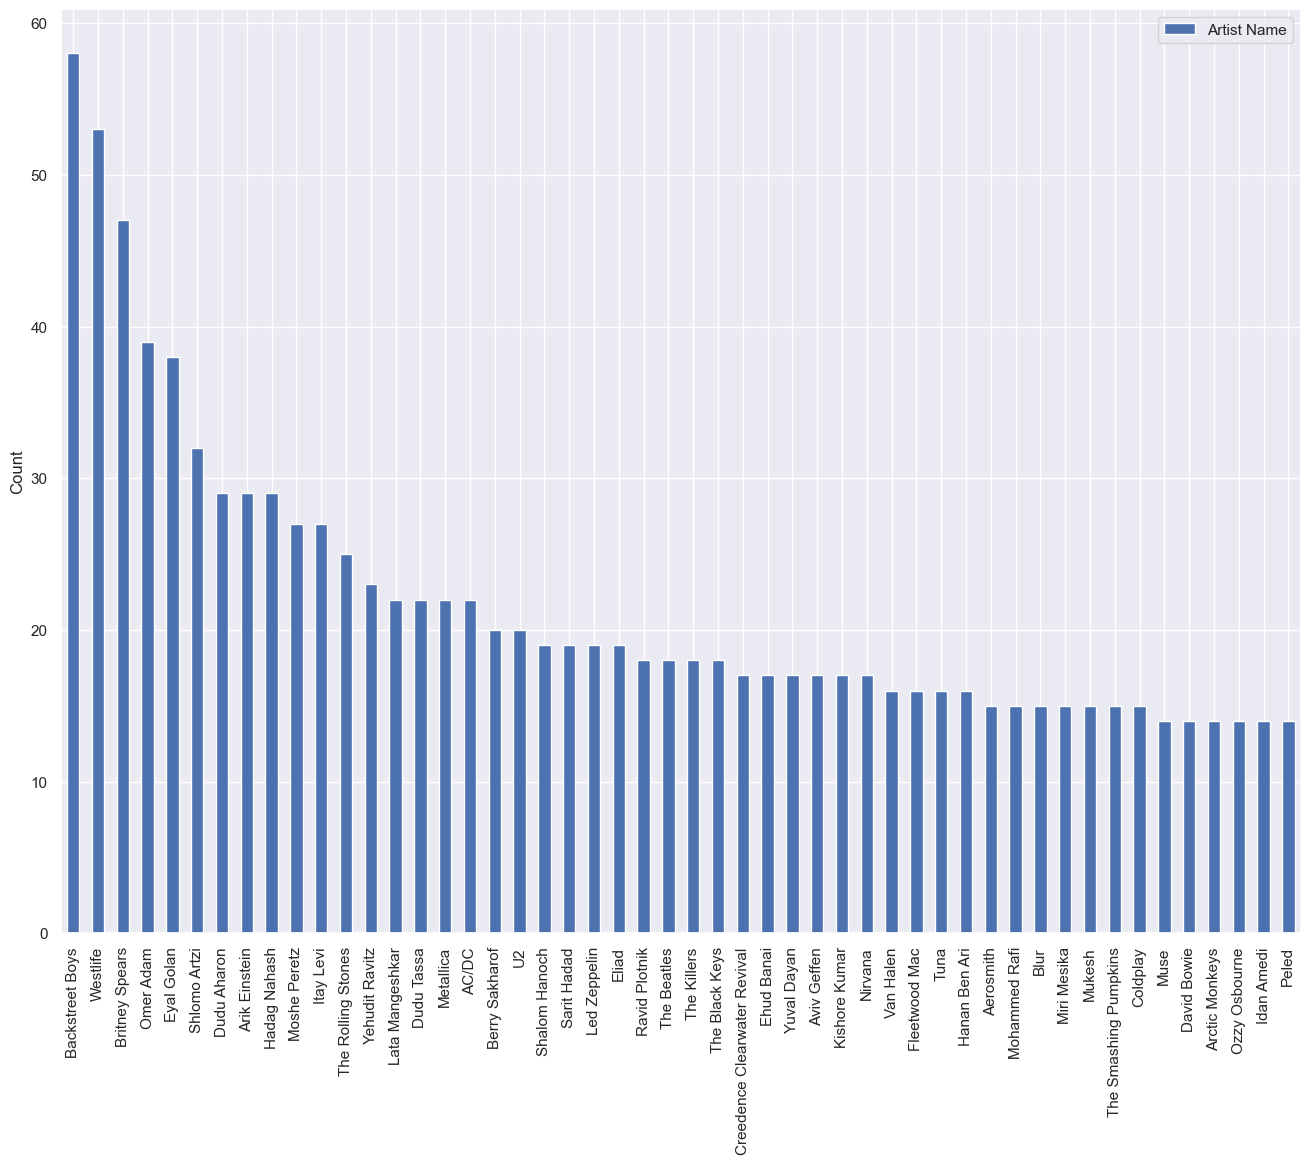

In [ ]:
train['Artist Name'].value_counts().to_frame().head(50).plot(kind='bar',figsize=(16,12))
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

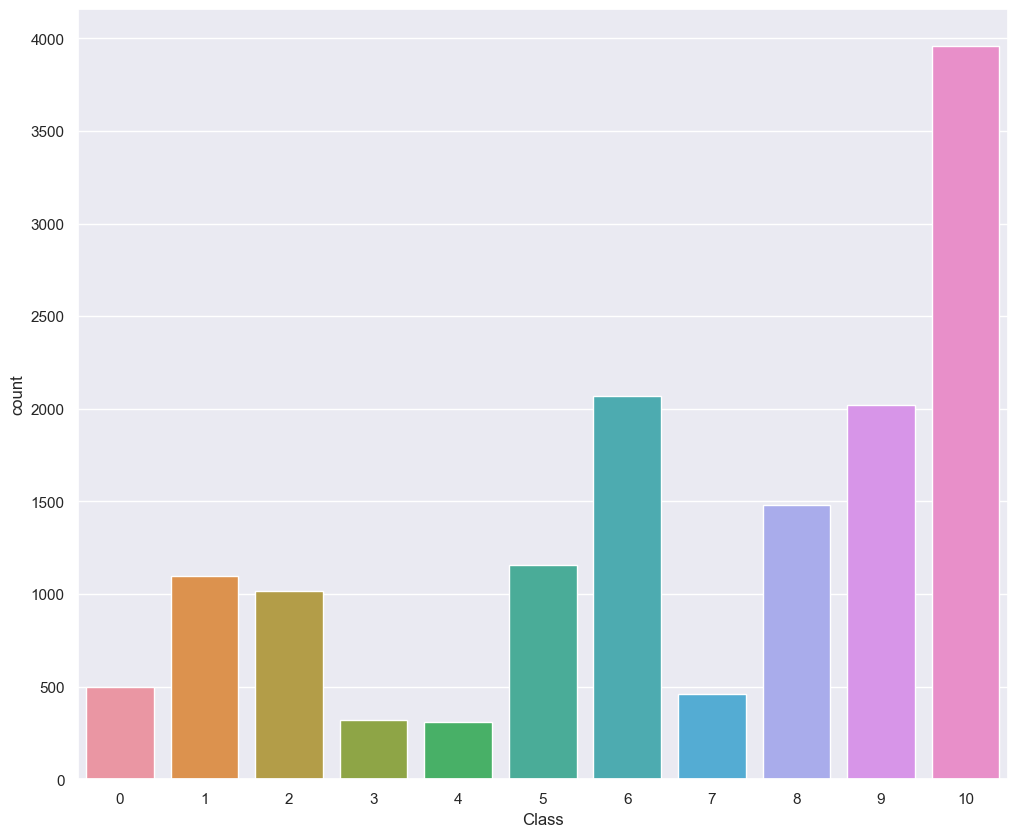

In [ ]:
plt.figure()
sns.countplot(data= train, x="Class")

### **Numerical Columns:**

In [ ]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train_drop = train[['Id', 'Artist Name', 'Track Name']]
train = train.drop(train_drop, axis=1)

test_drop = test[['Id', 'Artist Name', 'Track Name']]
test = test.drop(test_drop, axis=1)

In [ ]:
columns_name1 = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms',
                 'time_signature', 'Class']

columns_name2 = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms',
                 'time_signature']

In [ ]:
train['time_signature'].value_counts().to_frame()

,time_signature
4,13149
3,994
5,166
1,87


In [ ]:
train['Class'].value_counts().to_frame()

,Class
10,3959
6,2069
9,2019
8,1483
5,1157
1,1098
2,1018
0,500
7,461
3,322


In [ ]:
train.corr()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.172907,0.051820,0.010230,0.124621,0.013747,0.029297,-0.128886,-0.165232,-0.068159,0.054741,-0.002964,-0.027773,0.070232,0.159484
danceability,0.172907,1.000000,-0.094806,0.007667,0.056193,-0.069311,0.202985,0.007414,-0.203278,-0.105949,0.444798,-0.180764,-0.127245,0.137127,-0.101152
energy,0.051820,-0.094806,1.000000,0.012834,0.769586,-0.035974,0.120869,-0.746436,-0.187964,0.197802,0.227542,0.205421,0.241190,0.142971,0.215611
key,0.010230,0.007667,0.012834,1.000000,0.005738,-0.113318,0.001133,-0.007678,-0.001255,0.014747,0.031505,0.019937,0.014343,0.008123,-0.004175
loudness,0.124621,0.056193,0.769586,0.005738,1.000000,-0.030553,0.090473,-0.614967,-0.350667,0.113663,0.185779,0.161750,0.169003,0.125978,0.174111
mode,0.013747,-0.069311,-0.035974,-0.113318,-0.030553,1.000000,-0.072489,0.020817,-0.019665,-0.002697,-0.007580,0.017616,-0.070849,-0.016817,-0.040092
speechiness,0.029297,0.202985,0.120869,0.001133,0.090473,-0.072489,1.000000,-0.084849,-0.065775,0.072569,0.059227,0.049739,0.006253,0.055992,-0.062784
acousticness,-0.128886,0.007414,-0.746436,-0.007678,-0.614967,0.020817,-0.084849,1.000000,0.182656,-0.109400,-0.127707,-0.162988,-0.321357,-0.139500,-0.240609
instrumentalness,-0.165232,-0.203278,-0.187964,-0.001255,-0.350667,-0.019665,-0.065775,0.182656,1.000000,-0.049089,-0.228681,-0.036254,-0.010012,-0.067573,-0.028631
liveness,-0.068159,-0.105949,0.197802,0.014747,0.113663,-0.002697,0.072569,-0.109400,-0.049089,1.000000,0.027385,0.030776,0.046579,0.014825,0.040101


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'tempo Density')]

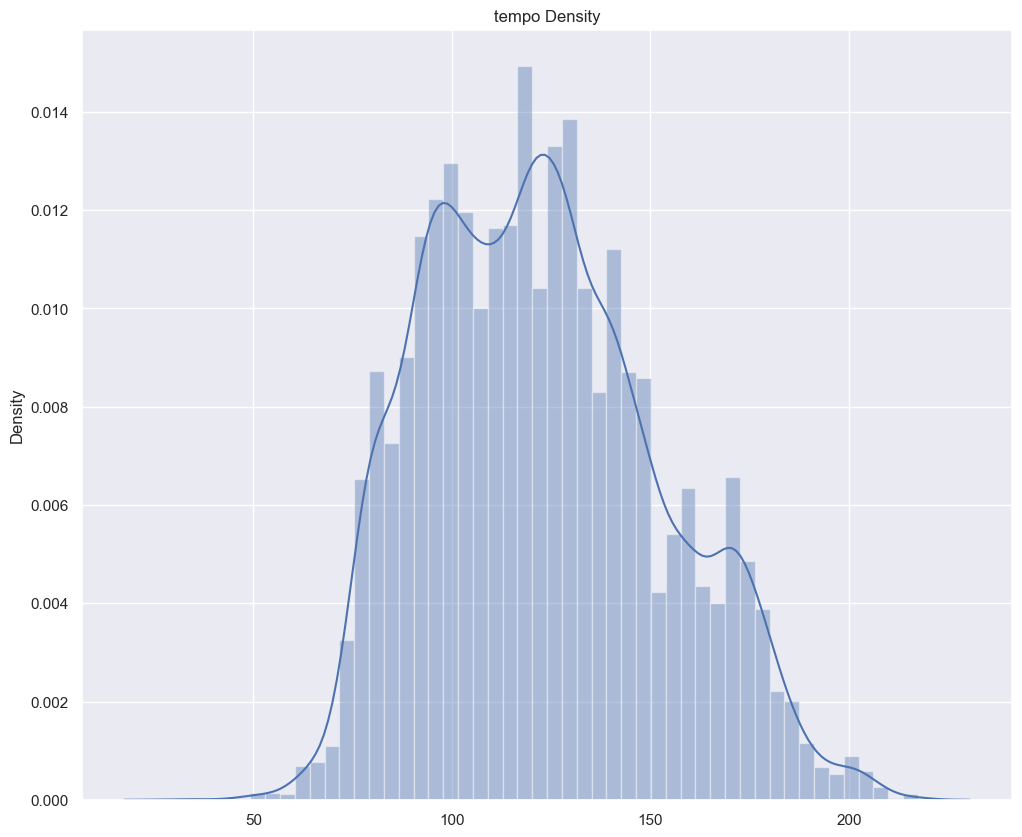

In [ ]:
plt.figure()
sns.distplot(x=train['tempo']).set(title='tempo Density')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Popularity Density')]

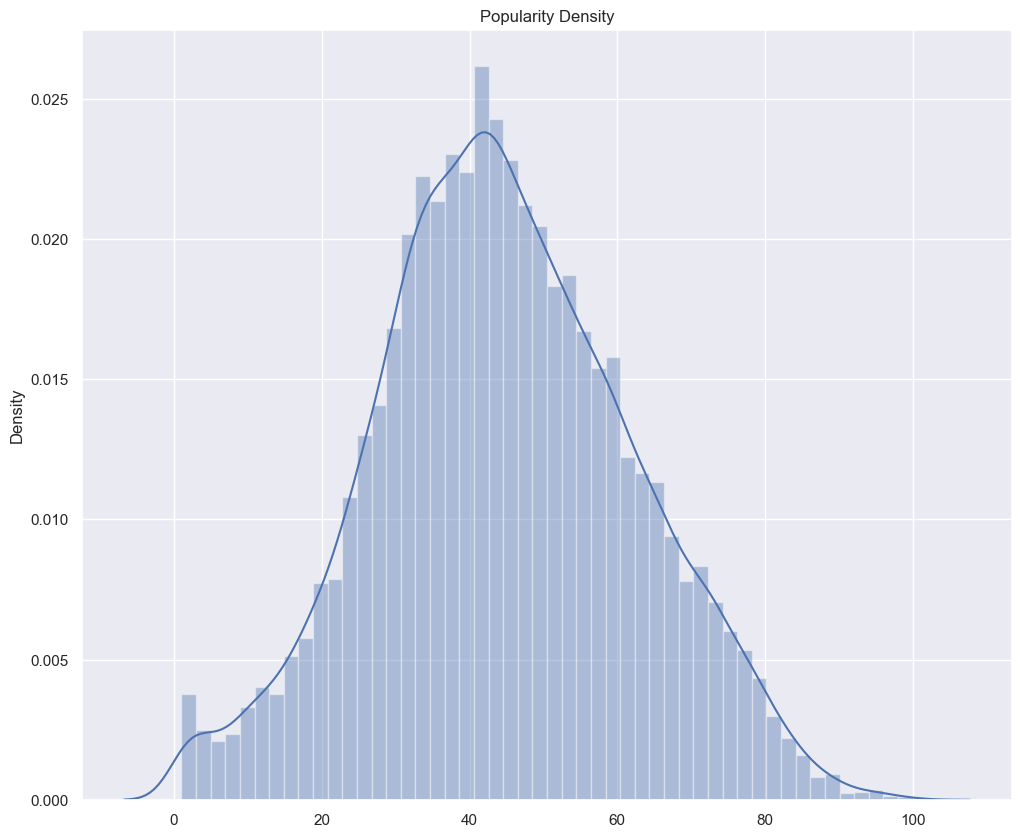

In [ ]:
plt.figure()
sns.distplot(x=train['Popularity']).set(title='Popularity Density')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'instrumentalness Density')]

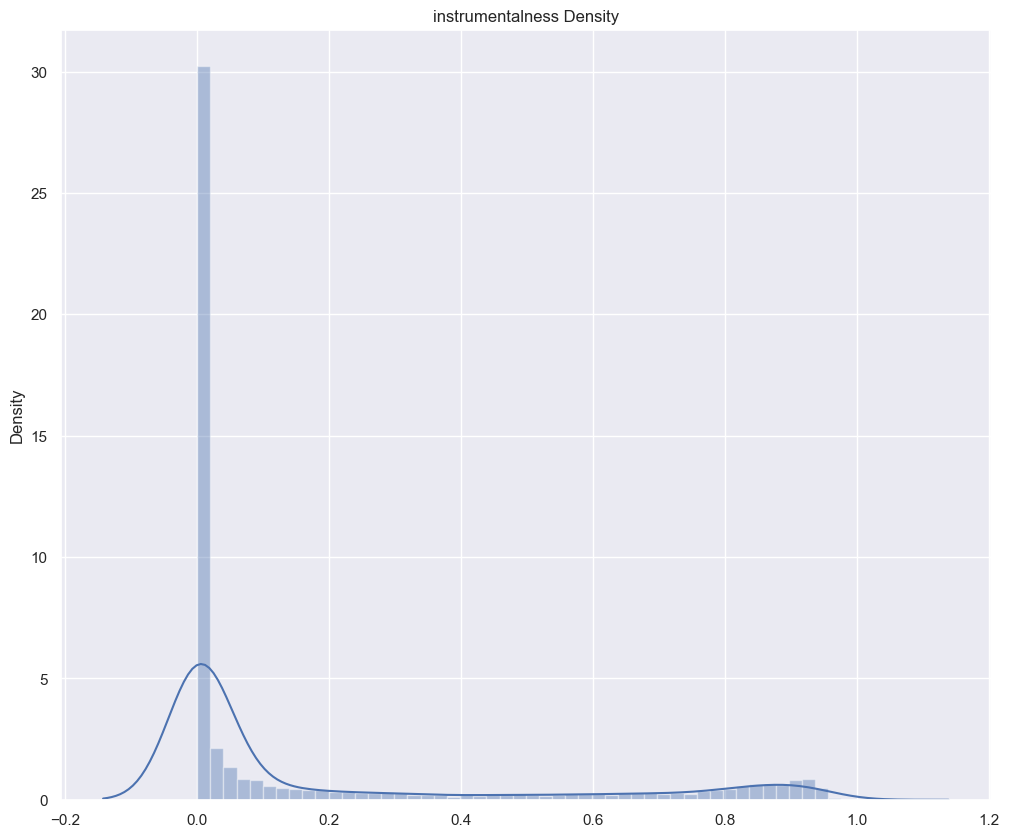

In [ ]:
plt.figure()
sns.distplot(x=train['instrumentalness']).set(title='instrumentalness Density')

[Text(0.5, 1.0, 'Correlation Between Features')]

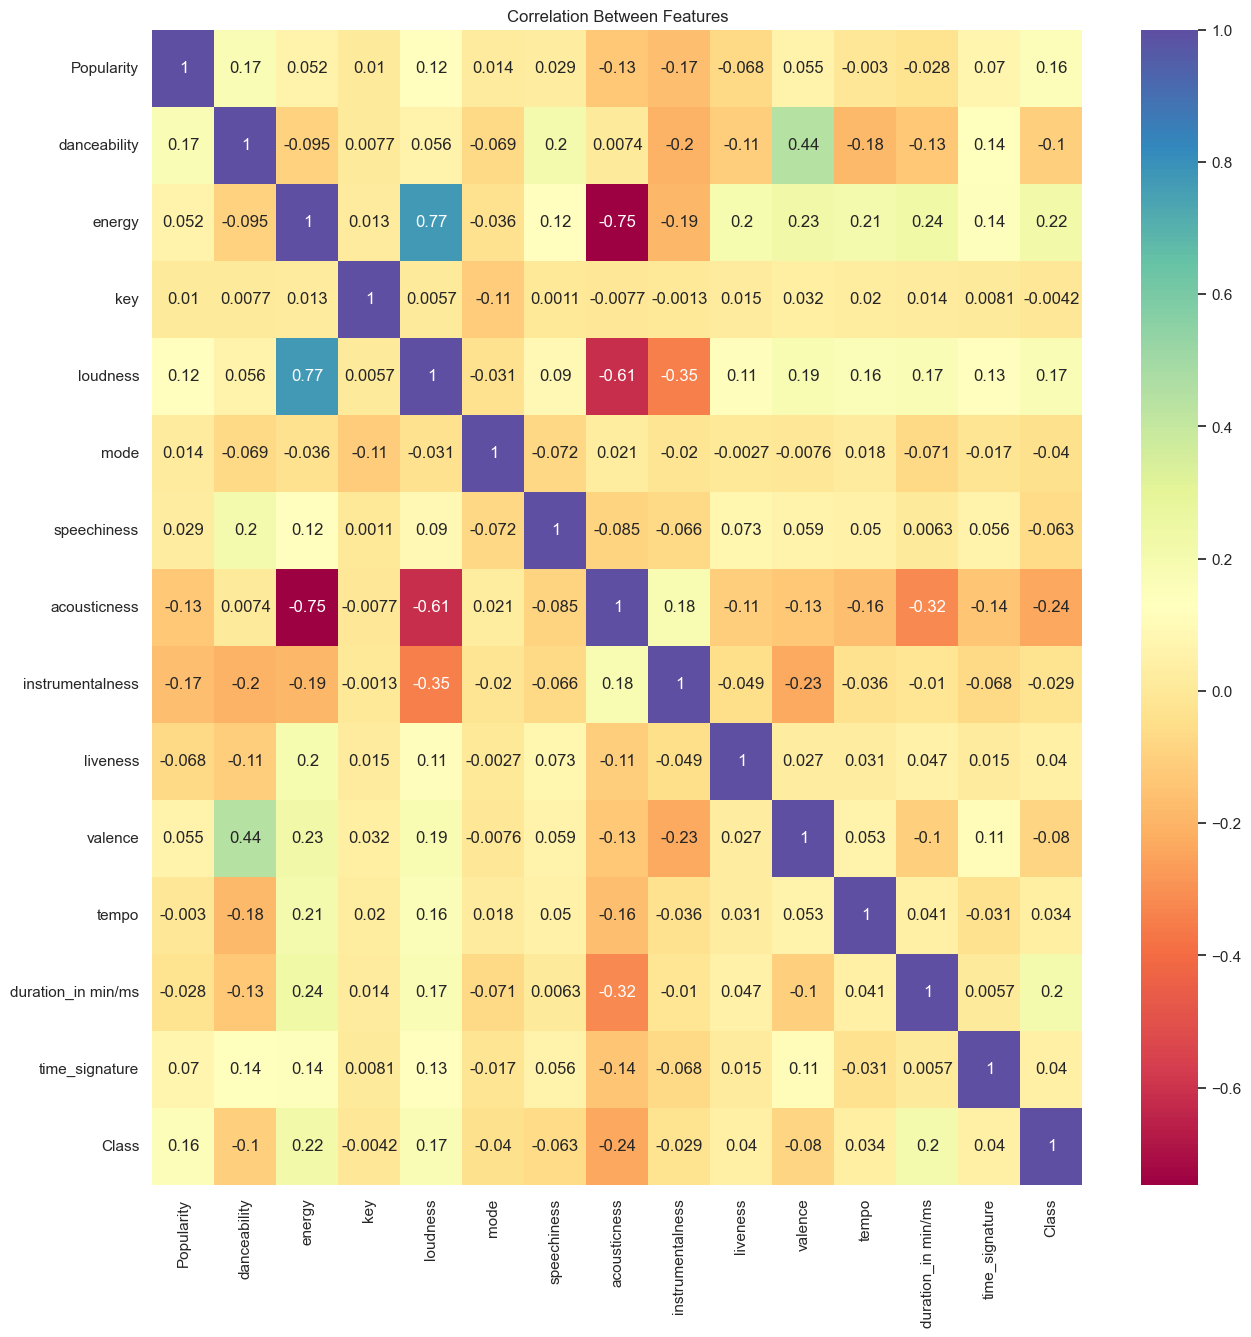

In [ ]:
sns.heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap="Spectral",ax=ax).set(title='Correlation Between Features')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Popularity'>

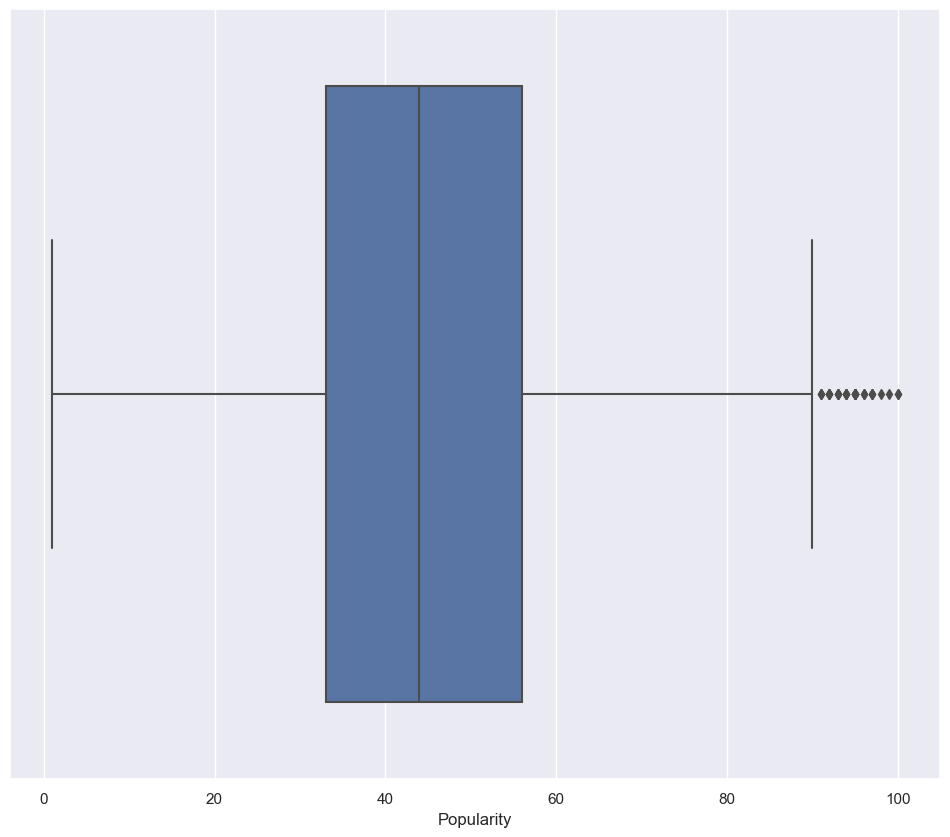

In [ ]:
sns.boxplot(train['Popularity'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='danceability'>

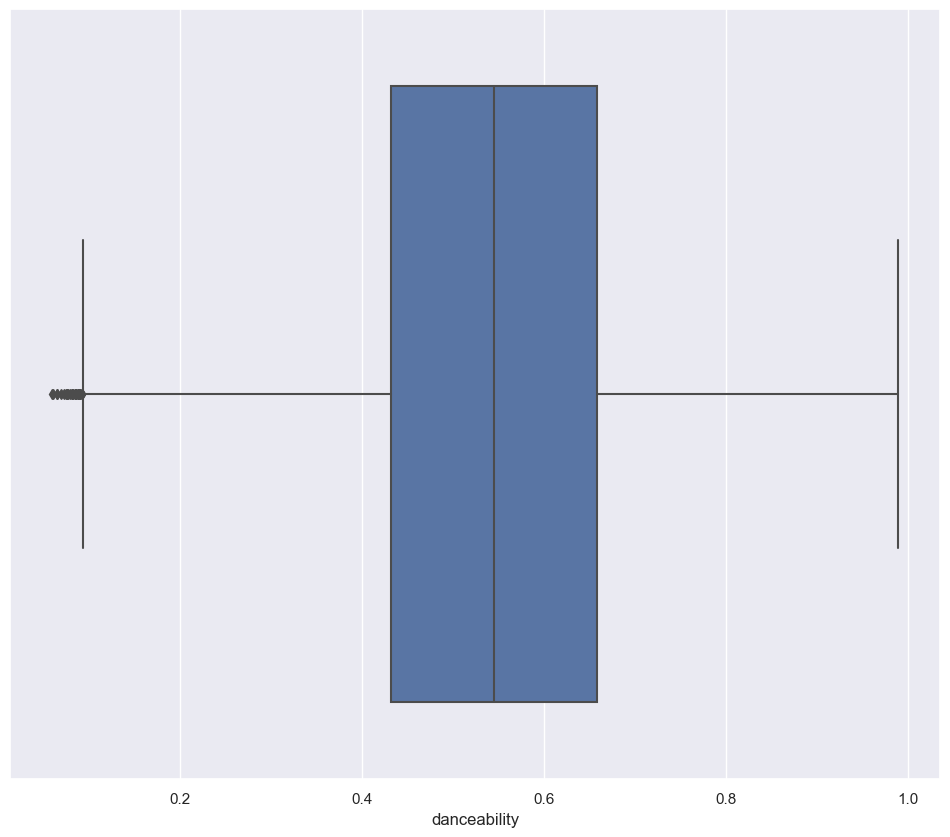

In [ ]:
sns.boxplot(train['danceability'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speechiness'>

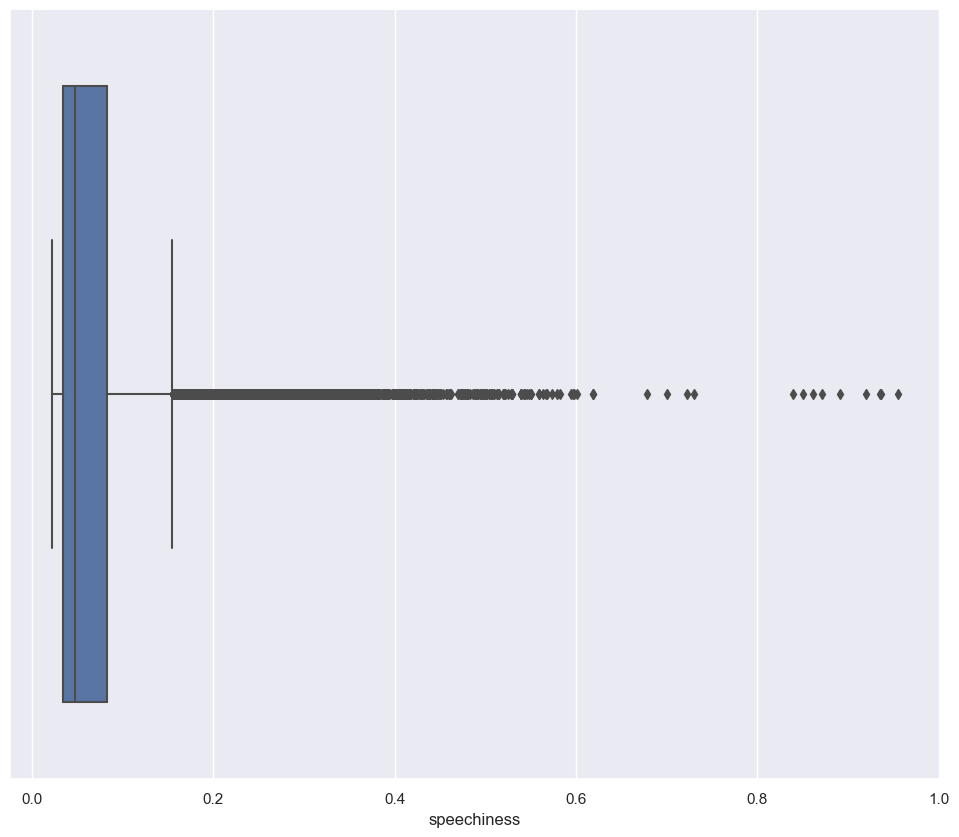

In [ ]:
sns.boxplot(train['speechiness'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='instrumentalness'>

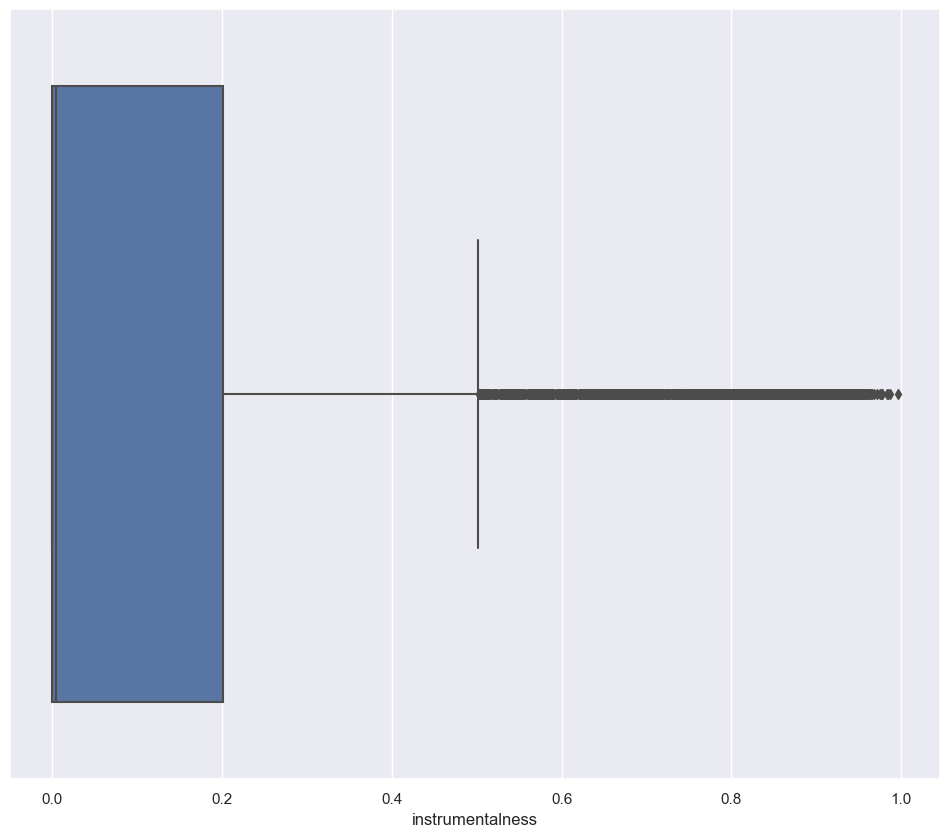

In [ ]:
sns.boxplot(train['instrumentalness'])

# **Data Preparation**

Checking for Zeros and Null values

In [ ]:
train.isna().sum()

Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
test.isna().sum()

Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
train.duplicated().sum()

24

In [ ]:
train.nunique() # to check zero varience

Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       3945
liveness               1407
valence                1268
tempo                 11392
duration_in min/ms    11805
time_signature            4
Class                    11
dtype: int64

In [ ]:
test = pd.DataFrame(test, columns=columns_name2)
X_train_ev, X_test_ev, y_train_ev, y_test_ev = train_test_split(train.drop('Class', axis=1), train['Class'],test_size=0.40, random_state=101)

In [ ]:
X_train = train.drop('Class', axis=1)
Y_train = train['Class']

Data Scaling

In [ ]:
Standard_scaler = StandardScaler()
X_train = Standard_scaler.fit_transform(X_train)
test = Standard_scaler.fit_transform(test)
X_train = pd.DataFrame(X_train, columns=columns_name2)
test = pd.DataFrame(test, columns=columns_name2)

X_train_ev = Standard_scaler.fit_transform(X_train_ev)
X_test_ev = Standard_scaler.fit_transform(X_test_ev)


In [ ]:
X_train_ev = pd.DataFrame(X_train_ev, columns=columns_name2)
X_test_ev = pd.DataFrame(X_test_ev, columns=columns_name2)

# **Select and Train a Model**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
train1 = pd.DataFrame(imptr.fit_transform(train), columns = columns_name1)
train1

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.00,0.334,0.536,9.00,-6.649,0.0,0.0381,0.378000,0.062191,0.1060,0.235,152.429,204947.000000,4.0,9.0
1,67.00,0.725,0.747,11.00,-5.545,1.0,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4.0,6.0
2,34.49,0.584,0.804,7.00,-6.094,1.0,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4.0,10.0
3,12.00,0.515,0.308,5.31,-14.711,1.0,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3.0,2.0
4,48.00,0.565,0.777,6.00,-5.096,0.0,0.2490,0.183000,0.009848,0.2110,0.619,88.311,254145.000000,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,47.00,0.607,0.946,1.00,-2.965,1.0,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4.0,10.0
14392,27.00,0.435,0.951,8.00,-7.475,1.0,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4.0,8.0
14393,22.00,0.415,0.941,11.00,-4.300,1.0,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4.0,10.0
14394,37.00,0.493,0.986,1.00,-2.279,1.0,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4.0,10.0


In [ ]:
pipeline_RF = Pipeline([("rf_clf", RandomForestClassifier(random_state=32))])
pipeline_SVM = Pipeline([("svm_clf", SVC(random_state=32))])
pipeline_KNN = Pipeline([("rf_clf", KNeighborsClassifier())])
pipeline_GredB = Pipeline([("GredB_clf", GradientBoostingClassifier(random_state=32))])
pipeline_XGB = Pipeline([("XGB_clf", xgboost.XGBClassifier(random_state=42))])
pipeline_Cat = Pipeline([("cat_clf", CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric='MultiClass'))])

pipelines = [pipeline_RF, pipeline_SVM, pipeline_KNN, pipeline_GredB, pipeline_XGB, pipeline_Cat]

pipe_dict = ["RandomForest", "Support Vector Machine classifiers", "KNeighbors","GradientBoostingClassifier", "xgboost.XG", "CatBoost"]

In [ ]:
X_train_ev = X_train_ev.fillna(X_train_ev.median())
print(X_train_ev.isnull().sum())

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


In [ ]:
X_test_ev = X_test_ev.fillna(X_train_ev.median())
print(X_test_ev.isnull().sum())

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


In [ ]:
for pipe in pipelines:
    pipe.fit(X_train_ev, y_train_ev)

Learning rate set to 0.012621
0:	learn: 2.3736260	total: 183ms	remaining: 30m 30s
1:	learn: 2.3510704	total: 226ms	remaining: 18m 48s
2:	learn: 2.3301575	total: 259ms	remaining: 14m 23s
3:	learn: 2.3102594	total: 285ms	remaining: 11m 52s
4:	learn: 2.2896883	total: 323ms	remaining: 10m 46s
5:	learn: 2.2705672	total: 356ms	remaining: 9m 52s
6:	learn: 2.2516490	total: 386ms	remaining: 9m 10s
7:	learn: 2.2327245	total: 415ms	remaining: 8m 38s
8:	learn: 2.2170899	total: 441ms	remaining: 8m 9s
9:	learn: 2.2010871	total: 467ms	remaining: 7m 46s
10:	learn: 2.1847476	total: 502ms	remaining: 7m 35s
11:	learn: 2.1689510	total: 533ms	remaining: 7m 23s
12:	learn: 2.1538754	total: 567ms	remaining: 7m 15s
13:	learn: 2.1389489	total: 599ms	remaining: 7m 7s
14:	learn: 2.1247702	total: 630ms	remaining: 6m 59s
15:	learn: 2.1109218	total: 654ms	remaining: 6m 48s
16:	learn: 2.0967943	total: 677ms	remaining: 6m 37s
17:	learn: 2.0839425	total: 701ms	remaining: 6m 28s
18:	learn: 2.0707547	total: 727ms	remaini

158:	learn: 1.4318594	total: 4.57s	remaining: 4m 42s
159:	learn: 1.4304428	total: 4.6s	remaining: 4m 42s
160:	learn: 1.4285049	total: 4.63s	remaining: 4m 42s
161:	learn: 1.4270743	total: 4.65s	remaining: 4m 42s
162:	learn: 1.4256629	total: 4.68s	remaining: 4m 42s
163:	learn: 1.4239759	total: 4.7s	remaining: 4m 42s
164:	learn: 1.4219010	total: 4.73s	remaining: 4m 42s
165:	learn: 1.4201900	total: 4.76s	remaining: 4m 42s
166:	learn: 1.4189913	total: 4.8s	remaining: 4m 42s
167:	learn: 1.4175011	total: 4.83s	remaining: 4m 42s
168:	learn: 1.4157450	total: 4.85s	remaining: 4m 42s
169:	learn: 1.4137858	total: 4.88s	remaining: 4m 42s
170:	learn: 1.4124229	total: 4.91s	remaining: 4m 41s
171:	learn: 1.4106607	total: 4.93s	remaining: 4m 42s
172:	learn: 1.4093157	total: 4.97s	remaining: 4m 42s
173:	learn: 1.4077953	total: 5s	remaining: 4m 42s
174:	learn: 1.4063989	total: 5.03s	remaining: 4m 42s
175:	learn: 1.4052034	total: 5.06s	remaining: 4m 42s
176:	learn: 1.4039316	total: 5.09s	remaining: 4m 42s

318:	learn: 1.2728075	total: 8.83s	remaining: 4m 27s
319:	learn: 1.2720878	total: 8.85s	remaining: 4m 27s
320:	learn: 1.2715204	total: 8.88s	remaining: 4m 27s
321:	learn: 1.2709921	total: 8.9s	remaining: 4m 27s
322:	learn: 1.2704360	total: 8.92s	remaining: 4m 27s
323:	learn: 1.2700138	total: 8.95s	remaining: 4m 27s
324:	learn: 1.2694109	total: 8.98s	remaining: 4m 27s
325:	learn: 1.2690176	total: 9.01s	remaining: 4m 27s
326:	learn: 1.2685455	total: 9.04s	remaining: 4m 27s
327:	learn: 1.2681706	total: 9.06s	remaining: 4m 27s
328:	learn: 1.2675943	total: 9.09s	remaining: 4m 27s
329:	learn: 1.2671872	total: 9.12s	remaining: 4m 27s
330:	learn: 1.2666573	total: 9.14s	remaining: 4m 27s
331:	learn: 1.2661550	total: 9.17s	remaining: 4m 27s
332:	learn: 1.2656650	total: 9.2s	remaining: 4m 27s
333:	learn: 1.2652398	total: 9.23s	remaining: 4m 27s
334:	learn: 1.2646031	total: 9.26s	remaining: 4m 27s
335:	learn: 1.2638655	total: 9.29s	remaining: 4m 27s
336:	learn: 1.2631199	total: 9.32s	remaining: 4m

474:	learn: 1.1984396	total: 13.1s	remaining: 4m 21s
475:	learn: 1.1981075	total: 13.1s	remaining: 4m 21s
476:	learn: 1.1978051	total: 13.1s	remaining: 4m 21s
477:	learn: 1.1972392	total: 13.1s	remaining: 4m 21s
478:	learn: 1.1967997	total: 13.2s	remaining: 4m 21s
479:	learn: 1.1963435	total: 13.2s	remaining: 4m 21s
480:	learn: 1.1959737	total: 13.2s	remaining: 4m 21s
481:	learn: 1.1956621	total: 13.3s	remaining: 4m 21s
482:	learn: 1.1952846	total: 13.3s	remaining: 4m 21s
483:	learn: 1.1949429	total: 13.3s	remaining: 4m 21s
484:	learn: 1.1945654	total: 13.3s	remaining: 4m 21s
485:	learn: 1.1942483	total: 13.4s	remaining: 4m 21s
486:	learn: 1.1939504	total: 13.4s	remaining: 4m 21s
487:	learn: 1.1936009	total: 13.4s	remaining: 4m 22s
488:	learn: 1.1932498	total: 13.5s	remaining: 4m 22s
489:	learn: 1.1929706	total: 13.5s	remaining: 4m 22s
490:	learn: 1.1926207	total: 13.5s	remaining: 4m 22s
491:	learn: 1.1922838	total: 13.6s	remaining: 4m 21s
492:	learn: 1.1919458	total: 13.6s	remaining: 

632:	learn: 1.1483036	total: 17s	remaining: 4m 10s
633:	learn: 1.1480944	total: 17s	remaining: 4m 10s
634:	learn: 1.1478175	total: 17s	remaining: 4m 10s
635:	learn: 1.1475486	total: 17s	remaining: 4m 10s
636:	learn: 1.1471379	total: 17.1s	remaining: 4m 10s
637:	learn: 1.1468164	total: 17.1s	remaining: 4m 10s
638:	learn: 1.1465458	total: 17.1s	remaining: 4m 10s
639:	learn: 1.1462153	total: 17.1s	remaining: 4m 10s
640:	learn: 1.1459474	total: 17.1s	remaining: 4m 10s
641:	learn: 1.1456482	total: 17.2s	remaining: 4m 10s
642:	learn: 1.1453341	total: 17.2s	remaining: 4m 10s
643:	learn: 1.1449544	total: 17.2s	remaining: 4m 10s
644:	learn: 1.1446810	total: 17.2s	remaining: 4m 10s
645:	learn: 1.1444805	total: 17.3s	remaining: 4m 9s
646:	learn: 1.1442161	total: 17.3s	remaining: 4m 9s
647:	learn: 1.1439613	total: 17.3s	remaining: 4m 9s
648:	learn: 1.1436461	total: 17.3s	remaining: 4m 9s
649:	learn: 1.1433559	total: 17.4s	remaining: 4m 9s
650:	learn: 1.1430675	total: 17.4s	remaining: 4m 9s
651:	le

794:	learn: 1.1051933	total: 21.8s	remaining: 4m 11s
795:	learn: 1.1049344	total: 21.8s	remaining: 4m 11s
796:	learn: 1.1045585	total: 21.8s	remaining: 4m 11s
797:	learn: 1.1043277	total: 21.8s	remaining: 4m 11s
798:	learn: 1.1041036	total: 21.9s	remaining: 4m 11s
799:	learn: 1.1037961	total: 21.9s	remaining: 4m 11s
800:	learn: 1.1035732	total: 21.9s	remaining: 4m 11s
801:	learn: 1.1033406	total: 22s	remaining: 4m 11s
802:	learn: 1.1031006	total: 22s	remaining: 4m 11s
803:	learn: 1.1028404	total: 22s	remaining: 4m 11s
804:	learn: 1.1026079	total: 22s	remaining: 4m 11s
805:	learn: 1.1023216	total: 22.1s	remaining: 4m 11s
806:	learn: 1.1020079	total: 22.1s	remaining: 4m 11s
807:	learn: 1.1017359	total: 22.1s	remaining: 4m 11s
808:	learn: 1.1014961	total: 22.1s	remaining: 4m 11s
809:	learn: 1.1012779	total: 22.2s	remaining: 4m 11s
810:	learn: 1.1009900	total: 22.2s	remaining: 4m 11s
811:	learn: 1.1007088	total: 22.2s	remaining: 4m 11s
812:	learn: 1.1004465	total: 22.2s	remaining: 4m 11s
8

953:	learn: 1.0698281	total: 26.5s	remaining: 4m 11s
954:	learn: 1.0695957	total: 26.6s	remaining: 4m 11s
955:	learn: 1.0693409	total: 26.6s	remaining: 4m 11s
956:	learn: 1.0690760	total: 26.6s	remaining: 4m 11s
957:	learn: 1.0689036	total: 26.6s	remaining: 4m 11s
958:	learn: 1.0687876	total: 26.7s	remaining: 4m 11s
959:	learn: 1.0685870	total: 26.7s	remaining: 4m 11s
960:	learn: 1.0684171	total: 26.7s	remaining: 4m 11s
961:	learn: 1.0681764	total: 26.7s	remaining: 4m 11s
962:	learn: 1.0679327	total: 26.8s	remaining: 4m 11s
963:	learn: 1.0677100	total: 26.8s	remaining: 4m 11s
964:	learn: 1.0675370	total: 26.9s	remaining: 4m 11s
965:	learn: 1.0672136	total: 26.9s	remaining: 4m 11s
966:	learn: 1.0670450	total: 26.9s	remaining: 4m 11s
967:	learn: 1.0668710	total: 27s	remaining: 4m 11s
968:	learn: 1.0667143	total: 27s	remaining: 4m 11s
969:	learn: 1.0664464	total: 27.1s	remaining: 4m 11s
970:	learn: 1.0662313	total: 27.1s	remaining: 4m 12s
971:	learn: 1.0659985	total: 27.1s	remaining: 4m 1

1113:	learn: 1.0390548	total: 31.3s	remaining: 4m 9s
1114:	learn: 1.0388162	total: 31.3s	remaining: 4m 9s
1115:	learn: 1.0386606	total: 31.3s	remaining: 4m 9s
1116:	learn: 1.0384863	total: 31.4s	remaining: 4m 9s
1117:	learn: 1.0383295	total: 31.4s	remaining: 4m 9s
1118:	learn: 1.0381623	total: 31.4s	remaining: 4m 9s
1119:	learn: 1.0380221	total: 31.5s	remaining: 4m 9s
1120:	learn: 1.0378128	total: 31.5s	remaining: 4m 9s
1121:	learn: 1.0376674	total: 31.5s	remaining: 4m 9s
1122:	learn: 1.0374791	total: 31.6s	remaining: 4m 9s
1123:	learn: 1.0372428	total: 31.6s	remaining: 4m 9s
1124:	learn: 1.0370552	total: 31.6s	remaining: 4m 9s
1125:	learn: 1.0368221	total: 31.6s	remaining: 4m 9s
1126:	learn: 1.0367031	total: 31.7s	remaining: 4m 9s
1127:	learn: 1.0365761	total: 31.7s	remaining: 4m 9s
1128:	learn: 1.0364065	total: 31.7s	remaining: 4m 9s
1129:	learn: 1.0361599	total: 31.7s	remaining: 4m 9s
1130:	learn: 1.0359954	total: 31.8s	remaining: 4m 9s
1131:	learn: 1.0358122	total: 31.8s	remaining:

1273:	learn: 1.0123272	total: 36s	remaining: 4m 6s
1274:	learn: 1.0121542	total: 36s	remaining: 4m 6s
1275:	learn: 1.0118893	total: 36s	remaining: 4m 6s
1276:	learn: 1.0116861	total: 36.1s	remaining: 4m 6s
1277:	learn: 1.0114736	total: 36.1s	remaining: 4m 6s
1278:	learn: 1.0113656	total: 36.2s	remaining: 4m 6s
1279:	learn: 1.0112665	total: 36.2s	remaining: 4m 6s
1280:	learn: 1.0110704	total: 36.2s	remaining: 4m 6s
1281:	learn: 1.0108040	total: 36.3s	remaining: 4m 6s
1282:	learn: 1.0105503	total: 36.3s	remaining: 4m 6s
1283:	learn: 1.0104245	total: 36.3s	remaining: 4m 6s
1284:	learn: 1.0102872	total: 36.3s	remaining: 4m 6s
1285:	learn: 1.0101675	total: 36.4s	remaining: 4m 6s
1286:	learn: 1.0100038	total: 36.4s	remaining: 4m 6s
1287:	learn: 1.0098273	total: 36.4s	remaining: 4m 6s
1288:	learn: 1.0096277	total: 36.4s	remaining: 4m 6s
1289:	learn: 1.0094263	total: 36.5s	remaining: 4m 6s
1290:	learn: 1.0093006	total: 36.5s	remaining: 4m 6s
1291:	learn: 1.0090856	total: 36.5s	remaining: 4m 6s

1433:	learn: 0.9859401	total: 40.5s	remaining: 4m 1s
1434:	learn: 0.9857696	total: 40.5s	remaining: 4m 2s
1435:	learn: 0.9855743	total: 40.6s	remaining: 4m 2s
1436:	learn: 0.9854286	total: 40.6s	remaining: 4m 2s
1437:	learn: 0.9852511	total: 40.7s	remaining: 4m 2s
1438:	learn: 0.9851236	total: 40.7s	remaining: 4m 2s
1439:	learn: 0.9849958	total: 40.7s	remaining: 4m 2s
1440:	learn: 0.9847679	total: 40.8s	remaining: 4m 2s
1441:	learn: 0.9846583	total: 40.8s	remaining: 4m 2s
1442:	learn: 0.9845562	total: 40.8s	remaining: 4m 2s
1443:	learn: 0.9843993	total: 40.9s	remaining: 4m 2s
1444:	learn: 0.9842510	total: 40.9s	remaining: 4m 2s
1445:	learn: 0.9841340	total: 40.9s	remaining: 4m 2s
1446:	learn: 0.9839625	total: 40.9s	remaining: 4m 2s
1447:	learn: 0.9838286	total: 41s	remaining: 4m 2s
1448:	learn: 0.9836479	total: 41s	remaining: 4m 2s
1449:	learn: 0.9835300	total: 41s	remaining: 4m 2s
1450:	learn: 0.9833493	total: 41.1s	remaining: 4m 2s
1451:	learn: 0.9831835	total: 41.1s	remaining: 4m 2s

1589:	learn: 0.9618954	total: 44.9s	remaining: 3m 57s
1590:	learn: 0.9617807	total: 44.9s	remaining: 3m 57s
1591:	learn: 0.9616145	total: 44.9s	remaining: 3m 57s
1592:	learn: 0.9614876	total: 45s	remaining: 3m 57s
1593:	learn: 0.9613385	total: 45s	remaining: 3m 57s
1594:	learn: 0.9611905	total: 45s	remaining: 3m 57s
1595:	learn: 0.9610240	total: 45.1s	remaining: 3m 57s
1596:	learn: 0.9609109	total: 45.1s	remaining: 3m 57s
1597:	learn: 0.9607935	total: 45.1s	remaining: 3m 57s
1598:	learn: 0.9606923	total: 45.1s	remaining: 3m 57s
1599:	learn: 0.9605844	total: 45.2s	remaining: 3m 57s
1600:	learn: 0.9605312	total: 45.2s	remaining: 3m 57s
1601:	learn: 0.9603942	total: 45.2s	remaining: 3m 56s
1602:	learn: 0.9602974	total: 45.2s	remaining: 3m 56s
1603:	learn: 0.9601318	total: 45.3s	remaining: 3m 56s
1604:	learn: 0.9599987	total: 45.3s	remaining: 3m 56s
1605:	learn: 0.9597604	total: 45.3s	remaining: 3m 56s
1606:	learn: 0.9595902	total: 45.3s	remaining: 3m 56s
1607:	learn: 0.9593661	total: 45.4

1748:	learn: 0.9388982	total: 49.4s	remaining: 3m 52s
1749:	learn: 0.9387083	total: 49.4s	remaining: 3m 52s
1750:	learn: 0.9386197	total: 49.4s	remaining: 3m 52s
1751:	learn: 0.9384806	total: 49.5s	remaining: 3m 52s
1752:	learn: 0.9383345	total: 49.5s	remaining: 3m 52s
1753:	learn: 0.9382529	total: 49.5s	remaining: 3m 52s
1754:	learn: 0.9380922	total: 49.5s	remaining: 3m 52s
1755:	learn: 0.9379470	total: 49.5s	remaining: 3m 52s
1756:	learn: 0.9378549	total: 49.6s	remaining: 3m 52s
1757:	learn: 0.9377457	total: 49.6s	remaining: 3m 52s
1758:	learn: 0.9375623	total: 49.6s	remaining: 3m 52s
1759:	learn: 0.9375033	total: 49.6s	remaining: 3m 52s
1760:	learn: 0.9373183	total: 49.7s	remaining: 3m 52s
1761:	learn: 0.9372263	total: 49.7s	remaining: 3m 52s
1762:	learn: 0.9370823	total: 49.7s	remaining: 3m 52s
1763:	learn: 0.9369243	total: 49.7s	remaining: 3m 52s
1764:	learn: 0.9367869	total: 49.7s	remaining: 3m 52s
1765:	learn: 0.9366980	total: 49.8s	remaining: 3m 52s
1766:	learn: 0.9365232	total

1907:	learn: 0.9183284	total: 53.5s	remaining: 3m 46s
1908:	learn: 0.9182283	total: 53.5s	remaining: 3m 46s
1909:	learn: 0.9181302	total: 53.5s	remaining: 3m 46s
1910:	learn: 0.9180098	total: 53.6s	remaining: 3m 46s
1911:	learn: 0.9179044	total: 53.6s	remaining: 3m 46s
1912:	learn: 0.9177143	total: 53.6s	remaining: 3m 46s
1913:	learn: 0.9175990	total: 53.6s	remaining: 3m 46s
1914:	learn: 0.9174659	total: 53.7s	remaining: 3m 46s
1915:	learn: 0.9173205	total: 53.7s	remaining: 3m 46s
1916:	learn: 0.9172714	total: 53.7s	remaining: 3m 46s
1917:	learn: 0.9171517	total: 53.7s	remaining: 3m 46s
1918:	learn: 0.9170583	total: 53.8s	remaining: 3m 46s
1919:	learn: 0.9169386	total: 53.8s	remaining: 3m 46s
1920:	learn: 0.9168376	total: 53.8s	remaining: 3m 46s
1921:	learn: 0.9166860	total: 53.8s	remaining: 3m 46s
1922:	learn: 0.9166050	total: 53.9s	remaining: 3m 46s
1923:	learn: 0.9165063	total: 53.9s	remaining: 3m 46s
1924:	learn: 0.9163439	total: 53.9s	remaining: 3m 46s
1925:	learn: 0.9161768	total

2061:	learn: 0.8981820	total: 58.1s	remaining: 3m 43s
2062:	learn: 0.8980355	total: 58.1s	remaining: 3m 43s
2063:	learn: 0.8979035	total: 58.1s	remaining: 3m 43s
2064:	learn: 0.8977555	total: 58.2s	remaining: 3m 43s
2065:	learn: 0.8976028	total: 58.2s	remaining: 3m 43s
2066:	learn: 0.8975237	total: 58.2s	remaining: 3m 43s
2067:	learn: 0.8973963	total: 58.3s	remaining: 3m 43s
2068:	learn: 0.8973033	total: 58.3s	remaining: 3m 43s
2069:	learn: 0.8971742	total: 58.3s	remaining: 3m 43s
2070:	learn: 0.8970099	total: 58.3s	remaining: 3m 43s
2071:	learn: 0.8968574	total: 58.4s	remaining: 3m 43s
2072:	learn: 0.8966870	total: 58.4s	remaining: 3m 43s
2073:	learn: 0.8965730	total: 58.4s	remaining: 3m 43s
2074:	learn: 0.8963575	total: 58.5s	remaining: 3m 43s
2075:	learn: 0.8962458	total: 58.5s	remaining: 3m 43s
2076:	learn: 0.8961222	total: 58.5s	remaining: 3m 43s
2077:	learn: 0.8960153	total: 58.6s	remaining: 3m 43s
2078:	learn: 0.8958345	total: 58.6s	remaining: 3m 43s
2079:	learn: 0.8957332	total

2219:	learn: 0.8779934	total: 1m 2s	remaining: 3m 39s
2220:	learn: 0.8778328	total: 1m 2s	remaining: 3m 39s
2221:	learn: 0.8777447	total: 1m 2s	remaining: 3m 39s
2222:	learn: 0.8776799	total: 1m 2s	remaining: 3m 39s
2223:	learn: 0.8775612	total: 1m 2s	remaining: 3m 39s
2224:	learn: 0.8774868	total: 1m 2s	remaining: 3m 39s
2225:	learn: 0.8773618	total: 1m 2s	remaining: 3m 39s
2226:	learn: 0.8772870	total: 1m 2s	remaining: 3m 39s
2227:	learn: 0.8770983	total: 1m 3s	remaining: 3m 39s
2228:	learn: 0.8769766	total: 1m 3s	remaining: 3m 39s
2229:	learn: 0.8768002	total: 1m 3s	remaining: 3m 39s
2230:	learn: 0.8766855	total: 1m 3s	remaining: 3m 39s
2231:	learn: 0.8765685	total: 1m 3s	remaining: 3m 39s
2232:	learn: 0.8764446	total: 1m 3s	remaining: 3m 39s
2233:	learn: 0.8762802	total: 1m 3s	remaining: 3m 39s
2234:	learn: 0.8761603	total: 1m 3s	remaining: 3m 39s
2235:	learn: 0.8760567	total: 1m 3s	remaining: 3m 39s
2236:	learn: 0.8759282	total: 1m 3s	remaining: 3m 39s
2237:	learn: 0.8758438	total

2371:	learn: 0.8607258	total: 1m 6s	remaining: 3m 35s
2372:	learn: 0.8605944	total: 1m 6s	remaining: 3m 34s
2373:	learn: 0.8604882	total: 1m 6s	remaining: 3m 34s
2374:	learn: 0.8604033	total: 1m 6s	remaining: 3m 34s
2375:	learn: 0.8602787	total: 1m 6s	remaining: 3m 34s
2376:	learn: 0.8601993	total: 1m 6s	remaining: 3m 34s
2377:	learn: 0.8601066	total: 1m 7s	remaining: 3m 34s
2378:	learn: 0.8599424	total: 1m 7s	remaining: 3m 34s
2379:	learn: 0.8598770	total: 1m 7s	remaining: 3m 34s
2380:	learn: 0.8597057	total: 1m 7s	remaining: 3m 34s
2381:	learn: 0.8595678	total: 1m 7s	remaining: 3m 34s
2382:	learn: 0.8594570	total: 1m 7s	remaining: 3m 34s
2383:	learn: 0.8593491	total: 1m 7s	remaining: 3m 34s
2384:	learn: 0.8591585	total: 1m 7s	remaining: 3m 34s
2385:	learn: 0.8590629	total: 1m 7s	remaining: 3m 34s
2386:	learn: 0.8589028	total: 1m 7s	remaining: 3m 34s
2387:	learn: 0.8588387	total: 1m 7s	remaining: 3m 34s
2388:	learn: 0.8587001	total: 1m 7s	remaining: 3m 34s
2389:	learn: 0.8585518	total

2524:	learn: 0.8426657	total: 1m 10s	remaining: 3m 30s
2525:	learn: 0.8425349	total: 1m 10s	remaining: 3m 30s
2526:	learn: 0.8424310	total: 1m 11s	remaining: 3m 30s
2527:	learn: 0.8423174	total: 1m 11s	remaining: 3m 29s
2528:	learn: 0.8422706	total: 1m 11s	remaining: 3m 29s
2529:	learn: 0.8421686	total: 1m 11s	remaining: 3m 29s
2530:	learn: 0.8420273	total: 1m 11s	remaining: 3m 29s
2531:	learn: 0.8418907	total: 1m 11s	remaining: 3m 29s
2532:	learn: 0.8417780	total: 1m 11s	remaining: 3m 29s
2533:	learn: 0.8417009	total: 1m 11s	remaining: 3m 29s
2534:	learn: 0.8416129	total: 1m 11s	remaining: 3m 29s
2535:	learn: 0.8415015	total: 1m 11s	remaining: 3m 29s
2536:	learn: 0.8414209	total: 1m 11s	remaining: 3m 29s
2537:	learn: 0.8413165	total: 1m 11s	remaining: 3m 29s
2538:	learn: 0.8411501	total: 1m 11s	remaining: 3m 29s
2539:	learn: 0.8410578	total: 1m 11s	remaining: 3m 29s
2540:	learn: 0.8409794	total: 1m 11s	remaining: 3m 29s
2541:	learn: 0.8408626	total: 1m 11s	remaining: 3m 29s
2542:	lear

2675:	learn: 0.8265186	total: 1m 15s	remaining: 3m 25s
2676:	learn: 0.8264241	total: 1m 15s	remaining: 3m 25s
2677:	learn: 0.8263344	total: 1m 15s	remaining: 3m 25s
2678:	learn: 0.8262512	total: 1m 15s	remaining: 3m 25s
2679:	learn: 0.8261677	total: 1m 15s	remaining: 3m 25s
2680:	learn: 0.8260746	total: 1m 15s	remaining: 3m 25s
2681:	learn: 0.8259927	total: 1m 15s	remaining: 3m 25s
2682:	learn: 0.8258813	total: 1m 15s	remaining: 3m 25s
2683:	learn: 0.8257908	total: 1m 15s	remaining: 3m 25s
2684:	learn: 0.8256981	total: 1m 15s	remaining: 3m 24s
2685:	learn: 0.8256114	total: 1m 15s	remaining: 3m 24s
2686:	learn: 0.8254816	total: 1m 15s	remaining: 3m 24s
2687:	learn: 0.8253250	total: 1m 15s	remaining: 3m 24s
2688:	learn: 0.8252418	total: 1m 15s	remaining: 3m 24s
2689:	learn: 0.8251037	total: 1m 15s	remaining: 3m 24s
2690:	learn: 0.8249626	total: 1m 15s	remaining: 3m 24s
2691:	learn: 0.8248204	total: 1m 15s	remaining: 3m 24s
2692:	learn: 0.8247353	total: 1m 15s	remaining: 3m 24s
2693:	lear

2828:	learn: 0.8098012	total: 1m 19s	remaining: 3m 21s
2829:	learn: 0.8096190	total: 1m 19s	remaining: 3m 21s
2830:	learn: 0.8094874	total: 1m 19s	remaining: 3m 21s
2831:	learn: 0.8093670	total: 1m 19s	remaining: 3m 21s
2832:	learn: 0.8092812	total: 1m 19s	remaining: 3m 21s
2833:	learn: 0.8091400	total: 1m 19s	remaining: 3m 21s
2834:	learn: 0.8089802	total: 1m 19s	remaining: 3m 21s
2835:	learn: 0.8088860	total: 1m 19s	remaining: 3m 21s
2836:	learn: 0.8088106	total: 1m 19s	remaining: 3m 21s
2837:	learn: 0.8087427	total: 1m 19s	remaining: 3m 21s
2838:	learn: 0.8086478	total: 1m 19s	remaining: 3m 21s
2839:	learn: 0.8085343	total: 1m 19s	remaining: 3m 21s
2840:	learn: 0.8084461	total: 1m 19s	remaining: 3m 21s
2841:	learn: 0.8083698	total: 1m 19s	remaining: 3m 21s
2842:	learn: 0.8082726	total: 1m 19s	remaining: 3m 21s
2843:	learn: 0.8080900	total: 1m 19s	remaining: 3m 21s
2844:	learn: 0.8080077	total: 1m 19s	remaining: 3m 21s
2845:	learn: 0.8078948	total: 1m 20s	remaining: 3m 21s
2846:	lear

2982:	learn: 0.7932279	total: 1m 23s	remaining: 3m 16s
2983:	learn: 0.7931379	total: 1m 23s	remaining: 3m 16s
2984:	learn: 0.7930269	total: 1m 23s	remaining: 3m 16s
2985:	learn: 0.7929348	total: 1m 23s	remaining: 3m 16s
2986:	learn: 0.7928612	total: 1m 23s	remaining: 3m 16s
2987:	learn: 0.7927943	total: 1m 23s	remaining: 3m 16s
2988:	learn: 0.7926942	total: 1m 23s	remaining: 3m 16s
2989:	learn: 0.7925858	total: 1m 23s	remaining: 3m 16s
2990:	learn: 0.7925271	total: 1m 23s	remaining: 3m 16s
2991:	learn: 0.7924544	total: 1m 23s	remaining: 3m 16s
2992:	learn: 0.7923379	total: 1m 23s	remaining: 3m 16s
2993:	learn: 0.7922863	total: 1m 23s	remaining: 3m 16s
2994:	learn: 0.7922313	total: 1m 23s	remaining: 3m 16s
2995:	learn: 0.7921355	total: 1m 23s	remaining: 3m 16s
2996:	learn: 0.7920115	total: 1m 23s	remaining: 3m 16s
2997:	learn: 0.7919550	total: 1m 24s	remaining: 3m 16s
2998:	learn: 0.7918383	total: 1m 24s	remaining: 3m 16s
2999:	learn: 0.7916936	total: 1m 24s	remaining: 3m 16s
3000:	lear

3132:	learn: 0.7777837	total: 1m 27s	remaining: 3m 12s
3133:	learn: 0.7777104	total: 1m 27s	remaining: 3m 12s
3134:	learn: 0.7776185	total: 1m 27s	remaining: 3m 12s
3135:	learn: 0.7775396	total: 1m 27s	remaining: 3m 12s
3136:	learn: 0.7773866	total: 1m 27s	remaining: 3m 12s
3137:	learn: 0.7773331	total: 1m 27s	remaining: 3m 12s
3138:	learn: 0.7772760	total: 1m 27s	remaining: 3m 12s
3139:	learn: 0.7771143	total: 1m 28s	remaining: 3m 12s
3140:	learn: 0.7770590	total: 1m 28s	remaining: 3m 12s
3141:	learn: 0.7769976	total: 1m 28s	remaining: 3m 12s
3142:	learn: 0.7769263	total: 1m 28s	remaining: 3m 12s
3143:	learn: 0.7768069	total: 1m 28s	remaining: 3m 12s
3144:	learn: 0.7766294	total: 1m 28s	remaining: 3m 12s
3145:	learn: 0.7765494	total: 1m 28s	remaining: 3m 12s
3146:	learn: 0.7764759	total: 1m 28s	remaining: 3m 12s
3147:	learn: 0.7764399	total: 1m 28s	remaining: 3m 12s
3148:	learn: 0.7763754	total: 1m 28s	remaining: 3m 12s
3149:	learn: 0.7762493	total: 1m 28s	remaining: 3m 12s
3150:	lear

3283:	learn: 0.7630229	total: 1m 31s	remaining: 3m 8s
3284:	learn: 0.7629492	total: 1m 31s	remaining: 3m 7s
3285:	learn: 0.7628701	total: 1m 31s	remaining: 3m 7s
3286:	learn: 0.7627707	total: 1m 32s	remaining: 3m 7s
3287:	learn: 0.7627159	total: 1m 32s	remaining: 3m 7s
3288:	learn: 0.7626430	total: 1m 32s	remaining: 3m 7s
3289:	learn: 0.7624711	total: 1m 32s	remaining: 3m 7s
3290:	learn: 0.7623638	total: 1m 32s	remaining: 3m 7s
3291:	learn: 0.7622228	total: 1m 32s	remaining: 3m 7s
3292:	learn: 0.7621831	total: 1m 32s	remaining: 3m 7s
3293:	learn: 0.7620766	total: 1m 32s	remaining: 3m 7s
3294:	learn: 0.7619784	total: 1m 32s	remaining: 3m 7s
3295:	learn: 0.7619007	total: 1m 32s	remaining: 3m 7s
3296:	learn: 0.7617673	total: 1m 32s	remaining: 3m 7s
3297:	learn: 0.7616582	total: 1m 32s	remaining: 3m 7s
3298:	learn: 0.7615970	total: 1m 32s	remaining: 3m 7s
3299:	learn: 0.7615084	total: 1m 32s	remaining: 3m 7s
3300:	learn: 0.7614419	total: 1m 32s	remaining: 3m 7s
3301:	learn: 0.7613485	total

3439:	learn: 0.7474950	total: 1m 35s	remaining: 3m 2s
3440:	learn: 0.7474129	total: 1m 35s	remaining: 3m 2s
3441:	learn: 0.7473134	total: 1m 35s	remaining: 3m 2s
3442:	learn: 0.7472275	total: 1m 36s	remaining: 3m 2s
3443:	learn: 0.7471483	total: 1m 36s	remaining: 3m 2s
3444:	learn: 0.7470719	total: 1m 36s	remaining: 3m 2s
3445:	learn: 0.7469740	total: 1m 36s	remaining: 3m 2s
3446:	learn: 0.7468607	total: 1m 36s	remaining: 3m 2s
3447:	learn: 0.7467660	total: 1m 36s	remaining: 3m 2s
3448:	learn: 0.7466800	total: 1m 36s	remaining: 3m 2s
3449:	learn: 0.7466108	total: 1m 36s	remaining: 3m 2s
3450:	learn: 0.7465106	total: 1m 36s	remaining: 3m 2s
3451:	learn: 0.7463964	total: 1m 36s	remaining: 3m 2s
3452:	learn: 0.7462816	total: 1m 36s	remaining: 3m 2s
3453:	learn: 0.7461620	total: 1m 36s	remaining: 3m 2s
3454:	learn: 0.7461006	total: 1m 36s	remaining: 3m 2s
3455:	learn: 0.7460235	total: 1m 36s	remaining: 3m 2s
3456:	learn: 0.7459129	total: 1m 36s	remaining: 3m 2s
3457:	learn: 0.7458653	total

3598:	learn: 0.7328259	total: 1m 40s	remaining: 2m 58s
3599:	learn: 0.7327638	total: 1m 40s	remaining: 2m 58s
3600:	learn: 0.7326355	total: 1m 40s	remaining: 2m 58s
3601:	learn: 0.7326147	total: 1m 40s	remaining: 2m 58s
3602:	learn: 0.7324927	total: 1m 40s	remaining: 2m 58s
3603:	learn: 0.7324516	total: 1m 40s	remaining: 2m 58s
3604:	learn: 0.7323458	total: 1m 40s	remaining: 2m 58s
3605:	learn: 0.7322713	total: 1m 40s	remaining: 2m 58s
3606:	learn: 0.7322302	total: 1m 40s	remaining: 2m 57s
3607:	learn: 0.7321544	total: 1m 40s	remaining: 2m 57s
3608:	learn: 0.7320367	total: 1m 40s	remaining: 2m 57s
3609:	learn: 0.7318927	total: 1m 40s	remaining: 2m 57s
3610:	learn: 0.7317996	total: 1m 40s	remaining: 2m 57s
3611:	learn: 0.7317144	total: 1m 40s	remaining: 2m 57s
3612:	learn: 0.7316648	total: 1m 40s	remaining: 2m 57s
3613:	learn: 0.7315647	total: 1m 40s	remaining: 2m 57s
3614:	learn: 0.7315276	total: 1m 40s	remaining: 2m 57s
3615:	learn: 0.7313533	total: 1m 40s	remaining: 2m 57s
3616:	lear

3750:	learn: 0.7196145	total: 1m 44s	remaining: 2m 53s
3751:	learn: 0.7195293	total: 1m 44s	remaining: 2m 53s
3752:	learn: 0.7194558	total: 1m 44s	remaining: 2m 53s
3753:	learn: 0.7193765	total: 1m 44s	remaining: 2m 53s
3754:	learn: 0.7193032	total: 1m 44s	remaining: 2m 53s
3755:	learn: 0.7192481	total: 1m 44s	remaining: 2m 53s
3756:	learn: 0.7191541	total: 1m 44s	remaining: 2m 53s
3757:	learn: 0.7190445	total: 1m 44s	remaining: 2m 53s
3758:	learn: 0.7189409	total: 1m 44s	remaining: 2m 53s
3759:	learn: 0.7189109	total: 1m 44s	remaining: 2m 53s
3760:	learn: 0.7188344	total: 1m 44s	remaining: 2m 53s
3761:	learn: 0.7187394	total: 1m 44s	remaining: 2m 53s
3762:	learn: 0.7187080	total: 1m 44s	remaining: 2m 53s
3763:	learn: 0.7185869	total: 1m 44s	remaining: 2m 53s
3764:	learn: 0.7185394	total: 1m 44s	remaining: 2m 53s
3765:	learn: 0.7184487	total: 1m 44s	remaining: 2m 53s
3766:	learn: 0.7183850	total: 1m 44s	remaining: 2m 53s
3767:	learn: 0.7183060	total: 1m 44s	remaining: 2m 53s
3768:	lear

3904:	learn: 0.7053110	total: 1m 48s	remaining: 2m 49s
3905:	learn: 0.7052527	total: 1m 48s	remaining: 2m 49s
3906:	learn: 0.7051358	total: 1m 48s	remaining: 2m 49s
3907:	learn: 0.7050467	total: 1m 48s	remaining: 2m 49s
3908:	learn: 0.7049707	total: 1m 48s	remaining: 2m 49s
3909:	learn: 0.7048916	total: 1m 48s	remaining: 2m 49s
3910:	learn: 0.7048243	total: 1m 48s	remaining: 2m 48s
3911:	learn: 0.7047519	total: 1m 48s	remaining: 2m 48s
3912:	learn: 0.7047142	total: 1m 48s	remaining: 2m 48s
3913:	learn: 0.7046038	total: 1m 48s	remaining: 2m 48s
3914:	learn: 0.7045460	total: 1m 48s	remaining: 2m 48s
3915:	learn: 0.7044866	total: 1m 48s	remaining: 2m 48s
3916:	learn: 0.7043769	total: 1m 48s	remaining: 2m 48s
3917:	learn: 0.7043154	total: 1m 48s	remaining: 2m 48s
3918:	learn: 0.7042475	total: 1m 48s	remaining: 2m 48s
3919:	learn: 0.7041394	total: 1m 48s	remaining: 2m 48s
3920:	learn: 0.7040631	total: 1m 48s	remaining: 2m 48s
3921:	learn: 0.7039875	total: 1m 48s	remaining: 2m 48s
3922:	lear

4055:	learn: 0.6926760	total: 1m 52s	remaining: 2m 44s
4056:	learn: 0.6926121	total: 1m 52s	remaining: 2m 44s
4057:	learn: 0.6925056	total: 1m 52s	remaining: 2m 44s
4058:	learn: 0.6924158	total: 1m 52s	remaining: 2m 44s
4059:	learn: 0.6922905	total: 1m 52s	remaining: 2m 44s
4060:	learn: 0.6922327	total: 1m 52s	remaining: 2m 44s
4061:	learn: 0.6920906	total: 1m 52s	remaining: 2m 44s
4062:	learn: 0.6919892	total: 1m 52s	remaining: 2m 44s
4063:	learn: 0.6919072	total: 1m 52s	remaining: 2m 44s
4064:	learn: 0.6917733	total: 1m 52s	remaining: 2m 44s
4065:	learn: 0.6916972	total: 1m 52s	remaining: 2m 44s
4066:	learn: 0.6916347	total: 1m 52s	remaining: 2m 44s
4067:	learn: 0.6915713	total: 1m 52s	remaining: 2m 44s
4068:	learn: 0.6914977	total: 1m 52s	remaining: 2m 43s
4069:	learn: 0.6913981	total: 1m 52s	remaining: 2m 43s
4070:	learn: 0.6912883	total: 1m 52s	remaining: 2m 43s
4071:	learn: 0.6911863	total: 1m 52s	remaining: 2m 43s
4072:	learn: 0.6911202	total: 1m 52s	remaining: 2m 43s
4073:	lear

4207:	learn: 0.6798682	total: 1m 56s	remaining: 2m 40s
4208:	learn: 0.6797954	total: 1m 56s	remaining: 2m 40s
4209:	learn: 0.6796711	total: 1m 56s	remaining: 2m 40s
4210:	learn: 0.6795613	total: 1m 56s	remaining: 2m 40s
4211:	learn: 0.6794915	total: 1m 56s	remaining: 2m 40s
4212:	learn: 0.6794488	total: 1m 56s	remaining: 2m 40s
4213:	learn: 0.6793646	total: 1m 56s	remaining: 2m 40s
4214:	learn: 0.6792740	total: 1m 56s	remaining: 2m 40s
4215:	learn: 0.6792242	total: 1m 57s	remaining: 2m 40s
4216:	learn: 0.6791300	total: 1m 57s	remaining: 2m 40s
4217:	learn: 0.6790843	total: 1m 57s	remaining: 2m 40s
4218:	learn: 0.6790375	total: 1m 57s	remaining: 2m 40s
4219:	learn: 0.6790103	total: 1m 57s	remaining: 2m 40s
4220:	learn: 0.6789210	total: 1m 57s	remaining: 2m 40s
4221:	learn: 0.6788598	total: 1m 57s	remaining: 2m 40s
4222:	learn: 0.6787787	total: 1m 57s	remaining: 2m 40s
4223:	learn: 0.6786986	total: 1m 57s	remaining: 2m 40s
4224:	learn: 0.6785997	total: 1m 57s	remaining: 2m 40s
4225:	lear

4359:	learn: 0.6670504	total: 2m 1s	remaining: 2m 37s
4360:	learn: 0.6669639	total: 2m 1s	remaining: 2m 37s
4361:	learn: 0.6668778	total: 2m 1s	remaining: 2m 37s
4362:	learn: 0.6668372	total: 2m 1s	remaining: 2m 37s
4363:	learn: 0.6667467	total: 2m 1s	remaining: 2m 37s
4364:	learn: 0.6666694	total: 2m 1s	remaining: 2m 36s
4365:	learn: 0.6665619	total: 2m 1s	remaining: 2m 36s
4366:	learn: 0.6664230	total: 2m 1s	remaining: 2m 36s
4367:	learn: 0.6663844	total: 2m 1s	remaining: 2m 36s
4368:	learn: 0.6663382	total: 2m 1s	remaining: 2m 36s
4369:	learn: 0.6662615	total: 2m 1s	remaining: 2m 36s
4370:	learn: 0.6661943	total: 2m 1s	remaining: 2m 36s
4371:	learn: 0.6661308	total: 2m 1s	remaining: 2m 36s
4372:	learn: 0.6660842	total: 2m 1s	remaining: 2m 36s
4373:	learn: 0.6660205	total: 2m 1s	remaining: 2m 36s
4374:	learn: 0.6659232	total: 2m 1s	remaining: 2m 36s
4375:	learn: 0.6658480	total: 2m 1s	remaining: 2m 36s
4376:	learn: 0.6657049	total: 2m 1s	remaining: 2m 36s
4377:	learn: 0.6656577	total

4518:	learn: 0.6547065	total: 2m 5s	remaining: 2m 31s
4519:	learn: 0.6546586	total: 2m 5s	remaining: 2m 31s
4520:	learn: 0.6546076	total: 2m 5s	remaining: 2m 31s
4521:	learn: 0.6545569	total: 2m 5s	remaining: 2m 31s
4522:	learn: 0.6544929	total: 2m 5s	remaining: 2m 31s
4523:	learn: 0.6544515	total: 2m 5s	remaining: 2m 31s
4524:	learn: 0.6543887	total: 2m 5s	remaining: 2m 31s
4525:	learn: 0.6543166	total: 2m 5s	remaining: 2m 31s
4526:	learn: 0.6542040	total: 2m 5s	remaining: 2m 31s
4527:	learn: 0.6541512	total: 2m 5s	remaining: 2m 31s
4528:	learn: 0.6540670	total: 2m 5s	remaining: 2m 31s
4529:	learn: 0.6539987	total: 2m 5s	remaining: 2m 31s
4530:	learn: 0.6538797	total: 2m 5s	remaining: 2m 31s
4531:	learn: 0.6538518	total: 2m 5s	remaining: 2m 31s
4532:	learn: 0.6538080	total: 2m 5s	remaining: 2m 31s
4533:	learn: 0.6537566	total: 2m 5s	remaining: 2m 31s
4534:	learn: 0.6536590	total: 2m 5s	remaining: 2m 31s
4535:	learn: 0.6536043	total: 2m 5s	remaining: 2m 31s
4536:	learn: 0.6534866	total

4670:	learn: 0.6433573	total: 2m 9s	remaining: 2m 27s
4671:	learn: 0.6432945	total: 2m 9s	remaining: 2m 27s
4672:	learn: 0.6432362	total: 2m 9s	remaining: 2m 27s
4673:	learn: 0.6432003	total: 2m 9s	remaining: 2m 27s
4674:	learn: 0.6431660	total: 2m 9s	remaining: 2m 27s
4675:	learn: 0.6430191	total: 2m 9s	remaining: 2m 27s
4676:	learn: 0.6429481	total: 2m 9s	remaining: 2m 27s
4677:	learn: 0.6428369	total: 2m 10s	remaining: 2m 27s
4678:	learn: 0.6427370	total: 2m 10s	remaining: 2m 27s
4679:	learn: 0.6426577	total: 2m 10s	remaining: 2m 27s
4680:	learn: 0.6425847	total: 2m 10s	remaining: 2m 27s
4681:	learn: 0.6425038	total: 2m 10s	remaining: 2m 27s
4682:	learn: 0.6424426	total: 2m 10s	remaining: 2m 27s
4683:	learn: 0.6423909	total: 2m 10s	remaining: 2m 27s
4684:	learn: 0.6423010	total: 2m 10s	remaining: 2m 27s
4685:	learn: 0.6422336	total: 2m 10s	remaining: 2m 27s
4686:	learn: 0.6421807	total: 2m 10s	remaining: 2m 27s
4687:	learn: 0.6420950	total: 2m 10s	remaining: 2m 27s
4688:	learn: 0.64

4827:	learn: 0.6319171	total: 2m 14s	remaining: 2m 24s
4828:	learn: 0.6318433	total: 2m 14s	remaining: 2m 24s
4829:	learn: 0.6317739	total: 2m 14s	remaining: 2m 24s
4830:	learn: 0.6317324	total: 2m 14s	remaining: 2m 24s
4831:	learn: 0.6316559	total: 2m 14s	remaining: 2m 24s
4832:	learn: 0.6315755	total: 2m 14s	remaining: 2m 24s
4833:	learn: 0.6315201	total: 2m 14s	remaining: 2m 24s
4834:	learn: 0.6314045	total: 2m 14s	remaining: 2m 24s
4835:	learn: 0.6313727	total: 2m 14s	remaining: 2m 23s
4836:	learn: 0.6313077	total: 2m 14s	remaining: 2m 23s
4837:	learn: 0.6312371	total: 2m 14s	remaining: 2m 23s
4838:	learn: 0.6311959	total: 2m 14s	remaining: 2m 23s
4839:	learn: 0.6310885	total: 2m 14s	remaining: 2m 23s
4840:	learn: 0.6310374	total: 2m 14s	remaining: 2m 23s
4841:	learn: 0.6309630	total: 2m 15s	remaining: 2m 23s
4842:	learn: 0.6309022	total: 2m 15s	remaining: 2m 23s
4843:	learn: 0.6308401	total: 2m 15s	remaining: 2m 23s
4844:	learn: 0.6307725	total: 2m 15s	remaining: 2m 23s
4845:	lear

4982:	learn: 0.6204025	total: 2m 18s	remaining: 2m 19s
4983:	learn: 0.6203351	total: 2m 18s	remaining: 2m 19s
4984:	learn: 0.6202326	total: 2m 18s	remaining: 2m 19s
4985:	learn: 0.6201770	total: 2m 18s	remaining: 2m 19s
4986:	learn: 0.6200691	total: 2m 19s	remaining: 2m 19s
4987:	learn: 0.6200147	total: 2m 19s	remaining: 2m 19s
4988:	learn: 0.6199298	total: 2m 19s	remaining: 2m 19s
4989:	learn: 0.6198508	total: 2m 19s	remaining: 2m 19s
4990:	learn: 0.6197503	total: 2m 19s	remaining: 2m 19s
4991:	learn: 0.6196909	total: 2m 19s	remaining: 2m 19s
4992:	learn: 0.6196401	total: 2m 19s	remaining: 2m 19s
4993:	learn: 0.6195467	total: 2m 19s	remaining: 2m 19s
4994:	learn: 0.6194648	total: 2m 19s	remaining: 2m 19s
4995:	learn: 0.6194167	total: 2m 19s	remaining: 2m 19s
4996:	learn: 0.6193033	total: 2m 19s	remaining: 2m 19s
4997:	learn: 0.6192267	total: 2m 19s	remaining: 2m 19s
4998:	learn: 0.6191550	total: 2m 19s	remaining: 2m 19s
4999:	learn: 0.6190978	total: 2m 19s	remaining: 2m 19s
5000:	lear

5134:	learn: 0.6095180	total: 2m 23s	remaining: 2m 16s
5135:	learn: 0.6094562	total: 2m 23s	remaining: 2m 16s
5136:	learn: 0.6093580	total: 2m 23s	remaining: 2m 16s
5137:	learn: 0.6093141	total: 2m 23s	remaining: 2m 16s
5138:	learn: 0.6092273	total: 2m 23s	remaining: 2m 16s
5139:	learn: 0.6091311	total: 2m 23s	remaining: 2m 16s
5140:	learn: 0.6090810	total: 2m 23s	remaining: 2m 16s
5141:	learn: 0.6090138	total: 2m 23s	remaining: 2m 16s
5142:	learn: 0.6089573	total: 2m 24s	remaining: 2m 16s
5143:	learn: 0.6088966	total: 2m 24s	remaining: 2m 15s
5144:	learn: 0.6088109	total: 2m 24s	remaining: 2m 15s
5145:	learn: 0.6087761	total: 2m 24s	remaining: 2m 15s
5146:	learn: 0.6087086	total: 2m 24s	remaining: 2m 15s
5147:	learn: 0.6086484	total: 2m 24s	remaining: 2m 15s
5148:	learn: 0.6085662	total: 2m 24s	remaining: 2m 15s
5149:	learn: 0.6084977	total: 2m 24s	remaining: 2m 15s
5150:	learn: 0.6084288	total: 2m 24s	remaining: 2m 15s
5151:	learn: 0.6083499	total: 2m 24s	remaining: 2m 15s
5152:	lear

5288:	learn: 0.5991558	total: 2m 28s	remaining: 2m 12s
5289:	learn: 0.5990756	total: 2m 28s	remaining: 2m 12s
5290:	learn: 0.5990145	total: 2m 28s	remaining: 2m 12s
5291:	learn: 0.5989453	total: 2m 28s	remaining: 2m 12s
5292:	learn: 0.5988670	total: 2m 28s	remaining: 2m 12s
5293:	learn: 0.5987888	total: 2m 28s	remaining: 2m 12s
5294:	learn: 0.5986753	total: 2m 28s	remaining: 2m 12s
5295:	learn: 0.5986089	total: 2m 28s	remaining: 2m 12s
5296:	learn: 0.5985096	total: 2m 28s	remaining: 2m 12s
5297:	learn: 0.5984327	total: 2m 28s	remaining: 2m 12s
5298:	learn: 0.5983671	total: 2m 28s	remaining: 2m 11s
5299:	learn: 0.5982687	total: 2m 28s	remaining: 2m 11s
5300:	learn: 0.5981848	total: 2m 28s	remaining: 2m 11s
5301:	learn: 0.5981129	total: 2m 28s	remaining: 2m 11s
5302:	learn: 0.5980337	total: 2m 28s	remaining: 2m 11s
5303:	learn: 0.5979591	total: 2m 28s	remaining: 2m 11s
5304:	learn: 0.5978873	total: 2m 28s	remaining: 2m 11s
5305:	learn: 0.5977636	total: 2m 28s	remaining: 2m 11s
5306:	lear

5441:	learn: 0.5890002	total: 2m 32s	remaining: 2m 8s
5442:	learn: 0.5889596	total: 2m 32s	remaining: 2m 8s
5443:	learn: 0.5889236	total: 2m 32s	remaining: 2m 8s
5444:	learn: 0.5888188	total: 2m 33s	remaining: 2m 8s
5445:	learn: 0.5887647	total: 2m 33s	remaining: 2m 7s
5446:	learn: 0.5887216	total: 2m 33s	remaining: 2m 7s
5447:	learn: 0.5886712	total: 2m 33s	remaining: 2m 7s
5448:	learn: 0.5886267	total: 2m 33s	remaining: 2m 7s
5449:	learn: 0.5885539	total: 2m 33s	remaining: 2m 7s
5450:	learn: 0.5884782	total: 2m 33s	remaining: 2m 7s
5451:	learn: 0.5884345	total: 2m 33s	remaining: 2m 7s
5452:	learn: 0.5883365	total: 2m 33s	remaining: 2m 7s
5453:	learn: 0.5882457	total: 2m 33s	remaining: 2m 7s
5454:	learn: 0.5881541	total: 2m 33s	remaining: 2m 7s
5455:	learn: 0.5881078	total: 2m 33s	remaining: 2m 7s
5456:	learn: 0.5879661	total: 2m 33s	remaining: 2m 7s
5457:	learn: 0.5879180	total: 2m 33s	remaining: 2m 7s
5458:	learn: 0.5878542	total: 2m 33s	remaining: 2m 7s
5459:	learn: 0.5878195	total

5598:	learn: 0.5791178	total: 2m 37s	remaining: 2m 3s
5599:	learn: 0.5790417	total: 2m 37s	remaining: 2m 3s
5600:	learn: 0.5789768	total: 2m 37s	remaining: 2m 3s
5601:	learn: 0.5789115	total: 2m 37s	remaining: 2m 3s
5602:	learn: 0.5788471	total: 2m 37s	remaining: 2m 3s
5603:	learn: 0.5788006	total: 2m 37s	remaining: 2m 3s
5604:	learn: 0.5787216	total: 2m 37s	remaining: 2m 3s
5605:	learn: 0.5786502	total: 2m 37s	remaining: 2m 3s
5606:	learn: 0.5785740	total: 2m 37s	remaining: 2m 3s
5607:	learn: 0.5784783	total: 2m 37s	remaining: 2m 3s
5608:	learn: 0.5784270	total: 2m 37s	remaining: 2m 3s
5609:	learn: 0.5783790	total: 2m 37s	remaining: 2m 3s
5610:	learn: 0.5783547	total: 2m 37s	remaining: 2m 3s
5611:	learn: 0.5782678	total: 2m 37s	remaining: 2m 3s
5612:	learn: 0.5781474	total: 2m 37s	remaining: 2m 3s
5613:	learn: 0.5780398	total: 2m 37s	remaining: 2m 3s
5614:	learn: 0.5779716	total: 2m 37s	remaining: 2m 3s
5615:	learn: 0.5779181	total: 2m 37s	remaining: 2m 3s
5616:	learn: 0.5778624	total

5755:	learn: 0.5692972	total: 2m 41s	remaining: 1m 58s
5756:	learn: 0.5692321	total: 2m 41s	remaining: 1m 58s
5757:	learn: 0.5691352	total: 2m 41s	remaining: 1m 58s
5758:	learn: 0.5690139	total: 2m 41s	remaining: 1m 58s
5759:	learn: 0.5689530	total: 2m 41s	remaining: 1m 58s
5760:	learn: 0.5688958	total: 2m 41s	remaining: 1m 58s
5761:	learn: 0.5688171	total: 2m 41s	remaining: 1m 58s
5762:	learn: 0.5687467	total: 2m 41s	remaining: 1m 58s
5763:	learn: 0.5686327	total: 2m 41s	remaining: 1m 58s
5764:	learn: 0.5685441	total: 2m 41s	remaining: 1m 58s
5765:	learn: 0.5684498	total: 2m 41s	remaining: 1m 58s
5766:	learn: 0.5683413	total: 2m 41s	remaining: 1m 58s
5767:	learn: 0.5682948	total: 2m 41s	remaining: 1m 58s
5768:	learn: 0.5682223	total: 2m 41s	remaining: 1m 58s
5769:	learn: 0.5681450	total: 2m 41s	remaining: 1m 58s
5770:	learn: 0.5680864	total: 2m 41s	remaining: 1m 58s
5771:	learn: 0.5679992	total: 2m 41s	remaining: 1m 58s
5772:	learn: 0.5679169	total: 2m 41s	remaining: 1m 58s
5773:	lear

5906:	learn: 0.5598795	total: 2m 45s	remaining: 1m 54s
5907:	learn: 0.5598312	total: 2m 45s	remaining: 1m 54s
5908:	learn: 0.5597437	total: 2m 45s	remaining: 1m 54s
5909:	learn: 0.5596889	total: 2m 46s	remaining: 1m 54s
5910:	learn: 0.5596470	total: 2m 46s	remaining: 1m 54s
5911:	learn: 0.5596052	total: 2m 46s	remaining: 1m 54s
5912:	learn: 0.5595421	total: 2m 46s	remaining: 1m 54s
5913:	learn: 0.5595041	total: 2m 46s	remaining: 1m 54s
5914:	learn: 0.5594402	total: 2m 46s	remaining: 1m 54s
5915:	learn: 0.5593837	total: 2m 46s	remaining: 1m 54s
5916:	learn: 0.5593354	total: 2m 46s	remaining: 1m 54s
5917:	learn: 0.5592934	total: 2m 46s	remaining: 1m 54s
5918:	learn: 0.5592254	total: 2m 46s	remaining: 1m 54s
5919:	learn: 0.5591490	total: 2m 46s	remaining: 1m 54s
5920:	learn: 0.5590907	total: 2m 46s	remaining: 1m 54s
5921:	learn: 0.5590303	total: 2m 46s	remaining: 1m 54s
5922:	learn: 0.5589746	total: 2m 46s	remaining: 1m 54s
5923:	learn: 0.5589045	total: 2m 46s	remaining: 1m 54s
5924:	lear

6057:	learn: 0.5507782	total: 2m 50s	remaining: 1m 50s
6058:	learn: 0.5507367	total: 2m 50s	remaining: 1m 50s
6059:	learn: 0.5506733	total: 2m 50s	remaining: 1m 50s
6060:	learn: 0.5506344	total: 2m 50s	remaining: 1m 50s
6061:	learn: 0.5505701	total: 2m 50s	remaining: 1m 50s
6062:	learn: 0.5505007	total: 2m 50s	remaining: 1m 50s
6063:	learn: 0.5504013	total: 2m 50s	remaining: 1m 50s
6064:	learn: 0.5503255	total: 2m 50s	remaining: 1m 50s
6065:	learn: 0.5502691	total: 2m 50s	remaining: 1m 50s
6066:	learn: 0.5501533	total: 2m 50s	remaining: 1m 50s
6067:	learn: 0.5500889	total: 2m 50s	remaining: 1m 50s
6068:	learn: 0.5500219	total: 2m 50s	remaining: 1m 50s
6069:	learn: 0.5499719	total: 2m 50s	remaining: 1m 50s
6070:	learn: 0.5499117	total: 2m 50s	remaining: 1m 50s
6071:	learn: 0.5498570	total: 2m 50s	remaining: 1m 50s
6072:	learn: 0.5498237	total: 2m 50s	remaining: 1m 50s
6073:	learn: 0.5497479	total: 2m 50s	remaining: 1m 50s
6074:	learn: 0.5497130	total: 2m 50s	remaining: 1m 50s
6075:	lear

6209:	learn: 0.5413920	total: 2m 55s	remaining: 1m 46s
6210:	learn: 0.5413250	total: 2m 55s	remaining: 1m 46s
6211:	learn: 0.5412875	total: 2m 55s	remaining: 1m 46s
6212:	learn: 0.5411803	total: 2m 55s	remaining: 1m 46s
6213:	learn: 0.5411263	total: 2m 55s	remaining: 1m 46s
6214:	learn: 0.5410728	total: 2m 55s	remaining: 1m 46s
6215:	learn: 0.5410307	total: 2m 55s	remaining: 1m 46s
6216:	learn: 0.5409959	total: 2m 55s	remaining: 1m 46s
6217:	learn: 0.5409561	total: 2m 55s	remaining: 1m 46s
6218:	learn: 0.5408796	total: 2m 55s	remaining: 1m 46s
6219:	learn: 0.5408255	total: 2m 55s	remaining: 1m 46s
6220:	learn: 0.5407753	total: 2m 55s	remaining: 1m 46s
6221:	learn: 0.5407195	total: 2m 55s	remaining: 1m 46s
6222:	learn: 0.5406347	total: 2m 55s	remaining: 1m 46s
6223:	learn: 0.5406096	total: 2m 55s	remaining: 1m 46s
6224:	learn: 0.5405514	total: 2m 55s	remaining: 1m 46s
6225:	learn: 0.5404916	total: 2m 55s	remaining: 1m 46s
6226:	learn: 0.5404432	total: 2m 55s	remaining: 1m 46s
6227:	lear

6365:	learn: 0.5326909	total: 2m 59s	remaining: 1m 42s
6366:	learn: 0.5326436	total: 2m 59s	remaining: 1m 42s
6367:	learn: 0.5325600	total: 2m 59s	remaining: 1m 42s
6368:	learn: 0.5325027	total: 2m 59s	remaining: 1m 42s
6369:	learn: 0.5324652	total: 2m 59s	remaining: 1m 42s
6370:	learn: 0.5323923	total: 2m 59s	remaining: 1m 42s
6371:	learn: 0.5323645	total: 2m 59s	remaining: 1m 42s
6372:	learn: 0.5323042	total: 2m 59s	remaining: 1m 42s
6373:	learn: 0.5322532	total: 2m 59s	remaining: 1m 42s
6374:	learn: 0.5321699	total: 2m 59s	remaining: 1m 42s
6375:	learn: 0.5320976	total: 2m 59s	remaining: 1m 42s
6376:	learn: 0.5320543	total: 2m 59s	remaining: 1m 42s
6377:	learn: 0.5319995	total: 3m	remaining: 1m 42s
6378:	learn: 0.5319612	total: 3m	remaining: 1m 42s
6379:	learn: 0.5319006	total: 3m	remaining: 1m 42s
6380:	learn: 0.5318488	total: 3m	remaining: 1m 42s
6381:	learn: 0.5317958	total: 3m	remaining: 1m 42s
6382:	learn: 0.5317219	total: 3m	remaining: 1m 42s
6383:	learn: 0.5316628	total: 3m	r

6520:	learn: 0.5240367	total: 3m 3s	remaining: 1m 38s
6521:	learn: 0.5239938	total: 3m 3s	remaining: 1m 38s
6522:	learn: 0.5239474	total: 3m 3s	remaining: 1m 37s
6523:	learn: 0.5239107	total: 3m 3s	remaining: 1m 37s
6524:	learn: 0.5238674	total: 3m 3s	remaining: 1m 37s
6525:	learn: 0.5238354	total: 3m 3s	remaining: 1m 37s
6526:	learn: 0.5237917	total: 3m 3s	remaining: 1m 37s
6527:	learn: 0.5237414	total: 3m 3s	remaining: 1m 37s
6528:	learn: 0.5236956	total: 3m 3s	remaining: 1m 37s
6529:	learn: 0.5236511	total: 3m 4s	remaining: 1m 37s
6530:	learn: 0.5235849	total: 3m 4s	remaining: 1m 37s
6531:	learn: 0.5235599	total: 3m 4s	remaining: 1m 37s
6532:	learn: 0.5235121	total: 3m 4s	remaining: 1m 37s
6533:	learn: 0.5234168	total: 3m 4s	remaining: 1m 37s
6534:	learn: 0.5233639	total: 3m 4s	remaining: 1m 37s
6535:	learn: 0.5233255	total: 3m 4s	remaining: 1m 37s
6536:	learn: 0.5232987	total: 3m 4s	remaining: 1m 37s
6537:	learn: 0.5232717	total: 3m 4s	remaining: 1m 37s
6538:	learn: 0.5231971	total

6678:	learn: 0.5153185	total: 3m 7s	remaining: 1m 33s
6679:	learn: 0.5152900	total: 3m 7s	remaining: 1m 33s
6680:	learn: 0.5152641	total: 3m 7s	remaining: 1m 33s
6681:	learn: 0.5151988	total: 3m 7s	remaining: 1m 33s
6682:	learn: 0.5151196	total: 3m 7s	remaining: 1m 33s
6683:	learn: 0.5150358	total: 3m 7s	remaining: 1m 33s
6684:	learn: 0.5149860	total: 3m 7s	remaining: 1m 33s
6685:	learn: 0.5148977	total: 3m 8s	remaining: 1m 33s
6686:	learn: 0.5148503	total: 3m 8s	remaining: 1m 33s
6687:	learn: 0.5148174	total: 3m 8s	remaining: 1m 33s
6688:	learn: 0.5147603	total: 3m 8s	remaining: 1m 33s
6689:	learn: 0.5147038	total: 3m 8s	remaining: 1m 33s
6690:	learn: 0.5146811	total: 3m 8s	remaining: 1m 33s
6691:	learn: 0.5146076	total: 3m 8s	remaining: 1m 33s
6692:	learn: 0.5145314	total: 3m 8s	remaining: 1m 32s
6693:	learn: 0.5144784	total: 3m 8s	remaining: 1m 32s
6694:	learn: 0.5144106	total: 3m 8s	remaining: 1m 32s
6695:	learn: 0.5143369	total: 3m 8s	remaining: 1m 32s
6696:	learn: 0.5142804	total

6832:	learn: 0.5070135	total: 3m 11s	remaining: 1m 28s
6833:	learn: 0.5069809	total: 3m 11s	remaining: 1m 28s
6834:	learn: 0.5069268	total: 3m 11s	remaining: 1m 28s
6835:	learn: 0.5068754	total: 3m 11s	remaining: 1m 28s
6836:	learn: 0.5068388	total: 3m 11s	remaining: 1m 28s
6837:	learn: 0.5067539	total: 3m 12s	remaining: 1m 28s
6838:	learn: 0.5066876	total: 3m 12s	remaining: 1m 28s
6839:	learn: 0.5066432	total: 3m 12s	remaining: 1m 28s
6840:	learn: 0.5066120	total: 3m 12s	remaining: 1m 28s
6841:	learn: 0.5065805	total: 3m 12s	remaining: 1m 28s
6842:	learn: 0.5065469	total: 3m 12s	remaining: 1m 28s
6843:	learn: 0.5064983	total: 3m 12s	remaining: 1m 28s
6844:	learn: 0.5064425	total: 3m 12s	remaining: 1m 28s
6845:	learn: 0.5063895	total: 3m 12s	remaining: 1m 28s
6846:	learn: 0.5063629	total: 3m 12s	remaining: 1m 28s
6847:	learn: 0.5063235	total: 3m 12s	remaining: 1m 28s
6848:	learn: 0.5062724	total: 3m 12s	remaining: 1m 28s
6849:	learn: 0.5062517	total: 3m 12s	remaining: 1m 28s
6850:	lear

6987:	learn: 0.4989601	total: 3m 16s	remaining: 1m 24s
6988:	learn: 0.4989147	total: 3m 16s	remaining: 1m 24s
6989:	learn: 0.4988742	total: 3m 16s	remaining: 1m 24s
6990:	learn: 0.4988206	total: 3m 16s	remaining: 1m 24s
6991:	learn: 0.4987647	total: 3m 16s	remaining: 1m 24s
6992:	learn: 0.4986738	total: 3m 16s	remaining: 1m 24s
6993:	learn: 0.4985957	total: 3m 16s	remaining: 1m 24s
6994:	learn: 0.4985396	total: 3m 16s	remaining: 1m 24s
6995:	learn: 0.4984871	total: 3m 16s	remaining: 1m 24s
6996:	learn: 0.4984309	total: 3m 16s	remaining: 1m 24s
6997:	learn: 0.4983805	total: 3m 16s	remaining: 1m 24s
6998:	learn: 0.4983611	total: 3m 16s	remaining: 1m 24s
6999:	learn: 0.4983232	total: 3m 16s	remaining: 1m 24s
7000:	learn: 0.4982553	total: 3m 16s	remaining: 1m 24s
7001:	learn: 0.4982050	total: 3m 16s	remaining: 1m 24s
7002:	learn: 0.4981480	total: 3m 16s	remaining: 1m 24s
7003:	learn: 0.4981161	total: 3m 16s	remaining: 1m 24s
7004:	learn: 0.4980195	total: 3m 16s	remaining: 1m 24s
7005:	lear

7136:	learn: 0.4912531	total: 3m 19s	remaining: 1m 20s
7137:	learn: 0.4911958	total: 3m 19s	remaining: 1m 20s
7138:	learn: 0.4911290	total: 3m 20s	remaining: 1m 20s
7139:	learn: 0.4910867	total: 3m 20s	remaining: 1m 20s
7140:	learn: 0.4910456	total: 3m 20s	remaining: 1m 20s
7141:	learn: 0.4909914	total: 3m 20s	remaining: 1m 20s
7142:	learn: 0.4909280	total: 3m 20s	remaining: 1m 20s
7143:	learn: 0.4909038	total: 3m 20s	remaining: 1m 20s
7144:	learn: 0.4908347	total: 3m 20s	remaining: 1m 19s
7145:	learn: 0.4907825	total: 3m 20s	remaining: 1m 19s
7146:	learn: 0.4907408	total: 3m 20s	remaining: 1m 19s
7147:	learn: 0.4906828	total: 3m 20s	remaining: 1m 19s
7148:	learn: 0.4906570	total: 3m 20s	remaining: 1m 19s
7149:	learn: 0.4906224	total: 3m 20s	remaining: 1m 19s
7150:	learn: 0.4905547	total: 3m 20s	remaining: 1m 19s
7151:	learn: 0.4905099	total: 3m 20s	remaining: 1m 19s
7152:	learn: 0.4904534	total: 3m 20s	remaining: 1m 19s
7153:	learn: 0.4904090	total: 3m 20s	remaining: 1m 19s
7154:	lear

7288:	learn: 0.4839481	total: 3m 23s	remaining: 1m 15s
7289:	learn: 0.4839240	total: 3m 23s	remaining: 1m 15s
7290:	learn: 0.4838613	total: 3m 24s	remaining: 1m 15s
7291:	learn: 0.4838103	total: 3m 24s	remaining: 1m 15s
7292:	learn: 0.4837771	total: 3m 24s	remaining: 1m 15s
7293:	learn: 0.4837220	total: 3m 24s	remaining: 1m 15s
7294:	learn: 0.4836692	total: 3m 24s	remaining: 1m 15s
7295:	learn: 0.4836220	total: 3m 24s	remaining: 1m 15s
7296:	learn: 0.4835691	total: 3m 24s	remaining: 1m 15s
7297:	learn: 0.4834974	total: 3m 24s	remaining: 1m 15s
7298:	learn: 0.4834332	total: 3m 24s	remaining: 1m 15s
7299:	learn: 0.4833914	total: 3m 24s	remaining: 1m 15s
7300:	learn: 0.4833077	total: 3m 24s	remaining: 1m 15s
7301:	learn: 0.4832510	total: 3m 24s	remaining: 1m 15s
7302:	learn: 0.4832057	total: 3m 24s	remaining: 1m 15s
7303:	learn: 0.4831617	total: 3m 24s	remaining: 1m 15s
7304:	learn: 0.4830968	total: 3m 24s	remaining: 1m 15s
7305:	learn: 0.4830659	total: 3m 24s	remaining: 1m 15s
7306:	lear

7438:	learn: 0.4762940	total: 3m 27s	remaining: 1m 11s
7439:	learn: 0.4762319	total: 3m 27s	remaining: 1m 11s
7440:	learn: 0.4762052	total: 3m 27s	remaining: 1m 11s
7441:	learn: 0.4761419	total: 3m 27s	remaining: 1m 11s
7442:	learn: 0.4760630	total: 3m 27s	remaining: 1m 11s
7443:	learn: 0.4760195	total: 3m 27s	remaining: 1m 11s
7444:	learn: 0.4759764	total: 3m 28s	remaining: 1m 11s
7445:	learn: 0.4759134	total: 3m 28s	remaining: 1m 11s
7446:	learn: 0.4758232	total: 3m 28s	remaining: 1m 11s
7447:	learn: 0.4757672	total: 3m 28s	remaining: 1m 11s
7448:	learn: 0.4757310	total: 3m 28s	remaining: 1m 11s
7449:	learn: 0.4756817	total: 3m 28s	remaining: 1m 11s
7450:	learn: 0.4756453	total: 3m 28s	remaining: 1m 11s
7451:	learn: 0.4755887	total: 3m 28s	remaining: 1m 11s
7452:	learn: 0.4755457	total: 3m 28s	remaining: 1m 11s
7453:	learn: 0.4755180	total: 3m 28s	remaining: 1m 11s
7454:	learn: 0.4754535	total: 3m 28s	remaining: 1m 11s
7455:	learn: 0.4753592	total: 3m 28s	remaining: 1m 11s
7456:	lear

7591:	learn: 0.4694089	total: 3m 31s	remaining: 1m 7s
7592:	learn: 0.4693558	total: 3m 31s	remaining: 1m 7s
7593:	learn: 0.4693169	total: 3m 31s	remaining: 1m 7s
7594:	learn: 0.4692480	total: 3m 31s	remaining: 1m 7s
7595:	learn: 0.4692147	total: 3m 31s	remaining: 1m 7s
7596:	learn: 0.4691562	total: 3m 31s	remaining: 1m 7s
7597:	learn: 0.4691306	total: 3m 32s	remaining: 1m 7s
7598:	learn: 0.4690922	total: 3m 32s	remaining: 1m 7s
7599:	learn: 0.4690427	total: 3m 32s	remaining: 1m 6s
7600:	learn: 0.4690165	total: 3m 32s	remaining: 1m 6s
7601:	learn: 0.4689561	total: 3m 32s	remaining: 1m 6s
7602:	learn: 0.4689060	total: 3m 32s	remaining: 1m 6s
7603:	learn: 0.4688786	total: 3m 32s	remaining: 1m 6s
7604:	learn: 0.4688288	total: 3m 32s	remaining: 1m 6s
7605:	learn: 0.4687849	total: 3m 32s	remaining: 1m 6s
7606:	learn: 0.4687607	total: 3m 32s	remaining: 1m 6s
7607:	learn: 0.4687112	total: 3m 32s	remaining: 1m 6s
7608:	learn: 0.4686621	total: 3m 32s	remaining: 1m 6s
7609:	learn: 0.4686074	total

7748:	learn: 0.4621530	total: 3m 36s	remaining: 1m 2s
7749:	learn: 0.4621019	total: 3m 36s	remaining: 1m 2s
7750:	learn: 0.4620291	total: 3m 36s	remaining: 1m 2s
7751:	learn: 0.4619972	total: 3m 36s	remaining: 1m 2s
7752:	learn: 0.4619422	total: 3m 36s	remaining: 1m 2s
7753:	learn: 0.4619192	total: 3m 36s	remaining: 1m 2s
7754:	learn: 0.4618778	total: 3m 36s	remaining: 1m 2s
7755:	learn: 0.4618428	total: 3m 36s	remaining: 1m 2s
7756:	learn: 0.4618221	total: 3m 36s	remaining: 1m 2s
7757:	learn: 0.4617683	total: 3m 36s	remaining: 1m 2s
7758:	learn: 0.4617165	total: 3m 36s	remaining: 1m 2s
7759:	learn: 0.4616874	total: 3m 36s	remaining: 1m 2s
7760:	learn: 0.4616459	total: 3m 36s	remaining: 1m 2s
7761:	learn: 0.4615724	total: 3m 36s	remaining: 1m 2s
7762:	learn: 0.4615418	total: 3m 36s	remaining: 1m 2s
7763:	learn: 0.4614812	total: 3m 36s	remaining: 1m 2s
7764:	learn: 0.4614258	total: 3m 36s	remaining: 1m 2s
7765:	learn: 0.4613744	total: 3m 36s	remaining: 1m 2s
7766:	learn: 0.4613321	total

7907:	learn: 0.4551040	total: 3m 41s	remaining: 58.5s
7908:	learn: 0.4550650	total: 3m 41s	remaining: 58.5s
7909:	learn: 0.4550340	total: 3m 41s	remaining: 58.5s
7910:	learn: 0.4549895	total: 3m 41s	remaining: 58.4s
7911:	learn: 0.4549663	total: 3m 41s	remaining: 58.4s
7912:	learn: 0.4549078	total: 3m 41s	remaining: 58.4s
7913:	learn: 0.4548509	total: 3m 41s	remaining: 58.4s
7914:	learn: 0.4548080	total: 3m 41s	remaining: 58.3s
7915:	learn: 0.4547745	total: 3m 41s	remaining: 58.3s
7916:	learn: 0.4547241	total: 3m 41s	remaining: 58.3s
7917:	learn: 0.4546893	total: 3m 41s	remaining: 58.2s
7918:	learn: 0.4546565	total: 3m 41s	remaining: 58.2s
7919:	learn: 0.4546069	total: 3m 41s	remaining: 58.2s
7920:	learn: 0.4545326	total: 3m 41s	remaining: 58.2s
7921:	learn: 0.4545051	total: 3m 41s	remaining: 58.1s
7922:	learn: 0.4544428	total: 3m 41s	remaining: 58.1s
7923:	learn: 0.4543797	total: 3m 41s	remaining: 58.1s
7924:	learn: 0.4543375	total: 3m 41s	remaining: 58.1s
7925:	learn: 0.4542710	total

8065:	learn: 0.4484713	total: 3m 46s	remaining: 54.3s
8066:	learn: 0.4484272	total: 3m 46s	remaining: 54.2s
8067:	learn: 0.4483825	total: 3m 46s	remaining: 54.2s
8068:	learn: 0.4483539	total: 3m 46s	remaining: 54.2s
8069:	learn: 0.4483330	total: 3m 46s	remaining: 54.2s
8070:	learn: 0.4483005	total: 3m 46s	remaining: 54.1s
8071:	learn: 0.4482734	total: 3m 46s	remaining: 54.1s
8072:	learn: 0.4481963	total: 3m 46s	remaining: 54.1s
8073:	learn: 0.4481510	total: 3m 46s	remaining: 54s
8074:	learn: 0.4481213	total: 3m 46s	remaining: 54s
8075:	learn: 0.4480894	total: 3m 46s	remaining: 54s
8076:	learn: 0.4480580	total: 3m 46s	remaining: 54s
8077:	learn: 0.4480276	total: 3m 46s	remaining: 53.9s
8078:	learn: 0.4479671	total: 3m 46s	remaining: 53.9s
8079:	learn: 0.4479062	total: 3m 46s	remaining: 53.9s
8080:	learn: 0.4478408	total: 3m 46s	remaining: 53.9s
8081:	learn: 0.4478103	total: 3m 46s	remaining: 53.8s
8082:	learn: 0.4477761	total: 3m 46s	remaining: 53.8s
8083:	learn: 0.4477333	total: 3m 46s

8225:	learn: 0.4416680	total: 3m 50s	remaining: 49.8s
8226:	learn: 0.4416280	total: 3m 51s	remaining: 49.8s
8227:	learn: 0.4415959	total: 3m 51s	remaining: 49.8s
8228:	learn: 0.4415617	total: 3m 51s	remaining: 49.7s
8229:	learn: 0.4415325	total: 3m 51s	remaining: 49.7s
8230:	learn: 0.4414492	total: 3m 51s	remaining: 49.7s
8231:	learn: 0.4414204	total: 3m 51s	remaining: 49.6s
8232:	learn: 0.4413893	total: 3m 51s	remaining: 49.6s
8233:	learn: 0.4413565	total: 3m 51s	remaining: 49.6s
8234:	learn: 0.4413146	total: 3m 51s	remaining: 49.6s
8235:	learn: 0.4412466	total: 3m 51s	remaining: 49.5s
8236:	learn: 0.4411931	total: 3m 51s	remaining: 49.5s
8237:	learn: 0.4411539	total: 3m 51s	remaining: 49.5s
8238:	learn: 0.4411182	total: 3m 51s	remaining: 49.5s
8239:	learn: 0.4410828	total: 3m 51s	remaining: 49.4s
8240:	learn: 0.4410211	total: 3m 51s	remaining: 49.4s
8241:	learn: 0.4409728	total: 3m 51s	remaining: 49.4s
8242:	learn: 0.4409454	total: 3m 51s	remaining: 49.4s
8243:	learn: 0.4408914	total

8379:	learn: 0.4352885	total: 3m 56s	remaining: 45.6s
8380:	learn: 0.4352492	total: 3m 56s	remaining: 45.6s
8381:	learn: 0.4352178	total: 3m 56s	remaining: 45.6s
8382:	learn: 0.4351836	total: 3m 56s	remaining: 45.5s
8383:	learn: 0.4351337	total: 3m 56s	remaining: 45.5s
8384:	learn: 0.4350963	total: 3m 56s	remaining: 45.5s
8385:	learn: 0.4350605	total: 3m 56s	remaining: 45.5s
8386:	learn: 0.4350063	total: 3m 56s	remaining: 45.4s
8387:	learn: 0.4349707	total: 3m 56s	remaining: 45.4s
8388:	learn: 0.4349468	total: 3m 56s	remaining: 45.4s
8389:	learn: 0.4349123	total: 3m 56s	remaining: 45.3s
8390:	learn: 0.4348720	total: 3m 56s	remaining: 45.3s
8391:	learn: 0.4348062	total: 3m 56s	remaining: 45.3s
8392:	learn: 0.4347792	total: 3m 56s	remaining: 45.3s
8393:	learn: 0.4347396	total: 3m 56s	remaining: 45.2s
8394:	learn: 0.4347258	total: 3m 56s	remaining: 45.2s
8395:	learn: 0.4346962	total: 3m 56s	remaining: 45.2s
8396:	learn: 0.4346564	total: 3m 56s	remaining: 45.1s
8397:	learn: 0.4346024	total

8539:	learn: 0.4287786	total: 4m 1s	remaining: 41.2s
8540:	learn: 0.4287265	total: 4m 1s	remaining: 41.2s
8541:	learn: 0.4286911	total: 4m 1s	remaining: 41.2s
8542:	learn: 0.4286597	total: 4m 1s	remaining: 41.1s
8543:	learn: 0.4286175	total: 4m 1s	remaining: 41.1s
8544:	learn: 0.4285927	total: 4m 1s	remaining: 41.1s
8545:	learn: 0.4285307	total: 4m 1s	remaining: 41s
8546:	learn: 0.4284749	total: 4m 1s	remaining: 41s
8547:	learn: 0.4284507	total: 4m 1s	remaining: 41s
8548:	learn: 0.4284251	total: 4m 1s	remaining: 41s
8549:	learn: 0.4283924	total: 4m 1s	remaining: 40.9s
8550:	learn: 0.4283200	total: 4m 1s	remaining: 40.9s
8551:	learn: 0.4282800	total: 4m 1s	remaining: 40.9s
8552:	learn: 0.4282368	total: 4m 1s	remaining: 40.9s
8553:	learn: 0.4281745	total: 4m 1s	remaining: 40.8s
8554:	learn: 0.4281527	total: 4m 1s	remaining: 40.8s
8555:	learn: 0.4281344	total: 4m 1s	remaining: 40.8s
8556:	learn: 0.4280883	total: 4m 1s	remaining: 40.7s
8557:	learn: 0.4280441	total: 4m 1s	remaining: 40.7s
8

8696:	learn: 0.4227051	total: 4m 6s	remaining: 36.9s
8697:	learn: 0.4226878	total: 4m 6s	remaining: 36.8s
8698:	learn: 0.4226428	total: 4m 6s	remaining: 36.8s
8699:	learn: 0.4226183	total: 4m 6s	remaining: 36.8s
8700:	learn: 0.4225591	total: 4m 6s	remaining: 36.7s
8701:	learn: 0.4225169	total: 4m 6s	remaining: 36.7s
8702:	learn: 0.4224853	total: 4m 6s	remaining: 36.7s
8703:	learn: 0.4224291	total: 4m 6s	remaining: 36.7s
8704:	learn: 0.4223871	total: 4m 6s	remaining: 36.6s
8705:	learn: 0.4223442	total: 4m 6s	remaining: 36.6s
8706:	learn: 0.4222895	total: 4m 6s	remaining: 36.6s
8707:	learn: 0.4222159	total: 4m 6s	remaining: 36.5s
8708:	learn: 0.4221827	total: 4m 6s	remaining: 36.5s
8709:	learn: 0.4221590	total: 4m 6s	remaining: 36.5s
8710:	learn: 0.4221238	total: 4m 6s	remaining: 36.5s
8711:	learn: 0.4220783	total: 4m 6s	remaining: 36.4s
8712:	learn: 0.4220352	total: 4m 6s	remaining: 36.4s
8713:	learn: 0.4220015	total: 4m 6s	remaining: 36.4s
8714:	learn: 0.4219560	total: 4m 6s	remaining:

8851:	learn: 0.4169643	total: 4m 10s	remaining: 32.5s
8852:	learn: 0.4169126	total: 4m 10s	remaining: 32.5s
8853:	learn: 0.4168848	total: 4m 10s	remaining: 32.5s
8854:	learn: 0.4168337	total: 4m 10s	remaining: 32.4s
8855:	learn: 0.4168026	total: 4m 10s	remaining: 32.4s
8856:	learn: 0.4167341	total: 4m 10s	remaining: 32.4s
8857:	learn: 0.4166884	total: 4m 10s	remaining: 32.3s
8858:	learn: 0.4166373	total: 4m 10s	remaining: 32.3s
8859:	learn: 0.4166028	total: 4m 10s	remaining: 32.3s
8860:	learn: 0.4165643	total: 4m 10s	remaining: 32.3s
8861:	learn: 0.4165381	total: 4m 10s	remaining: 32.2s
8862:	learn: 0.4164969	total: 4m 11s	remaining: 32.2s
8863:	learn: 0.4164602	total: 4m 11s	remaining: 32.2s
8864:	learn: 0.4164220	total: 4m 11s	remaining: 32.1s
8865:	learn: 0.4163859	total: 4m 11s	remaining: 32.1s
8866:	learn: 0.4163368	total: 4m 11s	remaining: 32.1s
8867:	learn: 0.4162903	total: 4m 11s	remaining: 32.1s
8868:	learn: 0.4162690	total: 4m 11s	remaining: 32s
8869:	learn: 0.4162220	total: 

9004:	learn: 0.4113281	total: 4m 15s	remaining: 28.2s
9005:	learn: 0.4112753	total: 4m 15s	remaining: 28.2s
9006:	learn: 0.4112577	total: 4m 15s	remaining: 28.2s
9007:	learn: 0.4112254	total: 4m 15s	remaining: 28.1s
9008:	learn: 0.4111873	total: 4m 15s	remaining: 28.1s
9009:	learn: 0.4111467	total: 4m 15s	remaining: 28.1s
9010:	learn: 0.4111083	total: 4m 15s	remaining: 28s
9011:	learn: 0.4110806	total: 4m 15s	remaining: 28s
9012:	learn: 0.4110489	total: 4m 15s	remaining: 28s
9013:	learn: 0.4109998	total: 4m 15s	remaining: 28s
9014:	learn: 0.4109533	total: 4m 15s	remaining: 27.9s
9015:	learn: 0.4109120	total: 4m 15s	remaining: 27.9s
9016:	learn: 0.4108741	total: 4m 15s	remaining: 27.9s
9017:	learn: 0.4108597	total: 4m 15s	remaining: 27.9s
9018:	learn: 0.4108173	total: 4m 15s	remaining: 27.8s
9019:	learn: 0.4107735	total: 4m 15s	remaining: 27.8s
9020:	learn: 0.4107534	total: 4m 15s	remaining: 27.8s
9021:	learn: 0.4107119	total: 4m 15s	remaining: 27.7s
9022:	learn: 0.4106554	total: 4m 15s

9159:	learn: 0.4058719	total: 4m 19s	remaining: 23.8s
9160:	learn: 0.4058290	total: 4m 19s	remaining: 23.8s
9161:	learn: 0.4057798	total: 4m 19s	remaining: 23.8s
9162:	learn: 0.4057460	total: 4m 19s	remaining: 23.7s
9163:	learn: 0.4057052	total: 4m 19s	remaining: 23.7s
9164:	learn: 0.4056850	total: 4m 19s	remaining: 23.7s
9165:	learn: 0.4056454	total: 4m 19s	remaining: 23.6s
9166:	learn: 0.4056129	total: 4m 19s	remaining: 23.6s
9167:	learn: 0.4055918	total: 4m 19s	remaining: 23.6s
9168:	learn: 0.4055676	total: 4m 19s	remaining: 23.6s
9169:	learn: 0.4055287	total: 4m 19s	remaining: 23.5s
9170:	learn: 0.4054880	total: 4m 20s	remaining: 23.5s
9171:	learn: 0.4054418	total: 4m 20s	remaining: 23.5s
9172:	learn: 0.4054088	total: 4m 20s	remaining: 23.4s
9173:	learn: 0.4053768	total: 4m 20s	remaining: 23.4s
9174:	learn: 0.4053375	total: 4m 20s	remaining: 23.4s
9175:	learn: 0.4053021	total: 4m 20s	remaining: 23.4s
9176:	learn: 0.4052671	total: 4m 20s	remaining: 23.3s
9177:	learn: 0.4052014	total

9313:	learn: 0.4004579	total: 4m 23s	remaining: 19.4s
9314:	learn: 0.4004033	total: 4m 23s	remaining: 19.4s
9315:	learn: 0.4003634	total: 4m 24s	remaining: 19.4s
9316:	learn: 0.4003296	total: 4m 24s	remaining: 19.4s
9317:	learn: 0.4002968	total: 4m 24s	remaining: 19.3s
9318:	learn: 0.4002521	total: 4m 24s	remaining: 19.3s
9319:	learn: 0.4002146	total: 4m 24s	remaining: 19.3s
9320:	learn: 0.4001491	total: 4m 24s	remaining: 19.2s
9321:	learn: 0.4001190	total: 4m 24s	remaining: 19.2s
9322:	learn: 0.4001058	total: 4m 24s	remaining: 19.2s
9323:	learn: 0.4000817	total: 4m 24s	remaining: 19.2s
9324:	learn: 0.4000351	total: 4m 24s	remaining: 19.1s
9325:	learn: 0.4000040	total: 4m 24s	remaining: 19.1s
9326:	learn: 0.3999854	total: 4m 24s	remaining: 19.1s
9327:	learn: 0.3999339	total: 4m 24s	remaining: 19s
9328:	learn: 0.3998735	total: 4m 24s	remaining: 19s
9329:	learn: 0.3998469	total: 4m 24s	remaining: 19s
9330:	learn: 0.3997926	total: 4m 24s	remaining: 19s
9331:	learn: 0.3997740	total: 4m 24s

9469:	learn: 0.3949509	total: 4m 28s	remaining: 15s
9470:	learn: 0.3949162	total: 4m 28s	remaining: 15s
9471:	learn: 0.3948636	total: 4m 28s	remaining: 15s
9472:	learn: 0.3948338	total: 4m 28s	remaining: 14.9s
9473:	learn: 0.3947971	total: 4m 28s	remaining: 14.9s
9474:	learn: 0.3947607	total: 4m 28s	remaining: 14.9s
9475:	learn: 0.3947032	total: 4m 28s	remaining: 14.8s
9476:	learn: 0.3946778	total: 4m 28s	remaining: 14.8s
9477:	learn: 0.3946539	total: 4m 28s	remaining: 14.8s
9478:	learn: 0.3946052	total: 4m 28s	remaining: 14.8s
9479:	learn: 0.3945456	total: 4m 28s	remaining: 14.7s
9480:	learn: 0.3945338	total: 4m 28s	remaining: 14.7s
9481:	learn: 0.3944884	total: 4m 28s	remaining: 14.7s
9482:	learn: 0.3944395	total: 4m 28s	remaining: 14.6s
9483:	learn: 0.3944123	total: 4m 28s	remaining: 14.6s
9484:	learn: 0.3943655	total: 4m 28s	remaining: 14.6s
9485:	learn: 0.3943271	total: 4m 28s	remaining: 14.6s
9486:	learn: 0.3942744	total: 4m 28s	remaining: 14.5s
9487:	learn: 0.3942427	total: 4m 2

9626:	learn: 0.3894367	total: 4m 32s	remaining: 10.6s
9627:	learn: 0.3893788	total: 4m 32s	remaining: 10.5s
9628:	learn: 0.3893495	total: 4m 32s	remaining: 10.5s
9629:	learn: 0.3893169	total: 4m 32s	remaining: 10.5s
9630:	learn: 0.3892840	total: 4m 32s	remaining: 10.4s
9631:	learn: 0.3892109	total: 4m 32s	remaining: 10.4s
9632:	learn: 0.3891810	total: 4m 32s	remaining: 10.4s
9633:	learn: 0.3891438	total: 4m 32s	remaining: 10.4s
9634:	learn: 0.3891200	total: 4m 32s	remaining: 10.3s
9635:	learn: 0.3891089	total: 4m 32s	remaining: 10.3s
9636:	learn: 0.3890789	total: 4m 32s	remaining: 10.3s
9637:	learn: 0.3890568	total: 4m 32s	remaining: 10.2s
9638:	learn: 0.3890266	total: 4m 32s	remaining: 10.2s
9639:	learn: 0.3890127	total: 4m 32s	remaining: 10.2s
9640:	learn: 0.3889962	total: 4m 32s	remaining: 10.2s
9641:	learn: 0.3889716	total: 4m 32s	remaining: 10.1s
9642:	learn: 0.3889513	total: 4m 32s	remaining: 10.1s
9643:	learn: 0.3889244	total: 4m 32s	remaining: 10.1s
9644:	learn: 0.3889061	total

9781:	learn: 0.3844285	total: 4m 36s	remaining: 6.16s
9782:	learn: 0.3843915	total: 4m 36s	remaining: 6.13s
9783:	learn: 0.3843637	total: 4m 36s	remaining: 6.11s
9784:	learn: 0.3843433	total: 4m 36s	remaining: 6.08s
9785:	learn: 0.3843122	total: 4m 36s	remaining: 6.05s
9786:	learn: 0.3842815	total: 4m 36s	remaining: 6.02s
9787:	learn: 0.3842480	total: 4m 36s	remaining: 5.99s
9788:	learn: 0.3841901	total: 4m 36s	remaining: 5.96s
9789:	learn: 0.3841626	total: 4m 36s	remaining: 5.94s
9790:	learn: 0.3841485	total: 4m 36s	remaining: 5.91s
9791:	learn: 0.3841141	total: 4m 36s	remaining: 5.88s
9792:	learn: 0.3841024	total: 4m 36s	remaining: 5.85s
9793:	learn: 0.3840606	total: 4m 36s	remaining: 5.82s
9794:	learn: 0.3839917	total: 4m 36s	remaining: 5.79s
9795:	learn: 0.3839570	total: 4m 36s	remaining: 5.77s
9796:	learn: 0.3839295	total: 4m 36s	remaining: 5.74s
9797:	learn: 0.3839071	total: 4m 37s	remaining: 5.71s
9798:	learn: 0.3838739	total: 4m 37s	remaining: 5.68s
9799:	learn: 0.3838429	total

9939:	learn: 0.3790646	total: 4m 41s	remaining: 1.7s
9940:	learn: 0.3790423	total: 4m 41s	remaining: 1.67s
9941:	learn: 0.3790168	total: 4m 41s	remaining: 1.64s
9942:	learn: 0.3789741	total: 4m 41s	remaining: 1.61s
9943:	learn: 0.3789587	total: 4m 41s	remaining: 1.58s
9944:	learn: 0.3789181	total: 4m 41s	remaining: 1.56s
9945:	learn: 0.3788963	total: 4m 41s	remaining: 1.53s
9946:	learn: 0.3788604	total: 4m 41s	remaining: 1.5s
9947:	learn: 0.3788448	total: 4m 41s	remaining: 1.47s
9948:	learn: 0.3787986	total: 4m 41s	remaining: 1.44s
9949:	learn: 0.3787805	total: 4m 41s	remaining: 1.41s
9950:	learn: 0.3787368	total: 4m 41s	remaining: 1.39s
9951:	learn: 0.3787092	total: 4m 41s	remaining: 1.36s
9952:	learn: 0.3786604	total: 4m 41s	remaining: 1.33s
9953:	learn: 0.3786185	total: 4m 41s	remaining: 1.3s
9954:	learn: 0.3785939	total: 4m 41s	remaining: 1.27s
9955:	learn: 0.3785370	total: 4m 41s	remaining: 1.25s
9956:	learn: 0.3785169	total: 4m 41s	remaining: 1.22s
9957:	learn: 0.3784957	total: 4

In [ ]:
clf_results_f1 = []

for pipe in pipelines:
    pred = pipe.predict(X_test_ev)
    clf_results_f1.append(f1_score(y_test_ev, pred, average='weighted'))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Find f1 for each model

In [ ]:
for i in range(len(pipe_dict)):
    print(pipe_dict[i], ':', clf_results_f1[i])

RandomForest : 0.49197872909837004
Support Vector Machine classifiers : 0.48869778625891486
KNeighbors : 0.42038310199821044
GradientBoostingClassifier : 0.4619827195444979
xgboost.XG : 0.43890940229807207
CatBoost : 0.48736638475011895


### **Tune Hyperparameters**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
Rand_model=RandomForestClassifier(random_state=32)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Rand_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.499755 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.448975 (0.018310) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.493903 (0.017784) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.499755 (0.017441) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.448975 (0.018310) with: {'max_features': 'log2', 'n_estimators': 10}
0.493903 (0.017784) with: {'max_features': 'log2', 'n_estimators': 100}
0.499755 (0.017441) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
svm_clf=SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.481049 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.444457 (0.012877) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.448644 (0.016646) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.328752 (0.013762) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.461128 (0.013194) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.476059 (0.016852) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.333305 (0.015448) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.456954 (0.015244) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.481049 (0.014759) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.350760 (0.013962) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.367008 (0.013583) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.429905 (0.010661) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.399062 (0.014054) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.212177 (0.007164) with: {'C': 0.01, 'gamma': 'scale',

In [ ]:
KNN_Clr=KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN_Clr, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.457225 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.369912 (0.013050) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.369912 (0.013050) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.384498 (0.013632) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.389129 (0.013770) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.419589 (0.013604) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.411202 (0.013281) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.425286 (0.014657) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.416185 (0.012812) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.436213 (0.013405) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.424648 (0.015134) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.440064 

In [ ]:
pipeline_RF1=Pipeline([("rf_clf",RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000,random_state=32))])
pipeline_SVM1=Pipeline([("svm_clf",SVC(probability=True,C= 1, kernel= 'rbf',gamma="scale",random_state=32))])
pipeline_KNN1=Pipeline([("rf_clf",KNeighborsClassifier(n_neighbors=14,weights='uniform',metric='manhattan'))])
pipeline_GredB1=Pipeline([("GredB_clf",GradientBoostingClassifier())])
pipeline_XGB1=Pipeline([("XGB_clf",xgboost.XGBClassifier())])
pipeline_CatBoost=Pipeline([("CatBoost_clf",CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric= 'MultiClass'))])

pipelines1 = [pipeline_RF, pipeline_SVM, pipeline_KNN, pipeline_GredB, pipeline_XGB, pipeline_CatBoost]

pipe_dict = ["RandomForest", "Support Vector Machine classifiers","KNeighbors" , "GradientBoostingClassifier", "xgboost.XG", "CatBoostClassifier"]

In [ ]:
Cat_Clr = CatBoostClassifier()
n_estimators = [100, 500, 1000]
learning_rate = [0.01, 0.1, 1.0]
depth = [4, 6, 8]

# Define grid search
grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, depth=depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Cat_Clr, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted', error_score=0)
grid_result = grid_search.fit(X_train_ev, y_train_ev)

0:	learn: 2.2454687	total: 16.5ms	remaining: 8.25s
1:	learn: 2.1314193	total: 38.8ms	remaining: 9.66s
2:	learn: 2.0284966	total: 51.2ms	remaining: 8.48s
3:	learn: 1.9489735	total: 62.5ms	remaining: 7.75s
4:	learn: 1.8933971	total: 71.3ms	remaining: 7.05s
5:	learn: 1.8380714	total: 82.5ms	remaining: 6.79s
6:	learn: 1.8004240	total: 95.1ms	remaining: 6.7s
7:	learn: 1.7584866	total: 103ms	remaining: 6.33s
8:	learn: 1.7238356	total: 118ms	remaining: 6.44s
9:	learn: 1.6954771	total: 126ms	remaining: 6.18s
10:	learn: 1.6724397	total: 133ms	remaining: 5.93s
11:	learn: 1.6387939	total: 142ms	remaining: 5.79s
12:	learn: 1.6195976	total: 150ms	remaining: 5.61s
13:	learn: 1.6051795	total: 159ms	remaining: 5.51s
14:	learn: 1.5882626	total: 166ms	remaining: 5.35s
15:	learn: 1.5632349	total: 174ms	remaining: 5.27s
16:	learn: 1.5432636	total: 183ms	remaining: 5.19s
17:	learn: 1.5323465	total: 191ms	remaining: 5.12s
18:	learn: 1.5163884	total: 201ms	remaining: 5.08s
19:	learn: 1.5019453	total: 214ms	r

170:	learn: 1.1371731	total: 1.73s	remaining: 3.33s
171:	learn: 1.1365115	total: 1.74s	remaining: 3.32s
172:	learn: 1.1355594	total: 1.75s	remaining: 3.31s
173:	learn: 1.1348264	total: 1.76s	remaining: 3.3s
174:	learn: 1.1337076	total: 1.77s	remaining: 3.3s
175:	learn: 1.1330666	total: 1.78s	remaining: 3.29s
176:	learn: 1.1324112	total: 1.79s	remaining: 3.27s
177:	learn: 1.1313763	total: 1.8s	remaining: 3.26s
178:	learn: 1.1308231	total: 1.81s	remaining: 3.25s
179:	learn: 1.1301464	total: 1.82s	remaining: 3.24s
180:	learn: 1.1292074	total: 1.83s	remaining: 3.23s
181:	learn: 1.1288543	total: 1.84s	remaining: 3.21s
182:	learn: 1.1280228	total: 1.85s	remaining: 3.2s
183:	learn: 1.1271755	total: 1.86s	remaining: 3.19s
184:	learn: 1.1267169	total: 1.86s	remaining: 3.17s
185:	learn: 1.1262591	total: 1.87s	remaining: 3.16s
186:	learn: 1.1255573	total: 1.88s	remaining: 3.15s
187:	learn: 1.1250540	total: 1.89s	remaining: 3.13s
188:	learn: 1.1244589	total: 1.9s	remaining: 3.12s
189:	learn: 1.123

331:	learn: 1.0405287	total: 3.38s	remaining: 1.71s
332:	learn: 1.0401380	total: 3.39s	remaining: 1.7s
333:	learn: 1.0397238	total: 3.4s	remaining: 1.69s
334:	learn: 1.0392876	total: 3.41s	remaining: 1.68s
335:	learn: 1.0386495	total: 3.42s	remaining: 1.67s
336:	learn: 1.0379083	total: 3.43s	remaining: 1.66s
337:	learn: 1.0374743	total: 3.44s	remaining: 1.65s
338:	learn: 1.0369757	total: 3.45s	remaining: 1.64s
339:	learn: 1.0363026	total: 3.46s	remaining: 1.63s
340:	learn: 1.0355688	total: 3.47s	remaining: 1.62s
341:	learn: 1.0350926	total: 3.48s	remaining: 1.61s
342:	learn: 1.0346813	total: 3.49s	remaining: 1.6s
343:	learn: 1.0340994	total: 3.5s	remaining: 1.59s
344:	learn: 1.0335559	total: 3.52s	remaining: 1.58s
345:	learn: 1.0331164	total: 3.53s	remaining: 1.57s
346:	learn: 1.0327102	total: 3.54s	remaining: 1.56s
347:	learn: 1.0320314	total: 3.55s	remaining: 1.55s
348:	learn: 1.0315393	total: 3.56s	remaining: 1.54s
349:	learn: 1.0310616	total: 3.57s	remaining: 1.53s
350:	learn: 1.03

In [ ]:
for pipe in pipelines1:
    pipe.fit(X_train_ev,y_train_ev)

Learning rate set to 0.012621
0:	learn: 2.3736260	total: 22.3ms	remaining: 3m 43s
1:	learn: 2.3510704	total: 44.5ms	remaining: 3m 42s
2:	learn: 2.3301575	total: 68.4ms	remaining: 3m 47s
3:	learn: 2.3102594	total: 89.3ms	remaining: 3m 43s
4:	learn: 2.2896883	total: 110ms	remaining: 3m 39s
5:	learn: 2.2705672	total: 131ms	remaining: 3m 37s
6:	learn: 2.2516490	total: 151ms	remaining: 3m 35s
7:	learn: 2.2327245	total: 172ms	remaining: 3m 34s
8:	learn: 2.2170899	total: 192ms	remaining: 3m 33s
9:	learn: 2.2010871	total: 217ms	remaining: 3m 37s
10:	learn: 2.1847476	total: 240ms	remaining: 3m 38s
11:	learn: 2.1689510	total: 262ms	remaining: 3m 38s
12:	learn: 2.1538754	total: 284ms	remaining: 3m 37s
13:	learn: 2.1389489	total: 307ms	remaining: 3m 38s
14:	learn: 2.1247702	total: 329ms	remaining: 3m 39s
15:	learn: 2.1109218	total: 351ms	remaining: 3m 39s
16:	learn: 2.0967943	total: 376ms	remaining: 3m 40s
17:	learn: 2.0839425	total: 401ms	remaining: 3m 42s
18:	learn: 2.0707547	total: 425ms	remain

164:	learn: 1.4219010	total: 4.19s	remaining: 4m 9s
165:	learn: 1.4201900	total: 4.22s	remaining: 4m 9s
166:	learn: 1.4189913	total: 4.24s	remaining: 4m 9s
167:	learn: 1.4175011	total: 4.27s	remaining: 4m 9s
168:	learn: 1.4157450	total: 4.29s	remaining: 4m 9s
169:	learn: 1.4137858	total: 4.32s	remaining: 4m 9s
170:	learn: 1.4124229	total: 4.35s	remaining: 4m 9s
171:	learn: 1.4106607	total: 4.38s	remaining: 4m 10s
172:	learn: 1.4093157	total: 4.4s	remaining: 4m 10s
173:	learn: 1.4077953	total: 4.43s	remaining: 4m 10s
174:	learn: 1.4063989	total: 4.45s	remaining: 4m 10s
175:	learn: 1.4052034	total: 4.48s	remaining: 4m 10s
176:	learn: 1.4039316	total: 4.51s	remaining: 4m 10s
177:	learn: 1.4025426	total: 4.54s	remaining: 4m 10s
178:	learn: 1.4010142	total: 4.56s	remaining: 4m 10s
179:	learn: 1.3993627	total: 4.58s	remaining: 4m 10s
180:	learn: 1.3974841	total: 4.61s	remaining: 4m 10s
181:	learn: 1.3958308	total: 4.64s	remaining: 4m 10s
182:	learn: 1.3945617	total: 4.66s	remaining: 4m 10s
1

327:	learn: 1.2681706	total: 8.38s	remaining: 4m 7s
328:	learn: 1.2675943	total: 8.41s	remaining: 4m 7s
329:	learn: 1.2671872	total: 8.43s	remaining: 4m 7s
330:	learn: 1.2666573	total: 8.46s	remaining: 4m 7s
331:	learn: 1.2661550	total: 8.48s	remaining: 4m 7s
332:	learn: 1.2656650	total: 8.51s	remaining: 4m 7s
333:	learn: 1.2652398	total: 8.53s	remaining: 4m 6s
334:	learn: 1.2646031	total: 8.56s	remaining: 4m 6s
335:	learn: 1.2638655	total: 8.58s	remaining: 4m 6s
336:	learn: 1.2631199	total: 8.61s	remaining: 4m 6s
337:	learn: 1.2626454	total: 8.63s	remaining: 4m 6s
338:	learn: 1.2621595	total: 8.66s	remaining: 4m 6s
339:	learn: 1.2615076	total: 8.69s	remaining: 4m 6s
340:	learn: 1.2608413	total: 8.71s	remaining: 4m 6s
341:	learn: 1.2603538	total: 8.74s	remaining: 4m 6s
342:	learn: 1.2598145	total: 8.76s	remaining: 4m 6s
343:	learn: 1.2591059	total: 8.79s	remaining: 4m 6s
344:	learn: 1.2586279	total: 8.81s	remaining: 4m 6s
345:	learn: 1.2580619	total: 8.84s	remaining: 4m 6s
346:	learn: 

492:	learn: 1.1919458	total: 12.6s	remaining: 4m 2s
493:	learn: 1.1917472	total: 12.6s	remaining: 4m 2s
494:	learn: 1.1914165	total: 12.6s	remaining: 4m 2s
495:	learn: 1.1909662	total: 12.7s	remaining: 4m 2s
496:	learn: 1.1906273	total: 12.7s	remaining: 4m 2s
497:	learn: 1.1903047	total: 12.7s	remaining: 4m 2s
498:	learn: 1.1900097	total: 12.7s	remaining: 4m 2s
499:	learn: 1.1896166	total: 12.8s	remaining: 4m 2s
500:	learn: 1.1893314	total: 12.8s	remaining: 4m 2s
501:	learn: 1.1889939	total: 12.8s	remaining: 4m 2s
502:	learn: 1.1886815	total: 12.8s	remaining: 4m 2s
503:	learn: 1.1882271	total: 12.9s	remaining: 4m 2s
504:	learn: 1.1878325	total: 12.9s	remaining: 4m 2s
505:	learn: 1.1875604	total: 12.9s	remaining: 4m 2s
506:	learn: 1.1873267	total: 12.9s	remaining: 4m 2s
507:	learn: 1.1869462	total: 13s	remaining: 4m 2s
508:	learn: 1.1865874	total: 13s	remaining: 4m 2s
509:	learn: 1.1862431	total: 13s	remaining: 4m 2s
510:	learn: 1.1858157	total: 13s	remaining: 4m 2s
511:	learn: 1.185398

657:	learn: 1.1409248	total: 16.8s	remaining: 3m 58s
658:	learn: 1.1405788	total: 16.8s	remaining: 3m 58s
659:	learn: 1.1402632	total: 16.8s	remaining: 3m 58s
660:	learn: 1.1400721	total: 16.8s	remaining: 3m 57s
661:	learn: 1.1397476	total: 16.9s	remaining: 3m 57s
662:	learn: 1.1394778	total: 16.9s	remaining: 3m 57s
663:	learn: 1.1392065	total: 16.9s	remaining: 3m 57s
664:	learn: 1.1389326	total: 16.9s	remaining: 3m 57s
665:	learn: 1.1386150	total: 17s	remaining: 3m 57s
666:	learn: 1.1382752	total: 17s	remaining: 3m 57s
667:	learn: 1.1380265	total: 17s	remaining: 3m 57s
668:	learn: 1.1378310	total: 17.1s	remaining: 3m 57s
669:	learn: 1.1375810	total: 17.1s	remaining: 3m 57s
670:	learn: 1.1373619	total: 17.1s	remaining: 3m 57s
671:	learn: 1.1370423	total: 17.1s	remaining: 3m 57s
672:	learn: 1.1368026	total: 17.1s	remaining: 3m 57s
673:	learn: 1.1365152	total: 17.2s	remaining: 3m 57s
674:	learn: 1.1362188	total: 17.2s	remaining: 3m 57s
675:	learn: 1.1358508	total: 17.2s	remaining: 3m 57s

817:	learn: 1.0994072	total: 20.8s	remaining: 3m 53s
818:	learn: 1.0991439	total: 20.8s	remaining: 3m 53s
819:	learn: 1.0988088	total: 20.8s	remaining: 3m 53s
820:	learn: 1.0985988	total: 20.9s	remaining: 3m 53s
821:	learn: 1.0984152	total: 20.9s	remaining: 3m 53s
822:	learn: 1.0981391	total: 20.9s	remaining: 3m 53s
823:	learn: 1.0979209	total: 20.9s	remaining: 3m 53s
824:	learn: 1.0977552	total: 21s	remaining: 3m 53s
825:	learn: 1.0973795	total: 21s	remaining: 3m 53s
826:	learn: 1.0972096	total: 21s	remaining: 3m 53s
827:	learn: 1.0969713	total: 21.1s	remaining: 3m 53s
828:	learn: 1.0968301	total: 21.1s	remaining: 3m 53s
829:	learn: 1.0966440	total: 21.1s	remaining: 3m 53s
830:	learn: 1.0964182	total: 21.1s	remaining: 3m 53s
831:	learn: 1.0961551	total: 21.1s	remaining: 3m 53s
832:	learn: 1.0959731	total: 21.2s	remaining: 3m 53s
833:	learn: 1.0957636	total: 21.2s	remaining: 3m 52s
834:	learn: 1.0955920	total: 21.2s	remaining: 3m 52s
835:	learn: 1.0954551	total: 21.2s	remaining: 3m 52s

977:	learn: 1.0648055	total: 24.8s	remaining: 3m 48s
978:	learn: 1.0646366	total: 24.8s	remaining: 3m 48s
979:	learn: 1.0644310	total: 24.9s	remaining: 3m 48s
980:	learn: 1.0642521	total: 24.9s	remaining: 3m 48s
981:	learn: 1.0640816	total: 24.9s	remaining: 3m 48s
982:	learn: 1.0638157	total: 24.9s	remaining: 3m 48s
983:	learn: 1.0636455	total: 25s	remaining: 3m 48s
984:	learn: 1.0634876	total: 25s	remaining: 3m 48s
985:	learn: 1.0633053	total: 25s	remaining: 3m 48s
986:	learn: 1.0631300	total: 25s	remaining: 3m 48s
987:	learn: 1.0630344	total: 25.1s	remaining: 3m 48s
988:	learn: 1.0628287	total: 25.1s	remaining: 3m 48s
989:	learn: 1.0626240	total: 25.1s	remaining: 3m 48s
990:	learn: 1.0623650	total: 25.1s	remaining: 3m 48s
991:	learn: 1.0620804	total: 25.2s	remaining: 3m 48s
992:	learn: 1.0618065	total: 25.2s	remaining: 3m 48s
993:	learn: 1.0616147	total: 25.2s	remaining: 3m 48s
994:	learn: 1.0613321	total: 25.2s	remaining: 3m 48s
995:	learn: 1.0611536	total: 25.3s	remaining: 3m 48s
9

1132:	learn: 1.0356530	total: 28.7s	remaining: 3m 44s
1133:	learn: 1.0355386	total: 28.8s	remaining: 3m 44s
1134:	learn: 1.0353294	total: 28.8s	remaining: 3m 44s
1135:	learn: 1.0351562	total: 28.8s	remaining: 3m 44s
1136:	learn: 1.0349764	total: 28.8s	remaining: 3m 44s
1137:	learn: 1.0347963	total: 28.9s	remaining: 3m 44s
1138:	learn: 1.0346199	total: 28.9s	remaining: 3m 44s
1139:	learn: 1.0344946	total: 28.9s	remaining: 3m 44s
1140:	learn: 1.0342643	total: 28.9s	remaining: 3m 44s
1141:	learn: 1.0341315	total: 29s	remaining: 3m 44s
1142:	learn: 1.0340543	total: 29s	remaining: 3m 44s
1143:	learn: 1.0338305	total: 29s	remaining: 3m 44s
1144:	learn: 1.0337123	total: 29s	remaining: 3m 44s
1145:	learn: 1.0335475	total: 29.1s	remaining: 3m 44s
1146:	learn: 1.0333982	total: 29.1s	remaining: 3m 44s
1147:	learn: 1.0331835	total: 29.1s	remaining: 3m 44s
1148:	learn: 1.0329996	total: 29.1s	remaining: 3m 44s
1149:	learn: 1.0328730	total: 29.2s	remaining: 3m 44s
1150:	learn: 1.0327154	total: 29.2s	

1291:	learn: 1.0090856	total: 32.7s	remaining: 3m 40s
1292:	learn: 1.0089349	total: 32.8s	remaining: 3m 40s
1293:	learn: 1.0087952	total: 32.8s	remaining: 3m 40s
1294:	learn: 1.0086810	total: 32.8s	remaining: 3m 40s
1295:	learn: 1.0085248	total: 32.8s	remaining: 3m 40s
1296:	learn: 1.0082991	total: 32.9s	remaining: 3m 40s
1297:	learn: 1.0081408	total: 32.9s	remaining: 3m 40s
1298:	learn: 1.0080049	total: 32.9s	remaining: 3m 40s
1299:	learn: 1.0078160	total: 32.9s	remaining: 3m 40s
1300:	learn: 1.0076813	total: 33s	remaining: 3m 40s
1301:	learn: 1.0074763	total: 33s	remaining: 3m 40s
1302:	learn: 1.0073393	total: 33s	remaining: 3m 40s
1303:	learn: 1.0071294	total: 33s	remaining: 3m 40s
1304:	learn: 1.0069973	total: 33.1s	remaining: 3m 40s
1305:	learn: 1.0068651	total: 33.1s	remaining: 3m 40s
1306:	learn: 1.0066019	total: 33.1s	remaining: 3m 40s
1307:	learn: 1.0064575	total: 33.1s	remaining: 3m 40s
1308:	learn: 1.0062667	total: 33.1s	remaining: 3m 40s
1309:	learn: 1.0060648	total: 33.2s	

1446:	learn: 0.9839625	total: 36.7s	remaining: 3m 36s
1447:	learn: 0.9838286	total: 36.7s	remaining: 3m 36s
1448:	learn: 0.9836479	total: 36.7s	remaining: 3m 36s
1449:	learn: 0.9835300	total: 36.8s	remaining: 3m 36s
1450:	learn: 0.9833493	total: 36.8s	remaining: 3m 36s
1451:	learn: 0.9831835	total: 36.8s	remaining: 3m 36s
1452:	learn: 0.9829724	total: 36.8s	remaining: 3m 36s
1453:	learn: 0.9827898	total: 36.9s	remaining: 3m 36s
1454:	learn: 0.9825778	total: 36.9s	remaining: 3m 36s
1455:	learn: 0.9823534	total: 36.9s	remaining: 3m 36s
1456:	learn: 0.9822538	total: 36.9s	remaining: 3m 36s
1457:	learn: 0.9820856	total: 37s	remaining: 3m 36s
1458:	learn: 0.9819524	total: 37s	remaining: 3m 36s
1459:	learn: 0.9818079	total: 37s	remaining: 3m 36s
1460:	learn: 0.9816654	total: 37s	remaining: 3m 36s
1461:	learn: 0.9815595	total: 37.1s	remaining: 3m 36s
1462:	learn: 0.9814028	total: 37.1s	remaining: 3m 36s
1463:	learn: 0.9812067	total: 37.1s	remaining: 3m 36s
1464:	learn: 0.9810465	total: 37.1s	

1607:	learn: 0.9593661	total: 40.7s	remaining: 3m 32s
1608:	learn: 0.9592114	total: 40.7s	remaining: 3m 32s
1609:	learn: 0.9590451	total: 40.7s	remaining: 3m 32s
1610:	learn: 0.9589059	total: 40.8s	remaining: 3m 32s
1611:	learn: 0.9587736	total: 40.8s	remaining: 3m 32s
1612:	learn: 0.9586468	total: 40.8s	remaining: 3m 32s
1613:	learn: 0.9584391	total: 40.8s	remaining: 3m 32s
1614:	learn: 0.9582402	total: 40.9s	remaining: 3m 32s
1615:	learn: 0.9581387	total: 40.9s	remaining: 3m 32s
1616:	learn: 0.9580124	total: 40.9s	remaining: 3m 32s
1617:	learn: 0.9578697	total: 40.9s	remaining: 3m 32s
1618:	learn: 0.9576557	total: 41s	remaining: 3m 32s
1619:	learn: 0.9575695	total: 41s	remaining: 3m 32s
1620:	learn: 0.9574378	total: 41s	remaining: 3m 32s
1621:	learn: 0.9572637	total: 41s	remaining: 3m 32s
1622:	learn: 0.9571488	total: 41.1s	remaining: 3m 31s
1623:	learn: 0.9569924	total: 41.1s	remaining: 3m 31s
1624:	learn: 0.9568236	total: 41.1s	remaining: 3m 31s
1625:	learn: 0.9566738	total: 41.1s	

1767:	learn: 0.9364368	total: 44.7s	remaining: 3m 28s
1768:	learn: 0.9362794	total: 44.7s	remaining: 3m 28s
1769:	learn: 0.9360839	total: 44.7s	remaining: 3m 28s
1770:	learn: 0.9359507	total: 44.8s	remaining: 3m 28s
1771:	learn: 0.9357323	total: 44.8s	remaining: 3m 28s
1772:	learn: 0.9355761	total: 44.8s	remaining: 3m 27s
1773:	learn: 0.9354996	total: 44.8s	remaining: 3m 27s
1774:	learn: 0.9353892	total: 44.9s	remaining: 3m 27s
1775:	learn: 0.9351854	total: 44.9s	remaining: 3m 27s
1776:	learn: 0.9350542	total: 44.9s	remaining: 3m 27s
1777:	learn: 0.9349061	total: 44.9s	remaining: 3m 27s
1778:	learn: 0.9348147	total: 45s	remaining: 3m 27s
1779:	learn: 0.9346974	total: 45s	remaining: 3m 27s
1780:	learn: 0.9345775	total: 45s	remaining: 3m 27s
1781:	learn: 0.9344899	total: 45s	remaining: 3m 27s
1782:	learn: 0.9343850	total: 45.1s	remaining: 3m 27s
1783:	learn: 0.9342881	total: 45.1s	remaining: 3m 27s
1784:	learn: 0.9341509	total: 45.1s	remaining: 3m 27s
1785:	learn: 0.9340533	total: 45.1s	

1927:	learn: 0.9159297	total: 48.7s	remaining: 3m 23s
1928:	learn: 0.9158669	total: 48.7s	remaining: 3m 23s
1929:	learn: 0.9157541	total: 48.8s	remaining: 3m 23s
1930:	learn: 0.9156652	total: 48.8s	remaining: 3m 23s
1931:	learn: 0.9154239	total: 48.8s	remaining: 3m 23s
1932:	learn: 0.9152863	total: 48.8s	remaining: 3m 23s
1933:	learn: 0.9150818	total: 48.9s	remaining: 3m 23s
1934:	learn: 0.9149711	total: 48.9s	remaining: 3m 23s
1935:	learn: 0.9148851	total: 48.9s	remaining: 3m 23s
1936:	learn: 0.9147920	total: 48.9s	remaining: 3m 23s
1937:	learn: 0.9146441	total: 49s	remaining: 3m 23s
1938:	learn: 0.9145947	total: 49s	remaining: 3m 23s
1939:	learn: 0.9144838	total: 49s	remaining: 3m 23s
1940:	learn: 0.9143666	total: 49s	remaining: 3m 23s
1941:	learn: 0.9142312	total: 49.1s	remaining: 3m 23s
1942:	learn: 0.9139992	total: 49.1s	remaining: 3m 23s
1943:	learn: 0.9138761	total: 49.1s	remaining: 3m 23s
1944:	learn: 0.9137143	total: 49.1s	remaining: 3m 23s
1945:	learn: 0.9135610	total: 49.2s	

2088:	learn: 0.8945080	total: 52.7s	remaining: 3m 19s
2089:	learn: 0.8943842	total: 52.8s	remaining: 3m 19s
2090:	learn: 0.8942373	total: 52.8s	remaining: 3m 19s
2091:	learn: 0.8941376	total: 52.8s	remaining: 3m 19s
2092:	learn: 0.8940334	total: 52.8s	remaining: 3m 19s
2093:	learn: 0.8939219	total: 52.9s	remaining: 3m 19s
2094:	learn: 0.8937610	total: 52.9s	remaining: 3m 19s
2095:	learn: 0.8935975	total: 52.9s	remaining: 3m 19s
2096:	learn: 0.8934467	total: 52.9s	remaining: 3m 19s
2097:	learn: 0.8933477	total: 53s	remaining: 3m 19s
2098:	learn: 0.8932732	total: 53s	remaining: 3m 19s
2099:	learn: 0.8931375	total: 53s	remaining: 3m 19s
2100:	learn: 0.8929773	total: 53s	remaining: 3m 19s
2101:	learn: 0.8928418	total: 53.1s	remaining: 3m 19s
2102:	learn: 0.8926908	total: 53.1s	remaining: 3m 19s
2103:	learn: 0.8925795	total: 53.1s	remaining: 3m 19s
2104:	learn: 0.8924050	total: 53.1s	remaining: 3m 19s
2105:	learn: 0.8923064	total: 53.2s	remaining: 3m 19s
2106:	learn: 0.8921898	total: 53.2s	

2244:	learn: 0.8751034	total: 56.7s	remaining: 3m 15s
2245:	learn: 0.8749661	total: 56.7s	remaining: 3m 15s
2246:	learn: 0.8749164	total: 56.7s	remaining: 3m 15s
2247:	learn: 0.8748298	total: 56.8s	remaining: 3m 15s
2248:	learn: 0.8747185	total: 56.8s	remaining: 3m 15s
2249:	learn: 0.8746488	total: 56.8s	remaining: 3m 15s
2250:	learn: 0.8745443	total: 56.8s	remaining: 3m 15s
2251:	learn: 0.8744210	total: 56.9s	remaining: 3m 15s
2252:	learn: 0.8743083	total: 56.9s	remaining: 3m 15s
2253:	learn: 0.8741817	total: 56.9s	remaining: 3m 15s
2254:	learn: 0.8741160	total: 56.9s	remaining: 3m 15s
2255:	learn: 0.8740055	total: 57s	remaining: 3m 15s
2256:	learn: 0.8739376	total: 57s	remaining: 3m 15s
2257:	learn: 0.8737724	total: 57s	remaining: 3m 15s
2258:	learn: 0.8736918	total: 57s	remaining: 3m 15s
2259:	learn: 0.8736207	total: 57.1s	remaining: 3m 15s
2260:	learn: 0.8734921	total: 57.1s	remaining: 3m 15s
2261:	learn: 0.8733536	total: 57.1s	remaining: 3m 15s
2262:	learn: 0.8732338	total: 57.1s	

2400:	learn: 0.8573217	total: 1m	remaining: 3m 11s
2401:	learn: 0.8571768	total: 1m	remaining: 3m 11s
2402:	learn: 0.8570678	total: 1m	remaining: 3m 11s
2403:	learn: 0.8569227	total: 1m	remaining: 3m 11s
2404:	learn: 0.8567880	total: 1m	remaining: 3m 11s
2405:	learn: 0.8566112	total: 1m	remaining: 3m 11s
2406:	learn: 0.8565297	total: 1m	remaining: 3m 11s
2407:	learn: 0.8564260	total: 1m	remaining: 3m 11s
2408:	learn: 0.8563266	total: 1m	remaining: 3m 11s
2409:	learn: 0.8562173	total: 1m	remaining: 3m 11s
2410:	learn: 0.8561360	total: 1m	remaining: 3m 11s
2411:	learn: 0.8560827	total: 1m	remaining: 3m 11s
2412:	learn: 0.8559891	total: 1m	remaining: 3m 11s
2413:	learn: 0.8559207	total: 1m	remaining: 3m 11s
2414:	learn: 0.8557884	total: 1m	remaining: 3m 11s
2415:	learn: 0.8556663	total: 1m 1s	remaining: 3m 11s
2416:	learn: 0.8555820	total: 1m 1s	remaining: 3m 11s
2417:	learn: 0.8555100	total: 1m 1s	remaining: 3m 11s
2418:	learn: 0.8554119	total: 1m 1s	remaining: 3m 11s
2419:	learn: 0.8553

2561:	learn: 0.8386875	total: 1m 4s	remaining: 3m 7s
2562:	learn: 0.8385745	total: 1m 4s	remaining: 3m 7s
2563:	learn: 0.8384575	total: 1m 4s	remaining: 3m 7s
2564:	learn: 0.8383508	total: 1m 4s	remaining: 3m 7s
2565:	learn: 0.8382962	total: 1m 4s	remaining: 3m 7s
2566:	learn: 0.8381889	total: 1m 4s	remaining: 3m 7s
2567:	learn: 0.8380967	total: 1m 4s	remaining: 3m 7s
2568:	learn: 0.8379672	total: 1m 4s	remaining: 3m 7s
2569:	learn: 0.8378999	total: 1m 4s	remaining: 3m 7s
2570:	learn: 0.8377728	total: 1m 4s	remaining: 3m 7s
2571:	learn: 0.8377195	total: 1m 4s	remaining: 3m 7s
2572:	learn: 0.8376291	total: 1m 4s	remaining: 3m 7s
2573:	learn: 0.8374980	total: 1m 4s	remaining: 3m 7s
2574:	learn: 0.8372810	total: 1m 4s	remaining: 3m 7s
2575:	learn: 0.8372045	total: 1m 5s	remaining: 3m 7s
2576:	learn: 0.8371028	total: 1m 5s	remaining: 3m 7s
2577:	learn: 0.8370236	total: 1m 5s	remaining: 3m 7s
2578:	learn: 0.8368402	total: 1m 5s	remaining: 3m 7s
2579:	learn: 0.8367687	total: 1m 5s	remaining:

2723:	learn: 0.8211910	total: 1m 8s	remaining: 3m 3s
2724:	learn: 0.8211046	total: 1m 8s	remaining: 3m 3s
2725:	learn: 0.8209705	total: 1m 8s	remaining: 3m 3s
2726:	learn: 0.8208841	total: 1m 8s	remaining: 3m 3s
2727:	learn: 0.8207143	total: 1m 8s	remaining: 3m 3s
2728:	learn: 0.8206286	total: 1m 8s	remaining: 3m 3s
2729:	learn: 0.8204829	total: 1m 8s	remaining: 3m 3s
2730:	learn: 0.8203815	total: 1m 8s	remaining: 3m 3s
2731:	learn: 0.8203106	total: 1m 8s	remaining: 3m 3s
2732:	learn: 0.8202021	total: 1m 9s	remaining: 3m 3s
2733:	learn: 0.8201161	total: 1m 9s	remaining: 3m 3s
2734:	learn: 0.8199390	total: 1m 9s	remaining: 3m 3s
2735:	learn: 0.8198750	total: 1m 9s	remaining: 3m 3s
2736:	learn: 0.8197810	total: 1m 9s	remaining: 3m 3s
2737:	learn: 0.8196713	total: 1m 9s	remaining: 3m 3s
2738:	learn: 0.8195368	total: 1m 9s	remaining: 3m 3s
2739:	learn: 0.8194349	total: 1m 9s	remaining: 3m 3s
2740:	learn: 0.8192483	total: 1m 9s	remaining: 3m 3s
2741:	learn: 0.8191395	total: 1m 9s	remaining:

2882:	learn: 0.8040063	total: 1m 12s	remaining: 2m 59s
2883:	learn: 0.8038929	total: 1m 12s	remaining: 2m 59s
2884:	learn: 0.8038258	total: 1m 12s	remaining: 2m 59s
2885:	learn: 0.8037180	total: 1m 12s	remaining: 2m 59s
2886:	learn: 0.8035731	total: 1m 12s	remaining: 2m 59s
2887:	learn: 0.8034290	total: 1m 12s	remaining: 2m 59s
2888:	learn: 0.8033582	total: 1m 12s	remaining: 2m 59s
2889:	learn: 0.8032214	total: 1m 12s	remaining: 2m 59s
2890:	learn: 0.8030945	total: 1m 12s	remaining: 2m 59s
2891:	learn: 0.8030066	total: 1m 13s	remaining: 2m 59s
2892:	learn: 0.8029084	total: 1m 13s	remaining: 2m 59s
2893:	learn: 0.8028133	total: 1m 13s	remaining: 2m 59s
2894:	learn: 0.8027059	total: 1m 13s	remaining: 2m 59s
2895:	learn: 0.8026492	total: 1m 13s	remaining: 2m 59s
2896:	learn: 0.8025690	total: 1m 13s	remaining: 2m 59s
2897:	learn: 0.8024782	total: 1m 13s	remaining: 2m 59s
2898:	learn: 0.8023454	total: 1m 13s	remaining: 2m 59s
2899:	learn: 0.8022477	total: 1m 13s	remaining: 2m 59s
2900:	lear

3032:	learn: 0.7883633	total: 1m 16s	remaining: 2m 55s
3033:	learn: 0.7883126	total: 1m 16s	remaining: 2m 55s
3034:	learn: 0.7881596	total: 1m 16s	remaining: 2m 55s
3035:	learn: 0.7879955	total: 1m 16s	remaining: 2m 55s
3036:	learn: 0.7879365	total: 1m 16s	remaining: 2m 55s
3037:	learn: 0.7878302	total: 1m 16s	remaining: 2m 55s
3038:	learn: 0.7877671	total: 1m 16s	remaining: 2m 55s
3039:	learn: 0.7876950	total: 1m 16s	remaining: 2m 55s
3040:	learn: 0.7876144	total: 1m 16s	remaining: 2m 55s
3041:	learn: 0.7875004	total: 1m 16s	remaining: 2m 55s
3042:	learn: 0.7874006	total: 1m 16s	remaining: 2m 55s
3043:	learn: 0.7872970	total: 1m 16s	remaining: 2m 55s
3044:	learn: 0.7872087	total: 1m 16s	remaining: 2m 55s
3045:	learn: 0.7871508	total: 1m 16s	remaining: 2m 55s
3046:	learn: 0.7870624	total: 1m 16s	remaining: 2m 55s
3047:	learn: 0.7869742	total: 1m 16s	remaining: 2m 55s
3048:	learn: 0.7869263	total: 1m 16s	remaining: 2m 55s
3049:	learn: 0.7868411	total: 1m 16s	remaining: 2m 55s
3050:	lear

3182:	learn: 0.7726759	total: 1m 20s	remaining: 2m 51s
3183:	learn: 0.7725824	total: 1m 20s	remaining: 2m 51s
3184:	learn: 0.7724901	total: 1m 20s	remaining: 2m 51s
3185:	learn: 0.7723691	total: 1m 20s	remaining: 2m 51s
3186:	learn: 0.7722518	total: 1m 20s	remaining: 2m 51s
3187:	learn: 0.7722165	total: 1m 20s	remaining: 2m 51s
3188:	learn: 0.7721282	total: 1m 20s	remaining: 2m 51s
3189:	learn: 0.7720065	total: 1m 20s	remaining: 2m 51s
3190:	learn: 0.7718566	total: 1m 20s	remaining: 2m 51s
3191:	learn: 0.7717871	total: 1m 20s	remaining: 2m 51s
3192:	learn: 0.7716883	total: 1m 20s	remaining: 2m 51s
3193:	learn: 0.7715519	total: 1m 20s	remaining: 2m 51s
3194:	learn: 0.7714485	total: 1m 20s	remaining: 2m 51s
3195:	learn: 0.7713989	total: 1m 20s	remaining: 2m 51s
3196:	learn: 0.7713164	total: 1m 20s	remaining: 2m 51s
3197:	learn: 0.7711815	total: 1m 20s	remaining: 2m 51s
3198:	learn: 0.7710810	total: 1m 20s	remaining: 2m 51s
3199:	learn: 0.7710295	total: 1m 20s	remaining: 2m 51s
3200:	lear

3337:	learn: 0.7580649	total: 1m 24s	remaining: 2m 48s
3338:	learn: 0.7579380	total: 1m 24s	remaining: 2m 48s
3339:	learn: 0.7578747	total: 1m 24s	remaining: 2m 48s
3340:	learn: 0.7577558	total: 1m 24s	remaining: 2m 47s
3341:	learn: 0.7576768	total: 1m 24s	remaining: 2m 47s
3342:	learn: 0.7575818	total: 1m 24s	remaining: 2m 47s
3343:	learn: 0.7574307	total: 1m 24s	remaining: 2m 47s
3344:	learn: 0.7573688	total: 1m 24s	remaining: 2m 47s
3345:	learn: 0.7572923	total: 1m 24s	remaining: 2m 47s
3346:	learn: 0.7572194	total: 1m 24s	remaining: 2m 47s
3347:	learn: 0.7571241	total: 1m 24s	remaining: 2m 47s
3348:	learn: 0.7570638	total: 1m 24s	remaining: 2m 47s
3349:	learn: 0.7569097	total: 1m 24s	remaining: 2m 47s
3350:	learn: 0.7568071	total: 1m 24s	remaining: 2m 47s
3351:	learn: 0.7567134	total: 1m 24s	remaining: 2m 47s
3352:	learn: 0.7566649	total: 1m 24s	remaining: 2m 47s
3353:	learn: 0.7565571	total: 1m 24s	remaining: 2m 47s
3354:	learn: 0.7564604	total: 1m 24s	remaining: 2m 47s
3355:	lear

3494:	learn: 0.7423161	total: 1m 28s	remaining: 2m 44s
3495:	learn: 0.7421740	total: 1m 28s	remaining: 2m 44s
3496:	learn: 0.7421004	total: 1m 28s	remaining: 2m 44s
3497:	learn: 0.7420668	total: 1m 28s	remaining: 2m 44s
3498:	learn: 0.7419421	total: 1m 28s	remaining: 2m 43s
3499:	learn: 0.7418136	total: 1m 28s	remaining: 2m 43s
3500:	learn: 0.7417017	total: 1m 28s	remaining: 2m 43s
3501:	learn: 0.7416330	total: 1m 28s	remaining: 2m 43s
3502:	learn: 0.7415963	total: 1m 28s	remaining: 2m 43s
3503:	learn: 0.7415194	total: 1m 28s	remaining: 2m 43s
3504:	learn: 0.7414653	total: 1m 28s	remaining: 2m 43s
3505:	learn: 0.7413690	total: 1m 28s	remaining: 2m 43s
3506:	learn: 0.7413101	total: 1m 28s	remaining: 2m 43s
3507:	learn: 0.7412211	total: 1m 28s	remaining: 2m 43s
3508:	learn: 0.7411433	total: 1m 28s	remaining: 2m 43s
3509:	learn: 0.7410205	total: 1m 28s	remaining: 2m 43s
3510:	learn: 0.7409122	total: 1m 28s	remaining: 2m 43s
3511:	learn: 0.7408063	total: 1m 28s	remaining: 2m 43s
3512:	lear

3644:	learn: 0.7288463	total: 1m 31s	remaining: 2m 40s
3645:	learn: 0.7287834	total: 1m 31s	remaining: 2m 40s
3646:	learn: 0.7287456	total: 1m 31s	remaining: 2m 40s
3647:	learn: 0.7286730	total: 1m 32s	remaining: 2m 40s
3648:	learn: 0.7285788	total: 1m 32s	remaining: 2m 40s
3649:	learn: 0.7285299	total: 1m 32s	remaining: 2m 40s
3650:	learn: 0.7284352	total: 1m 32s	remaining: 2m 40s
3651:	learn: 0.7283545	total: 1m 32s	remaining: 2m 40s
3652:	learn: 0.7282437	total: 1m 32s	remaining: 2m 40s
3653:	learn: 0.7281516	total: 1m 32s	remaining: 2m 40s
3654:	learn: 0.7280695	total: 1m 32s	remaining: 2m 40s
3655:	learn: 0.7279804	total: 1m 32s	remaining: 2m 39s
3656:	learn: 0.7279170	total: 1m 32s	remaining: 2m 39s
3657:	learn: 0.7278115	total: 1m 32s	remaining: 2m 39s
3658:	learn: 0.7277065	total: 1m 32s	remaining: 2m 39s
3659:	learn: 0.7276397	total: 1m 32s	remaining: 2m 39s
3660:	learn: 0.7275578	total: 1m 32s	remaining: 2m 39s
3661:	learn: 0.7274165	total: 1m 32s	remaining: 2m 39s
3662:	lear

3795:	learn: 0.7156160	total: 1m 35s	remaining: 2m 36s
3796:	learn: 0.7155224	total: 1m 35s	remaining: 2m 36s
3797:	learn: 0.7154753	total: 1m 35s	remaining: 2m 36s
3798:	learn: 0.7154038	total: 1m 35s	remaining: 2m 36s
3799:	learn: 0.7153266	total: 1m 35s	remaining: 2m 36s
3800:	learn: 0.7152083	total: 1m 35s	remaining: 2m 36s
3801:	learn: 0.7151366	total: 1m 35s	remaining: 2m 36s
3802:	learn: 0.7150220	total: 1m 35s	remaining: 2m 36s
3803:	learn: 0.7149102	total: 1m 35s	remaining: 2m 36s
3804:	learn: 0.7148143	total: 1m 35s	remaining: 2m 36s
3805:	learn: 0.7147136	total: 1m 35s	remaining: 2m 36s
3806:	learn: 0.7146279	total: 1m 35s	remaining: 2m 36s
3807:	learn: 0.7145256	total: 1m 36s	remaining: 2m 36s
3808:	learn: 0.7144147	total: 1m 36s	remaining: 2m 36s
3809:	learn: 0.7143273	total: 1m 36s	remaining: 2m 36s
3810:	learn: 0.7142364	total: 1m 36s	remaining: 2m 36s
3811:	learn: 0.7141431	total: 1m 36s	remaining: 2m 36s
3812:	learn: 0.7140667	total: 1m 36s	remaining: 2m 35s
3813:	lear

3951:	learn: 0.7015876	total: 1m 39s	remaining: 2m 32s
3952:	learn: 0.7014981	total: 1m 39s	remaining: 2m 32s
3953:	learn: 0.7014271	total: 1m 39s	remaining: 2m 32s
3954:	learn: 0.7012995	total: 1m 39s	remaining: 2m 32s
3955:	learn: 0.7011991	total: 1m 39s	remaining: 2m 32s
3956:	learn: 0.7011475	total: 1m 39s	remaining: 2m 32s
3957:	learn: 0.7010808	total: 1m 39s	remaining: 2m 32s
3958:	learn: 0.7010370	total: 1m 39s	remaining: 2m 32s
3959:	learn: 0.7009848	total: 1m 39s	remaining: 2m 32s
3960:	learn: 0.7009169	total: 1m 39s	remaining: 2m 32s
3961:	learn: 0.7008181	total: 1m 39s	remaining: 2m 32s
3962:	learn: 0.7007307	total: 1m 39s	remaining: 2m 32s
3963:	learn: 0.7006083	total: 1m 39s	remaining: 2m 32s
3964:	learn: 0.7004999	total: 1m 39s	remaining: 2m 32s
3965:	learn: 0.7004313	total: 1m 39s	remaining: 2m 32s
3966:	learn: 0.7003242	total: 1m 40s	remaining: 2m 32s
3967:	learn: 0.7002411	total: 1m 40s	remaining: 2m 32s
3968:	learn: 0.7001178	total: 1m 40s	remaining: 2m 32s
3969:	lear

4101:	learn: 0.6886762	total: 1m 43s	remaining: 2m 28s
4102:	learn: 0.6886178	total: 1m 43s	remaining: 2m 28s
4103:	learn: 0.6885657	total: 1m 43s	remaining: 2m 28s
4104:	learn: 0.6885117	total: 1m 43s	remaining: 2m 28s
4105:	learn: 0.6884159	total: 1m 43s	remaining: 2m 28s
4106:	learn: 0.6883362	total: 1m 43s	remaining: 2m 28s
4107:	learn: 0.6882576	total: 1m 43s	remaining: 2m 28s
4108:	learn: 0.6881174	total: 1m 43s	remaining: 2m 28s
4109:	learn: 0.6880630	total: 1m 43s	remaining: 2m 28s
4110:	learn: 0.6879876	total: 1m 43s	remaining: 2m 28s
4111:	learn: 0.6878955	total: 1m 43s	remaining: 2m 28s
4112:	learn: 0.6878263	total: 1m 43s	remaining: 2m 28s
4113:	learn: 0.6876649	total: 1m 43s	remaining: 2m 28s
4114:	learn: 0.6875986	total: 1m 43s	remaining: 2m 28s
4115:	learn: 0.6875022	total: 1m 43s	remaining: 2m 28s
4116:	learn: 0.6874502	total: 1m 43s	remaining: 2m 28s
4117:	learn: 0.6873794	total: 1m 43s	remaining: 2m 28s
4118:	learn: 0.6873157	total: 1m 43s	remaining: 2m 28s
4119:	lear

4254:	learn: 0.6761298	total: 1m 47s	remaining: 2m 24s
4255:	learn: 0.6760453	total: 1m 47s	remaining: 2m 24s
4256:	learn: 0.6759816	total: 1m 47s	remaining: 2m 24s
4257:	learn: 0.6758444	total: 1m 47s	remaining: 2m 24s
4258:	learn: 0.6757734	total: 1m 47s	remaining: 2m 24s
4259:	learn: 0.6757077	total: 1m 47s	remaining: 2m 24s
4260:	learn: 0.6756491	total: 1m 47s	remaining: 2m 24s
4261:	learn: 0.6755893	total: 1m 47s	remaining: 2m 24s
4262:	learn: 0.6754963	total: 1m 47s	remaining: 2m 24s
4263:	learn: 0.6753789	total: 1m 47s	remaining: 2m 24s
4264:	learn: 0.6753037	total: 1m 47s	remaining: 2m 24s
4265:	learn: 0.6752216	total: 1m 47s	remaining: 2m 24s
4266:	learn: 0.6750915	total: 1m 47s	remaining: 2m 24s
4267:	learn: 0.6750027	total: 1m 47s	remaining: 2m 24s
4268:	learn: 0.6749434	total: 1m 47s	remaining: 2m 24s
4269:	learn: 0.6748721	total: 1m 47s	remaining: 2m 24s
4270:	learn: 0.6747758	total: 1m 47s	remaining: 2m 24s
4271:	learn: 0.6747088	total: 1m 47s	remaining: 2m 24s
4272:	lear

4406:	learn: 0.6632472	total: 1m 51s	remaining: 2m 21s
4407:	learn: 0.6631735	total: 1m 51s	remaining: 2m 21s
4408:	learn: 0.6630750	total: 1m 51s	remaining: 2m 21s
4409:	learn: 0.6629762	total: 1m 51s	remaining: 2m 21s
4410:	learn: 0.6628951	total: 1m 51s	remaining: 2m 21s
4411:	learn: 0.6628136	total: 1m 51s	remaining: 2m 21s
4412:	learn: 0.6627575	total: 1m 51s	remaining: 2m 21s
4413:	learn: 0.6626830	total: 1m 51s	remaining: 2m 21s
4414:	learn: 0.6626178	total: 1m 51s	remaining: 2m 21s
4415:	learn: 0.6625612	total: 1m 51s	remaining: 2m 20s
4416:	learn: 0.6625032	total: 1m 51s	remaining: 2m 20s
4417:	learn: 0.6624150	total: 1m 51s	remaining: 2m 20s
4418:	learn: 0.6623443	total: 1m 51s	remaining: 2m 20s
4419:	learn: 0.6622880	total: 1m 51s	remaining: 2m 20s
4420:	learn: 0.6622409	total: 1m 51s	remaining: 2m 20s
4421:	learn: 0.6621878	total: 1m 51s	remaining: 2m 20s
4422:	learn: 0.6621155	total: 1m 51s	remaining: 2m 20s
4423:	learn: 0.6620325	total: 1m 51s	remaining: 2m 20s
4424:	lear

4561:	learn: 0.6515242	total: 1m 55s	remaining: 2m 17s
4562:	learn: 0.6514320	total: 1m 55s	remaining: 2m 17s
4563:	learn: 0.6513077	total: 1m 55s	remaining: 2m 17s
4564:	learn: 0.6512627	total: 1m 55s	remaining: 2m 17s
4565:	learn: 0.6511825	total: 1m 55s	remaining: 2m 17s
4566:	learn: 0.6510980	total: 1m 55s	remaining: 2m 17s
4567:	learn: 0.6510406	total: 1m 55s	remaining: 2m 17s
4568:	learn: 0.6509841	total: 1m 55s	remaining: 2m 17s
4569:	learn: 0.6509278	total: 1m 55s	remaining: 2m 17s
4570:	learn: 0.6508714	total: 1m 55s	remaining: 2m 17s
4571:	learn: 0.6508097	total: 1m 55s	remaining: 2m 17s
4572:	learn: 0.6507137	total: 1m 55s	remaining: 2m 17s
4573:	learn: 0.6506477	total: 1m 55s	remaining: 2m 17s
4574:	learn: 0.6505064	total: 1m 55s	remaining: 2m 17s
4575:	learn: 0.6504337	total: 1m 55s	remaining: 2m 17s
4576:	learn: 0.6503922	total: 1m 55s	remaining: 2m 17s
4577:	learn: 0.6503365	total: 1m 55s	remaining: 2m 17s
4578:	learn: 0.6502967	total: 1m 55s	remaining: 2m 17s
4579:	lear

4714:	learn: 0.6402137	total: 1m 59s	remaining: 2m 13s
4715:	learn: 0.6401521	total: 1m 59s	remaining: 2m 13s
4716:	learn: 0.6400638	total: 1m 59s	remaining: 2m 13s
4717:	learn: 0.6399890	total: 1m 59s	remaining: 2m 13s
4718:	learn: 0.6398966	total: 1m 59s	remaining: 2m 13s
4719:	learn: 0.6398334	total: 1m 59s	remaining: 2m 13s
4720:	learn: 0.6397812	total: 1m 59s	remaining: 2m 13s
4721:	learn: 0.6397011	total: 1m 59s	remaining: 2m 13s
4722:	learn: 0.6396431	total: 1m 59s	remaining: 2m 13s
4723:	learn: 0.6395724	total: 1m 59s	remaining: 2m 13s
4724:	learn: 0.6394917	total: 1m 59s	remaining: 2m 13s
4725:	learn: 0.6394314	total: 1m 59s	remaining: 2m 13s
4726:	learn: 0.6393496	total: 1m 59s	remaining: 2m 13s
4727:	learn: 0.6392751	total: 1m 59s	remaining: 2m 13s
4728:	learn: 0.6391629	total: 1m 59s	remaining: 2m 13s
4729:	learn: 0.6391313	total: 1m 59s	remaining: 2m 13s
4730:	learn: 0.6390658	total: 1m 59s	remaining: 2m 13s
4731:	learn: 0.6389567	total: 1m 59s	remaining: 2m 13s
4732:	lear

4872:	learn: 0.6286801	total: 2m 3s	remaining: 2m 9s
4873:	learn: 0.6285879	total: 2m 3s	remaining: 2m 9s
4874:	learn: 0.6284920	total: 2m 3s	remaining: 2m 9s
4875:	learn: 0.6284263	total: 2m 3s	remaining: 2m 9s
4876:	learn: 0.6283653	total: 2m 3s	remaining: 2m 9s
4877:	learn: 0.6283008	total: 2m 3s	remaining: 2m 9s
4878:	learn: 0.6282007	total: 2m 3s	remaining: 2m 9s
4879:	learn: 0.6281373	total: 2m 3s	remaining: 2m 9s
4880:	learn: 0.6280970	total: 2m 3s	remaining: 2m 9s
4881:	learn: 0.6279733	total: 2m 3s	remaining: 2m 9s
4882:	learn: 0.6279047	total: 2m 3s	remaining: 2m 9s
4883:	learn: 0.6277758	total: 2m 3s	remaining: 2m 9s
4884:	learn: 0.6276732	total: 2m 3s	remaining: 2m 9s
4885:	learn: 0.6275737	total: 2m 3s	remaining: 2m 9s
4886:	learn: 0.6275202	total: 2m 3s	remaining: 2m 9s
4887:	learn: 0.6274765	total: 2m 3s	remaining: 2m 9s
4888:	learn: 0.6273977	total: 2m 3s	remaining: 2m 9s
4889:	learn: 0.6273202	total: 2m 3s	remaining: 2m 9s
4890:	learn: 0.6272072	total: 2m 3s	remaining:

5027:	learn: 0.6172237	total: 2m 7s	remaining: 2m 5s
5028:	learn: 0.6170945	total: 2m 7s	remaining: 2m 5s
5029:	learn: 0.6170331	total: 2m 7s	remaining: 2m 5s
5030:	learn: 0.6169760	total: 2m 7s	remaining: 2m 5s
5031:	learn: 0.6168322	total: 2m 7s	remaining: 2m 5s
5032:	learn: 0.6167656	total: 2m 7s	remaining: 2m 5s
5033:	learn: 0.6167115	total: 2m 7s	remaining: 2m 5s
5034:	learn: 0.6166432	total: 2m 7s	remaining: 2m 5s
5035:	learn: 0.6166057	total: 2m 7s	remaining: 2m 5s
5036:	learn: 0.6165216	total: 2m 7s	remaining: 2m 5s
5037:	learn: 0.6164719	total: 2m 7s	remaining: 2m 5s
5038:	learn: 0.6163918	total: 2m 7s	remaining: 2m 5s
5039:	learn: 0.6163503	total: 2m 7s	remaining: 2m 5s
5040:	learn: 0.6162921	total: 2m 7s	remaining: 2m 5s
5041:	learn: 0.6162230	total: 2m 7s	remaining: 2m 5s
5042:	learn: 0.6161775	total: 2m 7s	remaining: 2m 5s
5043:	learn: 0.6161097	total: 2m 7s	remaining: 2m 5s
5044:	learn: 0.6160569	total: 2m 7s	remaining: 2m 5s
5045:	learn: 0.6159718	total: 2m 7s	remaining:

5186:	learn: 0.6057127	total: 2m 11s	remaining: 2m 1s
5187:	learn: 0.6056689	total: 2m 11s	remaining: 2m 1s
5188:	learn: 0.6056474	total: 2m 11s	remaining: 2m 1s
5189:	learn: 0.6055868	total: 2m 11s	remaining: 2m 1s
5190:	learn: 0.6054984	total: 2m 11s	remaining: 2m 1s
5191:	learn: 0.6054411	total: 2m 11s	remaining: 2m 1s
5192:	learn: 0.6054141	total: 2m 11s	remaining: 2m 1s
5193:	learn: 0.6053352	total: 2m 11s	remaining: 2m 1s
5194:	learn: 0.6052795	total: 2m 11s	remaining: 2m 1s
5195:	learn: 0.6052454	total: 2m 11s	remaining: 2m 1s
5196:	learn: 0.6051960	total: 2m 11s	remaining: 2m 1s
5197:	learn: 0.6051003	total: 2m 11s	remaining: 2m 1s
5198:	learn: 0.6050276	total: 2m 11s	remaining: 2m 1s
5199:	learn: 0.6049837	total: 2m 11s	remaining: 2m 1s
5200:	learn: 0.6048983	total: 2m 11s	remaining: 2m 1s
5201:	learn: 0.6048266	total: 2m 11s	remaining: 2m 1s
5202:	learn: 0.6047860	total: 2m 11s	remaining: 2m 1s
5203:	learn: 0.6047307	total: 2m 11s	remaining: 2m 1s
5204:	learn: 0.6046759	total

5346:	learn: 0.5950770	total: 2m 15s	remaining: 1m 57s
5347:	learn: 0.5950089	total: 2m 15s	remaining: 1m 57s
5348:	learn: 0.5949470	total: 2m 15s	remaining: 1m 57s
5349:	learn: 0.5948878	total: 2m 15s	remaining: 1m 57s
5350:	learn: 0.5948129	total: 2m 15s	remaining: 1m 57s
5351:	learn: 0.5947224	total: 2m 15s	remaining: 1m 57s
5352:	learn: 0.5946410	total: 2m 15s	remaining: 1m 57s
5353:	learn: 0.5946034	total: 2m 15s	remaining: 1m 57s
5354:	learn: 0.5945373	total: 2m 15s	remaining: 1m 57s
5355:	learn: 0.5944692	total: 2m 15s	remaining: 1m 57s
5356:	learn: 0.5944196	total: 2m 15s	remaining: 1m 57s
5357:	learn: 0.5943390	total: 2m 15s	remaining: 1m 57s
5358:	learn: 0.5943049	total: 2m 15s	remaining: 1m 57s
5359:	learn: 0.5942624	total: 2m 15s	remaining: 1m 57s
5360:	learn: 0.5942247	total: 2m 15s	remaining: 1m 57s
5361:	learn: 0.5941635	total: 2m 15s	remaining: 1m 57s
5362:	learn: 0.5940715	total: 2m 15s	remaining: 1m 57s
5363:	learn: 0.5939799	total: 2m 15s	remaining: 1m 57s
5364:	lear

5503:	learn: 0.5849835	total: 2m 19s	remaining: 1m 53s
5504:	learn: 0.5849144	total: 2m 19s	remaining: 1m 53s
5505:	learn: 0.5848371	total: 2m 19s	remaining: 1m 53s
5506:	learn: 0.5847824	total: 2m 19s	remaining: 1m 53s
5507:	learn: 0.5847160	total: 2m 19s	remaining: 1m 53s
5508:	learn: 0.5846683	total: 2m 19s	remaining: 1m 53s
5509:	learn: 0.5846097	total: 2m 19s	remaining: 1m 53s
5510:	learn: 0.5845527	total: 2m 19s	remaining: 1m 53s
5511:	learn: 0.5844874	total: 2m 19s	remaining: 1m 53s
5512:	learn: 0.5844517	total: 2m 19s	remaining: 1m 53s
5513:	learn: 0.5843601	total: 2m 19s	remaining: 1m 53s
5514:	learn: 0.5843280	total: 2m 19s	remaining: 1m 53s
5515:	learn: 0.5842760	total: 2m 19s	remaining: 1m 53s
5516:	learn: 0.5842361	total: 2m 19s	remaining: 1m 53s
5517:	learn: 0.5841558	total: 2m 19s	remaining: 1m 53s
5518:	learn: 0.5841303	total: 2m 19s	remaining: 1m 53s
5519:	learn: 0.5840601	total: 2m 19s	remaining: 1m 53s
5520:	learn: 0.5839732	total: 2m 19s	remaining: 1m 53s
5521:	lear

5658:	learn: 0.5752878	total: 2m 23s	remaining: 1m 50s
5659:	learn: 0.5751832	total: 2m 23s	remaining: 1m 50s
5660:	learn: 0.5751428	total: 2m 23s	remaining: 1m 49s
5661:	learn: 0.5750828	total: 2m 23s	remaining: 1m 49s
5662:	learn: 0.5750162	total: 2m 23s	remaining: 1m 49s
5663:	learn: 0.5749193	total: 2m 23s	remaining: 1m 49s
5664:	learn: 0.5748617	total: 2m 23s	remaining: 1m 49s
5665:	learn: 0.5747743	total: 2m 23s	remaining: 1m 49s
5666:	learn: 0.5747382	total: 2m 23s	remaining: 1m 49s
5667:	learn: 0.5746842	total: 2m 23s	remaining: 1m 49s
5668:	learn: 0.5746271	total: 2m 23s	remaining: 1m 49s
5669:	learn: 0.5745823	total: 2m 23s	remaining: 1m 49s
5670:	learn: 0.5745459	total: 2m 23s	remaining: 1m 49s
5671:	learn: 0.5744775	total: 2m 23s	remaining: 1m 49s
5672:	learn: 0.5743848	total: 2m 23s	remaining: 1m 49s
5673:	learn: 0.5743004	total: 2m 23s	remaining: 1m 49s
5674:	learn: 0.5742444	total: 2m 23s	remaining: 1m 49s
5675:	learn: 0.5741452	total: 2m 23s	remaining: 1m 49s
5676:	lear

5812:	learn: 0.5654556	total: 2m 27s	remaining: 1m 46s
5813:	learn: 0.5653597	total: 2m 27s	remaining: 1m 46s
5814:	learn: 0.5652778	total: 2m 27s	remaining: 1m 46s
5815:	learn: 0.5652509	total: 2m 27s	remaining: 1m 46s
5816:	learn: 0.5651968	total: 2m 27s	remaining: 1m 46s
5817:	learn: 0.5650980	total: 2m 27s	remaining: 1m 46s
5818:	learn: 0.5650698	total: 2m 27s	remaining: 1m 45s
5819:	learn: 0.5649978	total: 2m 27s	remaining: 1m 45s
5820:	learn: 0.5649455	total: 2m 27s	remaining: 1m 45s
5821:	learn: 0.5648884	total: 2m 27s	remaining: 1m 45s
5822:	learn: 0.5648143	total: 2m 27s	remaining: 1m 45s
5823:	learn: 0.5647690	total: 2m 27s	remaining: 1m 45s
5824:	learn: 0.5647225	total: 2m 27s	remaining: 1m 45s
5825:	learn: 0.5646757	total: 2m 27s	remaining: 1m 45s
5826:	learn: 0.5646002	total: 2m 27s	remaining: 1m 45s
5827:	learn: 0.5645558	total: 2m 27s	remaining: 1m 45s
5828:	learn: 0.5645179	total: 2m 27s	remaining: 1m 45s
5829:	learn: 0.5644505	total: 2m 27s	remaining: 1m 45s
5830:	lear

5967:	learn: 0.5562121	total: 2m 31s	remaining: 1m 42s
5968:	learn: 0.5561314	total: 2m 31s	remaining: 1m 42s
5969:	learn: 0.5560495	total: 2m 31s	remaining: 1m 42s
5970:	learn: 0.5559972	total: 2m 31s	remaining: 1m 42s
5971:	learn: 0.5559721	total: 2m 31s	remaining: 1m 42s
5972:	learn: 0.5558895	total: 2m 31s	remaining: 1m 42s
5973:	learn: 0.5558650	total: 2m 31s	remaining: 1m 42s
5974:	learn: 0.5558082	total: 2m 31s	remaining: 1m 42s
5975:	learn: 0.5557140	total: 2m 31s	remaining: 1m 42s
5976:	learn: 0.5556799	total: 2m 31s	remaining: 1m 42s
5977:	learn: 0.5556316	total: 2m 31s	remaining: 1m 42s
5978:	learn: 0.5555648	total: 2m 31s	remaining: 1m 41s
5979:	learn: 0.5555171	total: 2m 31s	remaining: 1m 41s
5980:	learn: 0.5554562	total: 2m 31s	remaining: 1m 41s
5981:	learn: 0.5553565	total: 2m 31s	remaining: 1m 41s
5982:	learn: 0.5553287	total: 2m 31s	remaining: 1m 41s
5983:	learn: 0.5552893	total: 2m 31s	remaining: 1m 41s
5984:	learn: 0.5552200	total: 2m 31s	remaining: 1m 41s
5985:	lear

6122:	learn: 0.5465474	total: 2m 35s	remaining: 1m 38s
6123:	learn: 0.5465123	total: 2m 35s	remaining: 1m 38s
6124:	learn: 0.5464602	total: 2m 35s	remaining: 1m 38s
6125:	learn: 0.5463719	total: 2m 35s	remaining: 1m 38s
6126:	learn: 0.5463096	total: 2m 35s	remaining: 1m 38s
6127:	learn: 0.5462721	total: 2m 35s	remaining: 1m 38s
6128:	learn: 0.5462117	total: 2m 35s	remaining: 1m 38s
6129:	learn: 0.5461357	total: 2m 35s	remaining: 1m 38s
6130:	learn: 0.5461007	total: 2m 35s	remaining: 1m 38s
6131:	learn: 0.5460585	total: 2m 35s	remaining: 1m 38s
6132:	learn: 0.5460214	total: 2m 35s	remaining: 1m 38s
6133:	learn: 0.5459628	total: 2m 35s	remaining: 1m 38s
6134:	learn: 0.5458532	total: 2m 35s	remaining: 1m 38s
6135:	learn: 0.5457943	total: 2m 35s	remaining: 1m 37s
6136:	learn: 0.5457500	total: 2m 35s	remaining: 1m 37s
6137:	learn: 0.5456864	total: 2m 35s	remaining: 1m 37s
6138:	learn: 0.5456593	total: 2m 35s	remaining: 1m 37s
6139:	learn: 0.5456232	total: 2m 35s	remaining: 1m 37s
6140:	lear

6277:	learn: 0.5376461	total: 2m 39s	remaining: 1m 34s
6278:	learn: 0.5375950	total: 2m 39s	remaining: 1m 34s
6279:	learn: 0.5375397	total: 2m 39s	remaining: 1m 34s
6280:	learn: 0.5374888	total: 2m 39s	remaining: 1m 34s
6281:	learn: 0.5374244	total: 2m 39s	remaining: 1m 34s
6282:	learn: 0.5373689	total: 2m 39s	remaining: 1m 34s
6283:	learn: 0.5373268	total: 2m 39s	remaining: 1m 34s
6284:	learn: 0.5372531	total: 2m 39s	remaining: 1m 34s
6285:	learn: 0.5371958	total: 2m 39s	remaining: 1m 34s
6286:	learn: 0.5371375	total: 2m 39s	remaining: 1m 34s
6287:	learn: 0.5370879	total: 2m 39s	remaining: 1m 34s
6288:	learn: 0.5370071	total: 2m 39s	remaining: 1m 34s
6289:	learn: 0.5369179	total: 2m 39s	remaining: 1m 34s
6290:	learn: 0.5368772	total: 2m 39s	remaining: 1m 34s
6291:	learn: 0.5368104	total: 2m 39s	remaining: 1m 34s
6292:	learn: 0.5367176	total: 2m 39s	remaining: 1m 34s
6293:	learn: 0.5366621	total: 2m 39s	remaining: 1m 34s
6294:	learn: 0.5365824	total: 2m 39s	remaining: 1m 34s
6295:	lear

6430:	learn: 0.5290341	total: 2m 43s	remaining: 1m 30s
6431:	learn: 0.5289668	total: 2m 43s	remaining: 1m 30s
6432:	learn: 0.5289322	total: 2m 43s	remaining: 1m 30s
6433:	learn: 0.5288492	total: 2m 43s	remaining: 1m 30s
6434:	learn: 0.5287960	total: 2m 43s	remaining: 1m 30s
6435:	learn: 0.5287287	total: 2m 43s	remaining: 1m 30s
6436:	learn: 0.5286777	total: 2m 43s	remaining: 1m 30s
6437:	learn: 0.5286415	total: 2m 43s	remaining: 1m 30s
6438:	learn: 0.5286039	total: 2m 43s	remaining: 1m 30s
6439:	learn: 0.5285528	total: 2m 43s	remaining: 1m 30s
6440:	learn: 0.5284914	total: 2m 43s	remaining: 1m 30s
6441:	learn: 0.5284585	total: 2m 43s	remaining: 1m 30s
6442:	learn: 0.5284158	total: 2m 43s	remaining: 1m 30s
6443:	learn: 0.5283564	total: 2m 43s	remaining: 1m 30s
6444:	learn: 0.5282818	total: 2m 43s	remaining: 1m 30s
6445:	learn: 0.5281984	total: 2m 43s	remaining: 1m 30s
6446:	learn: 0.5281482	total: 2m 43s	remaining: 1m 30s
6447:	learn: 0.5280642	total: 2m 43s	remaining: 1m 30s
6448:	lear

6579:	learn: 0.5210630	total: 2m 46s	remaining: 1m 26s
6580:	learn: 0.5210174	total: 2m 46s	remaining: 1m 26s
6581:	learn: 0.5209580	total: 2m 47s	remaining: 1m 26s
6582:	learn: 0.5208926	total: 2m 47s	remaining: 1m 26s
6583:	learn: 0.5208649	total: 2m 47s	remaining: 1m 26s
6584:	learn: 0.5207999	total: 2m 47s	remaining: 1m 26s
6585:	learn: 0.5207506	total: 2m 47s	remaining: 1m 26s
6586:	learn: 0.5206843	total: 2m 47s	remaining: 1m 26s
6587:	learn: 0.5206279	total: 2m 47s	remaining: 1m 26s
6588:	learn: 0.5205782	total: 2m 47s	remaining: 1m 26s
6589:	learn: 0.5205194	total: 2m 47s	remaining: 1m 26s
6590:	learn: 0.5204815	total: 2m 47s	remaining: 1m 26s
6591:	learn: 0.5204314	total: 2m 47s	remaining: 1m 26s
6592:	learn: 0.5203705	total: 2m 47s	remaining: 1m 26s
6593:	learn: 0.5203071	total: 2m 47s	remaining: 1m 26s
6594:	learn: 0.5202246	total: 2m 47s	remaining: 1m 26s
6595:	learn: 0.5201445	total: 2m 47s	remaining: 1m 26s
6596:	learn: 0.5200417	total: 2m 47s	remaining: 1m 26s
6597:	lear

6735:	learn: 0.5122785	total: 2m 50s	remaining: 1m 22s
6736:	learn: 0.5122013	total: 2m 50s	remaining: 1m 22s
6737:	learn: 0.5121629	total: 2m 50s	remaining: 1m 22s
6738:	learn: 0.5120942	total: 2m 51s	remaining: 1m 22s
6739:	learn: 0.5120555	total: 2m 51s	remaining: 1m 22s
6740:	learn: 0.5119824	total: 2m 51s	remaining: 1m 22s
6741:	learn: 0.5119053	total: 2m 51s	remaining: 1m 22s
6742:	learn: 0.5118699	total: 2m 51s	remaining: 1m 22s
6743:	learn: 0.5118009	total: 2m 51s	remaining: 1m 22s
6744:	learn: 0.5117160	total: 2m 51s	remaining: 1m 22s
6745:	learn: 0.5116841	total: 2m 51s	remaining: 1m 22s
6746:	learn: 0.5116353	total: 2m 51s	remaining: 1m 22s
6747:	learn: 0.5115999	total: 2m 51s	remaining: 1m 22s
6748:	learn: 0.5115262	total: 2m 51s	remaining: 1m 22s
6749:	learn: 0.5114907	total: 2m 51s	remaining: 1m 22s
6750:	learn: 0.5114396	total: 2m 51s	remaining: 1m 22s
6751:	learn: 0.5113758	total: 2m 51s	remaining: 1m 22s
6752:	learn: 0.5113294	total: 2m 51s	remaining: 1m 22s
6753:	lear

6890:	learn: 0.5040212	total: 2m 54s	remaining: 1m 18s
6891:	learn: 0.5039565	total: 2m 54s	remaining: 1m 18s
6892:	learn: 0.5038918	total: 2m 55s	remaining: 1m 18s
6893:	learn: 0.5038539	total: 2m 55s	remaining: 1m 18s
6894:	learn: 0.5038156	total: 2m 55s	remaining: 1m 18s
6895:	learn: 0.5037804	total: 2m 55s	remaining: 1m 18s
6896:	learn: 0.5037101	total: 2m 55s	remaining: 1m 18s
6897:	learn: 0.5036572	total: 2m 55s	remaining: 1m 18s
6898:	learn: 0.5036102	total: 2m 55s	remaining: 1m 18s
6899:	learn: 0.5035633	total: 2m 55s	remaining: 1m 18s
6900:	learn: 0.5035283	total: 2m 55s	remaining: 1m 18s
6901:	learn: 0.5034789	total: 2m 55s	remaining: 1m 18s
6902:	learn: 0.5034221	total: 2m 55s	remaining: 1m 18s
6903:	learn: 0.5033384	total: 2m 55s	remaining: 1m 18s
6904:	learn: 0.5032771	total: 2m 55s	remaining: 1m 18s
6905:	learn: 0.5032276	total: 2m 55s	remaining: 1m 18s
6906:	learn: 0.5031607	total: 2m 55s	remaining: 1m 18s
6907:	learn: 0.5031200	total: 2m 55s	remaining: 1m 18s
6908:	lear

7043:	learn: 0.4958374	total: 2m 58s	remaining: 1m 15s
7044:	learn: 0.4957852	total: 2m 58s	remaining: 1m 15s
7045:	learn: 0.4957317	total: 2m 58s	remaining: 1m 15s
7046:	learn: 0.4956895	total: 2m 58s	remaining: 1m 14s
7047:	learn: 0.4956534	total: 2m 58s	remaining: 1m 14s
7048:	learn: 0.4955858	total: 2m 58s	remaining: 1m 14s
7049:	learn: 0.4955258	total: 2m 59s	remaining: 1m 14s
7050:	learn: 0.4954983	total: 2m 59s	remaining: 1m 14s
7051:	learn: 0.4954370	total: 2m 59s	remaining: 1m 14s
7052:	learn: 0.4954042	total: 2m 59s	remaining: 1m 14s
7053:	learn: 0.4953883	total: 2m 59s	remaining: 1m 14s
7054:	learn: 0.4952977	total: 2m 59s	remaining: 1m 14s
7055:	learn: 0.4952264	total: 2m 59s	remaining: 1m 14s
7056:	learn: 0.4951863	total: 2m 59s	remaining: 1m 14s
7057:	learn: 0.4951456	total: 2m 59s	remaining: 1m 14s
7058:	learn: 0.4951072	total: 2m 59s	remaining: 1m 14s
7059:	learn: 0.4950342	total: 2m 59s	remaining: 1m 14s
7060:	learn: 0.4950023	total: 2m 59s	remaining: 1m 14s
7061:	lear

7198:	learn: 0.4882276	total: 3m 2s	remaining: 1m 11s
7199:	learn: 0.4881813	total: 3m 2s	remaining: 1m 11s
7200:	learn: 0.4881021	total: 3m 2s	remaining: 1m 11s
7201:	learn: 0.4880380	total: 3m 2s	remaining: 1m 11s
7202:	learn: 0.4879868	total: 3m 2s	remaining: 1m 11s
7203:	learn: 0.4879131	total: 3m 2s	remaining: 1m 11s
7204:	learn: 0.4878810	total: 3m 2s	remaining: 1m 10s
7205:	learn: 0.4878441	total: 3m 2s	remaining: 1m 10s
7206:	learn: 0.4877766	total: 3m 3s	remaining: 1m 10s
7207:	learn: 0.4877107	total: 3m 3s	remaining: 1m 10s
7208:	learn: 0.4876689	total: 3m 3s	remaining: 1m 10s
7209:	learn: 0.4876119	total: 3m 3s	remaining: 1m 10s
7210:	learn: 0.4875818	total: 3m 3s	remaining: 1m 10s
7211:	learn: 0.4875577	total: 3m 3s	remaining: 1m 10s
7212:	learn: 0.4875321	total: 3m 3s	remaining: 1m 10s
7213:	learn: 0.4874811	total: 3m 3s	remaining: 1m 10s
7214:	learn: 0.4873973	total: 3m 3s	remaining: 1m 10s
7215:	learn: 0.4873499	total: 3m 3s	remaining: 1m 10s
7216:	learn: 0.4873094	total

7354:	learn: 0.4804331	total: 3m 6s	remaining: 1m 7s
7355:	learn: 0.4803921	total: 3m 6s	remaining: 1m 7s
7356:	learn: 0.4803369	total: 3m 6s	remaining: 1m 7s
7357:	learn: 0.4802815	total: 3m 6s	remaining: 1m 7s
7358:	learn: 0.4802279	total: 3m 6s	remaining: 1m 7s
7359:	learn: 0.4801894	total: 3m 6s	remaining: 1m 7s
7360:	learn: 0.4801588	total: 3m 6s	remaining: 1m 7s
7361:	learn: 0.4801053	total: 3m 6s	remaining: 1m 6s
7362:	learn: 0.4800610	total: 3m 6s	remaining: 1m 6s
7363:	learn: 0.4800215	total: 3m 7s	remaining: 1m 6s
7364:	learn: 0.4799514	total: 3m 7s	remaining: 1m 6s
7365:	learn: 0.4799039	total: 3m 7s	remaining: 1m 6s
7366:	learn: 0.4798378	total: 3m 7s	remaining: 1m 6s
7367:	learn: 0.4797900	total: 3m 7s	remaining: 1m 6s
7368:	learn: 0.4797299	total: 3m 7s	remaining: 1m 6s
7369:	learn: 0.4796810	total: 3m 7s	remaining: 1m 6s
7370:	learn: 0.4796189	total: 3m 7s	remaining: 1m 6s
7371:	learn: 0.4795484	total: 3m 7s	remaining: 1m 6s
7372:	learn: 0.4794850	total: 3m 7s	remaining:

7510:	learn: 0.4727398	total: 3m 10s	remaining: 1m 3s
7511:	learn: 0.4726644	total: 3m 10s	remaining: 1m 3s
7512:	learn: 0.4726392	total: 3m 10s	remaining: 1m 3s
7513:	learn: 0.4726009	total: 3m 10s	remaining: 1m 3s
7514:	learn: 0.4725818	total: 3m 10s	remaining: 1m 3s
7515:	learn: 0.4725642	total: 3m 10s	remaining: 1m 3s
7516:	learn: 0.4725348	total: 3m 10s	remaining: 1m 3s
7517:	learn: 0.4724803	total: 3m 10s	remaining: 1m 3s
7518:	learn: 0.4724570	total: 3m 10s	remaining: 1m 3s
7519:	learn: 0.4724157	total: 3m 10s	remaining: 1m 2s
7520:	learn: 0.4723667	total: 3m 11s	remaining: 1m 2s
7521:	learn: 0.4723261	total: 3m 11s	remaining: 1m 2s
7522:	learn: 0.4722931	total: 3m 11s	remaining: 1m 2s
7523:	learn: 0.4722342	total: 3m 11s	remaining: 1m 2s
7524:	learn: 0.4722023	total: 3m 11s	remaining: 1m 2s
7525:	learn: 0.4721645	total: 3m 11s	remaining: 1m 2s
7526:	learn: 0.4721321	total: 3m 11s	remaining: 1m 2s
7527:	learn: 0.4721005	total: 3m 11s	remaining: 1m 2s
7528:	learn: 0.4720669	total

7664:	learn: 0.4658892	total: 3m 14s	remaining: 59.3s
7665:	learn: 0.4658283	total: 3m 14s	remaining: 59.3s
7666:	learn: 0.4657916	total: 3m 14s	remaining: 59.3s
7667:	learn: 0.4657653	total: 3m 14s	remaining: 59.2s
7668:	learn: 0.4656716	total: 3m 14s	remaining: 59.2s
7669:	learn: 0.4656185	total: 3m 14s	remaining: 59.2s
7670:	learn: 0.4655763	total: 3m 14s	remaining: 59.2s
7671:	learn: 0.4655301	total: 3m 14s	remaining: 59.1s
7672:	learn: 0.4654973	total: 3m 14s	remaining: 59.1s
7673:	learn: 0.4654522	total: 3m 14s	remaining: 59.1s
7674:	learn: 0.4653967	total: 3m 14s	remaining: 59.1s
7675:	learn: 0.4653621	total: 3m 14s	remaining: 59s
7676:	learn: 0.4653431	total: 3m 14s	remaining: 59s
7677:	learn: 0.4653031	total: 3m 15s	remaining: 59s
7678:	learn: 0.4652476	total: 3m 15s	remaining: 59s
7679:	learn: 0.4652277	total: 3m 15s	remaining: 58.9s
7680:	learn: 0.4651780	total: 3m 15s	remaining: 58.9s
7681:	learn: 0.4651372	total: 3m 15s	remaining: 58.9s
7682:	learn: 0.4651146	total: 3m 15s

7819:	learn: 0.4589753	total: 3m 18s	remaining: 55.4s
7820:	learn: 0.4589374	total: 3m 18s	remaining: 55.3s
7821:	learn: 0.4589023	total: 3m 18s	remaining: 55.3s
7822:	learn: 0.4588669	total: 3m 18s	remaining: 55.3s
7823:	learn: 0.4588098	total: 3m 18s	remaining: 55.3s
7824:	learn: 0.4587682	total: 3m 18s	remaining: 55.2s
7825:	learn: 0.4587442	total: 3m 18s	remaining: 55.2s
7826:	learn: 0.4587300	total: 3m 18s	remaining: 55.2s
7827:	learn: 0.4586604	total: 3m 18s	remaining: 55.2s
7828:	learn: 0.4586128	total: 3m 18s	remaining: 55.1s
7829:	learn: 0.4585633	total: 3m 18s	remaining: 55.1s
7830:	learn: 0.4585119	total: 3m 18s	remaining: 55.1s
7831:	learn: 0.4584520	total: 3m 18s	remaining: 55.1s
7832:	learn: 0.4584121	total: 3m 18s	remaining: 55s
7833:	learn: 0.4583306	total: 3m 18s	remaining: 55s
7834:	learn: 0.4582899	total: 3m 19s	remaining: 55s
7835:	learn: 0.4582064	total: 3m 19s	remaining: 55s
7836:	learn: 0.4581445	total: 3m 19s	remaining: 54.9s
7837:	learn: 0.4580941	total: 3m 19s

7979:	learn: 0.4521226	total: 3m 22s	remaining: 51.3s
7980:	learn: 0.4520736	total: 3m 22s	remaining: 51.3s
7981:	learn: 0.4519953	total: 3m 22s	remaining: 51.3s
7982:	learn: 0.4519448	total: 3m 22s	remaining: 51.2s
7983:	learn: 0.4518835	total: 3m 22s	remaining: 51.2s
7984:	learn: 0.4518605	total: 3m 22s	remaining: 51.2s
7985:	learn: 0.4518295	total: 3m 22s	remaining: 51.2s
7986:	learn: 0.4517734	total: 3m 22s	remaining: 51.1s
7987:	learn: 0.4517299	total: 3m 22s	remaining: 51.1s
7988:	learn: 0.4517081	total: 3m 22s	remaining: 51.1s
7989:	learn: 0.4516473	total: 3m 22s	remaining: 51s
7990:	learn: 0.4515891	total: 3m 22s	remaining: 51s
7991:	learn: 0.4515342	total: 3m 22s	remaining: 51s
7992:	learn: 0.4514895	total: 3m 23s	remaining: 51s
7993:	learn: 0.4514366	total: 3m 23s	remaining: 50.9s
7994:	learn: 0.4514194	total: 3m 23s	remaining: 50.9s
7995:	learn: 0.4513718	total: 3m 23s	remaining: 50.9s
7996:	learn: 0.4513134	total: 3m 23s	remaining: 50.9s
7997:	learn: 0.4512737	total: 3m 23s

8133:	learn: 0.4456313	total: 3m 26s	remaining: 47.4s
8134:	learn: 0.4456063	total: 3m 26s	remaining: 47.4s
8135:	learn: 0.4455739	total: 3m 26s	remaining: 47.4s
8136:	learn: 0.4455081	total: 3m 26s	remaining: 47.3s
8137:	learn: 0.4454503	total: 3m 26s	remaining: 47.3s
8138:	learn: 0.4454221	total: 3m 26s	remaining: 47.3s
8139:	learn: 0.4453565	total: 3m 26s	remaining: 47.2s
8140:	learn: 0.4453235	total: 3m 26s	remaining: 47.2s
8141:	learn: 0.4452519	total: 3m 26s	remaining: 47.2s
8142:	learn: 0.4452270	total: 3m 26s	remaining: 47.2s
8143:	learn: 0.4452132	total: 3m 26s	remaining: 47.1s
8144:	learn: 0.4451500	total: 3m 26s	remaining: 47.1s
8145:	learn: 0.4450709	total: 3m 26s	remaining: 47.1s
8146:	learn: 0.4450186	total: 3m 26s	remaining: 47.1s
8147:	learn: 0.4449762	total: 3m 26s	remaining: 47s
8148:	learn: 0.4448959	total: 3m 27s	remaining: 47s
8149:	learn: 0.4448824	total: 3m 27s	remaining: 47s
8150:	learn: 0.4448282	total: 3m 27s	remaining: 47s
8151:	learn: 0.4447843	total: 3m 27s

8294:	learn: 0.4388167	total: 3m 30s	remaining: 43.3s
8295:	learn: 0.4387775	total: 3m 30s	remaining: 43.3s
8296:	learn: 0.4387310	total: 3m 30s	remaining: 43.3s
8297:	learn: 0.4386920	total: 3m 30s	remaining: 43.2s
8298:	learn: 0.4386492	total: 3m 30s	remaining: 43.2s
8299:	learn: 0.4386173	total: 3m 30s	remaining: 43.2s
8300:	learn: 0.4385880	total: 3m 30s	remaining: 43.2s
8301:	learn: 0.4385675	total: 3m 30s	remaining: 43.1s
8302:	learn: 0.4385356	total: 3m 30s	remaining: 43.1s
8303:	learn: 0.4384925	total: 3m 30s	remaining: 43.1s
8304:	learn: 0.4384577	total: 3m 31s	remaining: 43.1s
8305:	learn: 0.4384143	total: 3m 31s	remaining: 43s
8306:	learn: 0.4383532	total: 3m 31s	remaining: 43s
8307:	learn: 0.4383320	total: 3m 31s	remaining: 43s
8308:	learn: 0.4383009	total: 3m 31s	remaining: 43s
8309:	learn: 0.4382587	total: 3m 31s	remaining: 42.9s
8310:	learn: 0.4382196	total: 3m 31s	remaining: 42.9s
8311:	learn: 0.4381871	total: 3m 31s	remaining: 42.9s
8312:	learn: 0.4381455	total: 3m 31s

8448:	learn: 0.4324774	total: 3m 34s	remaining: 39.4s
8449:	learn: 0.4324291	total: 3m 34s	remaining: 39.4s
8450:	learn: 0.4323597	total: 3m 34s	remaining: 39.4s
8451:	learn: 0.4323113	total: 3m 34s	remaining: 39.3s
8452:	learn: 0.4322828	total: 3m 34s	remaining: 39.3s
8453:	learn: 0.4322274	total: 3m 34s	remaining: 39.3s
8454:	learn: 0.4321744	total: 3m 34s	remaining: 39.3s
8455:	learn: 0.4321251	total: 3m 34s	remaining: 39.2s
8456:	learn: 0.4320767	total: 3m 34s	remaining: 39.2s
8457:	learn: 0.4320296	total: 3m 34s	remaining: 39.2s
8458:	learn: 0.4319740	total: 3m 34s	remaining: 39.1s
8459:	learn: 0.4319239	total: 3m 34s	remaining: 39.1s
8460:	learn: 0.4318827	total: 3m 34s	remaining: 39.1s
8461:	learn: 0.4318488	total: 3m 34s	remaining: 39.1s
8462:	learn: 0.4318245	total: 3m 35s	remaining: 39s
8463:	learn: 0.4317708	total: 3m 35s	remaining: 39s
8464:	learn: 0.4317520	total: 3m 35s	remaining: 39s
8465:	learn: 0.4317316	total: 3m 35s	remaining: 39s
8466:	learn: 0.4316843	total: 3m 35s

8603:	learn: 0.4263034	total: 3m 38s	remaining: 35.5s
8604:	learn: 0.4262831	total: 3m 38s	remaining: 35.4s
8605:	learn: 0.4262433	total: 3m 38s	remaining: 35.4s
8606:	learn: 0.4261990	total: 3m 38s	remaining: 35.4s
8607:	learn: 0.4261789	total: 3m 38s	remaining: 35.4s
8608:	learn: 0.4261561	total: 3m 38s	remaining: 35.3s
8609:	learn: 0.4261007	total: 3m 38s	remaining: 35.3s
8610:	learn: 0.4260748	total: 3m 38s	remaining: 35.3s
8611:	learn: 0.4260192	total: 3m 38s	remaining: 35.3s
8612:	learn: 0.4259823	total: 3m 38s	remaining: 35.2s
8613:	learn: 0.4259565	total: 3m 38s	remaining: 35.2s
8614:	learn: 0.4259110	total: 3m 38s	remaining: 35.2s
8615:	learn: 0.4258557	total: 3m 38s	remaining: 35.2s
8616:	learn: 0.4258196	total: 3m 38s	remaining: 35.1s
8617:	learn: 0.4257827	total: 3m 38s	remaining: 35.1s
8618:	learn: 0.4257444	total: 3m 39s	remaining: 35.1s
8619:	learn: 0.4256951	total: 3m 39s	remaining: 35.1s
8620:	learn: 0.4256692	total: 3m 39s	remaining: 35s
8621:	learn: 0.4256076	total: 

8761:	learn: 0.4202905	total: 3m 42s	remaining: 31.5s
8762:	learn: 0.4202435	total: 3m 42s	remaining: 31.4s
8763:	learn: 0.4201946	total: 3m 42s	remaining: 31.4s
8764:	learn: 0.4201768	total: 3m 42s	remaining: 31.4s
8765:	learn: 0.4201613	total: 3m 42s	remaining: 31.4s
8766:	learn: 0.4201326	total: 3m 42s	remaining: 31.3s
8767:	learn: 0.4200805	total: 3m 42s	remaining: 31.3s
8768:	learn: 0.4200248	total: 3m 42s	remaining: 31.3s
8769:	learn: 0.4199532	total: 3m 42s	remaining: 31.3s
8770:	learn: 0.4199205	total: 3m 42s	remaining: 31.2s
8771:	learn: 0.4198913	total: 3m 42s	remaining: 31.2s
8772:	learn: 0.4198593	total: 3m 42s	remaining: 31.2s
8773:	learn: 0.4198315	total: 3m 42s	remaining: 31.2s
8774:	learn: 0.4197899	total: 3m 42s	remaining: 31.1s
8775:	learn: 0.4197394	total: 3m 42s	remaining: 31.1s
8776:	learn: 0.4197082	total: 3m 43s	remaining: 31.1s
8777:	learn: 0.4196545	total: 3m 43s	remaining: 31.1s
8778:	learn: 0.4196024	total: 3m 43s	remaining: 31s
8779:	learn: 0.4195662	total: 

8915:	learn: 0.4145080	total: 3m 46s	remaining: 27.6s
8916:	learn: 0.4144725	total: 3m 46s	remaining: 27.5s
8917:	learn: 0.4144389	total: 3m 46s	remaining: 27.5s
8918:	learn: 0.4144271	total: 3m 46s	remaining: 27.5s
8919:	learn: 0.4143868	total: 3m 46s	remaining: 27.5s
8920:	learn: 0.4143770	total: 3m 46s	remaining: 27.4s
8921:	learn: 0.4143513	total: 3m 46s	remaining: 27.4s
8922:	learn: 0.4143109	total: 3m 46s	remaining: 27.4s
8923:	learn: 0.4142566	total: 3m 46s	remaining: 27.3s
8924:	learn: 0.4142333	total: 3m 46s	remaining: 27.3s
8925:	learn: 0.4142179	total: 3m 46s	remaining: 27.3s
8926:	learn: 0.4141843	total: 3m 46s	remaining: 27.3s
8927:	learn: 0.4141665	total: 3m 46s	remaining: 27.2s
8928:	learn: 0.4141334	total: 3m 46s	remaining: 27.2s
8929:	learn: 0.4141165	total: 3m 46s	remaining: 27.2s
8930:	learn: 0.4140714	total: 3m 47s	remaining: 27.2s
8931:	learn: 0.4140335	total: 3m 47s	remaining: 27.1s
8932:	learn: 0.4139968	total: 3m 47s	remaining: 27.1s
8933:	learn: 0.4139749	total

9069:	learn: 0.4090215	total: 3m 50s	remaining: 23.6s
9070:	learn: 0.4089986	total: 3m 50s	remaining: 23.6s
9071:	learn: 0.4089684	total: 3m 50s	remaining: 23.6s
9072:	learn: 0.4089126	total: 3m 50s	remaining: 23.6s
9073:	learn: 0.4088488	total: 3m 50s	remaining: 23.5s
9074:	learn: 0.4088200	total: 3m 50s	remaining: 23.5s
9075:	learn: 0.4087864	total: 3m 50s	remaining: 23.5s
9076:	learn: 0.4087380	total: 3m 50s	remaining: 23.5s
9077:	learn: 0.4086976	total: 3m 50s	remaining: 23.4s
9078:	learn: 0.4086496	total: 3m 50s	remaining: 23.4s
9079:	learn: 0.4085892	total: 3m 50s	remaining: 23.4s
9080:	learn: 0.4085465	total: 3m 50s	remaining: 23.4s
9081:	learn: 0.4085243	total: 3m 50s	remaining: 23.3s
9082:	learn: 0.4085040	total: 3m 50s	remaining: 23.3s
9083:	learn: 0.4084680	total: 3m 50s	remaining: 23.3s
9084:	learn: 0.4084282	total: 3m 50s	remaining: 23.3s
9085:	learn: 0.4083953	total: 3m 50s	remaining: 23.2s
9086:	learn: 0.4083331	total: 3m 50s	remaining: 23.2s
9087:	learn: 0.4083110	total

9226:	learn: 0.4034010	total: 3m 54s	remaining: 19.6s
9227:	learn: 0.4033798	total: 3m 54s	remaining: 19.6s
9228:	learn: 0.4033417	total: 3m 54s	remaining: 19.6s
9229:	learn: 0.4032965	total: 3m 54s	remaining: 19.6s
9230:	learn: 0.4032569	total: 3m 54s	remaining: 19.5s
9231:	learn: 0.4032327	total: 3m 54s	remaining: 19.5s
9232:	learn: 0.4032040	total: 3m 54s	remaining: 19.5s
9233:	learn: 0.4031451	total: 3m 54s	remaining: 19.5s
9234:	learn: 0.4031215	total: 3m 54s	remaining: 19.4s
9235:	learn: 0.4031079	total: 3m 54s	remaining: 19.4s
9236:	learn: 0.4030821	total: 3m 54s	remaining: 19.4s
9237:	learn: 0.4030509	total: 3m 54s	remaining: 19.4s
9238:	learn: 0.4029985	total: 3m 54s	remaining: 19.3s
9239:	learn: 0.4029517	total: 3m 54s	remaining: 19.3s
9240:	learn: 0.4029071	total: 3m 54s	remaining: 19.3s
9241:	learn: 0.4028958	total: 3m 54s	remaining: 19.3s
9242:	learn: 0.4028448	total: 3m 54s	remaining: 19.2s
9243:	learn: 0.4028231	total: 3m 54s	remaining: 19.2s
9244:	learn: 0.4028055	total

9382:	learn: 0.3978466	total: 3m 58s	remaining: 15.7s
9383:	learn: 0.3978192	total: 3m 58s	remaining: 15.7s
9384:	learn: 0.3977738	total: 3m 58s	remaining: 15.6s
9385:	learn: 0.3977435	total: 3m 58s	remaining: 15.6s
9386:	learn: 0.3977235	total: 3m 58s	remaining: 15.6s
9387:	learn: 0.3977059	total: 3m 58s	remaining: 15.6s
9388:	learn: 0.3976682	total: 3m 58s	remaining: 15.5s
9389:	learn: 0.3976378	total: 3m 58s	remaining: 15.5s
9390:	learn: 0.3976079	total: 3m 58s	remaining: 15.5s
9391:	learn: 0.3975861	total: 3m 58s	remaining: 15.5s
9392:	learn: 0.3975568	total: 3m 58s	remaining: 15.4s
9393:	learn: 0.3975304	total: 3m 58s	remaining: 15.4s
9394:	learn: 0.3975005	total: 3m 58s	remaining: 15.4s
9395:	learn: 0.3974776	total: 3m 58s	remaining: 15.4s
9396:	learn: 0.3974443	total: 3m 58s	remaining: 15.3s
9397:	learn: 0.3974167	total: 3m 58s	remaining: 15.3s
9398:	learn: 0.3974015	total: 3m 58s	remaining: 15.3s
9399:	learn: 0.3973595	total: 3m 58s	remaining: 15.3s
9400:	learn: 0.3973366	total

9540:	learn: 0.3924659	total: 4m 2s	remaining: 11.7s
9541:	learn: 0.3924418	total: 4m 2s	remaining: 11.6s
9542:	learn: 0.3924245	total: 4m 2s	remaining: 11.6s
9543:	learn: 0.3923917	total: 4m 2s	remaining: 11.6s
9544:	learn: 0.3923557	total: 4m 2s	remaining: 11.6s
9545:	learn: 0.3923321	total: 4m 2s	remaining: 11.5s
9546:	learn: 0.3922882	total: 4m 2s	remaining: 11.5s
9547:	learn: 0.3922656	total: 4m 2s	remaining: 11.5s
9548:	learn: 0.3922474	total: 4m 2s	remaining: 11.5s
9549:	learn: 0.3922103	total: 4m 2s	remaining: 11.4s
9550:	learn: 0.3921288	total: 4m 2s	remaining: 11.4s
9551:	learn: 0.3920931	total: 4m 2s	remaining: 11.4s
9552:	learn: 0.3920576	total: 4m 2s	remaining: 11.4s
9553:	learn: 0.3920174	total: 4m 2s	remaining: 11.3s
9554:	learn: 0.3919770	total: 4m 2s	remaining: 11.3s
9555:	learn: 0.3919486	total: 4m 2s	remaining: 11.3s
9556:	learn: 0.3919177	total: 4m 2s	remaining: 11.3s
9557:	learn: 0.3918736	total: 4m 2s	remaining: 11.2s
9558:	learn: 0.3918363	total: 4m 3s	remaining:

9700:	learn: 0.3870107	total: 4m 6s	remaining: 7.6s
9701:	learn: 0.3869836	total: 4m 6s	remaining: 7.58s
9702:	learn: 0.3869298	total: 4m 6s	remaining: 7.55s
9703:	learn: 0.3869054	total: 4m 6s	remaining: 7.53s
9704:	learn: 0.3868818	total: 4m 6s	remaining: 7.5s
9705:	learn: 0.3868230	total: 4m 6s	remaining: 7.47s
9706:	learn: 0.3868012	total: 4m 6s	remaining: 7.45s
9707:	learn: 0.3867770	total: 4m 6s	remaining: 7.42s
9708:	learn: 0.3867304	total: 4m 6s	remaining: 7.4s
9709:	learn: 0.3866857	total: 4m 6s	remaining: 7.37s
9710:	learn: 0.3866584	total: 4m 6s	remaining: 7.35s
9711:	learn: 0.3866251	total: 4m 6s	remaining: 7.32s
9712:	learn: 0.3866127	total: 4m 6s	remaining: 7.3s
9713:	learn: 0.3865296	total: 4m 6s	remaining: 7.27s
9714:	learn: 0.3864814	total: 4m 7s	remaining: 7.25s
9715:	learn: 0.3864571	total: 4m 7s	remaining: 7.22s
9716:	learn: 0.3864338	total: 4m 7s	remaining: 7.2s
9717:	learn: 0.3864168	total: 4m 7s	remaining: 7.17s
9718:	learn: 0.3863929	total: 4m 7s	remaining: 7.14

9855:	learn: 0.3819859	total: 4m 10s	remaining: 3.66s
9856:	learn: 0.3819549	total: 4m 10s	remaining: 3.63s
9857:	learn: 0.3819158	total: 4m 10s	remaining: 3.61s
9858:	learn: 0.3818631	total: 4m 10s	remaining: 3.58s
9859:	learn: 0.3818350	total: 4m 10s	remaining: 3.56s
9860:	learn: 0.3817948	total: 4m 10s	remaining: 3.53s
9861:	learn: 0.3817610	total: 4m 10s	remaining: 3.51s
9862:	learn: 0.3817324	total: 4m 10s	remaining: 3.48s
9863:	learn: 0.3816971	total: 4m 10s	remaining: 3.46s
9864:	learn: 0.3816695	total: 4m 10s	remaining: 3.43s
9865:	learn: 0.3816380	total: 4m 10s	remaining: 3.41s
9866:	learn: 0.3816107	total: 4m 10s	remaining: 3.38s
9867:	learn: 0.3815715	total: 4m 10s	remaining: 3.36s
9868:	learn: 0.3815200	total: 4m 10s	remaining: 3.33s
9869:	learn: 0.3814886	total: 4m 10s	remaining: 3.31s
9870:	learn: 0.3814490	total: 4m 10s	remaining: 3.28s
9871:	learn: 0.3814259	total: 4m 11s	remaining: 3.25s
9872:	learn: 0.3813905	total: 4m 11s	remaining: 3.23s
9873:	learn: 0.3813530	total

In [ ]:
clf_results_f1 = []
for pipe in pipelines1:
    pred=pipe.predict(X_test_ev)
    clf_results_f1.append(f1_score(y_test_ev,pred,average='weighted'))
for i in range(0,5):
    print(pipe_dict[i],':', clf_results_f1[i])

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


RandomForest : 0.49197872909837004
Support Vector Machine classifiers : 0.48869778625891486
KNeighbors : 0.42038310199821044
GradientBoostingClassifier : 0.4619827195444979
xgboost.XG : 0.43890940229807207


**Voting Classifier**

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=32,max_features='sqrt')
svm_clf = SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32)
Cat_Clr = CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric= 'MultiClass')

voting_clf_hard = VotingClassifier(
    estimators=[ ('rf', rnd_clf), ('svc', svm_clf), ('boost', Cat_Clr )],
    voting='hard')

In [ ]:
voting_clf_hard.fit(X_train_ev,y_train_ev)
vot_pred=voting_clf_hard.predict(X_test_ev)
f1_score(y_test_ev, vot_pred,average='weighted')

Learning rate set to 0.012621
0:	learn: 2.3736260	total: 23.4ms	remaining: 3m 53s
1:	learn: 2.3510704	total: 43.9ms	remaining: 3m 39s
2:	learn: 2.3301575	total: 63.4ms	remaining: 3m 31s
3:	learn: 2.3102594	total: 82.7ms	remaining: 3m 26s
4:	learn: 2.2896883	total: 103ms	remaining: 3m 26s
5:	learn: 2.2705672	total: 123ms	remaining: 3m 24s
6:	learn: 2.2516490	total: 143ms	remaining: 3m 23s
7:	learn: 2.2327245	total: 163ms	remaining: 3m 23s
8:	learn: 2.2170899	total: 183ms	remaining: 3m 22s
9:	learn: 2.2010871	total: 204ms	remaining: 3m 23s
10:	learn: 2.1847476	total: 227ms	remaining: 3m 26s
11:	learn: 2.1689510	total: 248ms	remaining: 3m 26s
12:	learn: 2.1538754	total: 268ms	remaining: 3m 26s
13:	learn: 2.1389489	total: 288ms	remaining: 3m 25s
14:	learn: 2.1247702	total: 309ms	remaining: 3m 25s
15:	learn: 2.1109218	total: 330ms	remaining: 3m 25s
16:	learn: 2.0967943	total: 351ms	remaining: 3m 26s
17:	learn: 2.0839425	total: 371ms	remaining: 3m 25s
18:	learn: 2.0707547	total: 392ms	remain

158:	learn: 1.4318594	total: 3.47s	remaining: 3m 34s
159:	learn: 1.4304428	total: 3.49s	remaining: 3m 34s
160:	learn: 1.4285049	total: 3.51s	remaining: 3m 34s
161:	learn: 1.4270743	total: 3.54s	remaining: 3m 34s
162:	learn: 1.4256629	total: 3.56s	remaining: 3m 34s
163:	learn: 1.4239759	total: 3.58s	remaining: 3m 34s
164:	learn: 1.4219010	total: 3.6s	remaining: 3m 34s
165:	learn: 1.4201900	total: 3.62s	remaining: 3m 34s
166:	learn: 1.4189913	total: 3.64s	remaining: 3m 34s
167:	learn: 1.4175011	total: 3.67s	remaining: 3m 34s
168:	learn: 1.4157450	total: 3.69s	remaining: 3m 34s
169:	learn: 1.4137858	total: 3.71s	remaining: 3m 34s
170:	learn: 1.4124229	total: 3.73s	remaining: 3m 34s
171:	learn: 1.4106607	total: 3.75s	remaining: 3m 34s
172:	learn: 1.4093157	total: 3.78s	remaining: 3m 34s
173:	learn: 1.4077953	total: 3.8s	remaining: 3m 34s
174:	learn: 1.4063989	total: 3.83s	remaining: 3m 34s
175:	learn: 1.4052034	total: 3.85s	remaining: 3m 34s
176:	learn: 1.4039316	total: 3.87s	remaining: 3m

321:	learn: 1.2709921	total: 8.06s	remaining: 4m 2s
322:	learn: 1.2704360	total: 8.09s	remaining: 4m 2s
323:	learn: 1.2700138	total: 8.12s	remaining: 4m 2s
324:	learn: 1.2694109	total: 8.15s	remaining: 4m 2s
325:	learn: 1.2690176	total: 8.18s	remaining: 4m 2s
326:	learn: 1.2685455	total: 8.21s	remaining: 4m 2s
327:	learn: 1.2681706	total: 8.24s	remaining: 4m 3s
328:	learn: 1.2675943	total: 8.27s	remaining: 4m 3s
329:	learn: 1.2671872	total: 8.3s	remaining: 4m 3s
330:	learn: 1.2666573	total: 8.33s	remaining: 4m 3s
331:	learn: 1.2661550	total: 8.36s	remaining: 4m 3s
332:	learn: 1.2656650	total: 8.39s	remaining: 4m 3s
333:	learn: 1.2652398	total: 8.42s	remaining: 4m 3s
334:	learn: 1.2646031	total: 8.45s	remaining: 4m 3s
335:	learn: 1.2638655	total: 8.48s	remaining: 4m 3s
336:	learn: 1.2631199	total: 8.51s	remaining: 4m 3s
337:	learn: 1.2626454	total: 8.53s	remaining: 4m 3s
338:	learn: 1.2621595	total: 8.56s	remaining: 4m 4s
339:	learn: 1.2615076	total: 8.59s	remaining: 4m 4s
340:	learn: 1

481:	learn: 1.1956621	total: 12.4s	remaining: 4m 5s
482:	learn: 1.1952846	total: 12.5s	remaining: 4m 5s
483:	learn: 1.1949429	total: 12.5s	remaining: 4m 5s
484:	learn: 1.1945654	total: 12.5s	remaining: 4m 5s
485:	learn: 1.1942483	total: 12.5s	remaining: 4m 5s
486:	learn: 1.1939504	total: 12.6s	remaining: 4m 5s
487:	learn: 1.1936009	total: 12.6s	remaining: 4m 5s
488:	learn: 1.1932498	total: 12.6s	remaining: 4m 5s
489:	learn: 1.1929706	total: 12.6s	remaining: 4m 5s
490:	learn: 1.1926207	total: 12.7s	remaining: 4m 5s
491:	learn: 1.1922838	total: 12.7s	remaining: 4m 5s
492:	learn: 1.1919458	total: 12.7s	remaining: 4m 5s
493:	learn: 1.1917472	total: 12.8s	remaining: 4m 5s
494:	learn: 1.1914165	total: 12.8s	remaining: 4m 5s
495:	learn: 1.1909662	total: 12.8s	remaining: 4m 5s
496:	learn: 1.1906273	total: 12.9s	remaining: 4m 5s
497:	learn: 1.1903047	total: 12.9s	remaining: 4m 5s
498:	learn: 1.1900097	total: 12.9s	remaining: 4m 5s
499:	learn: 1.1896166	total: 12.9s	remaining: 4m 5s
500:	learn: 

648:	learn: 1.1436461	total: 16.8s	remaining: 4m 2s
649:	learn: 1.1433559	total: 16.9s	remaining: 4m 2s
650:	learn: 1.1430675	total: 16.9s	remaining: 4m 2s
651:	learn: 1.1427390	total: 16.9s	remaining: 4m 2s
652:	learn: 1.1423935	total: 16.9s	remaining: 4m 2s
653:	learn: 1.1420847	total: 17s	remaining: 4m 2s
654:	learn: 1.1418294	total: 17s	remaining: 4m 2s
655:	learn: 1.1413956	total: 17s	remaining: 4m 2s
656:	learn: 1.1411800	total: 17.1s	remaining: 4m 2s
657:	learn: 1.1409248	total: 17.1s	remaining: 4m 2s
658:	learn: 1.1405788	total: 17.1s	remaining: 4m 2s
659:	learn: 1.1402632	total: 17.1s	remaining: 4m 2s
660:	learn: 1.1400721	total: 17.2s	remaining: 4m 2s
661:	learn: 1.1397476	total: 17.2s	remaining: 4m 2s
662:	learn: 1.1394778	total: 17.2s	remaining: 4m 2s
663:	learn: 1.1392065	total: 17.2s	remaining: 4m 2s
664:	learn: 1.1389326	total: 17.3s	remaining: 4m 2s
665:	learn: 1.1386150	total: 17.3s	remaining: 4m 2s
666:	learn: 1.1382752	total: 17.3s	remaining: 4m 2s
667:	learn: 1.1380

814:	learn: 1.1000523	total: 21.2s	remaining: 3m 59s
815:	learn: 1.0998077	total: 21.2s	remaining: 3m 59s
816:	learn: 1.0996325	total: 21.3s	remaining: 3m 59s
817:	learn: 1.0994072	total: 21.3s	remaining: 3m 59s
818:	learn: 1.0991439	total: 21.3s	remaining: 3m 58s
819:	learn: 1.0988088	total: 21.3s	remaining: 3m 58s
820:	learn: 1.0985988	total: 21.4s	remaining: 3m 58s
821:	learn: 1.0984152	total: 21.4s	remaining: 3m 58s
822:	learn: 1.0981391	total: 21.4s	remaining: 3m 58s
823:	learn: 1.0979209	total: 21.5s	remaining: 3m 58s
824:	learn: 1.0977552	total: 21.5s	remaining: 3m 58s
825:	learn: 1.0973795	total: 21.5s	remaining: 3m 58s
826:	learn: 1.0972096	total: 21.5s	remaining: 3m 58s
827:	learn: 1.0969713	total: 21.6s	remaining: 3m 58s
828:	learn: 1.0968301	total: 21.6s	remaining: 3m 58s
829:	learn: 1.0966440	total: 21.6s	remaining: 3m 58s
830:	learn: 1.0964182	total: 21.6s	remaining: 3m 58s
831:	learn: 1.0961551	total: 21.7s	remaining: 3m 58s
832:	learn: 1.0959731	total: 21.7s	remaining: 

974:	learn: 1.0653965	total: 25.4s	remaining: 3m 55s
975:	learn: 1.0651744	total: 25.4s	remaining: 3m 55s
976:	learn: 1.0649807	total: 25.5s	remaining: 3m 55s
977:	learn: 1.0648055	total: 25.5s	remaining: 3m 55s
978:	learn: 1.0646366	total: 25.5s	remaining: 3m 55s
979:	learn: 1.0644310	total: 25.5s	remaining: 3m 55s
980:	learn: 1.0642521	total: 25.6s	remaining: 3m 54s
981:	learn: 1.0640816	total: 25.6s	remaining: 3m 54s
982:	learn: 1.0638157	total: 25.6s	remaining: 3m 54s
983:	learn: 1.0636455	total: 25.6s	remaining: 3m 54s
984:	learn: 1.0634876	total: 25.7s	remaining: 3m 54s
985:	learn: 1.0633053	total: 25.7s	remaining: 3m 54s
986:	learn: 1.0631300	total: 25.7s	remaining: 3m 54s
987:	learn: 1.0630344	total: 25.7s	remaining: 3m 54s
988:	learn: 1.0628287	total: 25.8s	remaining: 3m 54s
989:	learn: 1.0626240	total: 25.8s	remaining: 3m 54s
990:	learn: 1.0623650	total: 25.8s	remaining: 3m 54s
991:	learn: 1.0620804	total: 25.8s	remaining: 3m 54s
992:	learn: 1.0618065	total: 25.9s	remaining: 

1131:	learn: 1.0358122	total: 29.5s	remaining: 3m 51s
1132:	learn: 1.0356530	total: 29.5s	remaining: 3m 51s
1133:	learn: 1.0355386	total: 29.6s	remaining: 3m 51s
1134:	learn: 1.0353294	total: 29.6s	remaining: 3m 51s
1135:	learn: 1.0351562	total: 29.6s	remaining: 3m 51s
1136:	learn: 1.0349764	total: 29.6s	remaining: 3m 51s
1137:	learn: 1.0347963	total: 29.7s	remaining: 3m 50s
1138:	learn: 1.0346199	total: 29.7s	remaining: 3m 50s
1139:	learn: 1.0344946	total: 29.7s	remaining: 3m 50s
1140:	learn: 1.0342643	total: 29.7s	remaining: 3m 50s
1141:	learn: 1.0341315	total: 29.8s	remaining: 3m 50s
1142:	learn: 1.0340543	total: 29.8s	remaining: 3m 50s
1143:	learn: 1.0338305	total: 29.8s	remaining: 3m 50s
1144:	learn: 1.0337123	total: 29.8s	remaining: 3m 50s
1145:	learn: 1.0335475	total: 29.9s	remaining: 3m 50s
1146:	learn: 1.0333982	total: 29.9s	remaining: 3m 50s
1147:	learn: 1.0331835	total: 29.9s	remaining: 3m 50s
1148:	learn: 1.0329996	total: 30s	remaining: 3m 50s
1149:	learn: 1.0328730	total: 

1290:	learn: 1.0093006	total: 33.7s	remaining: 3m 47s
1291:	learn: 1.0090856	total: 33.7s	remaining: 3m 47s
1292:	learn: 1.0089349	total: 33.8s	remaining: 3m 47s
1293:	learn: 1.0087952	total: 33.8s	remaining: 3m 47s
1294:	learn: 1.0086810	total: 33.8s	remaining: 3m 47s
1295:	learn: 1.0085248	total: 33.8s	remaining: 3m 47s
1296:	learn: 1.0082991	total: 33.9s	remaining: 3m 47s
1297:	learn: 1.0081408	total: 33.9s	remaining: 3m 47s
1298:	learn: 1.0080049	total: 33.9s	remaining: 3m 47s
1299:	learn: 1.0078160	total: 34s	remaining: 3m 47s
1300:	learn: 1.0076813	total: 34s	remaining: 3m 47s
1301:	learn: 1.0074763	total: 34s	remaining: 3m 47s
1302:	learn: 1.0073393	total: 34s	remaining: 3m 47s
1303:	learn: 1.0071294	total: 34.1s	remaining: 3m 47s
1304:	learn: 1.0069973	total: 34.1s	remaining: 3m 47s
1305:	learn: 1.0068651	total: 34.1s	remaining: 3m 47s
1306:	learn: 1.0066019	total: 34.1s	remaining: 3m 47s
1307:	learn: 1.0064575	total: 34.2s	remaining: 3m 46s
1308:	learn: 1.0062667	total: 34.2s	

1450:	learn: 0.9833493	total: 37.9s	remaining: 3m 43s
1451:	learn: 0.9831835	total: 37.9s	remaining: 3m 43s
1452:	learn: 0.9829724	total: 37.9s	remaining: 3m 43s
1453:	learn: 0.9827898	total: 38s	remaining: 3m 43s
1454:	learn: 0.9825778	total: 38s	remaining: 3m 43s
1455:	learn: 0.9823534	total: 38s	remaining: 3m 43s
1456:	learn: 0.9822538	total: 38.1s	remaining: 3m 43s
1457:	learn: 0.9820856	total: 38.1s	remaining: 3m 43s
1458:	learn: 0.9819524	total: 38.1s	remaining: 3m 43s
1459:	learn: 0.9818079	total: 38.1s	remaining: 3m 43s
1460:	learn: 0.9816654	total: 38.2s	remaining: 3m 43s
1461:	learn: 0.9815595	total: 38.2s	remaining: 3m 42s
1462:	learn: 0.9814028	total: 38.2s	remaining: 3m 42s
1463:	learn: 0.9812067	total: 38.2s	remaining: 3m 42s
1464:	learn: 0.9810465	total: 38.3s	remaining: 3m 42s
1465:	learn: 0.9807721	total: 38.3s	remaining: 3m 42s
1466:	learn: 0.9805785	total: 38.3s	remaining: 3m 42s
1467:	learn: 0.9804563	total: 38.3s	remaining: 3m 42s
1468:	learn: 0.9802768	total: 38.4

1605:	learn: 0.9597604	total: 42s	remaining: 3m 39s
1606:	learn: 0.9595902	total: 42s	remaining: 3m 39s
1607:	learn: 0.9593661	total: 42s	remaining: 3m 39s
1608:	learn: 0.9592114	total: 42s	remaining: 3m 39s
1609:	learn: 0.9590451	total: 42.1s	remaining: 3m 39s
1610:	learn: 0.9589059	total: 42.1s	remaining: 3m 39s
1611:	learn: 0.9587736	total: 42.1s	remaining: 3m 39s
1612:	learn: 0.9586468	total: 42.1s	remaining: 3m 39s
1613:	learn: 0.9584391	total: 42.2s	remaining: 3m 39s
1614:	learn: 0.9582402	total: 42.2s	remaining: 3m 39s
1615:	learn: 0.9581387	total: 42.2s	remaining: 3m 39s
1616:	learn: 0.9580124	total: 42.2s	remaining: 3m 39s
1617:	learn: 0.9578697	total: 42.3s	remaining: 3m 38s
1618:	learn: 0.9576557	total: 42.3s	remaining: 3m 38s
1619:	learn: 0.9575695	total: 42.3s	remaining: 3m 38s
1620:	learn: 0.9574378	total: 42.3s	remaining: 3m 38s
1621:	learn: 0.9572637	total: 42.4s	remaining: 3m 38s
1622:	learn: 0.9571488	total: 42.4s	remaining: 3m 38s
1623:	learn: 0.9569924	total: 42.4s	

1762:	learn: 0.9370823	total: 46.1s	remaining: 3m 35s
1763:	learn: 0.9369243	total: 46.1s	remaining: 3m 35s
1764:	learn: 0.9367869	total: 46.1s	remaining: 3m 35s
1765:	learn: 0.9366980	total: 46.1s	remaining: 3m 35s
1766:	learn: 0.9365232	total: 46.2s	remaining: 3m 35s
1767:	learn: 0.9364368	total: 46.2s	remaining: 3m 35s
1768:	learn: 0.9362794	total: 46.2s	remaining: 3m 35s
1769:	learn: 0.9360839	total: 46.2s	remaining: 3m 35s
1770:	learn: 0.9359507	total: 46.3s	remaining: 3m 35s
1771:	learn: 0.9357323	total: 46.3s	remaining: 3m 35s
1772:	learn: 0.9355761	total: 46.3s	remaining: 3m 34s
1773:	learn: 0.9354996	total: 46.4s	remaining: 3m 34s
1774:	learn: 0.9353892	total: 46.4s	remaining: 3m 34s
1775:	learn: 0.9351854	total: 46.4s	remaining: 3m 34s
1776:	learn: 0.9350542	total: 46.4s	remaining: 3m 34s
1777:	learn: 0.9349061	total: 46.5s	remaining: 3m 34s
1778:	learn: 0.9348147	total: 46.5s	remaining: 3m 34s
1779:	learn: 0.9346974	total: 46.5s	remaining: 3m 34s
1780:	learn: 0.9345775	total

1917:	learn: 0.9171517	total: 50.1s	remaining: 3m 31s
1918:	learn: 0.9170583	total: 50.1s	remaining: 3m 31s
1919:	learn: 0.9169386	total: 50.2s	remaining: 3m 31s
1920:	learn: 0.9168376	total: 50.2s	remaining: 3m 31s
1921:	learn: 0.9166860	total: 50.2s	remaining: 3m 31s
1922:	learn: 0.9166050	total: 50.3s	remaining: 3m 31s
1923:	learn: 0.9165063	total: 50.3s	remaining: 3m 31s
1924:	learn: 0.9163439	total: 50.3s	remaining: 3m 31s
1925:	learn: 0.9161768	total: 50.3s	remaining: 3m 31s
1926:	learn: 0.9160635	total: 50.4s	remaining: 3m 30s
1927:	learn: 0.9159297	total: 50.4s	remaining: 3m 30s
1928:	learn: 0.9158669	total: 50.4s	remaining: 3m 30s
1929:	learn: 0.9157541	total: 50.5s	remaining: 3m 30s
1930:	learn: 0.9156652	total: 50.5s	remaining: 3m 30s
1931:	learn: 0.9154239	total: 50.5s	remaining: 3m 30s
1932:	learn: 0.9152863	total: 50.6s	remaining: 3m 30s
1933:	learn: 0.9150818	total: 50.6s	remaining: 3m 30s
1934:	learn: 0.9149711	total: 50.6s	remaining: 3m 30s
1935:	learn: 0.9148851	total

2071:	learn: 0.8968574	total: 54.3s	remaining: 3m 27s
2072:	learn: 0.8966870	total: 54.3s	remaining: 3m 27s
2073:	learn: 0.8965730	total: 54.3s	remaining: 3m 27s
2074:	learn: 0.8963575	total: 54.3s	remaining: 3m 27s
2075:	learn: 0.8962458	total: 54.4s	remaining: 3m 27s
2076:	learn: 0.8961222	total: 54.4s	remaining: 3m 27s
2077:	learn: 0.8960153	total: 54.4s	remaining: 3m 27s
2078:	learn: 0.8958345	total: 54.4s	remaining: 3m 27s
2079:	learn: 0.8957332	total: 54.5s	remaining: 3m 27s
2080:	learn: 0.8956570	total: 54.5s	remaining: 3m 27s
2081:	learn: 0.8954559	total: 54.5s	remaining: 3m 27s
2082:	learn: 0.8952692	total: 54.5s	remaining: 3m 27s
2083:	learn: 0.8951372	total: 54.6s	remaining: 3m 27s
2084:	learn: 0.8950052	total: 54.6s	remaining: 3m 27s
2085:	learn: 0.8949372	total: 54.6s	remaining: 3m 27s
2086:	learn: 0.8948525	total: 54.6s	remaining: 3m 27s
2087:	learn: 0.8946462	total: 54.7s	remaining: 3m 27s
2088:	learn: 0.8945080	total: 54.7s	remaining: 3m 27s
2089:	learn: 0.8943842	total

2226:	learn: 0.8772870	total: 58.3s	remaining: 3m 23s
2227:	learn: 0.8770983	total: 58.4s	remaining: 3m 23s
2228:	learn: 0.8769766	total: 58.4s	remaining: 3m 23s
2229:	learn: 0.8768002	total: 58.4s	remaining: 3m 23s
2230:	learn: 0.8766855	total: 58.5s	remaining: 3m 23s
2231:	learn: 0.8765685	total: 58.5s	remaining: 3m 23s
2232:	learn: 0.8764446	total: 58.5s	remaining: 3m 23s
2233:	learn: 0.8762802	total: 58.5s	remaining: 3m 23s
2234:	learn: 0.8761603	total: 58.6s	remaining: 3m 23s
2235:	learn: 0.8760567	total: 58.6s	remaining: 3m 23s
2236:	learn: 0.8759282	total: 58.6s	remaining: 3m 23s
2237:	learn: 0.8758438	total: 58.6s	remaining: 3m 23s
2238:	learn: 0.8757660	total: 58.7s	remaining: 3m 23s
2239:	learn: 0.8755689	total: 58.7s	remaining: 3m 23s
2240:	learn: 0.8755141	total: 58.7s	remaining: 3m 23s
2241:	learn: 0.8754186	total: 58.7s	remaining: 3m 23s
2242:	learn: 0.8752974	total: 58.8s	remaining: 3m 23s
2243:	learn: 0.8751739	total: 58.8s	remaining: 3m 23s
2244:	learn: 0.8751034	total

2382:	learn: 0.8594570	total: 1m 2s	remaining: 3m 19s
2383:	learn: 0.8593491	total: 1m 2s	remaining: 3m 19s
2384:	learn: 0.8591585	total: 1m 2s	remaining: 3m 19s
2385:	learn: 0.8590629	total: 1m 2s	remaining: 3m 19s
2386:	learn: 0.8589028	total: 1m 2s	remaining: 3m 19s
2387:	learn: 0.8588387	total: 1m 2s	remaining: 3m 19s
2388:	learn: 0.8587001	total: 1m 2s	remaining: 3m 19s
2389:	learn: 0.8585518	total: 1m 2s	remaining: 3m 19s
2390:	learn: 0.8584502	total: 1m 2s	remaining: 3m 19s
2391:	learn: 0.8583527	total: 1m 2s	remaining: 3m 19s
2392:	learn: 0.8582857	total: 1m 2s	remaining: 3m 19s
2393:	learn: 0.8581889	total: 1m 2s	remaining: 3m 19s
2394:	learn: 0.8580629	total: 1m 2s	remaining: 3m 19s
2395:	learn: 0.8579733	total: 1m 2s	remaining: 3m 19s
2396:	learn: 0.8578404	total: 1m 2s	remaining: 3m 19s
2397:	learn: 0.8576840	total: 1m 2s	remaining: 3m 19s
2398:	learn: 0.8575497	total: 1m 2s	remaining: 3m 19s
2399:	learn: 0.8574977	total: 1m 2s	remaining: 3m 19s
2400:	learn: 0.8573217	total

2539:	learn: 0.8410578	total: 1m 6s	remaining: 3m 15s
2540:	learn: 0.8409794	total: 1m 6s	remaining: 3m 15s
2541:	learn: 0.8408626	total: 1m 6s	remaining: 3m 15s
2542:	learn: 0.8407066	total: 1m 6s	remaining: 3m 15s
2543:	learn: 0.8406009	total: 1m 6s	remaining: 3m 15s
2544:	learn: 0.8404726	total: 1m 6s	remaining: 3m 15s
2545:	learn: 0.8403549	total: 1m 6s	remaining: 3m 15s
2546:	learn: 0.8402285	total: 1m 6s	remaining: 3m 15s
2547:	learn: 0.8401762	total: 1m 6s	remaining: 3m 15s
2548:	learn: 0.8400939	total: 1m 6s	remaining: 3m 15s
2549:	learn: 0.8400171	total: 1m 6s	remaining: 3m 15s
2550:	learn: 0.8398778	total: 1m 6s	remaining: 3m 15s
2551:	learn: 0.8397783	total: 1m 6s	remaining: 3m 15s
2552:	learn: 0.8396977	total: 1m 7s	remaining: 3m 15s
2553:	learn: 0.8395921	total: 1m 7s	remaining: 3m 15s
2554:	learn: 0.8394793	total: 1m 7s	remaining: 3m 15s
2555:	learn: 0.8393319	total: 1m 7s	remaining: 3m 15s
2556:	learn: 0.8392317	total: 1m 7s	remaining: 3m 15s
2557:	learn: 0.8391297	total

2695:	learn: 0.8243577	total: 1m 10s	remaining: 3m 11s
2696:	learn: 0.8243108	total: 1m 10s	remaining: 3m 11s
2697:	learn: 0.8241975	total: 1m 10s	remaining: 3m 11s
2698:	learn: 0.8240724	total: 1m 10s	remaining: 3m 11s
2699:	learn: 0.8239496	total: 1m 10s	remaining: 3m 11s
2700:	learn: 0.8238243	total: 1m 10s	remaining: 3m 11s
2701:	learn: 0.8237705	total: 1m 10s	remaining: 3m 11s
2702:	learn: 0.8236772	total: 1m 11s	remaining: 3m 11s
2703:	learn: 0.8235597	total: 1m 11s	remaining: 3m 11s
2704:	learn: 0.8234983	total: 1m 11s	remaining: 3m 11s
2705:	learn: 0.8233984	total: 1m 11s	remaining: 3m 11s
2706:	learn: 0.8232795	total: 1m 11s	remaining: 3m 11s
2707:	learn: 0.8232328	total: 1m 11s	remaining: 3m 11s
2708:	learn: 0.8231329	total: 1m 11s	remaining: 3m 11s
2709:	learn: 0.8230292	total: 1m 11s	remaining: 3m 11s
2710:	learn: 0.8229019	total: 1m 11s	remaining: 3m 11s
2711:	learn: 0.8226992	total: 1m 11s	remaining: 3m 11s
2712:	learn: 0.8225441	total: 1m 11s	remaining: 3m 11s
2713:	lear

2852:	learn: 0.8071381	total: 1m 14s	remaining: 3m 7s
2853:	learn: 0.8070370	total: 1m 15s	remaining: 3m 7s
2854:	learn: 0.8069468	total: 1m 15s	remaining: 3m 7s
2855:	learn: 0.8068348	total: 1m 15s	remaining: 3m 7s
2856:	learn: 0.8067253	total: 1m 15s	remaining: 3m 7s
2857:	learn: 0.8066217	total: 1m 15s	remaining: 3m 7s
2858:	learn: 0.8064724	total: 1m 15s	remaining: 3m 7s
2859:	learn: 0.8063941	total: 1m 15s	remaining: 3m 7s
2860:	learn: 0.8062329	total: 1m 15s	remaining: 3m 7s
2861:	learn: 0.8061699	total: 1m 15s	remaining: 3m 7s
2862:	learn: 0.8060686	total: 1m 15s	remaining: 3m 7s
2863:	learn: 0.8059772	total: 1m 15s	remaining: 3m 7s
2864:	learn: 0.8058462	total: 1m 15s	remaining: 3m 7s
2865:	learn: 0.8057232	total: 1m 15s	remaining: 3m 7s
2866:	learn: 0.8056303	total: 1m 15s	remaining: 3m 7s
2867:	learn: 0.8055470	total: 1m 15s	remaining: 3m 7s
2868:	learn: 0.8054659	total: 1m 15s	remaining: 3m 7s
2869:	learn: 0.8053120	total: 1m 15s	remaining: 3m 7s
2870:	learn: 0.8052152	total

3004:	learn: 0.7910964	total: 1m 19s	remaining: 3m 3s
3005:	learn: 0.7909914	total: 1m 19s	remaining: 3m 3s
3006:	learn: 0.7909052	total: 1m 19s	remaining: 3m 3s
3007:	learn: 0.7908268	total: 1m 19s	remaining: 3m 3s
3008:	learn: 0.7907069	total: 1m 19s	remaining: 3m 3s
3009:	learn: 0.7906269	total: 1m 19s	remaining: 3m 3s
3010:	learn: 0.7905053	total: 1m 19s	remaining: 3m 3s
3011:	learn: 0.7904120	total: 1m 19s	remaining: 3m 3s
3012:	learn: 0.7902780	total: 1m 19s	remaining: 3m 3s
3013:	learn: 0.7901596	total: 1m 19s	remaining: 3m 3s
3014:	learn: 0.7900693	total: 1m 19s	remaining: 3m 3s
3015:	learn: 0.7899553	total: 1m 19s	remaining: 3m 3s
3016:	learn: 0.7898971	total: 1m 19s	remaining: 3m 3s
3017:	learn: 0.7898091	total: 1m 19s	remaining: 3m 3s
3018:	learn: 0.7896653	total: 1m 19s	remaining: 3m 3s
3019:	learn: 0.7895549	total: 1m 19s	remaining: 3m 3s
3020:	learn: 0.7894962	total: 1m 19s	remaining: 3m 3s
3021:	learn: 0.7894162	total: 1m 19s	remaining: 3m 3s
3022:	learn: 0.7892921	total

3159:	learn: 0.7750478	total: 1m 23s	remaining: 3m
3160:	learn: 0.7749869	total: 1m 23s	remaining: 3m
3161:	learn: 0.7748989	total: 1m 23s	remaining: 2m 59s
3162:	learn: 0.7747998	total: 1m 23s	remaining: 2m 59s
3163:	learn: 0.7746862	total: 1m 23s	remaining: 2m 59s
3164:	learn: 0.7745654	total: 1m 23s	remaining: 2m 59s
3165:	learn: 0.7743828	total: 1m 23s	remaining: 2m 59s
3166:	learn: 0.7742800	total: 1m 23s	remaining: 2m 59s
3167:	learn: 0.7741895	total: 1m 23s	remaining: 2m 59s
3168:	learn: 0.7741003	total: 1m 23s	remaining: 2m 59s
3169:	learn: 0.7739218	total: 1m 23s	remaining: 2m 59s
3170:	learn: 0.7738487	total: 1m 23s	remaining: 2m 59s
3171:	learn: 0.7737492	total: 1m 23s	remaining: 2m 59s
3172:	learn: 0.7736559	total: 1m 23s	remaining: 2m 59s
3173:	learn: 0.7735576	total: 1m 23s	remaining: 2m 59s
3174:	learn: 0.7734184	total: 1m 23s	remaining: 2m 59s
3175:	learn: 0.7732969	total: 1m 23s	remaining: 2m 59s
3176:	learn: 0.7732410	total: 1m 23s	remaining: 2m 59s
3177:	learn: 0.773

3312:	learn: 0.7602807	total: 1m 27s	remaining: 2m 56s
3313:	learn: 0.7601563	total: 1m 27s	remaining: 2m 56s
3314:	learn: 0.7600980	total: 1m 27s	remaining: 2m 56s
3315:	learn: 0.7600265	total: 1m 27s	remaining: 2m 56s
3316:	learn: 0.7599689	total: 1m 27s	remaining: 2m 56s
3317:	learn: 0.7599023	total: 1m 27s	remaining: 2m 56s
3318:	learn: 0.7597844	total: 1m 27s	remaining: 2m 56s
3319:	learn: 0.7596974	total: 1m 27s	remaining: 2m 56s
3320:	learn: 0.7596240	total: 1m 27s	remaining: 2m 55s
3321:	learn: 0.7595649	total: 1m 27s	remaining: 2m 55s
3322:	learn: 0.7594848	total: 1m 27s	remaining: 2m 55s
3323:	learn: 0.7594341	total: 1m 27s	remaining: 2m 55s
3324:	learn: 0.7593846	total: 1m 27s	remaining: 2m 55s
3325:	learn: 0.7593098	total: 1m 27s	remaining: 2m 55s
3326:	learn: 0.7591838	total: 1m 27s	remaining: 2m 55s
3327:	learn: 0.7591333	total: 1m 27s	remaining: 2m 55s
3328:	learn: 0.7590201	total: 1m 27s	remaining: 2m 55s
3329:	learn: 0.7589134	total: 1m 27s	remaining: 2m 55s
3330:	lear

3465:	learn: 0.7451251	total: 1m 31s	remaining: 2m 52s
3466:	learn: 0.7450106	total: 1m 31s	remaining: 2m 52s
3467:	learn: 0.7449224	total: 1m 31s	remaining: 2m 52s
3468:	learn: 0.7447811	total: 1m 31s	remaining: 2m 52s
3469:	learn: 0.7446964	total: 1m 31s	remaining: 2m 52s
3470:	learn: 0.7445988	total: 1m 31s	remaining: 2m 52s
3471:	learn: 0.7445593	total: 1m 31s	remaining: 2m 52s
3472:	learn: 0.7445211	total: 1m 31s	remaining: 2m 52s
3473:	learn: 0.7444238	total: 1m 31s	remaining: 2m 52s
3474:	learn: 0.7443082	total: 1m 31s	remaining: 2m 52s
3475:	learn: 0.7441654	total: 1m 31s	remaining: 2m 52s
3476:	learn: 0.7440769	total: 1m 31s	remaining: 2m 52s
3477:	learn: 0.7439813	total: 1m 31s	remaining: 2m 52s
3478:	learn: 0.7438436	total: 1m 31s	remaining: 2m 52s
3479:	learn: 0.7437190	total: 1m 31s	remaining: 2m 52s
3480:	learn: 0.7436170	total: 1m 31s	remaining: 2m 51s
3481:	learn: 0.7435346	total: 1m 31s	remaining: 2m 51s
3482:	learn: 0.7434651	total: 1m 31s	remaining: 2m 51s
3483:	lear

3615:	learn: 0.7313533	total: 1m 35s	remaining: 2m 48s
3616:	learn: 0.7312733	total: 1m 35s	remaining: 2m 48s
3617:	learn: 0.7312335	total: 1m 35s	remaining: 2m 48s
3618:	learn: 0.7310856	total: 1m 35s	remaining: 2m 48s
3619:	learn: 0.7310163	total: 1m 35s	remaining: 2m 48s
3620:	learn: 0.7309446	total: 1m 35s	remaining: 2m 48s
3621:	learn: 0.7308460	total: 1m 35s	remaining: 2m 48s
3622:	learn: 0.7307753	total: 1m 35s	remaining: 2m 48s
3623:	learn: 0.7306733	total: 1m 35s	remaining: 2m 48s
3624:	learn: 0.7305944	total: 1m 35s	remaining: 2m 48s
3625:	learn: 0.7305589	total: 1m 35s	remaining: 2m 48s
3626:	learn: 0.7305121	total: 1m 35s	remaining: 2m 48s
3627:	learn: 0.7304319	total: 1m 35s	remaining: 2m 48s
3628:	learn: 0.7303441	total: 1m 35s	remaining: 2m 47s
3629:	learn: 0.7302463	total: 1m 35s	remaining: 2m 47s
3630:	learn: 0.7302109	total: 1m 35s	remaining: 2m 47s
3631:	learn: 0.7301118	total: 1m 35s	remaining: 2m 47s
3632:	learn: 0.7300187	total: 1m 35s	remaining: 2m 47s
3633:	lear

3768:	learn: 0.7182533	total: 1m 39s	remaining: 2m 44s
3769:	learn: 0.7181650	total: 1m 39s	remaining: 2m 44s
3770:	learn: 0.7180045	total: 1m 39s	remaining: 2m 44s
3771:	learn: 0.7178987	total: 1m 39s	remaining: 2m 44s
3772:	learn: 0.7178434	total: 1m 39s	remaining: 2m 44s
3773:	learn: 0.7177246	total: 1m 39s	remaining: 2m 44s
3774:	learn: 0.7176665	total: 1m 39s	remaining: 2m 44s
3775:	learn: 0.7175805	total: 1m 39s	remaining: 2m 44s
3776:	learn: 0.7174775	total: 1m 39s	remaining: 2m 44s
3777:	learn: 0.7174179	total: 1m 39s	remaining: 2m 43s
3778:	learn: 0.7173065	total: 1m 39s	remaining: 2m 43s
3779:	learn: 0.7172248	total: 1m 39s	remaining: 2m 43s
3780:	learn: 0.7170994	total: 1m 39s	remaining: 2m 43s
3781:	learn: 0.7169878	total: 1m 39s	remaining: 2m 43s
3782:	learn: 0.7168516	total: 1m 39s	remaining: 2m 43s
3783:	learn: 0.7167788	total: 1m 39s	remaining: 2m 43s
3784:	learn: 0.7166707	total: 1m 39s	remaining: 2m 43s
3785:	learn: 0.7166010	total: 1m 39s	remaining: 2m 43s
3786:	lear

3924:	learn: 0.7038100	total: 1m 43s	remaining: 2m 40s
3925:	learn: 0.7037591	total: 1m 43s	remaining: 2m 40s
3926:	learn: 0.7036848	total: 1m 43s	remaining: 2m 39s
3927:	learn: 0.7035879	total: 1m 43s	remaining: 2m 39s
3928:	learn: 0.7034580	total: 1m 43s	remaining: 2m 39s
3929:	learn: 0.7033360	total: 1m 43s	remaining: 2m 39s
3930:	learn: 0.7032687	total: 1m 43s	remaining: 2m 39s
3931:	learn: 0.7031591	total: 1m 43s	remaining: 2m 39s
3932:	learn: 0.7030946	total: 1m 43s	remaining: 2m 39s
3933:	learn: 0.7030320	total: 1m 43s	remaining: 2m 39s
3934:	learn: 0.7029644	total: 1m 43s	remaining: 2m 39s
3935:	learn: 0.7028883	total: 1m 43s	remaining: 2m 39s
3936:	learn: 0.7028015	total: 1m 43s	remaining: 2m 39s
3937:	learn: 0.7027153	total: 1m 43s	remaining: 2m 39s
3938:	learn: 0.7026502	total: 1m 43s	remaining: 2m 39s
3939:	learn: 0.7025691	total: 1m 43s	remaining: 2m 39s
3940:	learn: 0.7024728	total: 1m 43s	remaining: 2m 39s
3941:	learn: 0.7023993	total: 1m 43s	remaining: 2m 39s
3942:	lear

4077:	learn: 0.6906795	total: 1m 47s	remaining: 2m 35s
4078:	learn: 0.6906033	total: 1m 47s	remaining: 2m 35s
4079:	learn: 0.6905213	total: 1m 47s	remaining: 2m 35s
4080:	learn: 0.6904454	total: 1m 47s	remaining: 2m 35s
4081:	learn: 0.6903739	total: 1m 47s	remaining: 2m 35s
4082:	learn: 0.6903132	total: 1m 47s	remaining: 2m 35s
4083:	learn: 0.6902111	total: 1m 47s	remaining: 2m 35s
4084:	learn: 0.6900906	total: 1m 47s	remaining: 2m 35s
4085:	learn: 0.6900174	total: 1m 47s	remaining: 2m 35s
4086:	learn: 0.6899148	total: 1m 47s	remaining: 2m 35s
4087:	learn: 0.6898582	total: 1m 47s	remaining: 2m 35s
4088:	learn: 0.6898113	total: 1m 47s	remaining: 2m 35s
4089:	learn: 0.6897027	total: 1m 47s	remaining: 2m 35s
4090:	learn: 0.6896324	total: 1m 47s	remaining: 2m 35s
4091:	learn: 0.6895520	total: 1m 47s	remaining: 2m 35s
4092:	learn: 0.6895003	total: 1m 47s	remaining: 2m 35s
4093:	learn: 0.6894106	total: 1m 47s	remaining: 2m 35s
4094:	learn: 0.6893481	total: 1m 47s	remaining: 2m 35s
4095:	lear

4227:	learn: 0.6783948	total: 1m 51s	remaining: 2m 31s
4228:	learn: 0.6783552	total: 1m 51s	remaining: 2m 31s
4229:	learn: 0.6782494	total: 1m 51s	remaining: 2m 31s
4230:	learn: 0.6781385	total: 1m 51s	remaining: 2m 31s
4231:	learn: 0.6780507	total: 1m 51s	remaining: 2m 31s
4232:	learn: 0.6779475	total: 1m 51s	remaining: 2m 31s
4233:	learn: 0.6778701	total: 1m 51s	remaining: 2m 31s
4234:	learn: 0.6777889	total: 1m 51s	remaining: 2m 31s
4235:	learn: 0.6777336	total: 1m 51s	remaining: 2m 31s
4236:	learn: 0.6776697	total: 1m 51s	remaining: 2m 31s
4237:	learn: 0.6775809	total: 1m 51s	remaining: 2m 31s
4238:	learn: 0.6775037	total: 1m 51s	remaining: 2m 31s
4239:	learn: 0.6774309	total: 1m 51s	remaining: 2m 31s
4240:	learn: 0.6773494	total: 1m 51s	remaining: 2m 31s
4241:	learn: 0.6772580	total: 1m 51s	remaining: 2m 31s
4242:	learn: 0.6771518	total: 1m 51s	remaining: 2m 31s
4243:	learn: 0.6770055	total: 1m 51s	remaining: 2m 31s
4244:	learn: 0.6768889	total: 1m 51s	remaining: 2m 31s
4245:	lear

4379:	learn: 0.6654922	total: 1m 55s	remaining: 2m 28s
4380:	learn: 0.6654170	total: 1m 55s	remaining: 2m 28s
4381:	learn: 0.6653031	total: 1m 55s	remaining: 2m 28s
4382:	learn: 0.6652271	total: 1m 55s	remaining: 2m 28s
4383:	learn: 0.6651490	total: 1m 55s	remaining: 2m 28s
4384:	learn: 0.6650388	total: 1m 55s	remaining: 2m 28s
4385:	learn: 0.6649746	total: 1m 55s	remaining: 2m 28s
4386:	learn: 0.6649330	total: 1m 55s	remaining: 2m 27s
4387:	learn: 0.6648232	total: 1m 55s	remaining: 2m 27s
4388:	learn: 0.6647634	total: 1m 55s	remaining: 2m 27s
4389:	learn: 0.6646851	total: 1m 55s	remaining: 2m 27s
4390:	learn: 0.6645750	total: 1m 55s	remaining: 2m 27s
4391:	learn: 0.6644225	total: 1m 55s	remaining: 2m 27s
4392:	learn: 0.6642799	total: 1m 55s	remaining: 2m 27s
4393:	learn: 0.6641415	total: 1m 55s	remaining: 2m 27s
4394:	learn: 0.6640897	total: 1m 55s	remaining: 2m 27s
4395:	learn: 0.6640116	total: 1m 55s	remaining: 2m 27s
4396:	learn: 0.6639501	total: 1m 55s	remaining: 2m 27s
4397:	lear

4532:	learn: 0.6538080	total: 1m 59s	remaining: 2m 24s
4533:	learn: 0.6537566	total: 1m 59s	remaining: 2m 24s
4534:	learn: 0.6536590	total: 1m 59s	remaining: 2m 24s
4535:	learn: 0.6536043	total: 1m 59s	remaining: 2m 24s
4536:	learn: 0.6534866	total: 1m 59s	remaining: 2m 23s
4537:	learn: 0.6534085	total: 1m 59s	remaining: 2m 23s
4538:	learn: 0.6533311	total: 1m 59s	remaining: 2m 23s
4539:	learn: 0.6532714	total: 1m 59s	remaining: 2m 23s
4540:	learn: 0.6531828	total: 1m 59s	remaining: 2m 23s
4541:	learn: 0.6531189	total: 1m 59s	remaining: 2m 23s
4542:	learn: 0.6530117	total: 1m 59s	remaining: 2m 23s
4543:	learn: 0.6529359	total: 1m 59s	remaining: 2m 23s
4544:	learn: 0.6528860	total: 1m 59s	remaining: 2m 23s
4545:	learn: 0.6528220	total: 1m 59s	remaining: 2m 23s
4546:	learn: 0.6527562	total: 1m 59s	remaining: 2m 23s
4547:	learn: 0.6526606	total: 1m 59s	remaining: 2m 23s
4548:	learn: 0.6525911	total: 1m 59s	remaining: 2m 23s
4549:	learn: 0.6525107	total: 1m 59s	remaining: 2m 23s
4550:	lear

4692:	learn: 0.6418042	total: 2m 3s	remaining: 2m 19s
4693:	learn: 0.6417572	total: 2m 3s	remaining: 2m 19s
4694:	learn: 0.6417021	total: 2m 3s	remaining: 2m 19s
4695:	learn: 0.6416546	total: 2m 3s	remaining: 2m 19s
4696:	learn: 0.6415745	total: 2m 3s	remaining: 2m 19s
4697:	learn: 0.6414650	total: 2m 3s	remaining: 2m 19s
4698:	learn: 0.6414211	total: 2m 3s	remaining: 2m 19s
4699:	learn: 0.6413541	total: 2m 3s	remaining: 2m 19s
4700:	learn: 0.6412688	total: 2m 3s	remaining: 2m 19s
4701:	learn: 0.6411869	total: 2m 3s	remaining: 2m 19s
4702:	learn: 0.6410733	total: 2m 3s	remaining: 2m 19s
4703:	learn: 0.6410333	total: 2m 3s	remaining: 2m 19s
4704:	learn: 0.6409829	total: 2m 4s	remaining: 2m 19s
4705:	learn: 0.6409159	total: 2m 4s	remaining: 2m 19s
4706:	learn: 0.6408131	total: 2m 4s	remaining: 2m 19s
4707:	learn: 0.6407329	total: 2m 4s	remaining: 2m 19s
4708:	learn: 0.6406483	total: 2m 4s	remaining: 2m 19s
4709:	learn: 0.6405623	total: 2m 4s	remaining: 2m 19s
4710:	learn: 0.6405089	total

4849:	learn: 0.6303758	total: 2m 7s	remaining: 2m 15s
4850:	learn: 0.6302865	total: 2m 7s	remaining: 2m 15s
4851:	learn: 0.6302462	total: 2m 7s	remaining: 2m 15s
4852:	learn: 0.6301661	total: 2m 7s	remaining: 2m 15s
4853:	learn: 0.6300722	total: 2m 7s	remaining: 2m 15s
4854:	learn: 0.6300312	total: 2m 7s	remaining: 2m 15s
4855:	learn: 0.6299427	total: 2m 7s	remaining: 2m 15s
4856:	learn: 0.6298734	total: 2m 7s	remaining: 2m 15s
4857:	learn: 0.6298281	total: 2m 7s	remaining: 2m 15s
4858:	learn: 0.6297460	total: 2m 8s	remaining: 2m 15s
4859:	learn: 0.6297047	total: 2m 8s	remaining: 2m 15s
4860:	learn: 0.6296477	total: 2m 8s	remaining: 2m 15s
4861:	learn: 0.6296010	total: 2m 8s	remaining: 2m 15s
4862:	learn: 0.6295364	total: 2m 8s	remaining: 2m 15s
4863:	learn: 0.6294554	total: 2m 8s	remaining: 2m 15s
4864:	learn: 0.6293706	total: 2m 8s	remaining: 2m 15s
4865:	learn: 0.6292889	total: 2m 8s	remaining: 2m 15s
4866:	learn: 0.6291993	total: 2m 8s	remaining: 2m 15s
4867:	learn: 0.6291214	total

5006:	learn: 0.6185542	total: 2m 11s	remaining: 2m 11s
5007:	learn: 0.6185006	total: 2m 11s	remaining: 2m 11s
5008:	learn: 0.6184048	total: 2m 11s	remaining: 2m 11s
5009:	learn: 0.6183282	total: 2m 12s	remaining: 2m 11s
5010:	learn: 0.6182763	total: 2m 12s	remaining: 2m 11s
5011:	learn: 0.6181939	total: 2m 12s	remaining: 2m 11s
5012:	learn: 0.6181671	total: 2m 12s	remaining: 2m 11s
5013:	learn: 0.6181296	total: 2m 12s	remaining: 2m 11s
5014:	learn: 0.6180613	total: 2m 12s	remaining: 2m 11s
5015:	learn: 0.6179864	total: 2m 12s	remaining: 2m 11s
5016:	learn: 0.6179276	total: 2m 12s	remaining: 2m 11s
5017:	learn: 0.6178726	total: 2m 12s	remaining: 2m 11s
5018:	learn: 0.6178028	total: 2m 12s	remaining: 2m 11s
5019:	learn: 0.6177268	total: 2m 12s	remaining: 2m 11s
5020:	learn: 0.6176619	total: 2m 12s	remaining: 2m 11s
5021:	learn: 0.6175841	total: 2m 12s	remaining: 2m 11s
5022:	learn: 0.6175355	total: 2m 12s	remaining: 2m 11s
5023:	learn: 0.6174807	total: 2m 12s	remaining: 2m 11s
5024:	lear

5157:	learn: 0.6078737	total: 2m 15s	remaining: 2m 7s
5158:	learn: 0.6078134	total: 2m 15s	remaining: 2m 7s
5159:	learn: 0.6076769	total: 2m 15s	remaining: 2m 7s
5160:	learn: 0.6076051	total: 2m 15s	remaining: 2m 7s
5161:	learn: 0.6075399	total: 2m 16s	remaining: 2m 7s
5162:	learn: 0.6074872	total: 2m 16s	remaining: 2m 7s
5163:	learn: 0.6073872	total: 2m 16s	remaining: 2m 7s
5164:	learn: 0.6073349	total: 2m 16s	remaining: 2m 7s
5165:	learn: 0.6072945	total: 2m 16s	remaining: 2m 7s
5166:	learn: 0.6072272	total: 2m 16s	remaining: 2m 7s
5167:	learn: 0.6071490	total: 2m 16s	remaining: 2m 7s
5168:	learn: 0.6070703	total: 2m 16s	remaining: 2m 7s
5169:	learn: 0.6069987	total: 2m 16s	remaining: 2m 7s
5170:	learn: 0.6068944	total: 2m 16s	remaining: 2m 7s
5171:	learn: 0.6067790	total: 2m 16s	remaining: 2m 7s
5172:	learn: 0.6067135	total: 2m 16s	remaining: 2m 7s
5173:	learn: 0.6066245	total: 2m 16s	remaining: 2m 7s
5174:	learn: 0.6065020	total: 2m 16s	remaining: 2m 7s
5175:	learn: 0.6064442	total

5310:	learn: 0.5975311	total: 2m 19s	remaining: 2m 3s
5311:	learn: 0.5974673	total: 2m 19s	remaining: 2m 3s
5312:	learn: 0.5974218	total: 2m 19s	remaining: 2m 3s
5313:	learn: 0.5973728	total: 2m 19s	remaining: 2m 3s
5314:	learn: 0.5973132	total: 2m 20s	remaining: 2m 3s
5315:	learn: 0.5972546	total: 2m 20s	remaining: 2m 3s
5316:	learn: 0.5971895	total: 2m 20s	remaining: 2m 3s
5317:	learn: 0.5971261	total: 2m 20s	remaining: 2m 3s
5318:	learn: 0.5970875	total: 2m 20s	remaining: 2m 3s
5319:	learn: 0.5970233	total: 2m 20s	remaining: 2m 3s
5320:	learn: 0.5969739	total: 2m 20s	remaining: 2m 3s
5321:	learn: 0.5969226	total: 2m 20s	remaining: 2m 3s
5322:	learn: 0.5968629	total: 2m 20s	remaining: 2m 3s
5323:	learn: 0.5967760	total: 2m 20s	remaining: 2m 3s
5324:	learn: 0.5967050	total: 2m 20s	remaining: 2m 3s
5325:	learn: 0.5966480	total: 2m 20s	remaining: 2m 3s
5326:	learn: 0.5966144	total: 2m 20s	remaining: 2m 3s
5327:	learn: 0.5965362	total: 2m 20s	remaining: 2m 3s
5328:	learn: 0.5964856	total

5466:	learn: 0.5872420	total: 2m 24s	remaining: 1m 59s
5467:	learn: 0.5871866	total: 2m 24s	remaining: 1m 59s
5468:	learn: 0.5871453	total: 2m 24s	remaining: 1m 59s
5469:	learn: 0.5870974	total: 2m 24s	remaining: 1m 59s
5470:	learn: 0.5870584	total: 2m 24s	remaining: 1m 59s
5471:	learn: 0.5870197	total: 2m 24s	remaining: 1m 59s
5472:	learn: 0.5869796	total: 2m 24s	remaining: 1m 59s
5473:	learn: 0.5869176	total: 2m 24s	remaining: 1m 59s
5474:	learn: 0.5868470	total: 2m 24s	remaining: 1m 59s
5475:	learn: 0.5867704	total: 2m 24s	remaining: 1m 59s
5476:	learn: 0.5866778	total: 2m 24s	remaining: 1m 59s
5477:	learn: 0.5866044	total: 2m 24s	remaining: 1m 59s
5478:	learn: 0.5865728	total: 2m 24s	remaining: 1m 59s
5479:	learn: 0.5864619	total: 2m 24s	remaining: 1m 59s
5480:	learn: 0.5864048	total: 2m 24s	remaining: 1m 59s
5481:	learn: 0.5863383	total: 2m 24s	remaining: 1m 59s
5482:	learn: 0.5862722	total: 2m 24s	remaining: 1m 58s
5483:	learn: 0.5861913	total: 2m 24s	remaining: 1m 58s
5484:	lear

5622:	learn: 0.5775476	total: 2m 28s	remaining: 1m 55s
5623:	learn: 0.5775158	total: 2m 28s	remaining: 1m 55s
5624:	learn: 0.5773759	total: 2m 28s	remaining: 1m 55s
5625:	learn: 0.5773414	total: 2m 28s	remaining: 1m 55s
5626:	learn: 0.5773100	total: 2m 28s	remaining: 1m 55s
5627:	learn: 0.5772587	total: 2m 28s	remaining: 1m 55s
5628:	learn: 0.5772160	total: 2m 28s	remaining: 1m 55s
5629:	learn: 0.5771374	total: 2m 28s	remaining: 1m 55s
5630:	learn: 0.5770532	total: 2m 28s	remaining: 1m 55s
5631:	learn: 0.5769855	total: 2m 28s	remaining: 1m 55s
5632:	learn: 0.5769271	total: 2m 28s	remaining: 1m 55s
5633:	learn: 0.5768315	total: 2m 28s	remaining: 1m 54s
5634:	learn: 0.5767756	total: 2m 28s	remaining: 1m 54s
5635:	learn: 0.5767077	total: 2m 28s	remaining: 1m 54s
5636:	learn: 0.5766526	total: 2m 28s	remaining: 1m 54s
5637:	learn: 0.5766062	total: 2m 28s	remaining: 1m 54s
5638:	learn: 0.5765482	total: 2m 28s	remaining: 1m 54s
5639:	learn: 0.5764719	total: 2m 28s	remaining: 1m 54s
5640:	lear

5776:	learn: 0.5676503	total: 2m 32s	remaining: 1m 51s
5777:	learn: 0.5675949	total: 2m 32s	remaining: 1m 51s
5778:	learn: 0.5675420	total: 2m 32s	remaining: 1m 51s
5779:	learn: 0.5674628	total: 2m 32s	remaining: 1m 51s
5780:	learn: 0.5673695	total: 2m 32s	remaining: 1m 51s
5781:	learn: 0.5673156	total: 2m 32s	remaining: 1m 51s
5782:	learn: 0.5672744	total: 2m 32s	remaining: 1m 51s
5783:	learn: 0.5672258	total: 2m 32s	remaining: 1m 51s
5784:	learn: 0.5671586	total: 2m 32s	remaining: 1m 51s
5785:	learn: 0.5671292	total: 2m 32s	remaining: 1m 51s
5786:	learn: 0.5670503	total: 2m 32s	remaining: 1m 51s
5787:	learn: 0.5669853	total: 2m 32s	remaining: 1m 51s
5788:	learn: 0.5669053	total: 2m 32s	remaining: 1m 51s
5789:	learn: 0.5668616	total: 2m 32s	remaining: 1m 51s
5790:	learn: 0.5667821	total: 2m 32s	remaining: 1m 51s
5791:	learn: 0.5667402	total: 2m 32s	remaining: 1m 51s
5792:	learn: 0.5666481	total: 2m 32s	remaining: 1m 51s
5793:	learn: 0.5665807	total: 2m 32s	remaining: 1m 50s
5794:	lear

5928:	learn: 0.5585770	total: 2m 36s	remaining: 1m 47s
5929:	learn: 0.5585202	total: 2m 37s	remaining: 1m 47s
5930:	learn: 0.5584721	total: 2m 37s	remaining: 1m 47s
5931:	learn: 0.5583994	total: 2m 37s	remaining: 1m 47s
5932:	learn: 0.5583319	total: 2m 37s	remaining: 1m 47s
5933:	learn: 0.5582366	total: 2m 37s	remaining: 1m 47s
5934:	learn: 0.5581981	total: 2m 37s	remaining: 1m 47s
5935:	learn: 0.5581728	total: 2m 37s	remaining: 1m 47s
5936:	learn: 0.5581235	total: 2m 37s	remaining: 1m 47s
5937:	learn: 0.5580924	total: 2m 37s	remaining: 1m 47s
5938:	learn: 0.5580449	total: 2m 37s	remaining: 1m 47s
5939:	learn: 0.5579670	total: 2m 37s	remaining: 1m 47s
5940:	learn: 0.5579197	total: 2m 37s	remaining: 1m 47s
5941:	learn: 0.5578513	total: 2m 37s	remaining: 1m 47s
5942:	learn: 0.5577482	total: 2m 37s	remaining: 1m 47s
5943:	learn: 0.5576980	total: 2m 37s	remaining: 1m 47s
5944:	learn: 0.5576285	total: 2m 37s	remaining: 1m 47s
5945:	learn: 0.5575614	total: 2m 37s	remaining: 1m 47s
5946:	lear

6084:	learn: 0.5491462	total: 2m 41s	remaining: 1m 43s
6085:	learn: 0.5491041	total: 2m 41s	remaining: 1m 43s
6086:	learn: 0.5490157	total: 2m 41s	remaining: 1m 43s
6087:	learn: 0.5489736	total: 2m 41s	remaining: 1m 43s
6088:	learn: 0.5488633	total: 2m 41s	remaining: 1m 43s
6089:	learn: 0.5488182	total: 2m 41s	remaining: 1m 43s
6090:	learn: 0.5487645	total: 2m 41s	remaining: 1m 43s
6091:	learn: 0.5486920	total: 2m 41s	remaining: 1m 43s
6092:	learn: 0.5485950	total: 2m 41s	remaining: 1m 43s
6093:	learn: 0.5485533	total: 2m 41s	remaining: 1m 43s
6094:	learn: 0.5484733	total: 2m 41s	remaining: 1m 43s
6095:	learn: 0.5483859	total: 2m 41s	remaining: 1m 43s
6096:	learn: 0.5483197	total: 2m 41s	remaining: 1m 43s
6097:	learn: 0.5482638	total: 2m 41s	remaining: 1m 43s
6098:	learn: 0.5482015	total: 2m 41s	remaining: 1m 43s
6099:	learn: 0.5481321	total: 2m 41s	remaining: 1m 43s
6100:	learn: 0.5480558	total: 2m 41s	remaining: 1m 43s
6101:	learn: 0.5479851	total: 2m 41s	remaining: 1m 43s
6102:	lear

6238:	learn: 0.5396267	total: 2m 45s	remaining: 1m 39s
6239:	learn: 0.5395839	total: 2m 45s	remaining: 1m 39s
6240:	learn: 0.5395320	total: 2m 45s	remaining: 1m 39s
6241:	learn: 0.5394859	total: 2m 45s	remaining: 1m 39s
6242:	learn: 0.5394587	total: 2m 45s	remaining: 1m 39s
6243:	learn: 0.5394188	total: 2m 45s	remaining: 1m 39s
6244:	learn: 0.5393528	total: 2m 45s	remaining: 1m 39s
6245:	learn: 0.5393148	total: 2m 45s	remaining: 1m 39s
6246:	learn: 0.5392729	total: 2m 45s	remaining: 1m 39s
6247:	learn: 0.5392245	total: 2m 45s	remaining: 1m 39s
6248:	learn: 0.5392004	total: 2m 45s	remaining: 1m 39s
6249:	learn: 0.5391505	total: 2m 45s	remaining: 1m 39s
6250:	learn: 0.5390963	total: 2m 45s	remaining: 1m 39s
6251:	learn: 0.5390378	total: 2m 45s	remaining: 1m 39s
6252:	learn: 0.5390035	total: 2m 45s	remaining: 1m 39s
6253:	learn: 0.5389182	total: 2m 45s	remaining: 1m 39s
6254:	learn: 0.5388799	total: 2m 45s	remaining: 1m 39s
6255:	learn: 0.5387839	total: 2m 45s	remaining: 1m 39s
6256:	lear

6393:	learn: 0.5311254	total: 2m 49s	remaining: 1m 35s
6394:	learn: 0.5310407	total: 2m 49s	remaining: 1m 35s
6395:	learn: 0.5309896	total: 2m 49s	remaining: 1m 35s
6396:	learn: 0.5309403	total: 2m 49s	remaining: 1m 35s
6397:	learn: 0.5308997	total: 2m 49s	remaining: 1m 35s
6398:	learn: 0.5308605	total: 2m 49s	remaining: 1m 35s
6399:	learn: 0.5307948	total: 2m 49s	remaining: 1m 35s
6400:	learn: 0.5307045	total: 2m 49s	remaining: 1m 35s
6401:	learn: 0.5306504	total: 2m 49s	remaining: 1m 35s
6402:	learn: 0.5306019	total: 2m 49s	remaining: 1m 35s
6403:	learn: 0.5305337	total: 2m 49s	remaining: 1m 35s
6404:	learn: 0.5304957	total: 2m 49s	remaining: 1m 35s
6405:	learn: 0.5304378	total: 2m 49s	remaining: 1m 35s
6406:	learn: 0.5303441	total: 2m 49s	remaining: 1m 35s
6407:	learn: 0.5302859	total: 2m 49s	remaining: 1m 35s
6408:	learn: 0.5302088	total: 2m 50s	remaining: 1m 35s
6409:	learn: 0.5301710	total: 2m 50s	remaining: 1m 35s
6410:	learn: 0.5301178	total: 2m 50s	remaining: 1m 35s
6411:	lear

6543:	learn: 0.5229569	total: 2m 53s	remaining: 1m 31s
6544:	learn: 0.5229155	total: 2m 53s	remaining: 1m 31s
6545:	learn: 0.5228612	total: 2m 53s	remaining: 1m 31s
6546:	learn: 0.5228090	total: 2m 53s	remaining: 1m 31s
6547:	learn: 0.5227855	total: 2m 53s	remaining: 1m 31s
6548:	learn: 0.5227313	total: 2m 53s	remaining: 1m 31s
6549:	learn: 0.5226653	total: 2m 53s	remaining: 1m 31s
6550:	learn: 0.5225515	total: 2m 53s	remaining: 1m 31s
6551:	learn: 0.5225112	total: 2m 53s	remaining: 1m 31s
6552:	learn: 0.5224664	total: 2m 53s	remaining: 1m 31s
6553:	learn: 0.5224380	total: 2m 53s	remaining: 1m 31s
6554:	learn: 0.5223856	total: 2m 53s	remaining: 1m 31s
6555:	learn: 0.5223289	total: 2m 53s	remaining: 1m 31s
6556:	learn: 0.5222842	total: 2m 53s	remaining: 1m 31s
6557:	learn: 0.5222527	total: 2m 54s	remaining: 1m 31s
6558:	learn: 0.5221923	total: 2m 54s	remaining: 1m 31s
6559:	learn: 0.5221329	total: 2m 54s	remaining: 1m 31s
6560:	learn: 0.5220427	total: 2m 54s	remaining: 1m 31s
6561:	lear

6697:	learn: 0.5142364	total: 2m 57s	remaining: 1m 27s
6698:	learn: 0.5141946	total: 2m 57s	remaining: 1m 27s
6699:	learn: 0.5141347	total: 2m 57s	remaining: 1m 27s
6700:	learn: 0.5141100	total: 2m 57s	remaining: 1m 27s
6701:	learn: 0.5140541	total: 2m 57s	remaining: 1m 27s
6702:	learn: 0.5140336	total: 2m 57s	remaining: 1m 27s
6703:	learn: 0.5139610	total: 2m 57s	remaining: 1m 27s
6704:	learn: 0.5139115	total: 2m 57s	remaining: 1m 27s
6705:	learn: 0.5138815	total: 2m 58s	remaining: 1m 27s
6706:	learn: 0.5137976	total: 2m 58s	remaining: 1m 27s
6707:	learn: 0.5137664	total: 2m 58s	remaining: 1m 27s
6708:	learn: 0.5136929	total: 2m 58s	remaining: 1m 27s
6709:	learn: 0.5136466	total: 2m 58s	remaining: 1m 27s
6710:	learn: 0.5135630	total: 2m 58s	remaining: 1m 27s
6711:	learn: 0.5135008	total: 2m 58s	remaining: 1m 27s
6712:	learn: 0.5134805	total: 2m 58s	remaining: 1m 27s
6713:	learn: 0.5134174	total: 2m 58s	remaining: 1m 27s
6714:	learn: 0.5133523	total: 2m 58s	remaining: 1m 27s
6715:	lear

6850:	learn: 0.5062110	total: 3m 1s	remaining: 1m 23s
6851:	learn: 0.5061578	total: 3m 1s	remaining: 1m 23s
6852:	learn: 0.5060868	total: 3m 1s	remaining: 1m 23s
6853:	learn: 0.5059991	total: 3m 2s	remaining: 1m 23s
6854:	learn: 0.5059515	total: 3m 2s	remaining: 1m 23s
6855:	learn: 0.5058712	total: 3m 2s	remaining: 1m 23s
6856:	learn: 0.5058519	total: 3m 2s	remaining: 1m 23s
6857:	learn: 0.5058007	total: 3m 2s	remaining: 1m 23s
6858:	learn: 0.5057448	total: 3m 2s	remaining: 1m 23s
6859:	learn: 0.5056642	total: 3m 2s	remaining: 1m 23s
6860:	learn: 0.5056307	total: 3m 2s	remaining: 1m 23s
6861:	learn: 0.5055897	total: 3m 2s	remaining: 1m 23s
6862:	learn: 0.5055285	total: 3m 2s	remaining: 1m 23s
6863:	learn: 0.5054602	total: 3m 2s	remaining: 1m 23s
6864:	learn: 0.5053960	total: 3m 2s	remaining: 1m 23s
6865:	learn: 0.5053632	total: 3m 2s	remaining: 1m 23s
6866:	learn: 0.5052982	total: 3m 2s	remaining: 1m 23s
6867:	learn: 0.5052452	total: 3m 2s	remaining: 1m 23s
6868:	learn: 0.5052194	total

7007:	learn: 0.4978655	total: 3m 6s	remaining: 1m 19s
7008:	learn: 0.4978011	total: 3m 6s	remaining: 1m 19s
7009:	learn: 0.4977210	total: 3m 6s	remaining: 1m 19s
7010:	learn: 0.4976884	total: 3m 6s	remaining: 1m 19s
7011:	learn: 0.4976393	total: 3m 6s	remaining: 1m 19s
7012:	learn: 0.4975883	total: 3m 6s	remaining: 1m 19s
7013:	learn: 0.4975509	total: 3m 6s	remaining: 1m 19s
7014:	learn: 0.4975077	total: 3m 6s	remaining: 1m 19s
7015:	learn: 0.4974830	total: 3m 6s	remaining: 1m 19s
7016:	learn: 0.4974395	total: 3m 6s	remaining: 1m 19s
7017:	learn: 0.4973758	total: 3m 6s	remaining: 1m 19s
7018:	learn: 0.4973187	total: 3m 6s	remaining: 1m 19s
7019:	learn: 0.4972692	total: 3m 6s	remaining: 1m 19s
7020:	learn: 0.4972003	total: 3m 6s	remaining: 1m 19s
7021:	learn: 0.4971513	total: 3m 6s	remaining: 1m 19s
7022:	learn: 0.4970986	total: 3m 6s	remaining: 1m 19s
7023:	learn: 0.4970449	total: 3m 6s	remaining: 1m 19s
7024:	learn: 0.4969774	total: 3m 6s	remaining: 1m 19s
7025:	learn: 0.4969254	total

7159:	learn: 0.4901777	total: 3m 10s	remaining: 1m 15s
7160:	learn: 0.4901272	total: 3m 10s	remaining: 1m 15s
7161:	learn: 0.4900597	total: 3m 10s	remaining: 1m 15s
7162:	learn: 0.4900097	total: 3m 10s	remaining: 1m 15s
7163:	learn: 0.4899386	total: 3m 10s	remaining: 1m 15s
7164:	learn: 0.4898958	total: 3m 10s	remaining: 1m 15s
7165:	learn: 0.4898605	total: 3m 10s	remaining: 1m 15s
7166:	learn: 0.4897961	total: 3m 10s	remaining: 1m 15s
7167:	learn: 0.4897380	total: 3m 10s	remaining: 1m 15s
7168:	learn: 0.4896920	total: 3m 10s	remaining: 1m 15s
7169:	learn: 0.4896551	total: 3m 10s	remaining: 1m 15s
7170:	learn: 0.4896207	total: 3m 10s	remaining: 1m 15s
7171:	learn: 0.4895933	total: 3m 10s	remaining: 1m 15s
7172:	learn: 0.4895177	total: 3m 10s	remaining: 1m 15s
7173:	learn: 0.4894680	total: 3m 10s	remaining: 1m 15s
7174:	learn: 0.4894145	total: 3m 10s	remaining: 1m 15s
7175:	learn: 0.4893856	total: 3m 10s	remaining: 1m 15s
7176:	learn: 0.4893371	total: 3m 10s	remaining: 1m 15s
7177:	lear

7308:	learn: 0.4829156	total: 3m 14s	remaining: 1m 11s
7309:	learn: 0.4828366	total: 3m 14s	remaining: 1m 11s
7310:	learn: 0.4827525	total: 3m 14s	remaining: 1m 11s
7311:	learn: 0.4827024	total: 3m 14s	remaining: 1m 11s
7312:	learn: 0.4826175	total: 3m 14s	remaining: 1m 11s
7313:	learn: 0.4825743	total: 3m 14s	remaining: 1m 11s
7314:	learn: 0.4825078	total: 3m 14s	remaining: 1m 11s
7315:	learn: 0.4824338	total: 3m 14s	remaining: 1m 11s
7316:	learn: 0.4823896	total: 3m 14s	remaining: 1m 11s
7317:	learn: 0.4823074	total: 3m 14s	remaining: 1m 11s
7318:	learn: 0.4822835	total: 3m 14s	remaining: 1m 11s
7319:	learn: 0.4822654	total: 3m 14s	remaining: 1m 11s
7320:	learn: 0.4822278	total: 3m 14s	remaining: 1m 11s
7321:	learn: 0.4821767	total: 3m 14s	remaining: 1m 11s
7322:	learn: 0.4821374	total: 3m 14s	remaining: 1m 11s
7323:	learn: 0.4821100	total: 3m 14s	remaining: 1m 11s
7324:	learn: 0.4820644	total: 3m 14s	remaining: 1m 11s
7325:	learn: 0.4820153	total: 3m 14s	remaining: 1m 11s
7326:	lear

7459:	learn: 0.4751169	total: 3m 18s	remaining: 1m 7s
7460:	learn: 0.4750931	total: 3m 18s	remaining: 1m 7s
7461:	learn: 0.4750563	total: 3m 18s	remaining: 1m 7s
7462:	learn: 0.4750387	total: 3m 18s	remaining: 1m 7s
7463:	learn: 0.4749809	total: 3m 18s	remaining: 1m 7s
7464:	learn: 0.4749304	total: 3m 18s	remaining: 1m 7s
7465:	learn: 0.4748904	total: 3m 18s	remaining: 1m 7s
7466:	learn: 0.4748195	total: 3m 18s	remaining: 1m 7s
7467:	learn: 0.4747756	total: 3m 18s	remaining: 1m 7s
7468:	learn: 0.4747392	total: 3m 18s	remaining: 1m 7s
7469:	learn: 0.4746587	total: 3m 18s	remaining: 1m 7s
7470:	learn: 0.4746320	total: 3m 18s	remaining: 1m 7s
7471:	learn: 0.4746024	total: 3m 18s	remaining: 1m 7s
7472:	learn: 0.4745644	total: 3m 18s	remaining: 1m 7s
7473:	learn: 0.4744962	total: 3m 18s	remaining: 1m 7s
7474:	learn: 0.4744504	total: 3m 18s	remaining: 1m 7s
7475:	learn: 0.4744081	total: 3m 18s	remaining: 1m 7s
7476:	learn: 0.4743378	total: 3m 18s	remaining: 1m 7s
7477:	learn: 0.4742917	total

7615:	learn: 0.4683243	total: 3m 22s	remaining: 1m 3s
7616:	learn: 0.4682983	total: 3m 22s	remaining: 1m 3s
7617:	learn: 0.4682039	total: 3m 22s	remaining: 1m 3s
7618:	learn: 0.4681548	total: 3m 22s	remaining: 1m 3s
7619:	learn: 0.4681070	total: 3m 22s	remaining: 1m 3s
7620:	learn: 0.4680514	total: 3m 22s	remaining: 1m 3s
7621:	learn: 0.4679925	total: 3m 22s	remaining: 1m 3s
7622:	learn: 0.4679631	total: 3m 22s	remaining: 1m 3s
7623:	learn: 0.4678939	total: 3m 22s	remaining: 1m 3s
7624:	learn: 0.4678345	total: 3m 22s	remaining: 1m 3s
7625:	learn: 0.4677649	total: 3m 22s	remaining: 1m 3s
7626:	learn: 0.4677060	total: 3m 22s	remaining: 1m 3s
7627:	learn: 0.4676706	total: 3m 22s	remaining: 1m 3s
7628:	learn: 0.4676445	total: 3m 22s	remaining: 1m 3s
7629:	learn: 0.4675960	total: 3m 22s	remaining: 1m 3s
7630:	learn: 0.4675132	total: 3m 23s	remaining: 1m 3s
7631:	learn: 0.4674630	total: 3m 23s	remaining: 1m 2s
7632:	learn: 0.4674274	total: 3m 23s	remaining: 1m 2s
7633:	learn: 0.4674061	total

7769:	learn: 0.4611747	total: 3m 26s	remaining: 59.3s
7770:	learn: 0.4611438	total: 3m 26s	remaining: 59.3s
7771:	learn: 0.4611101	total: 3m 26s	remaining: 59.3s
7772:	learn: 0.4610753	total: 3m 26s	remaining: 59.3s
7773:	learn: 0.4610155	total: 3m 26s	remaining: 59.2s
7774:	learn: 0.4609515	total: 3m 26s	remaining: 59.2s
7775:	learn: 0.4609195	total: 3m 26s	remaining: 59.2s
7776:	learn: 0.4609063	total: 3m 26s	remaining: 59.1s
7777:	learn: 0.4608572	total: 3m 26s	remaining: 59.1s
7778:	learn: 0.4607818	total: 3m 26s	remaining: 59.1s
7779:	learn: 0.4607672	total: 3m 27s	remaining: 59.1s
7780:	learn: 0.4607219	total: 3m 27s	remaining: 59s
7781:	learn: 0.4606807	total: 3m 27s	remaining: 59s
7782:	learn: 0.4606396	total: 3m 27s	remaining: 59s
7783:	learn: 0.4606022	total: 3m 27s	remaining: 59s
7784:	learn: 0.4605669	total: 3m 27s	remaining: 58.9s
7785:	learn: 0.4605395	total: 3m 27s	remaining: 58.9s
7786:	learn: 0.4604985	total: 3m 27s	remaining: 58.9s
7787:	learn: 0.4604671	total: 3m 27s

7924:	learn: 0.4543375	total: 3m 30s	remaining: 55.2s
7925:	learn: 0.4542710	total: 3m 31s	remaining: 55.2s
7926:	learn: 0.4542312	total: 3m 31s	remaining: 55.2s
7927:	learn: 0.4541837	total: 3m 31s	remaining: 55.2s
7928:	learn: 0.4541580	total: 3m 31s	remaining: 55.1s
7929:	learn: 0.4541253	total: 3m 31s	remaining: 55.1s
7930:	learn: 0.4540639	total: 3m 31s	remaining: 55.1s
7931:	learn: 0.4540455	total: 3m 31s	remaining: 55.1s
7932:	learn: 0.4539937	total: 3m 31s	remaining: 55s
7933:	learn: 0.4539604	total: 3m 31s	remaining: 55s
7934:	learn: 0.4539185	total: 3m 31s	remaining: 55s
7935:	learn: 0.4538707	total: 3m 31s	remaining: 55s
7936:	learn: 0.4538318	total: 3m 31s	remaining: 54.9s
7937:	learn: 0.4538022	total: 3m 31s	remaining: 54.9s
7938:	learn: 0.4537464	total: 3m 31s	remaining: 54.9s
7939:	learn: 0.4537174	total: 3m 31s	remaining: 54.8s
7940:	learn: 0.4536674	total: 3m 31s	remaining: 54.8s
7941:	learn: 0.4536231	total: 3m 31s	remaining: 54.8s
7942:	learn: 0.4535825	total: 3m 31s

8077:	learn: 0.4480276	total: 3m 35s	remaining: 51.2s
8078:	learn: 0.4479671	total: 3m 35s	remaining: 51.2s
8079:	learn: 0.4479062	total: 3m 35s	remaining: 51.1s
8080:	learn: 0.4478408	total: 3m 35s	remaining: 51.1s
8081:	learn: 0.4478103	total: 3m 35s	remaining: 51.1s
8082:	learn: 0.4477761	total: 3m 35s	remaining: 51.1s
8083:	learn: 0.4477333	total: 3m 35s	remaining: 51s
8084:	learn: 0.4477067	total: 3m 35s	remaining: 51s
8085:	learn: 0.4476759	total: 3m 35s	remaining: 51s
8086:	learn: 0.4476241	total: 3m 35s	remaining: 51s
8087:	learn: 0.4476020	total: 3m 35s	remaining: 50.9s
8088:	learn: 0.4475642	total: 3m 35s	remaining: 50.9s
8089:	learn: 0.4475017	total: 3m 35s	remaining: 50.9s
8090:	learn: 0.4474613	total: 3m 35s	remaining: 50.9s
8091:	learn: 0.4474213	total: 3m 35s	remaining: 50.8s
8092:	learn: 0.4473980	total: 3m 35s	remaining: 50.8s
8093:	learn: 0.4473686	total: 3m 35s	remaining: 50.8s
8094:	learn: 0.4473054	total: 3m 35s	remaining: 50.8s
8095:	learn: 0.4472601	total: 3m 35s

8233:	learn: 0.4413565	total: 3m 40s	remaining: 47.2s
8234:	learn: 0.4413146	total: 3m 40s	remaining: 47.2s
8235:	learn: 0.4412466	total: 3m 40s	remaining: 47.2s
8236:	learn: 0.4411931	total: 3m 40s	remaining: 47.2s
8237:	learn: 0.4411539	total: 3m 40s	remaining: 47.1s
8238:	learn: 0.4411182	total: 3m 40s	remaining: 47.1s
8239:	learn: 0.4410828	total: 3m 40s	remaining: 47.1s
8240:	learn: 0.4410211	total: 3m 40s	remaining: 47.1s
8241:	learn: 0.4409728	total: 3m 40s	remaining: 47s
8242:	learn: 0.4409454	total: 3m 40s	remaining: 47s
8243:	learn: 0.4408914	total: 3m 40s	remaining: 47s
8244:	learn: 0.4408446	total: 3m 40s	remaining: 47s
8245:	learn: 0.4408223	total: 3m 40s	remaining: 46.9s
8246:	learn: 0.4407863	total: 3m 40s	remaining: 46.9s
8247:	learn: 0.4407187	total: 3m 40s	remaining: 46.9s
8248:	learn: 0.4406742	total: 3m 40s	remaining: 46.9s
8249:	learn: 0.4406202	total: 3m 40s	remaining: 46.8s
8250:	learn: 0.4405907	total: 3m 40s	remaining: 46.8s
8251:	learn: 0.4405241	total: 3m 40s

8394:	learn: 0.4347258	total: 3m 45s	remaining: 43.1s
8395:	learn: 0.4346962	total: 3m 45s	remaining: 43.1s
8396:	learn: 0.4346564	total: 3m 45s	remaining: 43s
8397:	learn: 0.4346024	total: 3m 45s	remaining: 43s
8398:	learn: 0.4345426	total: 3m 45s	remaining: 43s
8399:	learn: 0.4345099	total: 3m 45s	remaining: 43s
8400:	learn: 0.4344777	total: 3m 45s	remaining: 42.9s
8401:	learn: 0.4344500	total: 3m 45s	remaining: 42.9s
8402:	learn: 0.4343794	total: 3m 45s	remaining: 42.9s
8403:	learn: 0.4343656	total: 3m 45s	remaining: 42.9s
8404:	learn: 0.4343176	total: 3m 45s	remaining: 42.8s
8405:	learn: 0.4342758	total: 3m 45s	remaining: 42.8s
8406:	learn: 0.4342396	total: 3m 45s	remaining: 42.8s
8407:	learn: 0.4341773	total: 3m 45s	remaining: 42.7s
8408:	learn: 0.4341394	total: 3m 45s	remaining: 42.7s
8409:	learn: 0.4341064	total: 3m 45s	remaining: 42.7s
8410:	learn: 0.4340537	total: 3m 45s	remaining: 42.7s
8411:	learn: 0.4340009	total: 3m 45s	remaining: 42.6s
8412:	learn: 0.4339667	total: 3m 45s

8552:	learn: 0.4282368	total: 3m 49s	remaining: 38.9s
8553:	learn: 0.4281745	total: 3m 49s	remaining: 38.8s
8554:	learn: 0.4281527	total: 3m 49s	remaining: 38.8s
8555:	learn: 0.4281344	total: 3m 49s	remaining: 38.8s
8556:	learn: 0.4280883	total: 3m 49s	remaining: 38.7s
8557:	learn: 0.4280441	total: 3m 49s	remaining: 38.7s
8558:	learn: 0.4280266	total: 3m 49s	remaining: 38.7s
8559:	learn: 0.4280049	total: 3m 49s	remaining: 38.7s
8560:	learn: 0.4279636	total: 3m 49s	remaining: 38.6s
8561:	learn: 0.4279180	total: 3m 49s	remaining: 38.6s
8562:	learn: 0.4278733	total: 3m 49s	remaining: 38.6s
8563:	learn: 0.4278126	total: 3m 49s	remaining: 38.6s
8564:	learn: 0.4277832	total: 3m 49s	remaining: 38.5s
8565:	learn: 0.4277317	total: 3m 49s	remaining: 38.5s
8566:	learn: 0.4276750	total: 3m 50s	remaining: 38.5s
8567:	learn: 0.4276337	total: 3m 50s	remaining: 38.4s
8568:	learn: 0.4275956	total: 3m 50s	remaining: 38.4s
8569:	learn: 0.4275349	total: 3m 50s	remaining: 38.4s
8570:	learn: 0.4275031	total

8709:	learn: 0.4221590	total: 3m 53s	remaining: 34.6s
8710:	learn: 0.4221238	total: 3m 53s	remaining: 34.6s
8711:	learn: 0.4220783	total: 3m 53s	remaining: 34.6s
8712:	learn: 0.4220352	total: 3m 53s	remaining: 34.5s
8713:	learn: 0.4220015	total: 3m 53s	remaining: 34.5s
8714:	learn: 0.4219560	total: 3m 53s	remaining: 34.5s
8715:	learn: 0.4219006	total: 3m 53s	remaining: 34.5s
8716:	learn: 0.4218351	total: 3m 53s	remaining: 34.4s
8717:	learn: 0.4217769	total: 3m 53s	remaining: 34.4s
8718:	learn: 0.4217322	total: 3m 53s	remaining: 34.4s
8719:	learn: 0.4216969	total: 3m 54s	remaining: 34.3s
8720:	learn: 0.4216568	total: 3m 54s	remaining: 34.3s
8721:	learn: 0.4216289	total: 3m 54s	remaining: 34.3s
8722:	learn: 0.4216083	total: 3m 54s	remaining: 34.3s
8723:	learn: 0.4215865	total: 3m 54s	remaining: 34.2s
8724:	learn: 0.4215493	total: 3m 54s	remaining: 34.2s
8725:	learn: 0.4215205	total: 3m 54s	remaining: 34.2s
8726:	learn: 0.4214811	total: 3m 54s	remaining: 34.2s
8727:	learn: 0.4214506	total

8867:	learn: 0.4162903	total: 3m 57s	remaining: 30.4s
8868:	learn: 0.4162690	total: 3m 57s	remaining: 30.3s
8869:	learn: 0.4162220	total: 3m 57s	remaining: 30.3s
8870:	learn: 0.4161692	total: 3m 57s	remaining: 30.3s
8871:	learn: 0.4161126	total: 3m 57s	remaining: 30.3s
8872:	learn: 0.4160650	total: 3m 58s	remaining: 30.2s
8873:	learn: 0.4160304	total: 3m 58s	remaining: 30.2s
8874:	learn: 0.4159921	total: 3m 58s	remaining: 30.2s
8875:	learn: 0.4159516	total: 3m 58s	remaining: 30.1s
8876:	learn: 0.4159214	total: 3m 58s	remaining: 30.1s
8877:	learn: 0.4158999	total: 3m 58s	remaining: 30.1s
8878:	learn: 0.4158722	total: 3m 58s	remaining: 30.1s
8879:	learn: 0.4158153	total: 3m 58s	remaining: 30s
8880:	learn: 0.4157838	total: 3m 58s	remaining: 30s
8881:	learn: 0.4157425	total: 3m 58s	remaining: 30s
8882:	learn: 0.4156867	total: 3m 58s	remaining: 30s
8883:	learn: 0.4156553	total: 3m 58s	remaining: 29.9s
8884:	learn: 0.4156296	total: 3m 58s	remaining: 29.9s
8885:	learn: 0.4155946	total: 3m 58s

9025:	learn: 0.4105440	total: 4m 2s	remaining: 26.1s
9026:	learn: 0.4105013	total: 4m 2s	remaining: 26.1s
9027:	learn: 0.4104383	total: 4m 2s	remaining: 26.1s
9028:	learn: 0.4103844	total: 4m 2s	remaining: 26s
9029:	learn: 0.4103589	total: 4m 2s	remaining: 26s
9030:	learn: 0.4103281	total: 4m 2s	remaining: 26s
9031:	learn: 0.4102990	total: 4m 2s	remaining: 26s
9032:	learn: 0.4102601	total: 4m 2s	remaining: 25.9s
9033:	learn: 0.4102139	total: 4m 2s	remaining: 25.9s
9034:	learn: 0.4101814	total: 4m 2s	remaining: 25.9s
9035:	learn: 0.4101295	total: 4m 2s	remaining: 25.9s
9036:	learn: 0.4100866	total: 4m 2s	remaining: 25.8s
9037:	learn: 0.4100548	total: 4m 2s	remaining: 25.8s
9038:	learn: 0.4100207	total: 4m 2s	remaining: 25.8s
9039:	learn: 0.4099923	total: 4m 2s	remaining: 25.7s
9040:	learn: 0.4099654	total: 4m 2s	remaining: 25.7s
9041:	learn: 0.4099405	total: 4m 2s	remaining: 25.7s
9042:	learn: 0.4099100	total: 4m 2s	remaining: 25.7s
9043:	learn: 0.4098877	total: 4m 2s	remaining: 25.6s
9

9182:	learn: 0.4050322	total: 4m 6s	remaining: 21.9s
9183:	learn: 0.4049682	total: 4m 6s	remaining: 21.9s
9184:	learn: 0.4049434	total: 4m 6s	remaining: 21.9s
9185:	learn: 0.4049112	total: 4m 6s	remaining: 21.8s
9186:	learn: 0.4048678	total: 4m 6s	remaining: 21.8s
9187:	learn: 0.4048295	total: 4m 6s	remaining: 21.8s
9188:	learn: 0.4048014	total: 4m 6s	remaining: 21.7s
9189:	learn: 0.4047654	total: 4m 6s	remaining: 21.7s
9190:	learn: 0.4047386	total: 4m 6s	remaining: 21.7s
9191:	learn: 0.4046758	total: 4m 6s	remaining: 21.7s
9192:	learn: 0.4046429	total: 4m 6s	remaining: 21.6s
9193:	learn: 0.4045947	total: 4m 6s	remaining: 21.6s
9194:	learn: 0.4045541	total: 4m 6s	remaining: 21.6s
9195:	learn: 0.4045276	total: 4m 6s	remaining: 21.6s
9196:	learn: 0.4044914	total: 4m 6s	remaining: 21.5s
9197:	learn: 0.4044734	total: 4m 6s	remaining: 21.5s
9198:	learn: 0.4044376	total: 4m 6s	remaining: 21.5s
9199:	learn: 0.4043892	total: 4m 6s	remaining: 21.4s
9200:	learn: 0.4043498	total: 4m 6s	remaining:

9342:	learn: 0.3993572	total: 4m 10s	remaining: 17.6s
9343:	learn: 0.3993212	total: 4m 10s	remaining: 17.6s
9344:	learn: 0.3992809	total: 4m 10s	remaining: 17.6s
9345:	learn: 0.3992222	total: 4m 10s	remaining: 17.6s
9346:	learn: 0.3991933	total: 4m 10s	remaining: 17.5s
9347:	learn: 0.3991604	total: 4m 10s	remaining: 17.5s
9348:	learn: 0.3991315	total: 4m 10s	remaining: 17.5s
9349:	learn: 0.3990812	total: 4m 11s	remaining: 17.4s
9350:	learn: 0.3990311	total: 4m 11s	remaining: 17.4s
9351:	learn: 0.3990020	total: 4m 11s	remaining: 17.4s
9352:	learn: 0.3989569	total: 4m 11s	remaining: 17.4s
9353:	learn: 0.3989296	total: 4m 11s	remaining: 17.3s
9354:	learn: 0.3988666	total: 4m 11s	remaining: 17.3s
9355:	learn: 0.3988412	total: 4m 11s	remaining: 17.3s
9356:	learn: 0.3987783	total: 4m 11s	remaining: 17.3s
9357:	learn: 0.3987506	total: 4m 11s	remaining: 17.2s
9358:	learn: 0.3987316	total: 4m 11s	remaining: 17.2s
9359:	learn: 0.3987092	total: 4m 11s	remaining: 17.2s
9360:	learn: 0.3986639	total

9495:	learn: 0.3939532	total: 4m 14s	remaining: 13.5s
9496:	learn: 0.3939179	total: 4m 15s	remaining: 13.5s
9497:	learn: 0.3938782	total: 4m 15s	remaining: 13.5s
9498:	learn: 0.3938424	total: 4m 15s	remaining: 13.5s
9499:	learn: 0.3938133	total: 4m 15s	remaining: 13.4s
9500:	learn: 0.3937997	total: 4m 15s	remaining: 13.4s
9501:	learn: 0.3937737	total: 4m 15s	remaining: 13.4s
9502:	learn: 0.3937277	total: 4m 15s	remaining: 13.3s
9503:	learn: 0.3937028	total: 4m 15s	remaining: 13.3s
9504:	learn: 0.3936810	total: 4m 15s	remaining: 13.3s
9505:	learn: 0.3936467	total: 4m 15s	remaining: 13.3s
9506:	learn: 0.3936288	total: 4m 15s	remaining: 13.2s
9507:	learn: 0.3935920	total: 4m 15s	remaining: 13.2s
9508:	learn: 0.3935344	total: 4m 15s	remaining: 13.2s
9509:	learn: 0.3934842	total: 4m 15s	remaining: 13.2s
9510:	learn: 0.3934527	total: 4m 15s	remaining: 13.1s
9511:	learn: 0.3934243	total: 4m 15s	remaining: 13.1s
9512:	learn: 0.3933871	total: 4m 15s	remaining: 13.1s
9513:	learn: 0.3933757	total

9652:	learn: 0.3886249	total: 4m 19s	remaining: 9.32s
9653:	learn: 0.3885745	total: 4m 19s	remaining: 9.29s
9654:	learn: 0.3885258	total: 4m 19s	remaining: 9.26s
9655:	learn: 0.3885072	total: 4m 19s	remaining: 9.23s
9656:	learn: 0.3884643	total: 4m 19s	remaining: 9.21s
9657:	learn: 0.3884477	total: 4m 19s	remaining: 9.18s
9658:	learn: 0.3884307	total: 4m 19s	remaining: 9.15s
9659:	learn: 0.3884100	total: 4m 19s	remaining: 9.13s
9660:	learn: 0.3883889	total: 4m 19s	remaining: 9.1s
9661:	learn: 0.3883486	total: 4m 19s	remaining: 9.07s
9662:	learn: 0.3883206	total: 4m 19s	remaining: 9.05s
9663:	learn: 0.3883031	total: 4m 19s	remaining: 9.02s
9664:	learn: 0.3882727	total: 4m 19s	remaining: 8.99s
9665:	learn: 0.3882272	total: 4m 19s	remaining: 8.97s
9666:	learn: 0.3881847	total: 4m 19s	remaining: 8.94s
9667:	learn: 0.3881623	total: 4m 19s	remaining: 8.91s
9668:	learn: 0.3881236	total: 4m 19s	remaining: 8.88s
9669:	learn: 0.3880827	total: 4m 19s	remaining: 8.86s
9670:	learn: 0.3880083	total:

9810:	learn: 0.3834817	total: 4m 23s	remaining: 5.08s
9811:	learn: 0.3834169	total: 4m 23s	remaining: 5.05s
9812:	learn: 0.3834071	total: 4m 23s	remaining: 5.02s
9813:	learn: 0.3833847	total: 4m 23s	remaining: 5s
9814:	learn: 0.3833505	total: 4m 23s	remaining: 4.97s
9815:	learn: 0.3833189	total: 4m 23s	remaining: 4.94s
9816:	learn: 0.3832883	total: 4m 23s	remaining: 4.92s
9817:	learn: 0.3832583	total: 4m 23s	remaining: 4.89s
9818:	learn: 0.3832293	total: 4m 23s	remaining: 4.86s
9819:	learn: 0.3832106	total: 4m 23s	remaining: 4.84s
9820:	learn: 0.3831534	total: 4m 23s	remaining: 4.81s
9821:	learn: 0.3830978	total: 4m 23s	remaining: 4.78s
9822:	learn: 0.3830613	total: 4m 23s	remaining: 4.75s
9823:	learn: 0.3830094	total: 4m 23s	remaining: 4.73s
9824:	learn: 0.3829803	total: 4m 23s	remaining: 4.7s
9825:	learn: 0.3829399	total: 4m 24s	remaining: 4.67s
9826:	learn: 0.3829139	total: 4m 24s	remaining: 4.65s
9827:	learn: 0.3828605	total: 4m 24s	remaining: 4.62s
9828:	learn: 0.3828189	total: 4m

9964:	learn: 0.3782821	total: 4m 27s	remaining: 941ms
9965:	learn: 0.3782559	total: 4m 27s	remaining: 914ms
9966:	learn: 0.3782330	total: 4m 28s	remaining: 887ms
9967:	learn: 0.3782031	total: 4m 28s	remaining: 860ms
9968:	learn: 0.3781657	total: 4m 28s	remaining: 834ms
9969:	learn: 0.3781409	total: 4m 28s	remaining: 807ms
9970:	learn: 0.3781167	total: 4m 28s	remaining: 780ms
9971:	learn: 0.3780904	total: 4m 28s	remaining: 753ms
9972:	learn: 0.3780404	total: 4m 28s	remaining: 726ms
9973:	learn: 0.3780080	total: 4m 28s	remaining: 699ms
9974:	learn: 0.3779882	total: 4m 28s	remaining: 672ms
9975:	learn: 0.3779581	total: 4m 28s	remaining: 645ms
9976:	learn: 0.3779440	total: 4m 28s	remaining: 618ms
9977:	learn: 0.3779144	total: 4m 28s	remaining: 592ms
9978:	learn: 0.3778847	total: 4m 28s	remaining: 565ms
9979:	learn: 0.3778489	total: 4m 28s	remaining: 538ms
9980:	learn: 0.3778069	total: 4m 28s	remaining: 511ms
9981:	learn: 0.3777865	total: 4m 28s	remaining: 484ms
9982:	learn: 0.3777343	total

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([est.predict(X) for est in self.estimators_]).T


ValueError: could not broadcast input array from shape (5759,1) into shape (5759,)

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=32,max_features='sqrt')
svm_clf = SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32)
Cat_Clr = CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric= 'MultiClass')

voting_clf_soft = VotingClassifier(
    estimators=[ ('rf', rnd_clf), ('svc', svm_clf), ('boost', Cat_Clr )],
    voting='soft')

In [ ]:
voting_clf_soft.fit(X_train_ev,y_train_ev)
vot_pred=voting_clf_soft.predict(X_test_ev)
f1_score(y_test_ev, vot_pred,average='weighted')

Learning rate set to 0.012621
0:	learn: 2.3736260	total: 24.3ms	remaining: 4m 2s
1:	learn: 2.3510704	total: 45.6ms	remaining: 3m 48s
2:	learn: 2.3301575	total: 68.3ms	remaining: 3m 47s
3:	learn: 2.3102594	total: 91ms	remaining: 3m 47s
4:	learn: 2.2896883	total: 113ms	remaining: 3m 45s
5:	learn: 2.2705672	total: 134ms	remaining: 3m 43s
6:	learn: 2.2516490	total: 156ms	remaining: 3m 42s
7:	learn: 2.2327245	total: 177ms	remaining: 3m 41s
8:	learn: 2.2170899	total: 199ms	remaining: 3m 41s
9:	learn: 2.2010871	total: 223ms	remaining: 3m 43s
10:	learn: 2.1847476	total: 248ms	remaining: 3m 44s
11:	learn: 2.1689510	total: 269ms	remaining: 3m 44s
12:	learn: 2.1538754	total: 291ms	remaining: 3m 43s
13:	learn: 2.1389489	total: 313ms	remaining: 3m 43s
14:	learn: 2.1247702	total: 335ms	remaining: 3m 42s
15:	learn: 2.1109218	total: 356ms	remaining: 3m 41s
16:	learn: 2.0967943	total: 377ms	remaining: 3m 41s
17:	learn: 2.0839425	total: 399ms	remaining: 3m 41s
18:	learn: 2.0707547	total: 425ms	remaining

166:	learn: 1.4189913	total: 3.73s	remaining: 3m 39s
167:	learn: 1.4175011	total: 3.75s	remaining: 3m 39s
168:	learn: 1.4157450	total: 3.77s	remaining: 3m 39s
169:	learn: 1.4137858	total: 3.79s	remaining: 3m 39s
170:	learn: 1.4124229	total: 3.82s	remaining: 3m 39s
171:	learn: 1.4106607	total: 3.84s	remaining: 3m 39s
172:	learn: 1.4093157	total: 3.86s	remaining: 3m 39s
173:	learn: 1.4077953	total: 3.88s	remaining: 3m 39s
174:	learn: 1.4063989	total: 3.91s	remaining: 3m 39s
175:	learn: 1.4052034	total: 3.93s	remaining: 3m 39s
176:	learn: 1.4039316	total: 3.95s	remaining: 3m 39s
177:	learn: 1.4025426	total: 3.97s	remaining: 3m 39s
178:	learn: 1.4010142	total: 4s	remaining: 3m 39s
179:	learn: 1.3993627	total: 4.02s	remaining: 3m 39s
180:	learn: 1.3974841	total: 4.04s	remaining: 3m 39s
181:	learn: 1.3958308	total: 4.07s	remaining: 3m 39s
182:	learn: 1.3945617	total: 4.09s	remaining: 3m 39s
183:	learn: 1.3935923	total: 4.11s	remaining: 3m 39s
184:	learn: 1.3922845	total: 4.13s	remaining: 3m 

325:	learn: 1.2690176	total: 7.47s	remaining: 3m 41s
326:	learn: 1.2685455	total: 7.49s	remaining: 3m 41s
327:	learn: 1.2681706	total: 7.52s	remaining: 3m 41s
328:	learn: 1.2675943	total: 7.55s	remaining: 3m 41s
329:	learn: 1.2671872	total: 7.57s	remaining: 3m 41s
330:	learn: 1.2666573	total: 7.6s	remaining: 3m 42s
331:	learn: 1.2661550	total: 7.63s	remaining: 3m 42s
332:	learn: 1.2656650	total: 7.66s	remaining: 3m 42s
333:	learn: 1.2652398	total: 7.69s	remaining: 3m 42s
334:	learn: 1.2646031	total: 7.72s	remaining: 3m 42s
335:	learn: 1.2638655	total: 7.74s	remaining: 3m 42s
336:	learn: 1.2631199	total: 7.77s	remaining: 3m 42s
337:	learn: 1.2626454	total: 7.8s	remaining: 3m 42s
338:	learn: 1.2621595	total: 7.82s	remaining: 3m 42s
339:	learn: 1.2615076	total: 7.85s	remaining: 3m 43s
340:	learn: 1.2608413	total: 7.88s	remaining: 3m 43s
341:	learn: 1.2603538	total: 7.91s	remaining: 3m 43s
342:	learn: 1.2598145	total: 7.94s	remaining: 3m 43s
343:	learn: 1.2591059	total: 7.96s	remaining: 3m

482:	learn: 1.1952846	total: 11.9s	remaining: 3m 55s
483:	learn: 1.1949429	total: 12s	remaining: 3m 55s
484:	learn: 1.1945654	total: 12s	remaining: 3m 55s
485:	learn: 1.1942483	total: 12s	remaining: 3m 55s
486:	learn: 1.1939504	total: 12s	remaining: 3m 55s
487:	learn: 1.1936009	total: 12.1s	remaining: 3m 55s
488:	learn: 1.1932498	total: 12.1s	remaining: 3m 55s
489:	learn: 1.1929706	total: 12.1s	remaining: 3m 55s
490:	learn: 1.1926207	total: 12.2s	remaining: 3m 55s
491:	learn: 1.1922838	total: 12.2s	remaining: 3m 55s
492:	learn: 1.1919458	total: 12.2s	remaining: 3m 55s
493:	learn: 1.1917472	total: 12.2s	remaining: 3m 55s
494:	learn: 1.1914165	total: 12.3s	remaining: 3m 55s
495:	learn: 1.1909662	total: 12.3s	remaining: 3m 55s
496:	learn: 1.1906273	total: 12.3s	remaining: 3m 55s
497:	learn: 1.1903047	total: 12.4s	remaining: 3m 55s
498:	learn: 1.1900097	total: 12.4s	remaining: 3m 55s
499:	learn: 1.1896166	total: 12.4s	remaining: 3m 55s
500:	learn: 1.1893314	total: 12.4s	remaining: 3m 55s
5

638:	learn: 1.1465458	total: 16.4s	remaining: 3m 59s
639:	learn: 1.1462153	total: 16.4s	remaining: 3m 59s
640:	learn: 1.1459474	total: 16.4s	remaining: 3m 59s
641:	learn: 1.1456482	total: 16.4s	remaining: 3m 59s
642:	learn: 1.1453341	total: 16.5s	remaining: 3m 59s
643:	learn: 1.1449544	total: 16.5s	remaining: 3m 59s
644:	learn: 1.1446810	total: 16.5s	remaining: 3m 59s
645:	learn: 1.1444805	total: 16.6s	remaining: 3m 59s
646:	learn: 1.1442161	total: 16.6s	remaining: 3m 59s
647:	learn: 1.1439613	total: 16.6s	remaining: 3m 59s
648:	learn: 1.1436461	total: 16.6s	remaining: 3m 59s
649:	learn: 1.1433559	total: 16.7s	remaining: 3m 59s
650:	learn: 1.1430675	total: 16.7s	remaining: 3m 59s
651:	learn: 1.1427390	total: 16.7s	remaining: 3m 59s
652:	learn: 1.1423935	total: 16.8s	remaining: 3m 59s
653:	learn: 1.1420847	total: 16.8s	remaining: 3m 59s
654:	learn: 1.1418294	total: 16.8s	remaining: 3m 59s
655:	learn: 1.1413956	total: 16.8s	remaining: 3m 59s
656:	learn: 1.1411800	total: 16.9s	remaining: 

803:	learn: 1.1028404	total: 21.1s	remaining: 4m
804:	learn: 1.1026079	total: 21.1s	remaining: 4m
805:	learn: 1.1023216	total: 21.1s	remaining: 4m
806:	learn: 1.1020079	total: 21.1s	remaining: 4m
807:	learn: 1.1017359	total: 21.2s	remaining: 4m
808:	learn: 1.1014961	total: 21.2s	remaining: 4m
809:	learn: 1.1012779	total: 21.2s	remaining: 4m
810:	learn: 1.1009900	total: 21.3s	remaining: 4m
811:	learn: 1.1007088	total: 21.3s	remaining: 4m
812:	learn: 1.1004465	total: 21.3s	remaining: 4m
813:	learn: 1.1002549	total: 21.4s	remaining: 4m 1s
814:	learn: 1.1000523	total: 21.4s	remaining: 4m 1s
815:	learn: 1.0998077	total: 21.4s	remaining: 4m 1s
816:	learn: 1.0996325	total: 21.5s	remaining: 4m 1s
817:	learn: 1.0994072	total: 21.5s	remaining: 4m 1s
818:	learn: 1.0991439	total: 21.5s	remaining: 4m 1s
819:	learn: 1.0988088	total: 21.6s	remaining: 4m 1s
820:	learn: 1.0985988	total: 21.6s	remaining: 4m 1s
821:	learn: 1.0984152	total: 21.6s	remaining: 4m 1s
822:	learn: 1.0981391	total: 21.7s	remaini

965:	learn: 1.0672136	total: 25.7s	remaining: 4m
966:	learn: 1.0670450	total: 25.7s	remaining: 4m
967:	learn: 1.0668710	total: 25.8s	remaining: 4m
968:	learn: 1.0667143	total: 25.8s	remaining: 4m
969:	learn: 1.0664464	total: 25.8s	remaining: 4m
970:	learn: 1.0662313	total: 25.8s	remaining: 4m
971:	learn: 1.0659985	total: 25.9s	remaining: 4m
972:	learn: 1.0658181	total: 25.9s	remaining: 4m
973:	learn: 1.0656406	total: 25.9s	remaining: 4m
974:	learn: 1.0653965	total: 25.9s	remaining: 4m
975:	learn: 1.0651744	total: 26s	remaining: 4m
976:	learn: 1.0649807	total: 26s	remaining: 4m
977:	learn: 1.0648055	total: 26s	remaining: 4m
978:	learn: 1.0646366	total: 26.1s	remaining: 4m
979:	learn: 1.0644310	total: 26.1s	remaining: 4m
980:	learn: 1.0642521	total: 26.1s	remaining: 4m
981:	learn: 1.0640816	total: 26.1s	remaining: 4m
982:	learn: 1.0638157	total: 26.2s	remaining: 4m
983:	learn: 1.0636455	total: 26.2s	remaining: 4m
984:	learn: 1.0634876	total: 26.2s	remaining: 4m
985:	learn: 1.0633053	tota

1125:	learn: 1.0368221	total: 30.7s	remaining: 4m 1s
1126:	learn: 1.0367031	total: 30.7s	remaining: 4m 1s
1127:	learn: 1.0365761	total: 30.7s	remaining: 4m 1s
1128:	learn: 1.0364065	total: 30.8s	remaining: 4m 1s
1129:	learn: 1.0361599	total: 30.8s	remaining: 4m 1s
1130:	learn: 1.0359954	total: 30.8s	remaining: 4m 1s
1131:	learn: 1.0358122	total: 30.9s	remaining: 4m 1s
1132:	learn: 1.0356530	total: 30.9s	remaining: 4m 1s
1133:	learn: 1.0355386	total: 31s	remaining: 4m 2s
1134:	learn: 1.0353294	total: 31s	remaining: 4m 2s
1135:	learn: 1.0351562	total: 31s	remaining: 4m 2s
1136:	learn: 1.0349764	total: 31.1s	remaining: 4m 2s
1137:	learn: 1.0347963	total: 31.1s	remaining: 4m 2s
1138:	learn: 1.0346199	total: 31.2s	remaining: 4m 2s
1139:	learn: 1.0344946	total: 31.2s	remaining: 4m 2s
1140:	learn: 1.0342643	total: 31.3s	remaining: 4m 2s
1141:	learn: 1.0341315	total: 31.3s	remaining: 4m 2s
1142:	learn: 1.0340543	total: 31.3s	remaining: 4m 2s
1143:	learn: 1.0338305	total: 31.4s	remaining: 4m 2s

1284:	learn: 1.0102872	total: 35.9s	remaining: 4m 3s
1285:	learn: 1.0101675	total: 35.9s	remaining: 4m 3s
1286:	learn: 1.0100038	total: 36s	remaining: 4m 3s
1287:	learn: 1.0098273	total: 36s	remaining: 4m 3s
1288:	learn: 1.0096277	total: 36s	remaining: 4m 3s
1289:	learn: 1.0094263	total: 36s	remaining: 4m 3s
1290:	learn: 1.0093006	total: 36.1s	remaining: 4m 3s
1291:	learn: 1.0090856	total: 36.1s	remaining: 4m 3s
1292:	learn: 1.0089349	total: 36.1s	remaining: 4m 3s
1293:	learn: 1.0087952	total: 36.2s	remaining: 4m 3s
1294:	learn: 1.0086810	total: 36.2s	remaining: 4m 3s
1295:	learn: 1.0085248	total: 36.2s	remaining: 4m 3s
1296:	learn: 1.0082991	total: 36.3s	remaining: 4m 3s
1297:	learn: 1.0081408	total: 36.3s	remaining: 4m 3s
1298:	learn: 1.0080049	total: 36.3s	remaining: 4m 3s
1299:	learn: 1.0078160	total: 36.3s	remaining: 4m 3s
1300:	learn: 1.0076813	total: 36.4s	remaining: 4m 3s
1301:	learn: 1.0074763	total: 36.4s	remaining: 4m 3s
1302:	learn: 1.0073393	total: 36.4s	remaining: 4m 3s
1

1440:	learn: 0.9847679	total: 41s	remaining: 4m 3s
1441:	learn: 0.9846583	total: 41s	remaining: 4m 3s
1442:	learn: 0.9845562	total: 41.1s	remaining: 4m 3s
1443:	learn: 0.9843993	total: 41.1s	remaining: 4m 3s
1444:	learn: 0.9842510	total: 41.2s	remaining: 4m 3s
1445:	learn: 0.9841340	total: 41.2s	remaining: 4m 3s
1446:	learn: 0.9839625	total: 41.2s	remaining: 4m 3s
1447:	learn: 0.9838286	total: 41.3s	remaining: 4m 3s
1448:	learn: 0.9836479	total: 41.3s	remaining: 4m 3s
1449:	learn: 0.9835300	total: 41.4s	remaining: 4m 3s
1450:	learn: 0.9833493	total: 41.4s	remaining: 4m 3s
1451:	learn: 0.9831835	total: 41.5s	remaining: 4m 4s
1452:	learn: 0.9829724	total: 41.5s	remaining: 4m 4s
1453:	learn: 0.9827898	total: 41.5s	remaining: 4m 4s
1454:	learn: 0.9825778	total: 41.6s	remaining: 4m 4s
1455:	learn: 0.9823534	total: 41.6s	remaining: 4m 4s
1456:	learn: 0.9822538	total: 41.7s	remaining: 4m 4s
1457:	learn: 0.9820856	total: 41.7s	remaining: 4m 4s
1458:	learn: 0.9819524	total: 41.7s	remaining: 4m 

1596:	learn: 0.9609109	total: 47.2s	remaining: 4m 8s
1597:	learn: 0.9607935	total: 47.2s	remaining: 4m 8s
1598:	learn: 0.9606923	total: 47.3s	remaining: 4m 8s
1599:	learn: 0.9605844	total: 47.3s	remaining: 4m 8s
1600:	learn: 0.9605312	total: 47.3s	remaining: 4m 8s
1601:	learn: 0.9603942	total: 47.3s	remaining: 4m 8s
1602:	learn: 0.9602974	total: 47.4s	remaining: 4m 8s
1603:	learn: 0.9601318	total: 47.4s	remaining: 4m 8s
1604:	learn: 0.9599987	total: 47.4s	remaining: 4m 8s
1605:	learn: 0.9597604	total: 47.5s	remaining: 4m 8s
1606:	learn: 0.9595902	total: 47.5s	remaining: 4m 8s
1607:	learn: 0.9593661	total: 47.5s	remaining: 4m 8s
1608:	learn: 0.9592114	total: 47.5s	remaining: 4m 7s
1609:	learn: 0.9590451	total: 47.6s	remaining: 4m 7s
1610:	learn: 0.9589059	total: 47.6s	remaining: 4m 7s
1611:	learn: 0.9587736	total: 47.6s	remaining: 4m 7s
1612:	learn: 0.9586468	total: 47.7s	remaining: 4m 7s
1613:	learn: 0.9584391	total: 47.7s	remaining: 4m 7s
1614:	learn: 0.9582402	total: 47.7s	remaining:

1758:	learn: 0.9375623	total: 52.2s	remaining: 4m 4s
1759:	learn: 0.9375033	total: 52.3s	remaining: 4m 4s
1760:	learn: 0.9373183	total: 52.3s	remaining: 4m 4s
1761:	learn: 0.9372263	total: 52.3s	remaining: 4m 4s
1762:	learn: 0.9370823	total: 52.4s	remaining: 4m 4s
1763:	learn: 0.9369243	total: 52.4s	remaining: 4m 4s
1764:	learn: 0.9367869	total: 52.4s	remaining: 4m 4s
1765:	learn: 0.9366980	total: 52.4s	remaining: 4m 4s
1766:	learn: 0.9365232	total: 52.5s	remaining: 4m 4s
1767:	learn: 0.9364368	total: 52.5s	remaining: 4m 4s
1768:	learn: 0.9362794	total: 52.5s	remaining: 4m 4s
1769:	learn: 0.9360839	total: 52.6s	remaining: 4m 4s
1770:	learn: 0.9359507	total: 52.6s	remaining: 4m 4s
1771:	learn: 0.9357323	total: 52.6s	remaining: 4m 4s
1772:	learn: 0.9355761	total: 52.6s	remaining: 4m 4s
1773:	learn: 0.9354996	total: 52.7s	remaining: 4m 4s
1774:	learn: 0.9353892	total: 52.7s	remaining: 4m 4s
1775:	learn: 0.9351854	total: 52.7s	remaining: 4m 4s
1776:	learn: 0.9350542	total: 52.8s	remaining:

1920:	learn: 0.9168376	total: 56.9s	remaining: 3m 59s
1921:	learn: 0.9166860	total: 57s	remaining: 3m 59s
1922:	learn: 0.9166050	total: 57s	remaining: 3m 59s
1923:	learn: 0.9165063	total: 57s	remaining: 3m 59s
1924:	learn: 0.9163439	total: 57.1s	remaining: 3m 59s
1925:	learn: 0.9161768	total: 57.1s	remaining: 3m 59s
1926:	learn: 0.9160635	total: 57.1s	remaining: 3m 59s
1927:	learn: 0.9159297	total: 57.2s	remaining: 3m 59s
1928:	learn: 0.9158669	total: 57.2s	remaining: 3m 59s
1929:	learn: 0.9157541	total: 57.2s	remaining: 3m 59s
1930:	learn: 0.9156652	total: 57.2s	remaining: 3m 59s
1931:	learn: 0.9154239	total: 57.3s	remaining: 3m 59s
1932:	learn: 0.9152863	total: 57.3s	remaining: 3m 59s
1933:	learn: 0.9150818	total: 57.3s	remaining: 3m 59s
1934:	learn: 0.9149711	total: 57.4s	remaining: 3m 59s
1935:	learn: 0.9148851	total: 57.4s	remaining: 3m 59s
1936:	learn: 0.9147920	total: 57.4s	remaining: 3m 58s
1937:	learn: 0.9146441	total: 57.4s	remaining: 3m 58s
1938:	learn: 0.9145947	total: 57.5

2075:	learn: 0.8962458	total: 1m 1s	remaining: 3m 54s
2076:	learn: 0.8961222	total: 1m 1s	remaining: 3m 54s
2077:	learn: 0.8960153	total: 1m 1s	remaining: 3m 54s
2078:	learn: 0.8958345	total: 1m 1s	remaining: 3m 54s
2079:	learn: 0.8957332	total: 1m 1s	remaining: 3m 54s
2080:	learn: 0.8956570	total: 1m 1s	remaining: 3m 54s
2081:	learn: 0.8954559	total: 1m 1s	remaining: 3m 54s
2082:	learn: 0.8952692	total: 1m 1s	remaining: 3m 54s
2083:	learn: 0.8951372	total: 1m 1s	remaining: 3m 54s
2084:	learn: 0.8950052	total: 1m 1s	remaining: 3m 54s
2085:	learn: 0.8949372	total: 1m 1s	remaining: 3m 54s
2086:	learn: 0.8948525	total: 1m 1s	remaining: 3m 54s
2087:	learn: 0.8946462	total: 1m 1s	remaining: 3m 54s
2088:	learn: 0.8945080	total: 1m 1s	remaining: 3m 54s
2089:	learn: 0.8943842	total: 1m 1s	remaining: 3m 54s
2090:	learn: 0.8942373	total: 1m 1s	remaining: 3m 54s
2091:	learn: 0.8941376	total: 1m 1s	remaining: 3m 54s
2092:	learn: 0.8940334	total: 1m 1s	remaining: 3m 54s
2093:	learn: 0.8939219	total

2229:	learn: 0.8768002	total: 1m 5s	remaining: 3m 49s
2230:	learn: 0.8766855	total: 1m 6s	remaining: 3m 49s
2231:	learn: 0.8765685	total: 1m 6s	remaining: 3m 49s
2232:	learn: 0.8764446	total: 1m 6s	remaining: 3m 49s
2233:	learn: 0.8762802	total: 1m 6s	remaining: 3m 49s
2234:	learn: 0.8761603	total: 1m 6s	remaining: 3m 49s
2235:	learn: 0.8760567	total: 1m 6s	remaining: 3m 49s
2236:	learn: 0.8759282	total: 1m 6s	remaining: 3m 49s
2237:	learn: 0.8758438	total: 1m 6s	remaining: 3m 49s
2238:	learn: 0.8757660	total: 1m 6s	remaining: 3m 49s
2239:	learn: 0.8755689	total: 1m 6s	remaining: 3m 49s
2240:	learn: 0.8755141	total: 1m 6s	remaining: 3m 49s
2241:	learn: 0.8754186	total: 1m 6s	remaining: 3m 49s
2242:	learn: 0.8752974	total: 1m 6s	remaining: 3m 49s
2243:	learn: 0.8751739	total: 1m 6s	remaining: 3m 49s
2244:	learn: 0.8751034	total: 1m 6s	remaining: 3m 49s
2245:	learn: 0.8749661	total: 1m 6s	remaining: 3m 49s
2246:	learn: 0.8749164	total: 1m 6s	remaining: 3m 49s
2247:	learn: 0.8748298	total

2386:	learn: 0.8589028	total: 1m 10s	remaining: 3m 44s
2387:	learn: 0.8588387	total: 1m 10s	remaining: 3m 44s
2388:	learn: 0.8587001	total: 1m 10s	remaining: 3m 44s
2389:	learn: 0.8585518	total: 1m 10s	remaining: 3m 44s
2390:	learn: 0.8584502	total: 1m 10s	remaining: 3m 44s
2391:	learn: 0.8583527	total: 1m 10s	remaining: 3m 44s
2392:	learn: 0.8582857	total: 1m 10s	remaining: 3m 44s
2393:	learn: 0.8581889	total: 1m 10s	remaining: 3m 44s
2394:	learn: 0.8580629	total: 1m 10s	remaining: 3m 44s
2395:	learn: 0.8579733	total: 1m 10s	remaining: 3m 44s
2396:	learn: 0.8578404	total: 1m 10s	remaining: 3m 44s
2397:	learn: 0.8576840	total: 1m 10s	remaining: 3m 44s
2398:	learn: 0.8575497	total: 1m 10s	remaining: 3m 44s
2399:	learn: 0.8574977	total: 1m 10s	remaining: 3m 44s
2400:	learn: 0.8573217	total: 1m 10s	remaining: 3m 44s
2401:	learn: 0.8571768	total: 1m 10s	remaining: 3m 44s
2402:	learn: 0.8570678	total: 1m 10s	remaining: 3m 44s
2403:	learn: 0.8569227	total: 1m 10s	remaining: 3m 44s
2404:	lear

2542:	learn: 0.8407066	total: 1m 14s	remaining: 3m 39s
2543:	learn: 0.8406009	total: 1m 14s	remaining: 3m 39s
2544:	learn: 0.8404726	total: 1m 14s	remaining: 3m 39s
2545:	learn: 0.8403549	total: 1m 14s	remaining: 3m 39s
2546:	learn: 0.8402285	total: 1m 14s	remaining: 3m 39s
2547:	learn: 0.8401762	total: 1m 14s	remaining: 3m 39s
2548:	learn: 0.8400939	total: 1m 14s	remaining: 3m 39s
2549:	learn: 0.8400171	total: 1m 15s	remaining: 3m 39s
2550:	learn: 0.8398778	total: 1m 15s	remaining: 3m 39s
2551:	learn: 0.8397783	total: 1m 15s	remaining: 3m 39s
2552:	learn: 0.8396977	total: 1m 15s	remaining: 3m 39s
2553:	learn: 0.8395921	total: 1m 15s	remaining: 3m 39s
2554:	learn: 0.8394793	total: 1m 15s	remaining: 3m 39s
2555:	learn: 0.8393319	total: 1m 15s	remaining: 3m 39s
2556:	learn: 0.8392317	total: 1m 15s	remaining: 3m 39s
2557:	learn: 0.8391297	total: 1m 15s	remaining: 3m 39s
2558:	learn: 0.8390416	total: 1m 15s	remaining: 3m 39s
2559:	learn: 0.8389364	total: 1m 15s	remaining: 3m 39s
2560:	lear

2693:	learn: 0.8245830	total: 1m 21s	remaining: 3m 40s
2694:	learn: 0.8244765	total: 1m 21s	remaining: 3m 40s
2695:	learn: 0.8243577	total: 1m 21s	remaining: 3m 40s
2696:	learn: 0.8243108	total: 1m 21s	remaining: 3m 40s
2697:	learn: 0.8241975	total: 1m 21s	remaining: 3m 40s
2698:	learn: 0.8240724	total: 1m 21s	remaining: 3m 40s
2699:	learn: 0.8239496	total: 1m 21s	remaining: 3m 40s
2700:	learn: 0.8238243	total: 1m 21s	remaining: 3m 39s
2701:	learn: 0.8237705	total: 1m 21s	remaining: 3m 39s
2702:	learn: 0.8236772	total: 1m 21s	remaining: 3m 39s
2703:	learn: 0.8235597	total: 1m 21s	remaining: 3m 39s
2704:	learn: 0.8234983	total: 1m 21s	remaining: 3m 39s
2705:	learn: 0.8233984	total: 1m 21s	remaining: 3m 39s
2706:	learn: 0.8232795	total: 1m 21s	remaining: 3m 39s
2707:	learn: 0.8232328	total: 1m 21s	remaining: 3m 39s
2708:	learn: 0.8231329	total: 1m 21s	remaining: 3m 39s
2709:	learn: 0.8230292	total: 1m 21s	remaining: 3m 39s
2710:	learn: 0.8229019	total: 1m 21s	remaining: 3m 39s
2711:	lear

2842:	learn: 0.8082726	total: 1m 26s	remaining: 3m 36s
2843:	learn: 0.8080900	total: 1m 26s	remaining: 3m 36s
2844:	learn: 0.8080077	total: 1m 26s	remaining: 3m 36s
2845:	learn: 0.8078948	total: 1m 26s	remaining: 3m 36s
2846:	learn: 0.8077857	total: 1m 26s	remaining: 3m 36s
2847:	learn: 0.8076634	total: 1m 26s	remaining: 3m 36s
2848:	learn: 0.8075750	total: 1m 26s	remaining: 3m 36s
2849:	learn: 0.8074058	total: 1m 26s	remaining: 3m 36s
2850:	learn: 0.8073424	total: 1m 26s	remaining: 3m 36s
2851:	learn: 0.8072381	total: 1m 26s	remaining: 3m 36s
2852:	learn: 0.8071381	total: 1m 26s	remaining: 3m 36s
2853:	learn: 0.8070370	total: 1m 26s	remaining: 3m 36s
2854:	learn: 0.8069468	total: 1m 26s	remaining: 3m 36s
2855:	learn: 0.8068348	total: 1m 26s	remaining: 3m 36s
2856:	learn: 0.8067253	total: 1m 26s	remaining: 3m 36s
2857:	learn: 0.8066217	total: 1m 26s	remaining: 3m 36s
2858:	learn: 0.8064724	total: 1m 26s	remaining: 3m 36s
2859:	learn: 0.8063941	total: 1m 26s	remaining: 3m 36s
2860:	lear

2991:	learn: 0.7924544	total: 1m 30s	remaining: 3m 33s
2992:	learn: 0.7923379	total: 1m 31s	remaining: 3m 33s
2993:	learn: 0.7922863	total: 1m 31s	remaining: 3m 33s
2994:	learn: 0.7922313	total: 1m 31s	remaining: 3m 33s
2995:	learn: 0.7921355	total: 1m 31s	remaining: 3m 33s
2996:	learn: 0.7920115	total: 1m 31s	remaining: 3m 32s
2997:	learn: 0.7919550	total: 1m 31s	remaining: 3m 32s
2998:	learn: 0.7918383	total: 1m 31s	remaining: 3m 32s
2999:	learn: 0.7916936	total: 1m 31s	remaining: 3m 32s
3000:	learn: 0.7915565	total: 1m 31s	remaining: 3m 32s
3001:	learn: 0.7914524	total: 1m 31s	remaining: 3m 32s
3002:	learn: 0.7913802	total: 1m 31s	remaining: 3m 32s
3003:	learn: 0.7912316	total: 1m 31s	remaining: 3m 32s
3004:	learn: 0.7910964	total: 1m 31s	remaining: 3m 32s
3005:	learn: 0.7909914	total: 1m 31s	remaining: 3m 32s
3006:	learn: 0.7909052	total: 1m 31s	remaining: 3m 32s
3007:	learn: 0.7908268	total: 1m 31s	remaining: 3m 32s
3008:	learn: 0.7907069	total: 1m 31s	remaining: 3m 32s
3009:	lear

3141:	learn: 0.7769976	total: 1m 35s	remaining: 3m 29s
3142:	learn: 0.7769263	total: 1m 35s	remaining: 3m 29s
3143:	learn: 0.7768069	total: 1m 35s	remaining: 3m 29s
3144:	learn: 0.7766294	total: 1m 35s	remaining: 3m 29s
3145:	learn: 0.7765494	total: 1m 35s	remaining: 3m 29s
3146:	learn: 0.7764759	total: 1m 35s	remaining: 3m 29s
3147:	learn: 0.7764399	total: 1m 36s	remaining: 3m 28s
3148:	learn: 0.7763754	total: 1m 36s	remaining: 3m 28s
3149:	learn: 0.7762493	total: 1m 36s	remaining: 3m 28s
3150:	learn: 0.7760853	total: 1m 36s	remaining: 3m 28s
3151:	learn: 0.7760222	total: 1m 36s	remaining: 3m 28s
3152:	learn: 0.7758774	total: 1m 36s	remaining: 3m 28s
3153:	learn: 0.7757321	total: 1m 36s	remaining: 3m 28s
3154:	learn: 0.7756158	total: 1m 36s	remaining: 3m 28s
3155:	learn: 0.7754762	total: 1m 36s	remaining: 3m 28s
3156:	learn: 0.7753298	total: 1m 36s	remaining: 3m 28s
3157:	learn: 0.7752455	total: 1m 36s	remaining: 3m 28s
3158:	learn: 0.7751274	total: 1m 36s	remaining: 3m 28s
3159:	lear

3293:	learn: 0.7620766	total: 1m 40s	remaining: 3m 24s
3294:	learn: 0.7619784	total: 1m 40s	remaining: 3m 24s
3295:	learn: 0.7619007	total: 1m 40s	remaining: 3m 24s
3296:	learn: 0.7617673	total: 1m 40s	remaining: 3m 24s
3297:	learn: 0.7616582	total: 1m 40s	remaining: 3m 24s
3298:	learn: 0.7615970	total: 1m 40s	remaining: 3m 24s
3299:	learn: 0.7615084	total: 1m 40s	remaining: 3m 24s
3300:	learn: 0.7614419	total: 1m 40s	remaining: 3m 24s
3301:	learn: 0.7613485	total: 1m 40s	remaining: 3m 24s
3302:	learn: 0.7612685	total: 1m 40s	remaining: 3m 24s
3303:	learn: 0.7611482	total: 1m 40s	remaining: 3m 24s
3304:	learn: 0.7610211	total: 1m 40s	remaining: 3m 24s
3305:	learn: 0.7609379	total: 1m 40s	remaining: 3m 24s
3306:	learn: 0.7608387	total: 1m 40s	remaining: 3m 24s
3307:	learn: 0.7607770	total: 1m 40s	remaining: 3m 24s
3308:	learn: 0.7606724	total: 1m 40s	remaining: 3m 24s
3309:	learn: 0.7606158	total: 1m 40s	remaining: 3m 24s
3310:	learn: 0.7605111	total: 1m 40s	remaining: 3m 23s
3311:	lear

3446:	learn: 0.7468607	total: 1m 45s	remaining: 3m 19s
3447:	learn: 0.7467660	total: 1m 45s	remaining: 3m 19s
3448:	learn: 0.7466800	total: 1m 45s	remaining: 3m 19s
3449:	learn: 0.7466108	total: 1m 45s	remaining: 3m 19s
3450:	learn: 0.7465106	total: 1m 45s	remaining: 3m 19s
3451:	learn: 0.7463964	total: 1m 45s	remaining: 3m 19s
3452:	learn: 0.7462816	total: 1m 45s	remaining: 3m 19s
3453:	learn: 0.7461620	total: 1m 45s	remaining: 3m 19s
3454:	learn: 0.7461006	total: 1m 45s	remaining: 3m 19s
3455:	learn: 0.7460235	total: 1m 45s	remaining: 3m 19s
3456:	learn: 0.7459129	total: 1m 45s	remaining: 3m 19s
3457:	learn: 0.7458653	total: 1m 45s	remaining: 3m 19s
3458:	learn: 0.7457766	total: 1m 45s	remaining: 3m 19s
3459:	learn: 0.7456230	total: 1m 45s	remaining: 3m 19s
3460:	learn: 0.7455116	total: 1m 45s	remaining: 3m 19s
3461:	learn: 0.7454475	total: 1m 45s	remaining: 3m 19s
3462:	learn: 0.7454068	total: 1m 45s	remaining: 3m 19s
3463:	learn: 0.7452821	total: 1m 45s	remaining: 3m 19s
3464:	lear

3597:	learn: 0.7328953	total: 1m 49s	remaining: 3m 15s
3598:	learn: 0.7328259	total: 1m 49s	remaining: 3m 15s
3599:	learn: 0.7327638	total: 1m 49s	remaining: 3m 15s
3600:	learn: 0.7326355	total: 1m 49s	remaining: 3m 15s
3601:	learn: 0.7326147	total: 1m 49s	remaining: 3m 15s
3602:	learn: 0.7324927	total: 1m 49s	remaining: 3m 15s
3603:	learn: 0.7324516	total: 1m 49s	remaining: 3m 15s
3604:	learn: 0.7323458	total: 1m 49s	remaining: 3m 14s
3605:	learn: 0.7322713	total: 1m 49s	remaining: 3m 14s
3606:	learn: 0.7322302	total: 1m 49s	remaining: 3m 14s
3607:	learn: 0.7321544	total: 1m 50s	remaining: 3m 14s
3608:	learn: 0.7320367	total: 1m 50s	remaining: 3m 14s
3609:	learn: 0.7318927	total: 1m 50s	remaining: 3m 14s
3610:	learn: 0.7317996	total: 1m 50s	remaining: 3m 14s
3611:	learn: 0.7317144	total: 1m 50s	remaining: 3m 14s
3612:	learn: 0.7316648	total: 1m 50s	remaining: 3m 14s
3613:	learn: 0.7315647	total: 1m 50s	remaining: 3m 14s
3614:	learn: 0.7315276	total: 1m 50s	remaining: 3m 14s
3615:	lear

3747:	learn: 0.7198726	total: 1m 54s	remaining: 3m 11s
3748:	learn: 0.7197878	total: 1m 55s	remaining: 3m 11s
3749:	learn: 0.7197212	total: 1m 55s	remaining: 3m 11s
3750:	learn: 0.7196145	total: 1m 55s	remaining: 3m 11s
3751:	learn: 0.7195293	total: 1m 55s	remaining: 3m 11s
3752:	learn: 0.7194558	total: 1m 55s	remaining: 3m 11s
3753:	learn: 0.7193765	total: 1m 55s	remaining: 3m 11s
3754:	learn: 0.7193032	total: 1m 55s	remaining: 3m 11s
3755:	learn: 0.7192481	total: 1m 55s	remaining: 3m 11s
3756:	learn: 0.7191541	total: 1m 55s	remaining: 3m 11s
3757:	learn: 0.7190445	total: 1m 55s	remaining: 3m 11s
3758:	learn: 0.7189409	total: 1m 55s	remaining: 3m 11s
3759:	learn: 0.7189109	total: 1m 55s	remaining: 3m 11s
3760:	learn: 0.7188344	total: 1m 55s	remaining: 3m 11s
3761:	learn: 0.7187394	total: 1m 55s	remaining: 3m 11s
3762:	learn: 0.7187080	total: 1m 55s	remaining: 3m 11s
3763:	learn: 0.7185869	total: 1m 55s	remaining: 3m 11s
3764:	learn: 0.7185394	total: 1m 55s	remaining: 3m 11s
3765:	lear

3899:	learn: 0.7057700	total: 2m	remaining: 3m 8s
3900:	learn: 0.7057142	total: 2m	remaining: 3m 8s
3901:	learn: 0.7056450	total: 2m	remaining: 3m 8s
3902:	learn: 0.7055593	total: 2m	remaining: 3m 8s
3903:	learn: 0.7054343	total: 2m	remaining: 3m 8s
3904:	learn: 0.7053110	total: 2m	remaining: 3m 8s
3905:	learn: 0.7052527	total: 2m	remaining: 3m 8s
3906:	learn: 0.7051358	total: 2m	remaining: 3m 8s
3907:	learn: 0.7050467	total: 2m	remaining: 3m 8s
3908:	learn: 0.7049707	total: 2m	remaining: 3m 8s
3909:	learn: 0.7048916	total: 2m	remaining: 3m 8s
3910:	learn: 0.7048243	total: 2m	remaining: 3m 8s
3911:	learn: 0.7047519	total: 2m	remaining: 3m 8s
3912:	learn: 0.7047142	total: 2m	remaining: 3m 8s
3913:	learn: 0.7046038	total: 2m 1s	remaining: 3m 8s
3914:	learn: 0.7045460	total: 2m 1s	remaining: 3m 8s
3915:	learn: 0.7044866	total: 2m 1s	remaining: 3m 8s
3916:	learn: 0.7043769	total: 2m 1s	remaining: 3m 8s
3917:	learn: 0.7043154	total: 2m 1s	remaining: 3m 8s
3918:	learn: 0.7042475	total: 2m 1s

4058:	learn: 0.6924158	total: 2m 6s	remaining: 3m 4s
4059:	learn: 0.6922905	total: 2m 6s	remaining: 3m 4s
4060:	learn: 0.6922327	total: 2m 6s	remaining: 3m 4s
4061:	learn: 0.6920906	total: 2m 6s	remaining: 3m 4s
4062:	learn: 0.6919892	total: 2m 6s	remaining: 3m 4s
4063:	learn: 0.6919072	total: 2m 6s	remaining: 3m 4s
4064:	learn: 0.6917733	total: 2m 6s	remaining: 3m 4s
4065:	learn: 0.6916972	total: 2m 6s	remaining: 3m 4s
4066:	learn: 0.6916347	total: 2m 6s	remaining: 3m 4s
4067:	learn: 0.6915713	total: 2m 6s	remaining: 3m 4s
4068:	learn: 0.6914977	total: 2m 6s	remaining: 3m 4s
4069:	learn: 0.6913981	total: 2m 6s	remaining: 3m 4s
4070:	learn: 0.6912883	total: 2m 6s	remaining: 3m 4s
4071:	learn: 0.6911863	total: 2m 6s	remaining: 3m 4s
4072:	learn: 0.6911202	total: 2m 6s	remaining: 3m 4s
4073:	learn: 0.6910453	total: 2m 6s	remaining: 3m 4s
4074:	learn: 0.6909391	total: 2m 6s	remaining: 3m 4s
4075:	learn: 0.6909021	total: 2m 6s	remaining: 3m 4s
4076:	learn: 0.6907982	total: 2m 6s	remaining:

4214:	learn: 0.6792740	total: 2m 12s	remaining: 3m 1s
4215:	learn: 0.6792242	total: 2m 12s	remaining: 3m 1s
4216:	learn: 0.6791300	total: 2m 12s	remaining: 3m 1s
4217:	learn: 0.6790843	total: 2m 12s	remaining: 3m 1s
4218:	learn: 0.6790375	total: 2m 12s	remaining: 3m 1s
4219:	learn: 0.6790103	total: 2m 12s	remaining: 3m 1s
4220:	learn: 0.6789210	total: 2m 12s	remaining: 3m 1s
4221:	learn: 0.6788598	total: 2m 12s	remaining: 3m 1s
4222:	learn: 0.6787787	total: 2m 12s	remaining: 3m 1s
4223:	learn: 0.6786986	total: 2m 12s	remaining: 3m 1s
4224:	learn: 0.6785997	total: 2m 12s	remaining: 3m 1s
4225:	learn: 0.6785214	total: 2m 12s	remaining: 3m 1s
4226:	learn: 0.6784483	total: 2m 12s	remaining: 3m 1s
4227:	learn: 0.6783948	total: 2m 12s	remaining: 3m 1s
4228:	learn: 0.6783552	total: 2m 12s	remaining: 3m 1s
4229:	learn: 0.6782494	total: 2m 12s	remaining: 3m 1s
4230:	learn: 0.6781385	total: 2m 12s	remaining: 3m 1s
4231:	learn: 0.6780507	total: 2m 12s	remaining: 3m 1s
4232:	learn: 0.6779475	total

4372:	learn: 0.6660842	total: 2m 17s	remaining: 2m 56s
4373:	learn: 0.6660205	total: 2m 17s	remaining: 2m 56s
4374:	learn: 0.6659232	total: 2m 17s	remaining: 2m 56s
4375:	learn: 0.6658480	total: 2m 17s	remaining: 2m 56s
4376:	learn: 0.6657049	total: 2m 17s	remaining: 2m 56s
4377:	learn: 0.6656577	total: 2m 17s	remaining: 2m 56s
4378:	learn: 0.6655510	total: 2m 17s	remaining: 2m 56s
4379:	learn: 0.6654922	total: 2m 17s	remaining: 2m 56s
4380:	learn: 0.6654170	total: 2m 17s	remaining: 2m 56s
4381:	learn: 0.6653031	total: 2m 17s	remaining: 2m 56s
4382:	learn: 0.6652271	total: 2m 17s	remaining: 2m 56s
4383:	learn: 0.6651490	total: 2m 17s	remaining: 2m 56s
4384:	learn: 0.6650388	total: 2m 17s	remaining: 2m 56s
4385:	learn: 0.6649746	total: 2m 17s	remaining: 2m 56s
4386:	learn: 0.6649330	total: 2m 17s	remaining: 2m 56s
4387:	learn: 0.6648232	total: 2m 17s	remaining: 2m 56s
4388:	learn: 0.6647634	total: 2m 18s	remaining: 2m 56s
4389:	learn: 0.6646851	total: 2m 18s	remaining: 2m 56s
4390:	lear

4526:	learn: 0.6542040	total: 2m 22s	remaining: 2m 52s
4527:	learn: 0.6541512	total: 2m 22s	remaining: 2m 52s
4528:	learn: 0.6540670	total: 2m 22s	remaining: 2m 52s
4529:	learn: 0.6539987	total: 2m 22s	remaining: 2m 52s
4530:	learn: 0.6538797	total: 2m 22s	remaining: 2m 52s
4531:	learn: 0.6538518	total: 2m 23s	remaining: 2m 52s
4532:	learn: 0.6538080	total: 2m 23s	remaining: 2m 52s
4533:	learn: 0.6537566	total: 2m 23s	remaining: 2m 52s
4534:	learn: 0.6536590	total: 2m 23s	remaining: 2m 52s
4535:	learn: 0.6536043	total: 2m 23s	remaining: 2m 52s
4536:	learn: 0.6534866	total: 2m 23s	remaining: 2m 52s
4537:	learn: 0.6534085	total: 2m 23s	remaining: 2m 52s
4538:	learn: 0.6533311	total: 2m 23s	remaining: 2m 52s
4539:	learn: 0.6532714	total: 2m 23s	remaining: 2m 52s
4540:	learn: 0.6531828	total: 2m 23s	remaining: 2m 52s
4541:	learn: 0.6531189	total: 2m 23s	remaining: 2m 52s
4542:	learn: 0.6530117	total: 2m 23s	remaining: 2m 52s
4543:	learn: 0.6529359	total: 2m 23s	remaining: 2m 52s
4544:	lear

4677:	learn: 0.6428369	total: 2m 27s	remaining: 2m 47s
4678:	learn: 0.6427370	total: 2m 27s	remaining: 2m 47s
4679:	learn: 0.6426577	total: 2m 27s	remaining: 2m 47s
4680:	learn: 0.6425847	total: 2m 27s	remaining: 2m 47s
4681:	learn: 0.6425038	total: 2m 27s	remaining: 2m 47s
4682:	learn: 0.6424426	total: 2m 27s	remaining: 2m 47s
4683:	learn: 0.6423909	total: 2m 27s	remaining: 2m 47s
4684:	learn: 0.6423010	total: 2m 27s	remaining: 2m 47s
4685:	learn: 0.6422336	total: 2m 27s	remaining: 2m 47s
4686:	learn: 0.6421807	total: 2m 27s	remaining: 2m 47s
4687:	learn: 0.6420950	total: 2m 27s	remaining: 2m 47s
4688:	learn: 0.6420214	total: 2m 27s	remaining: 2m 47s
4689:	learn: 0.6419652	total: 2m 27s	remaining: 2m 47s
4690:	learn: 0.6419087	total: 2m 27s	remaining: 2m 47s
4691:	learn: 0.6418441	total: 2m 27s	remaining: 2m 47s
4692:	learn: 0.6418042	total: 2m 27s	remaining: 2m 47s
4693:	learn: 0.6417572	total: 2m 27s	remaining: 2m 47s
4694:	learn: 0.6417021	total: 2m 27s	remaining: 2m 47s
4695:	lear

4827:	learn: 0.6319171	total: 2m 32s	remaining: 2m 43s
4828:	learn: 0.6318433	total: 2m 32s	remaining: 2m 43s
4829:	learn: 0.6317739	total: 2m 32s	remaining: 2m 42s
4830:	learn: 0.6317324	total: 2m 32s	remaining: 2m 42s
4831:	learn: 0.6316559	total: 2m 32s	remaining: 2m 42s
4832:	learn: 0.6315755	total: 2m 32s	remaining: 2m 42s
4833:	learn: 0.6315201	total: 2m 32s	remaining: 2m 42s
4834:	learn: 0.6314045	total: 2m 32s	remaining: 2m 42s
4835:	learn: 0.6313727	total: 2m 32s	remaining: 2m 42s
4836:	learn: 0.6313077	total: 2m 32s	remaining: 2m 42s
4837:	learn: 0.6312371	total: 2m 32s	remaining: 2m 42s
4838:	learn: 0.6311959	total: 2m 32s	remaining: 2m 42s
4839:	learn: 0.6310885	total: 2m 32s	remaining: 2m 42s
4840:	learn: 0.6310374	total: 2m 32s	remaining: 2m 42s
4841:	learn: 0.6309630	total: 2m 32s	remaining: 2m 42s
4842:	learn: 0.6309022	total: 2m 32s	remaining: 2m 42s
4843:	learn: 0.6308401	total: 2m 32s	remaining: 2m 42s
4844:	learn: 0.6307725	total: 2m 32s	remaining: 2m 42s
4845:	lear

4981:	learn: 0.6204866	total: 2m 37s	remaining: 2m 38s
4982:	learn: 0.6204025	total: 2m 37s	remaining: 2m 38s
4983:	learn: 0.6203351	total: 2m 37s	remaining: 2m 38s
4984:	learn: 0.6202326	total: 2m 37s	remaining: 2m 38s
4985:	learn: 0.6201770	total: 2m 37s	remaining: 2m 38s
4986:	learn: 0.6200691	total: 2m 37s	remaining: 2m 38s
4987:	learn: 0.6200147	total: 2m 37s	remaining: 2m 38s
4988:	learn: 0.6199298	total: 2m 37s	remaining: 2m 38s
4989:	learn: 0.6198508	total: 2m 37s	remaining: 2m 38s
4990:	learn: 0.6197503	total: 2m 37s	remaining: 2m 38s
4991:	learn: 0.6196909	total: 2m 37s	remaining: 2m 38s
4992:	learn: 0.6196401	total: 2m 37s	remaining: 2m 38s
4993:	learn: 0.6195467	total: 2m 37s	remaining: 2m 37s
4994:	learn: 0.6194648	total: 2m 37s	remaining: 2m 37s
4995:	learn: 0.6194167	total: 2m 37s	remaining: 2m 37s
4996:	learn: 0.6193033	total: 2m 37s	remaining: 2m 37s
4997:	learn: 0.6192267	total: 2m 37s	remaining: 2m 37s
4998:	learn: 0.6191550	total: 2m 37s	remaining: 2m 37s
4999:	lear

5134:	learn: 0.6095180	total: 2m 42s	remaining: 2m 34s
5135:	learn: 0.6094562	total: 2m 42s	remaining: 2m 34s
5136:	learn: 0.6093580	total: 2m 42s	remaining: 2m 34s
5137:	learn: 0.6093141	total: 2m 42s	remaining: 2m 34s
5138:	learn: 0.6092273	total: 2m 42s	remaining: 2m 34s
5139:	learn: 0.6091311	total: 2m 42s	remaining: 2m 34s
5140:	learn: 0.6090810	total: 2m 42s	remaining: 2m 34s
5141:	learn: 0.6090138	total: 2m 43s	remaining: 2m 33s
5142:	learn: 0.6089573	total: 2m 43s	remaining: 2m 33s
5143:	learn: 0.6088966	total: 2m 43s	remaining: 2m 33s
5144:	learn: 0.6088109	total: 2m 43s	remaining: 2m 33s
5145:	learn: 0.6087761	total: 2m 43s	remaining: 2m 33s
5146:	learn: 0.6087086	total: 2m 43s	remaining: 2m 33s
5147:	learn: 0.6086484	total: 2m 43s	remaining: 2m 33s
5148:	learn: 0.6085662	total: 2m 43s	remaining: 2m 33s
5149:	learn: 0.6084977	total: 2m 43s	remaining: 2m 33s
5150:	learn: 0.6084288	total: 2m 43s	remaining: 2m 33s
5151:	learn: 0.6083499	total: 2m 43s	remaining: 2m 33s
5152:	lear

5283:	learn: 0.5995177	total: 2m 48s	remaining: 2m 30s
5284:	learn: 0.5994632	total: 2m 48s	remaining: 2m 30s
5285:	learn: 0.5993675	total: 2m 48s	remaining: 2m 30s
5286:	learn: 0.5992772	total: 2m 48s	remaining: 2m 30s
5287:	learn: 0.5991971	total: 2m 48s	remaining: 2m 30s
5288:	learn: 0.5991558	total: 2m 48s	remaining: 2m 30s
5289:	learn: 0.5990756	total: 2m 48s	remaining: 2m 30s
5290:	learn: 0.5990145	total: 2m 48s	remaining: 2m 30s
5291:	learn: 0.5989453	total: 2m 48s	remaining: 2m 30s
5292:	learn: 0.5988670	total: 2m 48s	remaining: 2m 30s
5293:	learn: 0.5987888	total: 2m 48s	remaining: 2m 30s
5294:	learn: 0.5986753	total: 2m 48s	remaining: 2m 30s
5295:	learn: 0.5986089	total: 2m 48s	remaining: 2m 30s
5296:	learn: 0.5985096	total: 2m 49s	remaining: 2m 30s
5297:	learn: 0.5984327	total: 2m 49s	remaining: 2m 30s
5298:	learn: 0.5983671	total: 2m 49s	remaining: 2m 29s
5299:	learn: 0.5982687	total: 2m 49s	remaining: 2m 29s
5300:	learn: 0.5981848	total: 2m 49s	remaining: 2m 29s
5301:	lear

5436:	learn: 0.5892816	total: 2m 53s	remaining: 2m 25s
5437:	learn: 0.5892483	total: 2m 53s	remaining: 2m 25s
5438:	learn: 0.5891926	total: 2m 54s	remaining: 2m 25s
5439:	learn: 0.5891504	total: 2m 54s	remaining: 2m 25s
5440:	learn: 0.5890653	total: 2m 54s	remaining: 2m 25s
5441:	learn: 0.5890002	total: 2m 54s	remaining: 2m 25s
5442:	learn: 0.5889596	total: 2m 54s	remaining: 2m 25s
5443:	learn: 0.5889236	total: 2m 54s	remaining: 2m 25s
5444:	learn: 0.5888188	total: 2m 54s	remaining: 2m 25s
5445:	learn: 0.5887647	total: 2m 54s	remaining: 2m 25s
5446:	learn: 0.5887216	total: 2m 54s	remaining: 2m 25s
5447:	learn: 0.5886712	total: 2m 54s	remaining: 2m 25s
5448:	learn: 0.5886267	total: 2m 54s	remaining: 2m 25s
5449:	learn: 0.5885539	total: 2m 54s	remaining: 2m 25s
5450:	learn: 0.5884782	total: 2m 54s	remaining: 2m 25s
5451:	learn: 0.5884345	total: 2m 54s	remaining: 2m 25s
5452:	learn: 0.5883365	total: 2m 54s	remaining: 2m 25s
5453:	learn: 0.5882457	total: 2m 54s	remaining: 2m 25s
5454:	lear

5590:	learn: 0.5796086	total: 2m 59s	remaining: 2m 21s
5591:	learn: 0.5795421	total: 2m 59s	remaining: 2m 21s
5592:	learn: 0.5794760	total: 2m 59s	remaining: 2m 21s
5593:	learn: 0.5794091	total: 3m	remaining: 2m 21s
5594:	learn: 0.5793012	total: 3m	remaining: 2m 21s
5595:	learn: 0.5792519	total: 3m	remaining: 2m 21s
5596:	learn: 0.5792046	total: 3m	remaining: 2m 21s
5597:	learn: 0.5791441	total: 3m	remaining: 2m 21s
5598:	learn: 0.5791178	total: 3m	remaining: 2m 21s
5599:	learn: 0.5790417	total: 3m	remaining: 2m 21s
5600:	learn: 0.5789768	total: 3m	remaining: 2m 21s
5601:	learn: 0.5789115	total: 3m	remaining: 2m 21s
5602:	learn: 0.5788471	total: 3m	remaining: 2m 21s
5603:	learn: 0.5788006	total: 3m	remaining: 2m 21s
5604:	learn: 0.5787216	total: 3m	remaining: 2m 21s
5605:	learn: 0.5786502	total: 3m	remaining: 2m 21s
5606:	learn: 0.5785740	total: 3m	remaining: 2m 21s
5607:	learn: 0.5784783	total: 3m	remaining: 2m 21s
5608:	learn: 0.5784270	total: 3m	remaining: 2m 21s
5609:	learn: 0.5783

5745:	learn: 0.5699504	total: 3m 5s	remaining: 2m 17s
5746:	learn: 0.5699199	total: 3m 5s	remaining: 2m 17s
5747:	learn: 0.5698728	total: 3m 5s	remaining: 2m 17s
5748:	learn: 0.5698252	total: 3m 5s	remaining: 2m 17s
5749:	learn: 0.5697404	total: 3m 5s	remaining: 2m 17s
5750:	learn: 0.5696498	total: 3m 5s	remaining: 2m 17s
5751:	learn: 0.5695961	total: 3m 5s	remaining: 2m 17s
5752:	learn: 0.5695477	total: 3m 5s	remaining: 2m 17s
5753:	learn: 0.5694771	total: 3m 6s	remaining: 2m 17s
5754:	learn: 0.5694042	total: 3m 6s	remaining: 2m 17s
5755:	learn: 0.5692972	total: 3m 6s	remaining: 2m 17s
5756:	learn: 0.5692321	total: 3m 6s	remaining: 2m 17s
5757:	learn: 0.5691352	total: 3m 6s	remaining: 2m 17s
5758:	learn: 0.5690139	total: 3m 6s	remaining: 2m 17s
5759:	learn: 0.5689530	total: 3m 6s	remaining: 2m 17s
5760:	learn: 0.5688958	total: 3m 6s	remaining: 2m 17s
5761:	learn: 0.5688171	total: 3m 6s	remaining: 2m 17s
5762:	learn: 0.5687467	total: 3m 6s	remaining: 2m 16s
5763:	learn: 0.5686327	total

5900:	learn: 0.5601584	total: 3m 11s	remaining: 2m 12s
5901:	learn: 0.5600922	total: 3m 11s	remaining: 2m 12s
5902:	learn: 0.5600602	total: 3m 11s	remaining: 2m 12s
5903:	learn: 0.5599892	total: 3m 11s	remaining: 2m 12s
5904:	learn: 0.5599427	total: 3m 11s	remaining: 2m 12s
5905:	learn: 0.5599070	total: 3m 11s	remaining: 2m 12s
5906:	learn: 0.5598795	total: 3m 11s	remaining: 2m 12s
5907:	learn: 0.5598312	total: 3m 11s	remaining: 2m 12s
5908:	learn: 0.5597437	total: 3m 11s	remaining: 2m 12s
5909:	learn: 0.5596889	total: 3m 11s	remaining: 2m 12s
5910:	learn: 0.5596470	total: 3m 11s	remaining: 2m 12s
5911:	learn: 0.5596052	total: 3m 11s	remaining: 2m 12s
5912:	learn: 0.5595421	total: 3m 11s	remaining: 2m 12s
5913:	learn: 0.5595041	total: 3m 11s	remaining: 2m 12s
5914:	learn: 0.5594402	total: 3m 11s	remaining: 2m 12s
5915:	learn: 0.5593837	total: 3m 11s	remaining: 2m 12s
5916:	learn: 0.5593354	total: 3m 11s	remaining: 2m 12s
5917:	learn: 0.5592934	total: 3m 12s	remaining: 2m 12s
5918:	lear

6054:	learn: 0.5509401	total: 3m 17s	remaining: 2m 8s
6055:	learn: 0.5509086	total: 3m 17s	remaining: 2m 8s
6056:	learn: 0.5508273	total: 3m 17s	remaining: 2m 8s
6057:	learn: 0.5507782	total: 3m 17s	remaining: 2m 8s
6058:	learn: 0.5507367	total: 3m 17s	remaining: 2m 8s
6059:	learn: 0.5506733	total: 3m 17s	remaining: 2m 8s
6060:	learn: 0.5506344	total: 3m 17s	remaining: 2m 8s
6061:	learn: 0.5505701	total: 3m 17s	remaining: 2m 8s
6062:	learn: 0.5505007	total: 3m 17s	remaining: 2m 8s
6063:	learn: 0.5504013	total: 3m 17s	remaining: 2m 8s
6064:	learn: 0.5503255	total: 3m 17s	remaining: 2m 8s
6065:	learn: 0.5502691	total: 3m 17s	remaining: 2m 8s
6066:	learn: 0.5501533	total: 3m 17s	remaining: 2m 8s
6067:	learn: 0.5500889	total: 3m 17s	remaining: 2m 8s
6068:	learn: 0.5500219	total: 3m 17s	remaining: 2m 8s
6069:	learn: 0.5499719	total: 3m 17s	remaining: 2m 8s
6070:	learn: 0.5499117	total: 3m 17s	remaining: 2m 7s
6071:	learn: 0.5498570	total: 3m 17s	remaining: 2m 7s
6072:	learn: 0.5498237	total

6212:	learn: 0.5411803	total: 3m 22s	remaining: 2m 3s
6213:	learn: 0.5411263	total: 3m 22s	remaining: 2m 3s
6214:	learn: 0.5410728	total: 3m 22s	remaining: 2m 3s
6215:	learn: 0.5410307	total: 3m 22s	remaining: 2m 3s
6216:	learn: 0.5409959	total: 3m 22s	remaining: 2m 3s
6217:	learn: 0.5409561	total: 3m 22s	remaining: 2m 3s
6218:	learn: 0.5408796	total: 3m 22s	remaining: 2m 3s
6219:	learn: 0.5408255	total: 3m 22s	remaining: 2m 3s
6220:	learn: 0.5407753	total: 3m 22s	remaining: 2m 3s
6221:	learn: 0.5407195	total: 3m 22s	remaining: 2m 3s
6222:	learn: 0.5406347	total: 3m 22s	remaining: 2m 2s
6223:	learn: 0.5406096	total: 3m 22s	remaining: 2m 2s
6224:	learn: 0.5405514	total: 3m 22s	remaining: 2m 2s
6225:	learn: 0.5404916	total: 3m 22s	remaining: 2m 2s
6226:	learn: 0.5404432	total: 3m 22s	remaining: 2m 2s
6227:	learn: 0.5403554	total: 3m 22s	remaining: 2m 2s
6228:	learn: 0.5403140	total: 3m 22s	remaining: 2m 2s
6229:	learn: 0.5402397	total: 3m 22s	remaining: 2m 2s
6230:	learn: 0.5401665	total

6372:	learn: 0.5323042	total: 3m 28s	remaining: 1m 58s
6373:	learn: 0.5322532	total: 3m 28s	remaining: 1m 58s
6374:	learn: 0.5321699	total: 3m 28s	remaining: 1m 58s
6375:	learn: 0.5320976	total: 3m 28s	remaining: 1m 58s
6376:	learn: 0.5320543	total: 3m 28s	remaining: 1m 58s
6377:	learn: 0.5319995	total: 3m 28s	remaining: 1m 58s
6378:	learn: 0.5319612	total: 3m 28s	remaining: 1m 58s
6379:	learn: 0.5319006	total: 3m 28s	remaining: 1m 58s
6380:	learn: 0.5318488	total: 3m 28s	remaining: 1m 58s
6381:	learn: 0.5317958	total: 3m 28s	remaining: 1m 58s
6382:	learn: 0.5317219	total: 3m 28s	remaining: 1m 58s
6383:	learn: 0.5316628	total: 3m 28s	remaining: 1m 58s
6384:	learn: 0.5316390	total: 3m 28s	remaining: 1m 58s
6385:	learn: 0.5315849	total: 3m 28s	remaining: 1m 58s
6386:	learn: 0.5315476	total: 3m 28s	remaining: 1m 58s
6387:	learn: 0.5314973	total: 3m 29s	remaining: 1m 58s
6388:	learn: 0.5314245	total: 3m 29s	remaining: 1m 58s
6389:	learn: 0.5313854	total: 3m 29s	remaining: 1m 58s
6390:	lear

6521:	learn: 0.5239938	total: 3m 34s	remaining: 1m 54s
6522:	learn: 0.5239474	total: 3m 34s	remaining: 1m 54s
6523:	learn: 0.5239107	total: 3m 34s	remaining: 1m 54s
6524:	learn: 0.5238674	total: 3m 34s	remaining: 1m 54s
6525:	learn: 0.5238354	total: 3m 34s	remaining: 1m 54s
6526:	learn: 0.5237917	total: 3m 34s	remaining: 1m 53s
6527:	learn: 0.5237414	total: 3m 34s	remaining: 1m 53s
6528:	learn: 0.5236956	total: 3m 34s	remaining: 1m 53s
6529:	learn: 0.5236511	total: 3m 34s	remaining: 1m 53s
6530:	learn: 0.5235849	total: 3m 34s	remaining: 1m 53s
6531:	learn: 0.5235599	total: 3m 34s	remaining: 1m 53s
6532:	learn: 0.5235121	total: 3m 34s	remaining: 1m 53s
6533:	learn: 0.5234168	total: 3m 34s	remaining: 1m 53s
6534:	learn: 0.5233639	total: 3m 34s	remaining: 1m 53s
6535:	learn: 0.5233255	total: 3m 34s	remaining: 1m 53s
6536:	learn: 0.5232987	total: 3m 34s	remaining: 1m 53s
6537:	learn: 0.5232717	total: 3m 34s	remaining: 1m 53s
6538:	learn: 0.5231971	total: 3m 34s	remaining: 1m 53s
6539:	lear

6670:	learn: 0.5157877	total: 3m 40s	remaining: 1m 49s
6671:	learn: 0.5157177	total: 3m 40s	remaining: 1m 49s
6672:	learn: 0.5156679	total: 3m 40s	remaining: 1m 49s
6673:	learn: 0.5155839	total: 3m 40s	remaining: 1m 49s
6674:	learn: 0.5155589	total: 3m 40s	remaining: 1m 49s
6675:	learn: 0.5155048	total: 3m 40s	remaining: 1m 49s
6676:	learn: 0.5154556	total: 3m 40s	remaining: 1m 49s
6677:	learn: 0.5153792	total: 3m 40s	remaining: 1m 49s
6678:	learn: 0.5153185	total: 3m 40s	remaining: 1m 49s
6679:	learn: 0.5152900	total: 3m 40s	remaining: 1m 49s
6680:	learn: 0.5152641	total: 3m 40s	remaining: 1m 49s
6681:	learn: 0.5151988	total: 3m 40s	remaining: 1m 49s
6682:	learn: 0.5151196	total: 3m 40s	remaining: 1m 49s
6683:	learn: 0.5150358	total: 3m 40s	remaining: 1m 49s
6684:	learn: 0.5149860	total: 3m 40s	remaining: 1m 49s
6685:	learn: 0.5148977	total: 3m 40s	remaining: 1m 49s
6686:	learn: 0.5148503	total: 3m 40s	remaining: 1m 49s
6687:	learn: 0.5148174	total: 3m 40s	remaining: 1m 49s
6688:	lear

6821:	learn: 0.5075954	total: 3m 45s	remaining: 1m 45s
6822:	learn: 0.5075323	total: 3m 45s	remaining: 1m 45s
6823:	learn: 0.5074949	total: 3m 45s	remaining: 1m 45s
6824:	learn: 0.5074472	total: 3m 45s	remaining: 1m 45s
6825:	learn: 0.5073820	total: 3m 45s	remaining: 1m 45s
6826:	learn: 0.5073441	total: 3m 45s	remaining: 1m 45s
6827:	learn: 0.5073251	total: 3m 46s	remaining: 1m 45s
6828:	learn: 0.5072762	total: 3m 46s	remaining: 1m 44s
6829:	learn: 0.5072332	total: 3m 46s	remaining: 1m 44s
6830:	learn: 0.5071419	total: 3m 46s	remaining: 1m 44s
6831:	learn: 0.5070818	total: 3m 46s	remaining: 1m 44s
6832:	learn: 0.5070135	total: 3m 46s	remaining: 1m 44s
6833:	learn: 0.5069809	total: 3m 46s	remaining: 1m 44s
6834:	learn: 0.5069268	total: 3m 46s	remaining: 1m 44s
6835:	learn: 0.5068754	total: 3m 46s	remaining: 1m 44s
6836:	learn: 0.5068388	total: 3m 46s	remaining: 1m 44s
6837:	learn: 0.5067539	total: 3m 46s	remaining: 1m 44s
6838:	learn: 0.5066876	total: 3m 46s	remaining: 1m 44s
6839:	lear

6974:	learn: 0.4996827	total: 3m 51s	remaining: 1m 40s
6975:	learn: 0.4996436	total: 3m 51s	remaining: 1m 40s
6976:	learn: 0.4995899	total: 3m 51s	remaining: 1m 40s
6977:	learn: 0.4995445	total: 3m 51s	remaining: 1m 40s
6978:	learn: 0.4994758	total: 3m 51s	remaining: 1m 40s
6979:	learn: 0.4994187	total: 3m 51s	remaining: 1m 40s
6980:	learn: 0.4993599	total: 3m 51s	remaining: 1m 40s
6981:	learn: 0.4992983	total: 3m 51s	remaining: 1m 40s
6982:	learn: 0.4992256	total: 3m 51s	remaining: 1m 40s
6983:	learn: 0.4991647	total: 3m 51s	remaining: 1m 40s
6984:	learn: 0.4991366	total: 3m 52s	remaining: 1m 40s
6985:	learn: 0.4990591	total: 3m 52s	remaining: 1m 40s
6986:	learn: 0.4990101	total: 3m 52s	remaining: 1m 40s
6987:	learn: 0.4989601	total: 3m 52s	remaining: 1m 40s
6988:	learn: 0.4989147	total: 3m 52s	remaining: 1m 40s
6989:	learn: 0.4988742	total: 3m 52s	remaining: 1m 39s
6990:	learn: 0.4988206	total: 3m 52s	remaining: 1m 39s
6991:	learn: 0.4987647	total: 3m 52s	remaining: 1m 39s
6992:	lear

7125:	learn: 0.4918065	total: 3m 57s	remaining: 1m 35s
7126:	learn: 0.4917540	total: 3m 57s	remaining: 1m 35s
7127:	learn: 0.4917289	total: 3m 57s	remaining: 1m 35s
7128:	learn: 0.4916786	total: 3m 57s	remaining: 1m 35s
7129:	learn: 0.4916386	total: 3m 57s	remaining: 1m 35s
7130:	learn: 0.4916177	total: 3m 57s	remaining: 1m 35s
7131:	learn: 0.4915458	total: 3m 57s	remaining: 1m 35s
7132:	learn: 0.4915024	total: 3m 57s	remaining: 1m 35s
7133:	learn: 0.4914458	total: 3m 57s	remaining: 1m 35s
7134:	learn: 0.4913591	total: 3m 57s	remaining: 1m 35s
7135:	learn: 0.4912918	total: 3m 57s	remaining: 1m 35s
7136:	learn: 0.4912531	total: 3m 57s	remaining: 1m 35s
7137:	learn: 0.4911958	total: 3m 57s	remaining: 1m 35s
7138:	learn: 0.4911290	total: 3m 57s	remaining: 1m 35s
7139:	learn: 0.4910867	total: 3m 57s	remaining: 1m 35s
7140:	learn: 0.4910456	total: 3m 57s	remaining: 1m 35s
7141:	learn: 0.4909914	total: 3m 57s	remaining: 1m 35s
7142:	learn: 0.4909280	total: 3m 57s	remaining: 1m 35s
7143:	lear

7282:	learn: 0.4841897	total: 4m 3s	remaining: 1m 30s
7283:	learn: 0.4841254	total: 4m 3s	remaining: 1m 30s
7284:	learn: 0.4841083	total: 4m 3s	remaining: 1m 30s
7285:	learn: 0.4840568	total: 4m 3s	remaining: 1m 30s
7286:	learn: 0.4840157	total: 4m 3s	remaining: 1m 30s
7287:	learn: 0.4839897	total: 4m 3s	remaining: 1m 30s
7288:	learn: 0.4839481	total: 4m 3s	remaining: 1m 30s
7289:	learn: 0.4839240	total: 4m 3s	remaining: 1m 30s
7290:	learn: 0.4838613	total: 4m 3s	remaining: 1m 30s
7291:	learn: 0.4838103	total: 4m 3s	remaining: 1m 30s
7292:	learn: 0.4837771	total: 4m 3s	remaining: 1m 30s
7293:	learn: 0.4837220	total: 4m 3s	remaining: 1m 30s
7294:	learn: 0.4836692	total: 4m 3s	remaining: 1m 30s
7295:	learn: 0.4836220	total: 4m 3s	remaining: 1m 30s
7296:	learn: 0.4835691	total: 4m 3s	remaining: 1m 30s
7297:	learn: 0.4834974	total: 4m 3s	remaining: 1m 30s
7298:	learn: 0.4834332	total: 4m 3s	remaining: 1m 30s
7299:	learn: 0.4833914	total: 4m 3s	remaining: 1m 30s
7300:	learn: 0.4833077	total

7439:	learn: 0.4762319	total: 4m 9s	remaining: 1m 25s
7440:	learn: 0.4762052	total: 4m 9s	remaining: 1m 25s
7441:	learn: 0.4761419	total: 4m 9s	remaining: 1m 25s
7442:	learn: 0.4760630	total: 4m 9s	remaining: 1m 25s
7443:	learn: 0.4760195	total: 4m 9s	remaining: 1m 25s
7444:	learn: 0.4759764	total: 4m 9s	remaining: 1m 25s
7445:	learn: 0.4759134	total: 4m 9s	remaining: 1m 25s
7446:	learn: 0.4758232	total: 4m 9s	remaining: 1m 25s
7447:	learn: 0.4757672	total: 4m 9s	remaining: 1m 25s
7448:	learn: 0.4757310	total: 4m 9s	remaining: 1m 25s
7449:	learn: 0.4756817	total: 4m 9s	remaining: 1m 25s
7450:	learn: 0.4756453	total: 4m 9s	remaining: 1m 25s
7451:	learn: 0.4755887	total: 4m 9s	remaining: 1m 25s
7452:	learn: 0.4755457	total: 4m 9s	remaining: 1m 25s
7453:	learn: 0.4755180	total: 4m 9s	remaining: 1m 25s
7454:	learn: 0.4754535	total: 4m 9s	remaining: 1m 25s
7455:	learn: 0.4753592	total: 4m 9s	remaining: 1m 25s
7456:	learn: 0.4752936	total: 4m 9s	remaining: 1m 25s
7457:	learn: 0.4752233	total

7589:	learn: 0.4695124	total: 4m 15s	remaining: 1m 20s
7590:	learn: 0.4694721	total: 4m 15s	remaining: 1m 20s
7591:	learn: 0.4694089	total: 4m 15s	remaining: 1m 20s
7592:	learn: 0.4693558	total: 4m 15s	remaining: 1m 20s
7593:	learn: 0.4693169	total: 4m 15s	remaining: 1m 20s
7594:	learn: 0.4692480	total: 4m 15s	remaining: 1m 20s
7595:	learn: 0.4692147	total: 4m 15s	remaining: 1m 20s
7596:	learn: 0.4691562	total: 4m 15s	remaining: 1m 20s
7597:	learn: 0.4691306	total: 4m 15s	remaining: 1m 20s
7598:	learn: 0.4690922	total: 4m 15s	remaining: 1m 20s
7599:	learn: 0.4690427	total: 4m 15s	remaining: 1m 20s
7600:	learn: 0.4690165	total: 4m 15s	remaining: 1m 20s
7601:	learn: 0.4689561	total: 4m 15s	remaining: 1m 20s
7602:	learn: 0.4689060	total: 4m 15s	remaining: 1m 20s
7603:	learn: 0.4688786	total: 4m 15s	remaining: 1m 20s
7604:	learn: 0.4688288	total: 4m 15s	remaining: 1m 20s
7605:	learn: 0.4687849	total: 4m 15s	remaining: 1m 20s
7606:	learn: 0.4687607	total: 4m 15s	remaining: 1m 20s
7607:	lear

7740:	learn: 0.4625368	total: 4m 20s	remaining: 1m 16s
7741:	learn: 0.4624766	total: 4m 20s	remaining: 1m 16s
7742:	learn: 0.4624260	total: 4m 20s	remaining: 1m 16s
7743:	learn: 0.4623560	total: 4m 20s	remaining: 1m 16s
7744:	learn: 0.4623149	total: 4m 20s	remaining: 1m 15s
7745:	learn: 0.4622821	total: 4m 21s	remaining: 1m 15s
7746:	learn: 0.4622385	total: 4m 21s	remaining: 1m 15s
7747:	learn: 0.4621803	total: 4m 21s	remaining: 1m 15s
7748:	learn: 0.4621530	total: 4m 21s	remaining: 1m 15s
7749:	learn: 0.4621019	total: 4m 21s	remaining: 1m 15s
7750:	learn: 0.4620291	total: 4m 21s	remaining: 1m 15s
7751:	learn: 0.4619972	total: 4m 21s	remaining: 1m 15s
7752:	learn: 0.4619422	total: 4m 21s	remaining: 1m 15s
7753:	learn: 0.4619192	total: 4m 21s	remaining: 1m 15s
7754:	learn: 0.4618778	total: 4m 21s	remaining: 1m 15s
7755:	learn: 0.4618428	total: 4m 21s	remaining: 1m 15s
7756:	learn: 0.4618221	total: 4m 21s	remaining: 1m 15s
7757:	learn: 0.4617683	total: 4m 21s	remaining: 1m 15s
7758:	lear

7892:	learn: 0.4557857	total: 4m 26s	remaining: 1m 11s
7893:	learn: 0.4557239	total: 4m 26s	remaining: 1m 11s
7894:	learn: 0.4556686	total: 4m 26s	remaining: 1m 11s
7895:	learn: 0.4556118	total: 4m 26s	remaining: 1m 11s
7896:	learn: 0.4555859	total: 4m 26s	remaining: 1m 10s
7897:	learn: 0.4555350	total: 4m 26s	remaining: 1m 10s
7898:	learn: 0.4554795	total: 4m 26s	remaining: 1m 10s
7899:	learn: 0.4554306	total: 4m 26s	remaining: 1m 10s
7900:	learn: 0.4553810	total: 4m 26s	remaining: 1m 10s
7901:	learn: 0.4553273	total: 4m 26s	remaining: 1m 10s
7902:	learn: 0.4553017	total: 4m 26s	remaining: 1m 10s
7903:	learn: 0.4552835	total: 4m 26s	remaining: 1m 10s
7904:	learn: 0.4552407	total: 4m 26s	remaining: 1m 10s
7905:	learn: 0.4552030	total: 4m 26s	remaining: 1m 10s
7906:	learn: 0.4551454	total: 4m 26s	remaining: 1m 10s
7907:	learn: 0.4551040	total: 4m 26s	remaining: 1m 10s
7908:	learn: 0.4550650	total: 4m 26s	remaining: 1m 10s
7909:	learn: 0.4550340	total: 4m 26s	remaining: 1m 10s
7910:	lear

8046:	learn: 0.4492152	total: 4m 32s	remaining: 1m 6s
8047:	learn: 0.4491580	total: 4m 32s	remaining: 1m 5s
8048:	learn: 0.4491151	total: 4m 32s	remaining: 1m 5s
8049:	learn: 0.4490931	total: 4m 32s	remaining: 1m 5s
8050:	learn: 0.4490463	total: 4m 32s	remaining: 1m 5s
8051:	learn: 0.4489904	total: 4m 32s	remaining: 1m 5s
8052:	learn: 0.4489346	total: 4m 32s	remaining: 1m 5s
8053:	learn: 0.4488904	total: 4m 32s	remaining: 1m 5s
8054:	learn: 0.4488450	total: 4m 32s	remaining: 1m 5s
8055:	learn: 0.4488243	total: 4m 32s	remaining: 1m 5s
8056:	learn: 0.4487673	total: 4m 32s	remaining: 1m 5s
8057:	learn: 0.4487275	total: 4m 32s	remaining: 1m 5s
8058:	learn: 0.4487105	total: 4m 32s	remaining: 1m 5s
8059:	learn: 0.4486794	total: 4m 32s	remaining: 1m 5s
8060:	learn: 0.4486438	total: 4m 32s	remaining: 1m 5s
8061:	learn: 0.4485983	total: 4m 32s	remaining: 1m 5s
8062:	learn: 0.4485709	total: 4m 32s	remaining: 1m 5s
8063:	learn: 0.4485303	total: 4m 32s	remaining: 1m 5s
8064:	learn: 0.4485043	total

8199:	learn: 0.4427146	total: 4m 37s	remaining: 1m
8200:	learn: 0.4426745	total: 4m 37s	remaining: 1m
8201:	learn: 0.4426259	total: 4m 37s	remaining: 1m
8202:	learn: 0.4426050	total: 4m 37s	remaining: 1m
8203:	learn: 0.4425615	total: 4m 37s	remaining: 1m
8204:	learn: 0.4425419	total: 4m 37s	remaining: 1m
8205:	learn: 0.4425017	total: 4m 37s	remaining: 1m
8206:	learn: 0.4424806	total: 4m 37s	remaining: 1m
8207:	learn: 0.4424300	total: 4m 38s	remaining: 1m
8208:	learn: 0.4423760	total: 4m 38s	remaining: 1m
8209:	learn: 0.4423464	total: 4m 38s	remaining: 1m
8210:	learn: 0.4422991	total: 4m 38s	remaining: 1m
8211:	learn: 0.4422610	total: 4m 38s	remaining: 1m
8212:	learn: 0.4422255	total: 4m 38s	remaining: 1m
8213:	learn: 0.4422002	total: 4m 38s	remaining: 1m
8214:	learn: 0.4421672	total: 4m 38s	remaining: 1m
8215:	learn: 0.4421254	total: 4m 38s	remaining: 1m
8216:	learn: 0.4420918	total: 4m 38s	remaining: 1m
8217:	learn: 0.4420426	total: 4m 38s	remaining: 1m
8218:	learn: 0.4419600	total: 4

8353:	learn: 0.4364302	total: 4m 43s	remaining: 55.9s
8354:	learn: 0.4363748	total: 4m 43s	remaining: 55.8s
8355:	learn: 0.4363413	total: 4m 43s	remaining: 55.8s
8356:	learn: 0.4363202	total: 4m 43s	remaining: 55.8s
8357:	learn: 0.4362850	total: 4m 43s	remaining: 55.7s
8358:	learn: 0.4362215	total: 4m 43s	remaining: 55.7s
8359:	learn: 0.4361843	total: 4m 43s	remaining: 55.7s
8360:	learn: 0.4361362	total: 4m 43s	remaining: 55.6s
8361:	learn: 0.4360853	total: 4m 43s	remaining: 55.6s
8362:	learn: 0.4360307	total: 4m 43s	remaining: 55.6s
8363:	learn: 0.4359848	total: 4m 43s	remaining: 55.5s
8364:	learn: 0.4359340	total: 4m 44s	remaining: 55.5s
8365:	learn: 0.4358974	total: 4m 44s	remaining: 55.5s
8366:	learn: 0.4358486	total: 4m 44s	remaining: 55.4s
8367:	learn: 0.4357928	total: 4m 44s	remaining: 55.4s
8368:	learn: 0.4357599	total: 4m 44s	remaining: 55.4s
8369:	learn: 0.4357060	total: 4m 44s	remaining: 55.3s
8370:	learn: 0.4356808	total: 4m 44s	remaining: 55.3s
8371:	learn: 0.4356539	total

8508:	learn: 0.4299762	total: 4m 49s	remaining: 50.7s
8509:	learn: 0.4299394	total: 4m 49s	remaining: 50.7s
8510:	learn: 0.4299111	total: 4m 49s	remaining: 50.7s
8511:	learn: 0.4298755	total: 4m 49s	remaining: 50.6s
8512:	learn: 0.4298337	total: 4m 49s	remaining: 50.6s
8513:	learn: 0.4297923	total: 4m 49s	remaining: 50.6s
8514:	learn: 0.4297335	total: 4m 49s	remaining: 50.5s
8515:	learn: 0.4296901	total: 4m 49s	remaining: 50.5s
8516:	learn: 0.4296527	total: 4m 49s	remaining: 50.5s
8517:	learn: 0.4296200	total: 4m 49s	remaining: 50.4s
8518:	learn: 0.4295479	total: 4m 49s	remaining: 50.4s
8519:	learn: 0.4295163	total: 4m 49s	remaining: 50.3s
8520:	learn: 0.4294808	total: 4m 49s	remaining: 50.3s
8521:	learn: 0.4294447	total: 4m 49s	remaining: 50.3s
8522:	learn: 0.4294026	total: 4m 49s	remaining: 50.2s
8523:	learn: 0.4293599	total: 4m 49s	remaining: 50.2s
8524:	learn: 0.4293306	total: 4m 50s	remaining: 50.2s
8525:	learn: 0.4292815	total: 4m 50s	remaining: 50.1s
8526:	learn: 0.4292523	total

8664:	learn: 0.4239104	total: 4m 54s	remaining: 45.4s
8665:	learn: 0.4238865	total: 4m 55s	remaining: 45.4s
8666:	learn: 0.4238477	total: 4m 55s	remaining: 45.4s
8667:	learn: 0.4238212	total: 4m 55s	remaining: 45.3s
8668:	learn: 0.4237809	total: 4m 55s	remaining: 45.3s
8669:	learn: 0.4237513	total: 4m 55s	remaining: 45.3s
8670:	learn: 0.4236951	total: 4m 55s	remaining: 45.2s
8671:	learn: 0.4236588	total: 4m 55s	remaining: 45.2s
8672:	learn: 0.4236168	total: 4m 55s	remaining: 45.2s
8673:	learn: 0.4235464	total: 4m 55s	remaining: 45.1s
8674:	learn: 0.4235129	total: 4m 55s	remaining: 45.1s
8675:	learn: 0.4234724	total: 4m 55s	remaining: 45.1s
8676:	learn: 0.4234287	total: 4m 55s	remaining: 45s
8677:	learn: 0.4233912	total: 4m 55s	remaining: 45s
8678:	learn: 0.4233610	total: 4m 55s	remaining: 45s
8679:	learn: 0.4233281	total: 4m 55s	remaining: 44.9s
8680:	learn: 0.4233014	total: 4m 55s	remaining: 44.9s
8681:	learn: 0.4232673	total: 4m 55s	remaining: 44.9s
8682:	learn: 0.4232176	total: 4m 5

8822:	learn: 0.4179690	total: 5m	remaining: 40.1s
8823:	learn: 0.4179452	total: 5m	remaining: 40s
8824:	learn: 0.4179250	total: 5m	remaining: 40s
8825:	learn: 0.4178943	total: 5m	remaining: 40s
8826:	learn: 0.4178510	total: 5m	remaining: 39.9s
8827:	learn: 0.4178237	total: 5m	remaining: 39.9s
8828:	learn: 0.4177822	total: 5m	remaining: 39.9s
8829:	learn: 0.4177403	total: 5m	remaining: 39.8s
8830:	learn: 0.4177199	total: 5m	remaining: 39.8s
8831:	learn: 0.4176921	total: 5m	remaining: 39.8s
8832:	learn: 0.4176563	total: 5m	remaining: 39.7s
8833:	learn: 0.4176241	total: 5m	remaining: 39.7s
8834:	learn: 0.4175798	total: 5m	remaining: 39.7s
8835:	learn: 0.4175576	total: 5m	remaining: 39.6s
8836:	learn: 0.4175131	total: 5m	remaining: 39.6s
8837:	learn: 0.4174819	total: 5m	remaining: 39.6s
8838:	learn: 0.4174598	total: 5m	remaining: 39.5s
8839:	learn: 0.4174447	total: 5m	remaining: 39.5s
8840:	learn: 0.4174254	total: 5m 1s	remaining: 39.5s
8841:	learn: 0.4173827	total: 5m 1s	remaining: 39.4s


8983:	learn: 0.4120749	total: 5m 5s	remaining: 34.6s
8984:	learn: 0.4120485	total: 5m 5s	remaining: 34.5s
8985:	learn: 0.4120067	total: 5m 5s	remaining: 34.5s
8986:	learn: 0.4119464	total: 5m 5s	remaining: 34.5s
8987:	learn: 0.4118848	total: 5m 5s	remaining: 34.4s
8988:	learn: 0.4118492	total: 5m 5s	remaining: 34.4s
8989:	learn: 0.4118178	total: 5m 5s	remaining: 34.4s
8990:	learn: 0.4118044	total: 5m 5s	remaining: 34.3s
8991:	learn: 0.4117808	total: 5m 6s	remaining: 34.3s
8992:	learn: 0.4117431	total: 5m 6s	remaining: 34.3s
8993:	learn: 0.4117305	total: 5m 6s	remaining: 34.2s
8994:	learn: 0.4117146	total: 5m 6s	remaining: 34.2s
8995:	learn: 0.4116803	total: 5m 6s	remaining: 34.2s
8996:	learn: 0.4116181	total: 5m 6s	remaining: 34.1s
8997:	learn: 0.4115968	total: 5m 6s	remaining: 34.1s
8998:	learn: 0.4115722	total: 5m 6s	remaining: 34.1s
8999:	learn: 0.4115533	total: 5m 6s	remaining: 34s
9000:	learn: 0.4114940	total: 5m 6s	remaining: 34s
9001:	learn: 0.4114431	total: 5m 6s	remaining: 34s

9143:	learn: 0.4063824	total: 5m 11s	remaining: 29.1s
9144:	learn: 0.4063530	total: 5m 11s	remaining: 29.1s
9145:	learn: 0.4063035	total: 5m 11s	remaining: 29.1s
9146:	learn: 0.4062886	total: 5m 11s	remaining: 29s
9147:	learn: 0.4062598	total: 5m 11s	remaining: 29s
9148:	learn: 0.4062355	total: 5m 11s	remaining: 29s
9149:	learn: 0.4061951	total: 5m 11s	remaining: 28.9s
9150:	learn: 0.4061642	total: 5m 11s	remaining: 28.9s
9151:	learn: 0.4061315	total: 5m 11s	remaining: 28.9s
9152:	learn: 0.4061025	total: 5m 11s	remaining: 28.8s
9153:	learn: 0.4060909	total: 5m 11s	remaining: 28.8s
9154:	learn: 0.4060481	total: 5m 11s	remaining: 28.8s
9155:	learn: 0.4060056	total: 5m 11s	remaining: 28.7s
9156:	learn: 0.4059893	total: 5m 11s	remaining: 28.7s
9157:	learn: 0.4059614	total: 5m 11s	remaining: 28.7s
9158:	learn: 0.4059229	total: 5m 11s	remaining: 28.6s
9159:	learn: 0.4058719	total: 5m 11s	remaining: 28.6s
9160:	learn: 0.4058290	total: 5m 11s	remaining: 28.6s
9161:	learn: 0.4057798	total: 5m 1

9301:	learn: 0.4008714	total: 5m 16s	remaining: 23.8s
9302:	learn: 0.4008480	total: 5m 16s	remaining: 23.7s
9303:	learn: 0.4008165	total: 5m 16s	remaining: 23.7s
9304:	learn: 0.4007754	total: 5m 16s	remaining: 23.7s
9305:	learn: 0.4007497	total: 5m 16s	remaining: 23.6s
9306:	learn: 0.4007313	total: 5m 16s	remaining: 23.6s
9307:	learn: 0.4006848	total: 5m 16s	remaining: 23.5s
9308:	learn: 0.4006456	total: 5m 16s	remaining: 23.5s
9309:	learn: 0.4005941	total: 5m 16s	remaining: 23.5s
9310:	learn: 0.4005576	total: 5m 16s	remaining: 23.4s
9311:	learn: 0.4005280	total: 5m 16s	remaining: 23.4s
9312:	learn: 0.4004991	total: 5m 16s	remaining: 23.4s
9313:	learn: 0.4004579	total: 5m 16s	remaining: 23.3s
9314:	learn: 0.4004033	total: 5m 17s	remaining: 23.3s
9315:	learn: 0.4003634	total: 5m 17s	remaining: 23.3s
9316:	learn: 0.4003296	total: 5m 17s	remaining: 23.2s
9317:	learn: 0.4002968	total: 5m 17s	remaining: 23.2s
9318:	learn: 0.4002521	total: 5m 17s	remaining: 23.2s
9319:	learn: 0.4002146	total

9458:	learn: 0.3953664	total: 5m 21s	remaining: 18.4s
9459:	learn: 0.3953134	total: 5m 21s	remaining: 18.4s
9460:	learn: 0.3952771	total: 5m 21s	remaining: 18.3s
9461:	learn: 0.3952044	total: 5m 22s	remaining: 18.3s
9462:	learn: 0.3951675	total: 5m 22s	remaining: 18.3s
9463:	learn: 0.3951359	total: 5m 22s	remaining: 18.2s
9464:	learn: 0.3951087	total: 5m 22s	remaining: 18.2s
9465:	learn: 0.3950762	total: 5m 22s	remaining: 18.2s
9466:	learn: 0.3950449	total: 5m 22s	remaining: 18.1s
9467:	learn: 0.3950099	total: 5m 22s	remaining: 18.1s
9468:	learn: 0.3949973	total: 5m 22s	remaining: 18.1s
9469:	learn: 0.3949509	total: 5m 22s	remaining: 18s
9470:	learn: 0.3949162	total: 5m 22s	remaining: 18s
9471:	learn: 0.3948636	total: 5m 22s	remaining: 18s
9472:	learn: 0.3948338	total: 5m 22s	remaining: 17.9s
9473:	learn: 0.3947971	total: 5m 22s	remaining: 17.9s
9474:	learn: 0.3947607	total: 5m 22s	remaining: 17.9s
9475:	learn: 0.3947032	total: 5m 22s	remaining: 17.8s
9476:	learn: 0.3946778	total: 5m 2

9611:	learn: 0.3899341	total: 5m 27s	remaining: 13.2s
9612:	learn: 0.3899107	total: 5m 27s	remaining: 13.2s
9613:	learn: 0.3898591	total: 5m 27s	remaining: 13.1s
9614:	learn: 0.3898064	total: 5m 27s	remaining: 13.1s
9615:	learn: 0.3897716	total: 5m 27s	remaining: 13.1s
9616:	learn: 0.3897618	total: 5m 27s	remaining: 13s
9617:	learn: 0.3897398	total: 5m 27s	remaining: 13s
9618:	learn: 0.3897079	total: 5m 27s	remaining: 13s
9619:	learn: 0.3896465	total: 5m 27s	remaining: 12.9s
9620:	learn: 0.3896186	total: 5m 27s	remaining: 12.9s
9621:	learn: 0.3896014	total: 5m 27s	remaining: 12.9s
9622:	learn: 0.3895730	total: 5m 27s	remaining: 12.8s
9623:	learn: 0.3895456	total: 5m 27s	remaining: 12.8s
9624:	learn: 0.3895206	total: 5m 27s	remaining: 12.8s
9625:	learn: 0.3894900	total: 5m 27s	remaining: 12.7s
9626:	learn: 0.3894367	total: 5m 28s	remaining: 12.7s
9627:	learn: 0.3893788	total: 5m 28s	remaining: 12.7s
9628:	learn: 0.3893495	total: 5m 28s	remaining: 12.6s
9629:	learn: 0.3893169	total: 5m 2

9769:	learn: 0.3848314	total: 5m 33s	remaining: 7.85s
9770:	learn: 0.3847993	total: 5m 33s	remaining: 7.81s
9771:	learn: 0.3847675	total: 5m 33s	remaining: 7.78s
9772:	learn: 0.3847095	total: 5m 33s	remaining: 7.74s
9773:	learn: 0.3846778	total: 5m 33s	remaining: 7.71s
9774:	learn: 0.3846520	total: 5m 33s	remaining: 7.67s
9775:	learn: 0.3846055	total: 5m 33s	remaining: 7.64s
9776:	learn: 0.3845631	total: 5m 33s	remaining: 7.61s
9777:	learn: 0.3845331	total: 5m 33s	remaining: 7.57s
9778:	learn: 0.3845054	total: 5m 33s	remaining: 7.54s
9779:	learn: 0.3844886	total: 5m 33s	remaining: 7.5s
9780:	learn: 0.3844546	total: 5m 33s	remaining: 7.47s
9781:	learn: 0.3844285	total: 5m 33s	remaining: 7.44s
9782:	learn: 0.3843915	total: 5m 33s	remaining: 7.4s
9783:	learn: 0.3843637	total: 5m 33s	remaining: 7.37s
9784:	learn: 0.3843433	total: 5m 33s	remaining: 7.33s
9785:	learn: 0.3843122	total: 5m 33s	remaining: 7.3s
9786:	learn: 0.3842815	total: 5m 33s	remaining: 7.27s
9787:	learn: 0.3842480	total: 5

9925:	learn: 0.3796106	total: 5m 38s	remaining: 2.53s
9926:	learn: 0.3795676	total: 5m 38s	remaining: 2.49s
9927:	learn: 0.3795114	total: 5m 39s	remaining: 2.46s
9928:	learn: 0.3794753	total: 5m 39s	remaining: 2.42s
9929:	learn: 0.3794254	total: 5m 39s	remaining: 2.39s
9930:	learn: 0.3794082	total: 5m 39s	remaining: 2.36s
9931:	learn: 0.3793509	total: 5m 39s	remaining: 2.32s
9932:	learn: 0.3793016	total: 5m 39s	remaining: 2.29s
9933:	learn: 0.3792755	total: 5m 39s	remaining: 2.25s
9934:	learn: 0.3792486	total: 5m 39s	remaining: 2.22s
9935:	learn: 0.3792264	total: 5m 39s	remaining: 2.19s
9936:	learn: 0.3791686	total: 5m 39s	remaining: 2.15s
9937:	learn: 0.3791258	total: 5m 39s	remaining: 2.12s
9938:	learn: 0.3790879	total: 5m 39s	remaining: 2.08s
9939:	learn: 0.3790646	total: 5m 39s	remaining: 2.05s
9940:	learn: 0.3790423	total: 5m 39s	remaining: 2.01s
9941:	learn: 0.3790168	total: 5m 39s	remaining: 1.98s
9942:	learn: 0.3789741	total: 5m 39s	remaining: 1.95s
9943:	learn: 0.3789587	total

0.49961780007963735

**Chosen model**

In [ ]:
from sklearn.metrics import log_loss

arr = []
cat_cols = ['Artist Name', 'Track Name']

model = CatBoostClassifier(n_estimators=10000, random_state=10, eval_metric= 'MultiClass')
model.fit(X_train_ev, y_train_ev,eval_set=[(X_test_ev, y_test_ev)], early_stopping_rounds=30, verbose=500)

print(log_loss(y_test_ev, model.predict_proba(X_test_ev)))
arr.append(log_loss(y_test_ev, model.predict_proba(X_test_ev)))

Learning rate set to 0.046779
0:	learn: 2.3094068	test: 2.3088857	best: 2.3088857 (0)	total: 24.2ms	remaining: 4m 2s
500:	learn: 0.9249045	test: 1.2496697	best: 1.2494578 (498)	total: 12.1s	remaining: 3m 48s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 1.247157862
bestIteration = 559

Shrink model to first 560 iterations.
1.2471578617872456


In [ ]:
y_pred = model.predict_proba(X_test_ev)

In [ ]:
out_y_pred = pd.DataFrame(y_pred)
out_y_pred_vlaue = out_y_pred.idxmax(axis=1)

In [ ]:
out_y_pred_vlaue.shape

(5759,)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_ev, out_y_pred_vlaue)

In [ ]:
confusion_matrix

array([[ 106,    0,    0,   17,    4,    0,    0,    8,    0,   47,   22],
       [   0,    4,    7,    0,    0,   15,  110,    1,   29,   46,  237],
       [   0,    1,  164,    1,    0,    8,   36,    0,    3,   64,  137],
       [   2,    0,    0,   98,    4,    0,    2,    4,    0,   14,    5],
       [  10,    0,    0,   10,   16,    0,    0,    1,    0,   46,   42],
       [   0,    0,    7,    0,    0,  332,   15,    0,    0,   71,   31],
       [   0,   12,   26,    1,    0,   32,  273,    1,   45,  114,  299],
       [  12,    0,    0,    6,    0,    0,    0,  171,    0,    1,    1],
       [   0,    0,    2,    0,    0,    0,   20,    0,  355,    4,  220],
       [   7,    1,   20,    0,    0,   61,   53,    0,    1,  484,  151],
       [   0,    2,   72,    4,    0,   20,  115,    0,  182,  169, 1045]],
      dtype=int64)

# **Make Predictions**

In [ ]:
cont_cols =[
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature']

In [ ]:
test2= test[cont_cols]
pred = model.predict_proba(test2)
out = pd.DataFrame(pred)
maxValues = out.idxmax(axis=1)

In [ ]:
sample = pd.read_csv('samples.csv')

In [ ]:
sample['Class'] = maxValues
sample.to_csv('catboost_out2.csv', index=False)

In [ ]:
sample.head()

,Id,Class
0,14397,5
1,14398,6
2,14399,9
3,14400,10
4,14401,5
